Micluța-Câmpeanu Marius

Grupa 343

Artistic movement recognition using deep CNNs

In [71]:
!ls -lh

total 1.4G
drwxr-xr-x  1 root root 4.0K May  1 11:17 datalab
drwxr-xr-x 20 root root 4.0K May  1 10:26 pandora
-rw-r--r--  1 root root 1.4G Apr 21  2017 Pandora_18k.zip
-rw-r--r--  1 root root 1.8K Apr 21  2017 Readme_Pandora18k.txt


In [35]:
!du -sh pandora/

1.4G	pandora/


In [9]:
# descarcam dataset-ul
!wget http://imag.pub.ro/pandora/Download/Pandora_18k.zip
!unzip Pandora_18k.zip
!mkdir pandora
!mv ??_* pandora/

--2018-05-01 10:20:57--  http://imag.pub.ro/pandora/Download/Pandora_18k.zip
Resolving imag.pub.ro (imag.pub.ro)... 141.85.160.33
Connecting to imag.pub.ro (imag.pub.ro)|141.85.160.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1439458480 (1.3G) [application/zip]
Saving to: ‘Pandora_18k.zip.1’

Pandora_18k.zip.1     0%[                    ]   6.02M  2.66MB/s               ^C
tar: This does not look like a tar archive
tar: Skipping to next header
tar: Archive contains ‘\374?+\231\016l\373D-\221?*’ where numeric off_t value expected
^C


In [64]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html

# 2. Create & upload a file.
uploaded = drive.CreateFile({'pandora_dataset': 'Pandora_18k.zip'})
uploaded.SetContentFile('Pandora_18k.zip')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1_AI2Cilfk5S8pb6c7KV44sTRMkWbStuJ


In [70]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 3. Load a file by ID and print its contents.
downloaded = drive.CreateFile({'id': '1_AI2Cilfk5S8pb6c7KV44sTRMkWbStuJ'})
print('Downloaded content size "{}"'.format(downloaded['fileSize']))

Downloaded content "1439458480"


Populating the interactive namespace from numpy and matplotlib


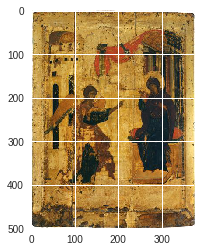

In [72]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imagine_de_test = mpimg.imread('/content/pandora/01_Byzantin_Iconography/Andrei Rublev/annunciation.jpg')
plt.imshow(imagine_de_test)

In [73]:
!git clone https://github.com/bnegreve/rasta.git

Cloning into 'rasta'...
remote: Counting objects: 1528, done.
remote: Total 1528 (delta 0), reused 0 (delta 0), pack-reused 1528
Receiving objects: 100% (1528/1528), 135.43 MiB | 49.30 MiB/s, done.
Resolving deltas: 100% (418/418), done.


In [77]:
!ls rasta

data  LICENSE  models  NOTICE  python  README.md  report  scripts


In [78]:
!pip3 install -r rasta/python/requirements.txt

    100% |████████████████████████████████| 133kB 3.4MB/s 
    100% |████████████████████████████████| 2.8MB 2.9MB/s 
  Running setup.py bdist_wheel for pydot ... - done
  Stored in directory: /content/.cache/pip/wheels/6a/a5/14/25541ebcdeaf97a37b6d05c7ff15f5bd20f5e91b99d313e5b4
  Running setup.py bdist_wheel for Theano ... - \ | /

 - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/a7/8a/6c/aad33a6144dc30cc65d437c444090076136d2c0f289f3ce183
  Running setup.py bdist_wheel for sklearn ... - done
  Stored in directory: /content/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built pydot Theano sklearn


In [85]:
%cd rasta/models
!wget www.lamsade.dauphine.fr/~bnegrevergne/webpage/software/rasta/rasta_models.tgz
!tar xzvf rasta_models.tgz
%cd ../

/content/rasta/models


--2018-05-01 12:14:21--  http://www.lamsade.dauphine.fr/~bnegrevergne/webpage/software/rasta/rasta_models.tgz
Resolving www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)... 193.48.71.250
Connecting to www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)|193.48.71.250|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251447452 (240M) [application/x-gzip]
Saving to: ‘rasta_models.tgz’

rasta_models.tgz    100%[===================>] 239.80M  9.04MB/s    in 24s     

2018-05-01 12:14:46 (10.0 MB/s) - ‘rasta_models.tgz’ saved [251447452/251447452]

best_top_1
best_top_3
default
resnet_2017_7_31-19:9:44(0)/
resnet_2017_7_31-19:9:44(0)/model.h5
resnet_2017_7_31-19:9:44(0)/events.out.tfevents.1501521005.chifflet-1.lille.grid5000.fr
resnet_2017_7_31-19:9:44(0)/model.json
resnet_2017_7_31-19:9:44(0)/summary.txt
resnet_2017_7_31-19:9:44(0)/params.txt
resnet_2017_7_31-19:9:45/
resnet_2017_7_31-19:9:45/model.h5
resnet_2017_7_31-19:9:45/model.json
resnet_2017_7_31-19:9:45/summary

In [90]:
%cd ..

/content/rasta


In [105]:
%cd data
!wget www.lamsade.dauphine.fr/~bnegrevergne/webpage/software/rasta/wikipaintings_full.tgz
!tar xzvf wikipaintings_full.tgz
%cd ../

/content/rasta/data
--2018-05-01 12:33:44--  http://www.lamsade.dauphine.fr/~bnegrevergne/webpage/software/rasta/wikipaintings_full.tgz
Resolving www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)... 193.48.71.250
Connecting to www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)|193.48.71.250|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18487905999 (17G) [application/x-gzip]
Saving to: ‘wikipaintings_full.tgz’

wikipaintings_full.   3%[                    ] 681.41M  13.4MB/s    eta 21m 52s

wikipaintings_full.  99%[==================> ]  17.22G  25.1MB/s    eta 1s     

wikipaintings_full. 100%[===================>]  17.22G  25.2MB/s    in 17m 28s 

2018-05-01 12:51:12 (16.8 MB/s) - ‘wikipaintings_full.tgz’ saved [18487905999/18487905999]

wikipaintings_full/
wikipaintings_full/wikipaintings_train/
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/koloman-moser_pisces-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/edmund-dulac_the-bird-of-shadow-and-the-sunbird-illustration-to-fairies-i-have-met.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_tmutarakan-1919.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/konstantin-somov_spring.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/valentin-serov_the-rape-of-europa-1910-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_girls-with-animals-1901-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roeric

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/jozsef-rippl-ronai_zorka-b-nyai-in-a-black-dress-1911.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/carl-larsson_lisbeth-at-the-birch-grove-1910.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/carlos-saenz-de-tejada_sketch-for-one-of-the-murals-of-the-army-1953.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/eug-ne-grasset_jeanne-d-arc-sarah-bernhardt.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/carlos-saenz-de-tejada_don-juan-tenorio-seville-street-1946.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/michel-simonidy_the-ball-1899.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_ominous-1901.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/henri-de-toulouse-lautrec_les-ambassadeurs-aristide-bruant-and-his-cabaret-1892.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/kay-nielsen_two-

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/gustav-klimt_the-beethoven-frieze-the-longing-for-happiness-finds-repose-in-poetry-right-wall-detail-1902-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/jacek-malczewski_self-portrait-in-an-armour.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/mikhail-vrubel_portrait-of-an-officer-pechorin-on-a-sofa-1889.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/pablo-picasso_courtesan-with-necklace-of-gems-1901.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/edmund-dulac_mohammad-the-rubaiyat-of-omar-khayyam.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_costume-design-for-the-opera-the-golden-cockerel-by-nikolai-rimsky-korsakov-1909.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/jacek-malczewski_angel-i-will-follow-you-1901.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/eug-ne-grasset_la-belle-jardiniere-n

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/sergey-solomko_the-red-blood-of-garibaldi-1914.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/leon-bakst_le-dieu-bleu-bayadere-1912.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-milev_our-mothers-are-always-dressed-in-black-1926.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alexandre-benois_first-barrel-organ-player-costume-design.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/jacek-malczewski_sunflowers.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/dorothy-lathrop_hitty-by-rachel-field-21-1929.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_zmievna-1906.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-milev_the-maglizh-monastery-1924.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_moscow-1900.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/felix-vallotton_portrait-of-french-general-and-politician-joseph-vinoy-1897.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/wilhelm-kotarbinski_resting-by-the-shore.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/henri-de-toulouse-lautrec_the-terror-of-the-grenelle-grenelle.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_viennese-blood-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_prince-igor-1914.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/koloman-moser_the-three-graces.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alphonse-mucha_job-1896.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/felix-vallotton_british-poet-alfred-douglas-1896.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_all-healing.jpg
wikipaintings_full/wikipaintings_train/Art_N

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_moska.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_crimea-batiliman-1940-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/sergey-solomko_moscow-in-the-xii-century.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_tristan-1912-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/koloman-moser_stage-design-for-the-lake-of-julius-bittner.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/carl-larsson_convalescence.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/heorhiy-narbut_illustration-for-aeneid-by-i-kotlyarevsky-1919.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_cigarettes-of-the-world-1900.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ferdinand-hodler_the-fall-in-silvaplana-1907.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(M

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/wilhelm-kotarbinski_war.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_the-streltsy-uprising-1936.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/anna-ostroumova-lebedeva_evening-1923.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_sketches-of-costumes-for-prince-igor-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/anna-ostroumova-lebedeva_colonnade-of-exchange-and-peter-and-paul-fortress-1907.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/carlos-saenz-de-tejada_the-life-of-st-ignatius-loyola-plate-9-after-their-solemn-vows-at-the-basilica-of-st-paul.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_girls-between-brown-green-borders-1901.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/sergey-solomko_pearl-of-creation.jpg
wikipaintings_full/wikipaintings_train/Art_Nouve

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/edmund-dulac_the-woman-he-could-not-leave-stealers-of-light-by-the-queen-of-romania.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aladar-korosfoi-kriesch_portrait-of-kriesch-laura-1894.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_geisha-10.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_illustration-for-the-russian-fairy-story-maria-morevna-1900-7.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_single-items-13.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_illustration-for-the-russian-fairy-story-feather-of-finist-falcon-3.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/dorothy-lathrop_a-little-boy-lost-1920-18.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alphonse-mucha_aawn.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/serge-sudei

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/heorhiy-narbut_design-of-hundred-hryvnias-bill-1918.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/eug-ne-grasset_ne-plus-ultra-reino-de-espana-1893.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_girls-with-olive-green-surrounds-1901-5.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_unknown-1916-4.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_clovers-1899.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_the-toilet-of-helen.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_egypt-pyramids-1924.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ferdinand-hodler_thun-stockhornkette-1910-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_portrait-of-lyudmila-chirikova-1922.jpg
wikipaintings_full/wikipaintings_train/A

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alphonse-mucha_poetry.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/a-y-jackson_indian-home-1927.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ferdinand-hodler_the-wounded-standard-bearer-hans-baer-1896.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/otto-eckmann_farbiger-holzschnitt-zwei-schw-ne-1902.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/heorhiy-narbut_playing-cards-1917-2.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_at-the-first-coner.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/konstantin-korovin_the-aragva-bank-1902.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/wilhelm-kotarbinski_adagio.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/koloman-moser_illustration-for-the-viennese-fashion-magazine-1890.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Mode

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/konstantin-somov_illustration-to-the-novel-daphnis-and-chloe-2.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/mikhail-vrubel_faust-1896.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_the-mirror-of-music.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_mayflyes-1904-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/boris-kustodiev_the-merchant-wife-and-the-domovoi-1922.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/jules-cheret_folies-berg-res-emilienne-d-alen-on-1900.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/koloman-moser_am-steinhof-church-mosaic-design-for-the-main-altar-1905.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/wilhelm-kotarbinski_playing-chess.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/akseli-gallen-kallela_spring-study-for-the-jus-lius-mau

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/edmund-dulac_a-new-marriage-the-rubaiyat-of-omar-khayyam.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alphonse-mucha_spring-1896.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_peep-1916.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/koloman-moser_stage-design-for-the-minutes-of-love-by-edward-bauersfeld-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_the-return-of-tannhauser-to-the-venusberg-1895.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/leon-bakst_fantasy-on-modern-costume-atalanta-1912.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/michel-simonidy_affiche-la-bourboule.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/filipp-malyavin_self-portrait.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/felix-vallotton_portrait-of-french-writer-joris-karl-huysmans

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_figures-on-turquoise-background-1901-3.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_portrait-of-miss-letty-lind.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/wilhelm-kotarbinski_afternoon-silence.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/boris-kustodiev_autumn-1915.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/carl-larsson_model-writing-postcards-1906.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/franklin-carmichael_la-cloche-1939.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/heorhiy-narbut_illustration-to-the-fairy-tale-the-war-of-mushrooms-1909.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_greek-virgins-1900-4.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/jacek-malczewski_polonia-ii-1914.jpg
wikipaintings_full/wikipaintings_trai

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/egon-schiele_woodland-prayer-1915.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_merlin.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_hut-in-the-mountains-1912.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/felix-vallotton_portrait-of-french-poet-phra-m-mikha-l-1898.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/jury-annenkov_a-buccaneer-on-the-seashore-stage-set-1921.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alphonse-mucha_moravian-teachers0-choir-1911.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alphonse-mucha_head-of-a-girl.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/dorothy-lathrop_illus-for-her-own-the-lost-merry-go-round-1934.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/jozsef-rippl-ronai_lajos-und-odon-1918.jpg
wikipaintings_full/wikipainti

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alphonse-mucha_the-lady-of-the-camellias-1896.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/edmund-dulac_all-are-but-stories-the-rubaiyat-of-omar-khayyam.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alexandre-benois_blackamoor-s-chamber-fragment-set-design-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_new-york-tribune-1916.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/leon-bakst_scheherazade-negre-argent-1910.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_illustration-for-the-epic-ilya-muromets-and-svyatogor-1940.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_small-greek-heads-3.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/kay-nielsen_the-wolf-is-waiting.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alphonse-mucha_cover-composed-by-mucha

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/filipp-malyavin_a-girl-1903.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_idols.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/jacek-malczewski_christ-and-the-samaritian-woman.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_medieval-revel-1903.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_poster.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/edmund-dulac_birth-of-the-pearl-from-the-kingdom-of-the-pearl.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alphonse-mucha_maude-adams-as-joan-of-arc-1909.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/carl-larsson_cosy-corner-1894.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/carl-larsson_playing-scales.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/edmund-dulac_where-i-made-one-the-ru

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/boris-kustodiev_illustration-for-nikolay-nekrasov-poem-uncle-jacob-1921.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/boris-kustodiev_the-bolshevik-1920.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/koloman-moser_study-for-venus-in-the-grotto.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/eug-ne-grasset_la-belle-jardiniere-march-1896.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_merchants-illustration-for-alexander-pushkin-s-fairytale-of-the-tsar-saltan-1905.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/henri-de-toulouse-lautrec_at-the-moulin-rouge-la-goulue-with-her-sister-1892.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/boris-kustodiev_the-hut-of-savely-magar-1925.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/heorhiy-narbut_illustration-to-wooden-eagle-1909-4.jpg
wikipaintings_full/wikip

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_towns-1914.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_hills-1912-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_viennese-blood.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/koloman-moser_fabric-design-with-trout-dance-for-backhausen-1899.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/anna-ostroumova-lebedeva_trees-near-the-apollo-colonnade-1923.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ferdinand-hodler_swearing-to-the-left.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_lake-village-1915-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_saviour-almighty-and-saints-1906.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/heorhiy-narbut_church-of-the-nativity-of-the-blessed-virgin-in-the-village-khokhlovka-

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_list-of-pictures.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_queen-of-heaven-over-river-of-life-1914.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/boris-kustodiev_picnic-1920.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/jacek-malczewski_portrait-of-erazm-baracz-1907.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_sketch-of-sofa-for-workshop-1904.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_stained-glass-art-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_scenery-sketch-for-mussorgsky-s-opera-boris-godunov.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_count-valmont-1896.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_deadly-sins-5.jpg
wikipaintings_full/wikipaintings_tr

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_girls-with-flowers-at-feet-1902-4.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_the-death-of-pierrot.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/koloman-moser_hermann-bahr.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/anna-ostroumova-lebedeva_academy-of-arts-1922.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_the-comedy-of-the-rhinegold-frontispiece.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_sketch-with-woman-in-front-of-city-walls.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_crimea-koktebel-1939-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_the-rite-of-spring-1913.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/konstantin-somov_sleeping-young-woman-in-park.jpg
wikipaintings_full/wiki

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/michel-simonidy_winter-perfume-1902.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_towns-1914-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_study-of-scene-design-for-snow-maiden-1921.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/felix-vallotton_portrait-of-matilde-serao-1891.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/boris-kustodiev_wing-with-a-porch-1911.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/henri-de-toulouse-lautrec_they.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_illustration-for-the-fairy-tale-vasilisa-the-beautiful-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_fight-with-the-dragon-1914.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/thomas-theodor-heine_from-thorheiten-1901.jpg
wikipaintings_full/wikipa

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/mikhail-vrubel_artist-s-son-1901.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/boris-kustodiev_tsar-nicholas-ii-1915.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/felix-vallotton_otto-von-bismarck-1895.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/carl-larsson_august-strindberg-1899.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/wilhelm-kotarbinski_ballade.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_old-riga-1903.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/henri-de-toulouse-lautrec_at-the-music-hall-loie-fuller-1892.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_full-and-true-account-of-the-wonderful-mission-of-earl-lavender-frontispiece.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_vignette-for-book-n-k-roerich-1918-12.jpg
wikipaint

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/boris-kustodiev_ukrainian-landscape-1925.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/leon-bakst_arabic-dancer.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_salome-1903-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/konstantin-somov_summer-morning-1.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_vignette-for-book-n-k-roerich-1918-4.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_vignette-for-book-n-k-roerich-1918-2.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/jacek-malczewski_self-portrait-with-death.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/koloman-moser_poster-for-prince-richard-metternich-1899.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/jacek-malczewski_the-tribute-money-triptych-right.jpg
wikipaintings_full/wikipaintings_trai

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_leda-and-the-swan-2.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alphonse-mucha_dance-1898.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_illustration-for-the-magazine-golden-fleece-1906-2.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/dorothy-lathrop_mopsa-the-fairy-by-jean-ingelow-1920-9.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_sea-1919.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/aubrey-beardsley_oscar-wilde-at-work.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alphonse-mucha_regional-exhibition-in-ivancice-1912.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/valentin-serov_portrait-of-maria-akimova-1908.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/leon-bakst_ballet-music-introduction-humphrey-searle.jpg
wikipaintings_full/wikipaint

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/egon-schiele_single-houses-1915.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/dorothy-lathrop_the-treasure-of-carcassonne-1928-8.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/max-slevogt_danae.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_ilya-muromets-1910.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/felix-vallotton_family-1899.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/ivan-bilibin_provence-pines-on-the-shore-1929.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/sergey-solomko_wedding-ceremony-middle-ages-1909.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/nicholas-roerich_inner-yard-1913.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/boris-kustodiev_shrovetide-1916.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/alphonse-mucha_general-german-poster-ex

wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/zinaida-serebriakova_portrait-of-a-peasant-i-d-golubeva-1914.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_single-items-9.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/zinaida-serebriakova_peasant-woman-with-rocker-1917.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/franz-stuck_salome-1906.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/edmund-dulac_abysm-of-time-from-the-tempest.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/carlos-saenz-de-tejada_sketch-of-curtain-for-the-representation-of-don-juan-tenorio-treatal-in-theater.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/j-e-h-macdonald_batchawana-rapid-1920.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/raphael-kirchner_smoking-women-1904.jpg
wikipaintings_full/wikipaintings_train/Art_Nouveau_(Modern)/henri-de-toulouse-lautrec_la-goulue-an

wikipaintings_full/wikipaintings_train/Expressionism/ossip-zadkine_at-the-water-s-edge.jpg
wikipaintings_full/wikipaintings_train/Expressionism/franz-marc_the-shepherdness-1912.jpg
wikipaintings_full/wikipaintings_train/Expressionism/pierre-alechinsky_untitled-from-the-test-of-the-title-le-test-du-titre-4-1966.jpg
wikipaintings_full/wikipaintings_train/Expressionism/egon-schiele_female-nude-lying-on-her-stomach-1917.jpg
wikipaintings_full/wikipaintings_train/Expressionism/arturo-souto_i-go-1934.jpg
wikipaintings_full/wikipaintings_train/Expressionism/richard-gerstl_portrait-of-arnold-schonberg.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_men-with-wheelbarrows-1927.jpg
wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_still-life-4.jpg
wikipaintings_full/wikipaintings_train/Expressionism/jack-bush_grey-day-mattawa-1947.jpg
wikipaintings_full/wikipaintings_train/Expressionism/august-macke_reading-woman.jpg
wikipaintings_full/wikipaintings

wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_the-black-dress-1918.jpg
wikipaintings_full/wikipaintings_train/Expressionism/dimitris-mytaras_female-figures.jpg
wikipaintings_full/wikipaintings_train/Expressionism/andre-derain_the-portrait-of-woman-1913.jpg
wikipaintings_full/wikipaintings_train/Expressionism/emil-nolde_the-missionary-1912.jpg
wikipaintings_full/wikipaintings_train/Expressionism/chaim-soutine_two-children-on-a-road.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ilka-gedo_the-big-tree-trunk-1978.jpg
wikipaintings_full/wikipaintings_train/Expressionism/mario-zanini_composi-o-com-figuras-1965.jpg
wikipaintings_full/wikipaintings_train/Expressionism/sidney-nolan_inland-australia-1950.jpg
wikipaintings_full/wikipaintings_train/Expressionism/mark-rothko_rural-scene.jpg
wikipaintings_full/wikipaintings_train/Expressionism/nikolaos-lytras_portrait-of-sculptor-yannoulis-chalepas.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-lud

wikipaintings_full/wikipaintings_train/Expressionism/wolf-kahn_on-the-coast-1960.jpg
wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_the-silence-that-lives-in-houses-1947.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ossip-zadkine_the-messenger.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_portrait-of-the-pianist-konstantin-igumnov-1934.jpg
wikipaintings_full/wikipaintings_train/Expressionism/wassily-kandinsky_red-wall-destiny-1909.jpg
wikipaintings_full/wikipaintings_train/Expressionism/corneliu-baba_potrait-of-a-man.jpg
wikipaintings_full/wikipaintings_train/Expressionism/chronis-botsoglou_tribute-to-byzantine-masters-1986.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_illustration-for-the-fable-the-crow-and-the-fox-1934.jpg
wikipaintings_full/wikipaintings_train/Expressionism/jules-pascin_the-circus-1910.jpg
wikipaintings_full/wikipaintings_train/Expressionism/otto-dix_self-portrait.jpg
wikipaintings_

wikipaintings_full/wikipaintings_train/Expressionism/mstislav-dobuzhinsky_glassmakers-street-in-vilno-1906.jpg
wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_portrait-of-paul-alexandre-1909.jpg
wikipaintings_full/wikipaintings_train/Expressionism/m-c-escher_young-thrush.jpg
wikipaintings_full/wikipaintings_train/Expressionism/nikolaos-lytras_child.jpg
wikipaintings_full/wikipaintings_train/Expressionism/balthus_large-landscape-with-a-tree-1957.jpg
wikipaintings_full/wikipaintings_train/Expressionism/albert-bloch_the-dancer-ragtime-1911.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_two-acrobats-1933.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_bathers-on-the-lawn.jpg
wikipaintings_full/wikipaintings_train/Expressionism/georges-braque_the-bicycle.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_poet-1907.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lynd-ward_not-

wikipaintings_full/wikipaintings_train/Expressionism/paul-klee_forest-witch-1938.jpg
wikipaintings_full/wikipaintings_train/Expressionism/costas-niarchos_at-the-beach-1.jpg
wikipaintings_full/wikipaintings_train/Expressionism/paul-klee_pierrot-lunaire-1924.jpg
wikipaintings_full/wikipaintings_train/Expressionism/julius-bissier_assisi-35-marzo-1935.jpg
wikipaintings_full/wikipaintings_train/Expressionism/egon-schiele_portrait-of-victor-ritter-von-bauer-1918.jpg
wikipaintings_full/wikipaintings_train/Expressionism/egon-schiele_study-of-hands-1913.jpg
wikipaintings_full/wikipaintings_train/Expressionism/august-macke_vegetable-fields.jpg
wikipaintings_full/wikipaintings_train/Expressionism/mstislav-dobuzhinsky_rue-de-la-tombe-issoire-paris-1927.jpg
wikipaintings_full/wikipaintings_train/Expressionism/arturo-souto_harlequin-1932.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ilka-gedo_table-1-1949.jpg
wikipaintings_full/wikipaintings_train/Expressionism/alexander-calder_cow-1926.j

wikipaintings_full/wikipaintings_train/Expressionism/spyros-papaloukas_view-from-karyes-of-holy-mountain-1924.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lynd-ward_not-detected-272460.jpg
wikipaintings_full/wikipaintings_train/Expressionism/pablo-picasso_untitled-1939-5.jpg
wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_jeanne-hebuterne-with-necklace-1917.jpg
wikipaintings_full/wikipaintings_train/Expressionism/egon-schiele_the-sleeping-girl-1913.jpg
wikipaintings_full/wikipaintings_train/Expressionism/jose-clemente-orozco_advance-1940.jpg
wikipaintings_full/wikipaintings_train/Expressionism/walter-battiss_figures-and-a-dog-in-a-mountainous-landscape.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ramon-oviedo_a-todos-nos-parecio-un-sue-o.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_archer.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ad-reinhardt_how-to-look-at-modern-art-detail-1946.jpg
wikipai

wikipaintings_full/wikipaintings_train/Expressionism/constantin-brancusi_arch.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lucian-freud_portrait-of-ib-1990.jpg
wikipaintings_full/wikipaintings_train/Expressionism/yiannis-tsaroychis_head-of-a-youth-1941.jpg
wikipaintings_full/wikipaintings_train/Expressionism/pablo-picasso_woman-in-the-studio-1956.jpg
wikipaintings_full/wikipaintings_train/Expressionism/m-c-escher_life-force.jpg
wikipaintings_full/wikipaintings_train/Expressionism/mstislav-dobuzhinsky_barbershop-window-1906.jpg
wikipaintings_full/wikipaintings_train/Expressionism/chaim-soutine_two-children-on-a-road-1.jpg
wikipaintings_full/wikipaintings_train/Expressionism/arturo-souto_inn-at-port-1932.jpg
wikipaintings_full/wikipaintings_train/Expressionism/irma-stern_zanzibar-garden.jpg
wikipaintings_full/wikipaintings_train/Expressionism/chronis-botsoglou_nekyia.jpg
wikipaintings_full/wikipaintings_train/Expressionism/dimitris-mytaras_untitled-3.jpg
wikipaintings_full/wi

wikipaintings_full/wikipaintings_train/Expressionism/rafael-zabaleta_gleaners.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_rural-landscape-1962.jpg
wikipaintings_full/wikipaintings_train/Expressionism/salvador-dali_figures-in-a-landscape-at-ampurdan.jpg
wikipaintings_full/wikipaintings_train/Expressionism/zinaida-serebriakova_thoughtful-men-in-blue-marrakesh-1932.jpg
wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_odalisque-with-a-tambourine-1926.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ligia-macovei_unknown-title-16.jpg
wikipaintings_full/wikipaintings_train/Expressionism/salvador-dali_villa-pepita.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lynd-ward_not-detected-272539.jpg
wikipaintings_full/wikipaintings_train/Expressionism/max-pechstein_selbstpotr-t-mit-pinsel-und-pfeife.jpg
wikipaintings_full/wikipaintings_train/Expressionism/franz-marc_shepherds.jpg
wikipaintings_full/wikipaintings_train/Expressionism/am

wikipaintings_full/wikipaintings_train/Expressionism/jean-david_children.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_a-meeting-pushkin-with-carriage-carrying-the-body-of-griboyedov-1936.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_plow-1902.jpg
wikipaintings_full/wikipaintings_train/Expressionism/zinaida-serebriakova_portrait-of-architect-a-j-beloborodov-1925.jpg
wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_girl-with-pigtails-1918.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lucian-freud_girl-with-her-eyes-closed.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ligia-macovei_red-hat.jpg
wikipaintings_full/wikipaintings_train/Expressionism/yiannis-moralis_funerary-composition-i-1962.jpg
wikipaintings_full/wikipaintings_train/Expressionism/saul-steinberg_untitled-question-marks-1961.jpg
wikipaintings_full/wikipaintings_train/Expressionism/max-beckmann_portrait-of-quappi-in-blue-1926.jpg

wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_head.jpg
wikipaintings_full/wikipaintings_train/Expressionism/alexander-calder_four-fish-in-water.jpg
wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_the-three-sisters-with-a-sculpture-left-panel-from-the-three-sisters-triptych-1917.jpg
wikipaintings_full/wikipaintings_train/Expressionism/istvan-farkas_standing-in-the-sun-1943.jpg
wikipaintings_full/wikipaintings_train/Expressionism/carlos-botelho_lisboa-e-o-tejo-domingo-1935.jpg
wikipaintings_full/wikipaintings_train/Expressionism/zinaida-serebriakova_statue-of-a-faun-in-the-garden-of-the-yusupov-in-st-petersburg-1923.jpg
wikipaintings_full/wikipaintings_train/Expressionism/oswaldo-guayasamin_flores-secas-1994.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ilka-gedo_ganz-factory-1948-1.jpg
wikipaintings_full/wikipaintings_train/Expressionism/jacoba-van-heemskerck_tree-1918.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-l

wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_nude-on-sofa-almaisa-1916.jpg
wikipaintings_full/wikipaintings_train/Expressionism/edvard-munch_professor-daniel-jacobson-1909.jpg
wikipaintings_full/wikipaintings_train/Expressionism/candido-portinari_retirantes.jpg
wikipaintings_full/wikipaintings_train/Expressionism/franz-marc_the-yellow-cow-1911.jpg
wikipaintings_full/wikipaintings_train/Expressionism/marc-chagall_red-nude-sitting-up-1908.jpg
wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_seated-figure-striped-carpet-1920.jpg
wikipaintings_full/wikipaintings_train/Expressionism/billy-childish_thumbprint-1997.jpg
wikipaintings_full/wikipaintings_train/Expressionism/constantin-brancusi_madamoiselle-pogany.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_dresden-friedrichstadt.jpg
wikipaintings_full/wikipaintings_train/Expressionism/pablo-picasso_an-actor-1904.jpg
wikipaintings_full/wikipaintings_train/Expressionism

wikipaintings_full/wikipaintings_train/Expressionism/louay-kayyali_the-socks-seller-1973.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lyonel-feininger_jimjam.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_witch-and-scarecrow-in-the-snow-1932.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lucian-freud_head-of-the-big-man.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_the-head-of-the-girl-mariam-tazahulahyan-1912.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_sailboats-at-fehmarn.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_yield-of-potatoes-1934.jpg
wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_red-headed-girl-in-evening-dress-1918.jpg
wikipaintings_full/wikipaintings_train/Expressionism/jose-gutierrez-solana_the-cabinets.jpg
wikipaintings_full/wikipaintings_train/Expressionism/georges-braque_bird-returning-to-it-s-nest-1956

wikipaintings_full/wikipaintings_train/Expressionism/francis-picabia_spanish-woman.jpg
wikipaintings_full/wikipaintings_train/Expressionism/paula-modersohn-becker_girls-in-the-garden-with-glass-ball-elsbeth-1902.jpg
wikipaintings_full/wikipaintings_train/Expressionism/jack-bush_farm-house-caledon-1944.jpg
wikipaintings_full/wikipaintings_train/Expressionism/pablo-picasso_untitled-1970-1.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ivan-albright_inland-sea-japan-1967.jpg
wikipaintings_full/wikipaintings_train/Expressionism/konstantinos-parthenis_la-temperanza-woman-holding-a-knife-1938.jpg
wikipaintings_full/wikipaintings_train/Expressionism/paul-klee_flower-stand-with-watering-can-and-bucket-1910.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lucian-freud_the-egytptian-book.jpg
wikipaintings_full/wikipaintings_train/Expressionism/alekos-kontopoulos_head-1939.jpg
wikipaintings_full/wikipaintings_train/Expressionism/zinaida-serebriakova_young-girl.jpg
wikipaintings_

wikipaintings_full/wikipaintings_train/Expressionism/saul-steinberg_six-sunsets-1971.jpg
wikipaintings_full/wikipaintings_train/Expressionism/edvard-munch_street-in-asgardstrand-1902.jpg
wikipaintings_full/wikipaintings_train/Expressionism/salvador-dali_satirical-composition-the-dance-by-matisse.jpg
wikipaintings_full/wikipaintings_train/Expressionism/oskar-kokoschka_not_detected_235871.jpg
wikipaintings_full/wikipaintings_train/Expressionism/henri-michaux_untitled-3.jpg
wikipaintings_full/wikipaintings_train/Expressionism/chaim-soutine_midday-landscape.jpg
wikipaintings_full/wikipaintings_train/Expressionism/tsuguharu-foujita_friends.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_two-nude-girls.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lucian-freud_armchair-by-the-fireplace.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lynd-ward_not-detected-272497.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lajos-tihanyi_self-port

wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_still-life-12.jpg
wikipaintings_full/wikipaintings_train/Expressionism/edvard-munch_building-the-winter-studio-ekely-1929.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_dancer-in-a-blue-skirt.jpg
wikipaintings_full/wikipaintings_train/Expressionism/georges-braque_the-studio-v-1949.jpg
wikipaintings_full/wikipaintings_train/Expressionism/chronis-botsoglou_helen.jpg
wikipaintings_full/wikipaintings_train/Expressionism/dimitris-mytaras_anavasis.jpg
wikipaintings_full/wikipaintings_train/Expressionism/zinaida-serebriakova_fruit-piece-1935.jpg
wikipaintings_full/wikipaintings_train/Expressionism/max-pechstein_village-landscape-1919.jpg
wikipaintings_full/wikipaintings_train/Expressionism/irma-stern_umgababa-1922.jpg
wikipaintings_full/wikipaintings_train/Expressionism/oskar-kokoschka_the-elbe-near-dresden.jpg
wikipaintings_full/wikipaintings_train/Expressionism/tia-peltz_self-portrait.jpg
wiki

wikipaintings_full/wikipaintings_train/Expressionism/oswaldo-guayasamin_reuni-n-en-el-pent-gono-detail.jpg
wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_the-zouave-1918.jpg
wikipaintings_full/wikipaintings_train/Expressionism/max-beckmann_not-detected-259759.jpg
wikipaintings_full/wikipaintings_train/Expressionism/josef-herman_the-washerwomen-1954.jpg
wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_studio-quay-of-saint-michel-1916.jpg
wikipaintings_full/wikipaintings_train/Expressionism/jacoba-van-heemskerck_composition-1914.jpg
wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_woman-reading-with-peaches-1923.jpg
wikipaintings_full/wikipaintings_train/Expressionism/georges-braque_a-bird-passing-through-a-cloud-1957.jpg
wikipaintings_full/wikipaintings_train/Expressionism/margareta-sterian_easter-in-the-village.jpg
wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_goldfish-1916.jpg
wikipaintings_full/wikipaint

wikipaintings_full/wikipaintings_train/Expressionism/franz-marc_nude-lying-in-the-flowers-1910.jpg
wikipaintings_full/wikipaintings_train/Expressionism/jose-gutierrez-solana_portrait-of-mrs-amalia-gutierrez-solana.jpg
wikipaintings_full/wikipaintings_train/Expressionism/pablo-picasso_the-woman-with-the-edge-1902.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_sketch-of-book-cover-martiros-saryan-1935.jpg
wikipaintings_full/wikipaintings_train/Expressionism/konstantinos-parthenis_large-nude-1925.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_on-the-mountain-slopes-1922.jpg
wikipaintings_full/wikipaintings_train/Expressionism/egon-schiele_boy-in-a-sailor-suit-1913.jpg
wikipaintings_full/wikipaintings_train/Expressionism/dimitris-mytaras_untitled.jpg
wikipaintings_full/wikipaintings_train/Expressionism/walter-battiss_african-figures-1950.jpg
wikipaintings_full/wikipaintings_train/Expressionism/david-alfaro-siqueiros_hannibal.jpg
wikipaint

wikipaintings_full/wikipaintings_train/Expressionism/george-bouzianis_topio-sto-aixenaou-1924.jpg
wikipaintings_full/wikipaintings_train/Expressionism/m-c-escher_initial-d-1.jpg
wikipaintings_full/wikipaintings_train/Expressionism/balthus_nude-with-cat-1949.jpg
wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_portrait-of-juan-gris-1915.jpg
wikipaintings_full/wikipaintings_train/Expressionism/marcel-duchamp_chocolate-grinder-1914.jpg
wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_young-servant-girl.jpg
wikipaintings_full/wikipaintings_train/Expressionism/boris-grigoriev_self-portrait-with-a-chicken-and-a-rooster-1924.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_bathing-women-in-a-room-1908.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lucian-freud_baby-on-a-green-sofa-1961.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_under-the-trees-1907.jpg
wikipaintings_full/wikipaint

wikipaintings_full/wikipaintings_train/Expressionism/dimitris-mytaras_woman-with-a-dog-1994.jpg
wikipaintings_full/wikipaintings_train/Expressionism/nicolae-tonitza_vase-with-summer-flowers.jpg
wikipaintings_full/wikipaintings_train/Expressionism/vasile-kazar_unknown-title-12.jpg
wikipaintings_full/wikipaintings_train/Expressionism/janos-mattis-teutsch_the-dream-of-the-painter-1947.jpg
wikipaintings_full/wikipaintings_train/Expressionism/zinaida-serebriakova_self-portrait.jpg
wikipaintings_full/wikipaintings_train/Expressionism/david-alfaro-siqueiros_portrait-of-jose-clemente-orozco-1883-1949-1947-oil-on-canvas-1947.jpg
wikipaintings_full/wikipaintings_train/Expressionism/john-marin_off-york-island-1922.jpg
wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_portrait-of-the-painter-manuel-humbert-1916-1.jpg
wikipaintings_full/wikipaintings_train/Expressionism/salvador-dali_portrait-of-a-gipsy.jpg
wikipaintings_full/wikipaintings_train/Expressionism/georges-braque_sti

wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_female-toilets-1907.jpg
wikipaintings_full/wikipaintings_train/Expressionism/wassily-kandinsky_landscape-with-factory-chimney-1910.jpg
wikipaintings_full/wikipaintings_train/Expressionism/zinaida-serebriakova_self-portrait-1946.jpg
wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_caryatid-1913.jpg
wikipaintings_full/wikipaintings_train/Expressionism/frantisek-kupka_the-black-idol-resistance-1903.jpg
wikipaintings_full/wikipaintings_train/Expressionism/jose-gutierrez-solana_the-trial-of-madame-roland.jpg
wikipaintings_full/wikipaintings_train/Expressionism/chronis-botsoglou_self-portrait-1998.jpg
wikipaintings_full/wikipaintings_train/Expressionism/nikolaos-lytras_the-meadow.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_the-painter-self-portrait.jpg
wikipaintings_full/wikipaintings_train/Expressionism/nicolae-tonitza_wild-roses-1936.jpg
wikipaintings_full/wikipaintin

wikipaintings_full/wikipaintings_train/Expressionism/pablo-picasso_portrait-of-paulo-artist-s-son-1923.jpg
wikipaintings_full/wikipaintings_train/Expressionism/salvador-dali_bather.jpg
wikipaintings_full/wikipaintings_train/Expressionism/edvard-munch_self-portrait-1886.jpg
wikipaintings_full/wikipaintings_train/Expressionism/richard-gerstl_room-1908.jpg
wikipaintings_full/wikipaintings_train/Expressionism/alekos-kontopoulos_companionship.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_a-street-1910.jpg
wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_fish-tank-in-the-room-1912.jpg
wikipaintings_full/wikipaintings_train/Expressionism/barnett-newman_rothko-by-newman.jpg
wikipaintings_full/wikipaintings_train/Expressionism/george-bouzianis_topio-sto-aixenaou-1928.jpg
wikipaintings_full/wikipaintings_train/Expressionism/toyen_a-nest-in-the-branches.jpg
wikipaintings_full/wikipaintings_train/Expressionism/carlos-saenz-de-tejada_portrait-of-benvenut

wikipaintings_full/wikipaintings_train/Expressionism/lynd-ward_not-detected-272537.jpg
wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_odalisque-half-length-the-tatoo-1923.jpg
wikipaintings_full/wikipaintings_train/Expressionism/fred-williams_sapling-forest-1962.jpg
wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_the-girl-with-green-eyes-1908.jpg
wikipaintings_full/wikipaintings_train/Expressionism/paul-klee_two-country-houses-1918.jpg
wikipaintings_full/wikipaintings_train/Expressionism/johannes-sveinsson-kjarval_from-thingvellir-1957.jpg
wikipaintings_full/wikipaintings_train/Expressionism/pyotr-konchalovsky_family-portrait-against-chinese-panel-1911.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ossip-zadkine_two-women.jpg
wikipaintings_full/wikipaintings_train/Expressionism/david-alfaro-siqueiros_enough-1961.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ilka-gedo_self-portrait-1948.jpg
wikipaintings_full/wikipaintings_train

wikipaintings_full/wikipaintings_train/Expressionism/lucian-freud_the-painter-s-mother-resting-iii-1977.jpg
wikipaintings_full/wikipaintings_train/Expressionism/max-beckmann_bird-s-hell-1938.jpg
wikipaintings_full/wikipaintings_train/Expressionism/chaim-soutine_young-woman.jpg
wikipaintings_full/wikipaintings_train/Expressionism/bui-xuan-phai_portrait-1.jpg
wikipaintings_full/wikipaintings_train/Expressionism/zinaida-serebriakova_portrait-of-s-m-lifar-1961.jpg
wikipaintings_full/wikipaintings_train/Expressionism/marevna-marie-vorobieff_in-the-caf-rotonde.jpg
wikipaintings_full/wikipaintings_train/Expressionism/corneliu-baba_still-life.jpg
wikipaintings_full/wikipaintings_train/Expressionism/boris-grigoriev_winter-red-hill-in-the-realm-of-berendey.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lasar-segall_morro-vermelho-1926.jpg
wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_pierre-edouard-baranowski-1918.jpg
wikipaintings_full/wikipaintings_train/Expr

wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_the-soldier-bath.jpg
wikipaintings_full/wikipaintings_train/Expressionism/kees-van-dongen_woman-with-a-dog-walking-on-the-beach-1937.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_mother-of-the-artist-1904.jpg
wikipaintings_full/wikipaintings_train/Expressionism/franz-marc_three-cats-1913.jpg
wikipaintings_full/wikipaintings_train/Expressionism/edvard-munch_melancholy-1892.jpg
wikipaintings_full/wikipaintings_train/Expressionism/rafael-zabaleta_self-portrait-1956.jpg
wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_bride-and-groom-the-couple.jpg
wikipaintings_full/wikipaintings_train/Expressionism/balthus_still-life-with-lamp-1958-1.jpg
wikipaintings_full/wikipaintings_train/Expressionism/paul-klee_windows-and-palm-trees-1914.jpg
wikipaintings_full/wikipaintings_train/Expressionism/balthus_the-yonne-valley-1957.jpg
wikipaintings_full/wikipaintings_train/Expressioni

wikipaintings_full/wikipaintings_train/Expressionism/kathe-kollwitz_not_detected_235972.jpg
wikipaintings_full/wikipaintings_train/Expressionism/pyotr-konchalovsky_leningrad-bank-bridge-1931.jpg
wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_view-into-a-cafe.jpg
wikipaintings_full/wikipaintings_train/Expressionism/fred-williams_dight-s-falls-1974.jpg
wikipaintings_full/wikipaintings_train/Expressionism/helene-schjerfbeck_annuli-reading-1923.jpg
wikipaintings_full/wikipaintings_train/Expressionism/jack-bush_the-wet-road.jpg
wikipaintings_full/wikipaintings_train/Expressionism/egon-schiele_girl-in-black-1911.jpg
wikipaintings_full/wikipaintings_train/Expressionism/johannes-sveinsson-kjarval_unknown-title.jpg
wikipaintings_full/wikipaintings_train/Expressionism/tsuguharu-foujita_christ-en-croix.jpg
wikipaintings_full/wikipaintings_train/Expressionism/horia-bernea_hills-1965.jpg
wikipaintings_full/wikipaintings_train/Expressionism/constantin-brancusi_the-kiss-19

wikipaintings_full/wikipaintings_train/Expressionism/george-bouzianis_portrait-1927.jpg
wikipaintings_full/wikipaintings_train/Expressionism/pablo-picasso_study-to-two-sisters-1902.jpg
wikipaintings_full/wikipaintings_train/Expressionism/lucian-freud_girl-s-head.jpg
wikipaintings_full/wikipaintings_train/Expressionism/pyotr-konchalovsky_bullfight-in-sevilla-1910.jpg
wikipaintings_full/wikipaintings_train/Expressionism/martiros-saryan_in-yerevan-1908.jpg
wikipaintings_full/wikipaintings_train/Expressionism/tia-peltz_baba-cloan-a.jpg
wikipaintings_full/wikipaintings_train/Expressionism/edvard-munch_red-and-white-1900.jpg
wikipaintings_full/wikipaintings_train/Expressionism/henri-matisse_the-pinapple-1948.jpg
wikipaintings_full/wikipaintings_train/Expressionism/paula-modersohn-becker_girls-at-the-birch-tree-and-flock-of-sheep-in-the-background-1903.jpg
wikipaintings_full/wikipaintings_train/Expressionism/amedeo-modigliani_portrait-of-dr-paul-alexandre-1909.jpg
wikipaintings_full/wikipaint

wikipaintings_full/wikipaintings_train/Expressionism/ernst-ludwig-kirchner_nudes-in-a-meadow.jpg
wikipaintings_full/wikipaintings_train/Expressionism/jean-paul-lemieux_le-champ-de-tr-fles.jpg
wikipaintings_full/wikipaintings_train/Expressionism/august-macke_portrait-of-the-artist-s-wife-with-a-hat.jpg
wikipaintings_full/wikipaintings_train/Expressionism/balthus_three-sisters.jpg
wikipaintings_full/wikipaintings_train/Expressionism/zinaida-serebriakova_portrait-of-alexander-benois-1924.jpg
wikipaintings_full/wikipaintings_train/Expressionism/george-bouzianis_portrait-of-a-boy-1931.jpg
wikipaintings_full/wikipaintings_train/Expressionism/egon-schiele_portrait-of-a-man-with-a-floppy-hat-portrait-of-erwin-dominilk-osen-1910.jpg
wikipaintings_full/wikipaintings_train/Expressionism/george-bouzianis_portrait-of-a-man-1919.jpg
wikipaintings_full/wikipaintings_train/Expressionism/chaim-soutine_white-house-on-a-hill.jpg
wikipaintings_full/wikipaintings_train/Expressionism/theo-van-doesburg_portr

wikipaintings_full/wikipaintings_train/Symbolism/ferdinand-hodler_farewell-participating-female-figure-1908.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_daybreak-ii-1906.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_apollo-s-chariot-5.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-vasilyev_eupraxia-1.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_chahar-caravan-in-the-desert-1937.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_the-flight-into-egypt.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikhail-vrubel_hansel-and-gretel-1896.jpg
wikipaintings_full/wikipaintings_train/Symbolism/arnold-b-cklin_the-sanctuary-of-hercules-1884.jpg
wikipaintings_full/wikipaintings_train/Symbolism/lovis-corinth_self-portrait-as-standard-bearer-1911.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_closed-eyes-1899.jpg
wikipaintings_full/wikipaintings_train/Symbolism/gustav-kl

wikipaintings_full/wikipaintings_train/Symbolism/william-blake_the-great-red-dragon-and-the-beast-from-the-sea-1805.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_the-man.jpg
wikipaintings_full/wikipaintings_train/Symbolism/george-frederick-watts_dweller-within-1886.jpg
wikipaintings_full/wikipaintings_train/Symbolism/edward-burne-jones_balthazar.jpg
wikipaintings_full/wikipaintings_train/Symbolism/harry-clarke_tales-of-mystery-and-imagination-by-edgar-allan-poe-1923-18.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-bogaevsky_romantic-landscape-1908.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_the-mask-of-the-red-death-1883.jpg
wikipaintings_full/wikipaintings_train/Symbolism/gustav-klimt_portrait-of-hermine-gallia-1904.jpg
wikipaintings_full/wikipaintings_train/Symbolism/alfred-kubin_caliban-from-the-portfolio-visions-of-shakespeare-shakespeare-visionen-1918.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_the-m

wikipaintings_full/wikipaintings_train/Symbolism/konstantin-somov_sketch-of-the-illustrations-to-gogol-s-nevsky-prospect.jpg
wikipaintings_full/wikipaintings_train/Symbolism/lajos-gulacsy_young-woman-with-rose-tree-1912.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mstislav-dobuzhinsky_seda-church-1933.jpg
wikipaintings_full/wikipaintings_train/Symbolism/pablo-picasso_salome-1905.jpg
wikipaintings_full/wikipaintings_train/Symbolism/salvador-dali_beatrice.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-vasilyev_sadko-and-master-marine.jpg
wikipaintings_full/wikipaintings_train/Symbolism/felicien-rops_father-muck.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_closed-eyes-1890.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_funeral-symphony-iii-1903.jpg
wikipaintings_full/wikipaintings_train/Symbolism/lovis-corinth_the-blinded-samson-1912.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_sword-of-coura

wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_rond-rocks-1912.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_horse-of-happyness.jpg
wikipaintings_full/wikipaintings_train/Symbolism/arnold-b-cklin_euterpe-1872.jpg
wikipaintings_full/wikipaintings_train/Symbolism/gustave-moreau_pasiphae-and-the-bul-1880.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikhail-vrubel_tamara-and-demon-1891-1.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_the-birth-of-venus-2.jpg
wikipaintings_full/wikipaintings_train/Symbolism/gustave-moreau_the-angels-of-sodom.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_marvelous-miracle-to-the-feat-1937.jpg
wikipaintings_full/wikipaintings_train/Symbolism/martiros-saryan_midday-silence-1924.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_untitled-1913.jpg
wikipaintings_full/wikipaintings_train/Symbolism/gustave-moreau_apollo-vanquishing-the-serpent-python.jpg

wikipaintings_full/wikipaintings_train/Symbolism/gustav-klimt_bildnis-gertha-felssvanyi.jpg
wikipaintings_full/wikipaintings_train/Symbolism/gustave-moreau_silver-age-orpheus.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_himalayas-mountains-lit-by-sunset-1941.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_brangena-1912-1.jpg
wikipaintings_full/wikipaintings_train/Symbolism/dante-gabriel-rossetti_the-gate-of-memory-1864.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_snowy-lift-1924.jpg
wikipaintings_full/wikipaintings_train/Symbolism/felicien-rops_satanic-self-portrait.jpg
wikipaintings_full/wikipaintings_train/Symbolism/gustave-moreau_the-birth-of-venus.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_abode-of-the-spirit.jpg
wikipaintings_full/wikipaintings_train/Symbolism/gustave-moreau_death-offers-crowns-to-the-winner-of-the-tournament.jpg
wikipaintings_full/wikipaintings_train/Symbolism/alpho

wikipaintings_full/wikipaintings_train/Symbolism/gustave-moreau_salome-with-column-1890.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_the-boat-virgin-with-corona.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_mohammed-the-prophet-1925-1.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mstislav-dobuzhinsky_garden-in-the-city-1905.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_she-who-holds-the-world-1933.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_lake-1915.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_lenore.jpg
wikipaintings_full/wikipaintings_train/Symbolism/kuzma-petrov-vodkin_bathing-boys-1926.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikhail-vrubel_sadko-1900.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_woman-in-profile-under-a-gothic-arch.jpg
wikipaintings_full/wikipaintings_train/Symbolism/salvador-dali_elias-per-turbinem-super-curru

wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_flowers-1905.jpg
wikipaintings_full/wikipaintings_train/Symbolism/kuzma-petrov-vodkin_portrait-of-n-l-1922.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_sacred-himalayas-1933.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_sorrow-ii-1907.jpg
wikipaintings_full/wikipaintings_train/Symbolism/william-blake_illustration-to-milton-s-paradise-lost-1808-1.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_trans-himalayas-1928-1.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_bouquet-of-flowers-in-a-white-vase.jpg
wikipaintings_full/wikipaintings_train/Symbolism/franz-stuck_the-kiss-of-the-sphinx.jpg
wikipaintings_full/wikipaintings_train/Symbolism/salvador-dali_omnes-gentes-in-valle-iosaphat-joel-3-2-1967.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_portrait-of-simone-fayet-in-holy-communion-1908.jpg
wikipaintings_full/wikipa

wikipaintings_full/wikipaintings_train/Symbolism/zinaida-serebriakova_landscape-village-neskuchnoye-1916.jpg
wikipaintings_full/wikipaintings_train/Symbolism/henri-fantin-latour_study-for-eve-1898.jpg
wikipaintings_full/wikipaintings_train/Symbolism/william-blake_christ-as-the-redeemer-of-man-1808.jpg
wikipaintings_full/wikipaintings_train/Symbolism/william-blake_the-parable-of-the-wise-and-foolish-virgins-1822.jpg
wikipaintings_full/wikipaintings_train/Symbolism/william-blake_the-number-of-the-beast-is-666.jpg
wikipaintings_full/wikipaintings_train/Symbolism/james-tissot_jacob-sees-esau-coming-to-meet-him.jpg
wikipaintings_full/wikipaintings_train/Symbolism/arnold-b-cklin_destroyed-house-in-kehl-1870.jpg
wikipaintings_full/wikipaintings_train/Symbolism/william-blake_the-house-of-death.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nikolaos-gyzis_repentance-1895.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-somov_poets.jpg
wikipaintings_full/wikipaintings_train/

wikipaintings_full/wikipaintings_train/Symbolism/konstantin-vasilyev_giant.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_gnome-1879.jpg
wikipaintings_full/wikipaintings_train/Symbolism/kuzma-petrov-vodkin_sevres-1908.jpg
wikipaintings_full/wikipaintings_train/Symbolism/william-blake_blasphemer.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_guardians-of-the-snow-1922.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_bouquet-of-flowers-3.jpg
wikipaintings_full/wikipaintings_train/Symbolism/jan-toorop_fatality-1893.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-bogaevsky_ufut-qale-1902.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-somov_slumbering-lady-in-black-dress.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-bogaevsky_stary-krym-1902.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikhail-nesterov_the-taking-of-the-veil-1898.jpg
wikipaintings_full/wikipaintings_train/Sy

wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_lightning-1909.jpg
wikipaintings_full/wikipaintings_train/Symbolism/ferdinand-hodler_cherry-tree-in-bloom-1905.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_guardian-of-desert-1941.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_boat-with-two-figures-1902.jpg
wikipaintings_full/wikipaintings_train/Symbolism/henri-fantin-latour_little-east-1904.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mstislav-dobuzhinsky_monument-to-peter-the-great-1923.jpg
wikipaintings_full/wikipaintings_train/Symbolism/martiros-saryan_caravan-1926.jpg
wikipaintings_full/wikipaintings_train/Symbolism/franz-stuck_amor-imperator-1887.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikhail-vrubel_self-portrait-1885.jpg
wikipaintings_full/wikipaintings_train/Symbolism/felicien-rops_the-sphinx-1882.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_girls-1944.jpg
wikipaintings

wikipaintings_full/wikipaintings_train/Symbolism/james-tissot_the-songs-of-joy.jpg
wikipaintings_full/wikipaintings_train/Symbolism/franz-stuck_dancers-1896.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_and-we-continue-fishing-1922.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_winter-motif-1907.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_sailing-boats-1906.jpg
wikipaintings_full/wikipaintings_train/Symbolism/pablo-picasso_life-1903.jpg
wikipaintings_full/wikipaintings_train/Symbolism/felicien-rops_gozo-hermafrodita.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikhail-vrubel_demon-looking-to-the-valley.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_boris-and-gleb-1943.jpg
wikipaintings_full/wikipaintings_train/Symbolism/james-tissot_the-grapes-of-canaan.jpg
wikipaintings_full/wikipaintings_train/Symbolism/arnold-b-cklin_meerestille-calm-sea-1887.jpg
wikipaintings_full/wikipai

wikipaintings_full/wikipaintings_train/Symbolism/salvador-dali_abraham-abraham-genesis-22-2-1967.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mstislav-dobuzhinsky_a-small-house-in-st-petersburg-1905.jpg
wikipaintings_full/wikipaintings_train/Symbolism/gustave-moreau_prince-hamlet-kill-king-claudius.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_himalayas-38.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-somov_lady-with-the-dog.jpg
wikipaintings_full/wikipaintings_train/Symbolism/wilhelm-kotarbinski_the-vineyard-of-desolation.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_land-of-snow-people-1947.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-vasilyev_geese.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-somov_gardener-gift.jpg
wikipaintings_full/wikipaintings_train/Symbolism/martiros-saryan_sunny-landscape-1923.jpg
wikipaintings_full/wikipaintings_train/Symbolism/salvador-dali_vinea-

wikipaintings_full/wikipaintings_train/Symbolism/salvador-dali_sponsabo-te-mihi-in-sempiternum-song-of-songs-2-12-1967.jpg
wikipaintings_full/wikipaintings_train/Symbolism/martiros-saryan_geghama-mountains-1926.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikhail-nesterov_thinker-portrait-of-philisopher-ivan-ilyin-1921.jpg
wikipaintings_full/wikipaintings_train/Symbolism/salvador-dali_uxnor-lot-in-satuam-salis-conversa-genesis-19-24-1967.jpg
wikipaintings_full/wikipaintings_train/Symbolism/pierre-puvis-de-chavannes_meditation.jpg
wikipaintings_full/wikipaintings_train/Symbolism/maurice-denis_the-gathering.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_lake.jpg
wikipaintings_full/wikipaintings_train/Symbolism/james-mcneill-whistler_peacock-fight.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_path-to-kailas-1931.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-bogaevsky_bibi-heybat-1932.jpg
wikipaintings_full/wikipainti

wikipaintings_full/wikipaintings_train/Symbolism/gustave-moreau_view-of-the-garden-of-madame-aupick-mother-of-baudelaire.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_the-past-1907.jpg
wikipaintings_full/wikipaintings_train/Symbolism/gustave-moreau_the-apparition.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_the-city-1908-1.jpg
wikipaintings_full/wikipaintings_train/Symbolism/tivadar-kosztka-csontvary_valley-of-great-tarpatak-in-the-high-tatras-1905.jpg
wikipaintings_full/wikipaintings_train/Symbolism/felicien-rops_tienne-soubre.jpg
wikipaintings_full/wikipaintings_train/Symbolism/arnold-b-cklin_honeymoon.jpg
wikipaintings_full/wikipaintings_train/Symbolism/alfred-kubin_gateway-to-hell-1900.jpg
wikipaintings_full/wikipaintings_train/Symbolism/victor-hugo_la-tour-des-rats-1847.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_himalayas-41.jpg
wikipaintings_full/wikipaintings_train/Symbolism/kimon-loghi_autumn.jp

wikipaintings_full/wikipaintings_train/Symbolism/kuzma-petrov-vodkin_chaos-1906.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikhail-vrubel_head-of-prophet-1905.jpg
wikipaintings_full/wikipaintings_train/Symbolism/harry-clarke_the-year-s-at-the-spring-1920-14.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_boat-in-the-moonlight.jpg
wikipaintings_full/wikipaintings_train/Symbolism/jacek-malczewski_winter-landscape.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_mongolia-1927.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mstislav-dobuzhinsky_bruges-courtyard-1910.jpg
wikipaintings_full/wikipaintings_train/Symbolism/viktor-vasnetsov_crucifixion-1904.jpg
wikipaintings_full/wikipaintings_train/Symbolism/james-tissot_god-renews-his-promises-to-abraham.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_saint-pantaleon-the-healer-1916.jpg
wikipaintings_full/wikipaintings_train/Symbolism/alfred-kubin_untitled-the-eternal-

wikipaintings_full/wikipaintings_train/Symbolism/salvador-dali_lazarus-come-forth-lazare-veni-foras-1964.jpg
wikipaintings_full/wikipaintings_train/Symbolism/franz-stuck_tilla-durieux-as-circe-1.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_allegro-sonata-of-the-sun-1907.jpg
wikipaintings_full/wikipaintings_train/Symbolism/william-blake_the-casting-of-the-rebel-angels-into-hell-1808.jpg
wikipaintings_full/wikipaintings_train/Symbolism/henri-fantin-latour_bathers-also-known-as-the-secret-1896.jpg
wikipaintings_full/wikipaintings_train/Symbolism/akseli-gallen-kallela_the-abduction-of-sampo-1905.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-bogaevsky_consular-tower-in-sudak-1903.jpg
wikipaintings_full/wikipaintings_train/Symbolism/theodor-severin-kittelsen_ikke-kjoerende-og-ikke-ridende.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikhail-vrubel_the-six-winged-seraph-1905.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-

wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_lahaul-himalayas-1932.jpg
wikipaintings_full/wikipaintings_train/Symbolism/konstantin-somov_date-night.jpg
wikipaintings_full/wikipaintings_train/Symbolism/fernand-khnopff_woman-of-mystery-1909.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_finale-sonata-of-the-sumer-1908.jpg
wikipaintings_full/wikipaintings_train/Symbolism/pablo-picasso_boy-with-a-dog-1905.jpg
wikipaintings_full/wikipaintings_train/Symbolism/arnold-b-cklin_melancholy.jpg
wikipaintings_full/wikipaintings_train/Symbolism/felicien-rops_the-supreme-vice.jpg
wikipaintings_full/wikipaintings_train/Symbolism/william-blake_when-the-morning-stars-sang-together-1820.jpg
wikipaintings_full/wikipaintings_train/Symbolism/akseli-gallen-kallela_study-1889.jpg
wikipaintings_full/wikipaintings_train/Symbolism/william-blake_illustration-to-milton-s-comus-1820-1.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_sacred-himalay

wikipaintings_full/wikipaintings_train/Symbolism/jan-toorop_crucifixion.jpg
wikipaintings_full/wikipaintings_train/Symbolism/kuzma-petrov-vodkin_portrait-of-m-f-petrova-vodkina-1912.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_himalayas-1936.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_ship-1906.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_finale-sonata-of-the-sea-1908.jpg
wikipaintings_full/wikipaintings_train/Symbolism/william-blake_satan-addressing-his-potentates-1818.jpg
wikipaintings_full/wikipaintings_train/Symbolism/gustav-klimt_portrait-of-marie-henneberg-1902.jpg
wikipaintings_full/wikipaintings_train/Symbolism/william-blake_a-negro-hung-alive-by-the-ribs-to-a-gallows-1796.jpg
wikipaintings_full/wikipaintings_train/Symbolism/arnold-b-cklin_dragon-walking-between-rocks.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_libra-1907.jpg
wikipaintings_full/wikipaintings_train/S

wikipaintings_full/wikipaintings_train/Symbolism/mikalojus-ciurlionis_creation-of-the-world-vii-1906.jpg
wikipaintings_full/wikipaintings_train/Symbolism/william-blake_illustration-to-milton-s-paradise-lost-1807-5.jpg
wikipaintings_full/wikipaintings_train/Symbolism/ferdinand-hodler_the-monk-1914.jpg
wikipaintings_full/wikipaintings_train/Symbolism/pablo-picasso_madonna-with-garland-1904.jpg
wikipaintings_full/wikipaintings_train/Symbolism/pierre-puvis-de-chavannes_the-song-of-the-shepherd.jpg
wikipaintings_full/wikipaintings_train/Symbolism/victor-hugo_le-gai-ch-teau-1847.jpg
wikipaintings_full/wikipaintings_train/Symbolism/william-holman-hunt_asparagus-island.jpg
wikipaintings_full/wikipaintings_train/Symbolism/james-mcneill-whistler_sketch-for-annabel-lee.jpg
wikipaintings_full/wikipaintings_train/Symbolism/odilon-redon_young-girl-facing-left.jpg
wikipaintings_full/wikipaintings_train/Symbolism/mstislav-dobuzhinsky_city-1914.jpg
wikipaintings_full/wikipaintings_train/Symbolism/harry

wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_order-of-rigden-jyepo.jpg
wikipaintings_full/wikipaintings_train/Symbolism/martiros-saryan_apricot-tree-in-blossom-1942-1.jpg
wikipaintings_full/wikipaintings_train/Symbolism/leon-spilliaert_femme-nue-tenant-une-coupe-1910.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_sunset-near-shekar-1928.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_st-moritz-1923.jpg
wikipaintings_full/wikipaintings_train/Symbolism/salvador-dali_leviathan-job-40-21-1967.jpg
wikipaintings_full/wikipaintings_train/Symbolism/harry-clarke_the-year-s-at-the-spring-1920-26.jpg
wikipaintings_full/wikipaintings_train/Symbolism/nicholas-roerich_and-we-labor-1922.jpg
wikipaintings_full/wikipaintings_train/Symbolism/james-tissot_moses-sees-the-promised-land-from-afar.jpg
wikipaintings_full/wikipaintings_train/Symbolism/pierre-puvis-de-chavannes_allegory-of-life.jpg
wikipaintings_full/wikipaintings_train/Symbolism

wikipaintings_full/wikipaintings_train/Color_Field_Painting/perle-fine_cool-series-no-2-yellow-over-tan-1963.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/theodoros-stamos_grand-blue-sun-box-1969.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/clyfford-still_untitled-1954.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/alma-woodsey-thomas_iris-tulips-jonquils-and-crocuses-1969.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/ian-davenport_poured-lines-yellow-2007.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/olivier-debre_rouge-coule-de-touraine-1990.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/leon-berkowitz_chanakuh-3-1978.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/edward-avedisian_untitled-1969-2.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/jack-bush_striped-column-1964.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/frank-stel

wikipaintings_full/wikipaintings_train/Color_Field_Painting/michel-carrade_unknown-title-9.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/gene-davis_peeping-wall-1960.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/friedel-dzubas_hot-morning-1966.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/jack-youngerman_the-50th-year-the-new-school-1969.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/john-hoyland_22-8-74-1974.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/gene-davis_blue-bird-1978.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/giuseppe-santomaso_spazio-bruno-1967.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/friedel-dzubas_red-split.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/louis-cane_toile-tamponn-e-1967-3.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/leon-berkowitz_vertical-7-1968.jpg
wikipaintings_full/wikipaintings_train/

wikipaintings_full/wikipaintings_train/Color_Field_Painting/blinky-palermo_unknown-title.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/gotthard-graubner_untitled-1991-1.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/anne-truitt_remember-no-6-1999.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/jack-bush_attacca-1975.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/sam-francis_sculpture-drawing-sf64-571-1964.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/sean-scully_yellow-figure-2002.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/ad-reinhardt_abstract-painting-1966-1.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/leon-berkowitz_big-blue.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/theodoros-stamos_homage-to-milton-avery-sun-box-iii-1969.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/ronnie-landfield_vivid-spring-1988.jpg
wikipaintings_

wikipaintings_full/wikipaintings_train/Color_Field_Painting/michel-carrade_unknown-title-6.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/gene-davis_yukon-sonata-1981.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/gene-davis_sweet-score-skylark-1960.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/ron-gorchov_la-piva-2012.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/patrick-heron_scarlet-lemon-and-ultramarine-march-1957-1957.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/theodoros-stamos_aristo-i-1959.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/charles-hinman_fan-dance-1968.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/paul-feeley_alioth-1964.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/theodoros-stamos_infinity-field-lefkada-series-11-1978.jpg
wikipaintings_full/wikipaintings_train/Color_Field_Painting/paul-feeley_alnium-1964.jpg
wikipaintings_f

wikipaintings_full/wikipaintings_train/Abstract_Art/roy-lichtenstein_tel-aviv-mural-1989.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/lawren-harris_abstraction-1964.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/janos-mattis-teutsch_blue-and-red-landscape-1918.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/hilma-af-klint_atom-series-no-8-atom-on-the-ether-plane-is-in-constant-change-between-rest-and-activity-at-the-1917.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/gregorio-vardanega_vers-le-zenit-3-1977.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/alfred-jensen_the-great-mystery-ii-1960.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/yiannis-moralis_sitting-figure.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/hans-richter_gesture-series-no-209.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/gerardo-dottori_armonie-di-forme-contrarie-1935.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/wassily-kandinsky

wikipaintings_full/wikipaintings_train/Abstract_Art/david-smith_unity-of-three-forms-1937.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/francis-picabia_abstract-composition-1.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/wassily-kandinsky_study-to-composition-ii-1910.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/richard-pousette-dart_desert-1940.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/henry-moore_atom-piece-working-model-for-nuclear-energy-1964.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/lyubov-popova_architectonics-in-painting.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/sophie-taeuber-arp_vertical-and-horizontal-composition-1916.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/wassily-kandinsky_several-circles-1926.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/s-h-raza_rajput-house.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/s-h-raza_bijh.jpg
wikipaintings_full/wikipaintings_train/Abstra

wikipaintings_full/wikipaintings_train/Abstract_Art/paul-klee_hammamet.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/gerardo-dottori_ritmi-astrali-1916.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/martha-boto_abstraccion-no-3-1953.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/wassily-kandinsky_dominant-curve-1936.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/julie-mehretu_stadia-i-2004.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/gerardo-dottori_explosion-of-red-on-green-1910.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/constantin-blendea_unknown-title-19.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/arthur-dove_sentimental-music-1913.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/jacques-villon_dance-1932.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/george-saru_sunset-1995.jpg
wikipaintings_full/wikipaintings_train/Abstract_Art/theo-van-doesburg_heroic-movement.jpg
wikipaintings_full/wikipaint

wikipaintings_full/wikipaintings_train/Abstract_Expressionism/wolfgang-paalen_les-cosmogones-stage.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/elaine-de-kooning_charging-bull-no-7-1959.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/frank-stella_eskimo-curlew-1976.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/avigdor-arikha_composition-1958.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/robert-goodnough_crowded-boat-ii-1963.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/walter-battiss_untitled-1966.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/mark-tobey_chinese-grocery-1957.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/sam-francis_untitled-sfe-071-1989.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/vasile-dobrian_germination.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/mark-rothko_not_detected_242116.jpg
wikip

wikipaintings_full/wikipaintings_train/Abstract_Expressionism/gerhard-richter_ice.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/gandy-brodie_jocelyn-1955.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/helen-frankenthaler_april-iv-1960.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/clyfford-still_1947-s-1947.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/jean-paul-riopelle_triptyque-orange.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/sam-francis_falling-star-l-l249-1981.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/brice-marden_workbook-hydra-tampere-n-y-c-bucks-co-1988.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/robert-goodnough_the-club-1993.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/brice-marden_untitled-press-series-1972.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/taro-yamamoto_untitled-1974.jpg
wikip

wikipaintings_full/wikipaintings_train/Abstract_Expressionism/brice-marden_don-t-bungle-the-jungle-1989.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/lee-ufan_from-point-1975-1.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/hassel-smith_untitled-1959.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/geta-bratescu_the-rule-of-the-circle-the-rule-of-the-game-1985-1.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/sam-francis_untitled-1987-2.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/sam-francis_on-return-1964.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/bui-xuan-phai_abstract-6.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/morris-louis_untitled-d11-1949.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/jose-guerrero_aurora-ascendente-1955.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/bradley-walker-tomlin_number-20-194

wikipaintings_full/wikipaintings_train/Abstract_Expressionism/esteban-vicente_number-2-1967.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/sam-francis_trietto-iii-1991.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/ralph-rosenborg_american-landscape-mountain-with-archaic-forms-1983.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/moshe-kupferman_untitled-1960.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/joe-goode_pollution-r2-1995.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/sam-francis_dewy-unicorn-1972.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/mark-tobey_edge-of-august.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/sam-francis_drawing-for-sculpture-sf65-010-1965.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/cy-twombly_quattro-stagioni-part-ii-estate-1994.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/bradley

wikipaintings_full/wikipaintings_train/Abstract_Expressionism/brice-marden_second-letter-zen-spring-2009.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/sam-francis_untitled-l-l233-g-820-1978.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/sam-francis_sculpture-drawing-toyko-sf65-018-1965.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/richard-diebenkorn_ocean-park-no-131.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/geta-bratescu_the-rule-of-the-circle-the-rule-of-the-game-1985-4.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/brice-marden_after-botticelli-3-1994.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/willem-de-kooning_woman-and-bicycle.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/sam-francis_untitled-4.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/paul-reed_28-1963.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expression

wikipaintings_full/wikipaintings_train/Abstract_Expressionism/blinky-palermo_who-knows-the-beginning-and-who-knows-the-end-i-1976.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/gerhard-richter_ice-4.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/sam-francis_firework-1963.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/cy-twombly_quattro-stagioni-estate-1995-1.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/cy-twombly_untitled-4.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/richard-pousette-dart_encrustation-1976.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/john-hoyland_memphis-1980.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/robert-goodnough_horses-iii-1960.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/frank-stella_the-mat-maker-1990.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/terry-frost_variations-1989.jpg
w

wikipaintings_full/wikipaintings_train/Abstract_Expressionism/henri-matisse_cut-outs-1.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/jimmy-ernst_southwest-image-1958.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/avigdor-arikha_untitled-1956.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/richard-diebenkorn_sausalito.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/salvador-dali_the-dalinian-senyera-catalonian-national-flag.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/hans-hofmann_goliath-1960.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/richard-diebenkorn_berkeley-no-54.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/mark-tobey_flame-of-colors-1974.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/lee-ufan_from-point-1975.jpg
wikipaintings_full/wikipaintings_train/Abstract_Expressionism/frank-bowling_rockintored-2011.jpg
wikipaintings_fu

wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_herd-of-horses.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_hillside-magic.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_valley-of-dreams-1992.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/tsuguharu-foujita_untitled-1931.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_deer.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/john-stuart-ingle_still-life-with-cookies.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/peter-doig_pine-house-rooms-for-rent-1994.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_pine-branch.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/abidin-dino_vazoda-lale.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/peter-doig_white-canoe-1991.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_the-wave-1990.jpg
wikipaintings_full/wikipaintings_train/Magic

wikipaintings_full/wikipaintings_train/Magic_Realism/avigdor-arikha_geranium-in-winter-2002.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/ivan-albright_the-door-1941.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/tsuguharu-foujita_self-portrait-1932.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_radient-splendor.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_big-sur-1991.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/tsuguharu-foujita_fillette-la-poup-e-japonaise-1949.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/tsuguharu-foujita_two-women-1918.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/avigdor-arikha_le-monde-newspaper-and-framed-portrait-1988.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_a-touch-of-autumn-1996.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/ivan-albright_among-those-left-1929.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/e

wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_ocean-splash-1991.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/peter-doig_grasshopper-1999.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/avigdor-arikha_apple-half-peeled-on-a-black-plate-1976.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_santa-ynez-foothills-1975.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/tsuguharu-foujita_readiness.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/jose-manuel-capuletti_pour-violoncelle-et-charrette.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_forest-bouquet-1996.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_the-great-jewel-tree.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/felix-vallotton_a-gurnard-one-has-towel-1914.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/giorgio-morandi_natura-morta-2.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/e

wikipaintings_full/wikipaintings_train/Magic_Realism/tsuguharu-foujita_white-dog-dark-circle-around-one-eye.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/peter-doig_ski-jacket-1994.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/avigdor-arikha_studio-trolley-with-paintbrushes-1971.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_three-pastures-on-a-hillside-1999.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_black-silken-hair-1995.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_green-pastures-1992.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/giorgio-morandi_grande-natura-morta-circolare-con-bottiglia-e-tre-oggetti-1946.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/avigdor-arikha_anne-with-a-gladiolus-1991.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/christian-schad_bettina-1942.jpg
wikipaintings_full/wikipaintings_train/Magic_Realism/eyvind-earle_spirit-grove-1997.jp

wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_charles-marie-jean-baptiste-marcotte-marcotte-d-argenteuil.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/karl-bryullov_the-nymph-1828.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_egyptian-style-fireplace-surmounted-by-two-sphinxes-and-flanked-by-two-great-figures-of.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-william-godward_a-roman-matron-1905.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_tomb-of-cecilia-metella.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_borghese-fighter.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_helmet-and-bronze-gladiator-leggings-1.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-singleton-copley_baron-graham-1804.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giacomo-quarengh

wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_cross-section-of-the-tomb-of-mamia.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_veduta-dell-atrio-del-portico-di-ottavia.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_vedute-di-roma-118.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_study-for-the-adulteress-half-figure-with-folded-arms-from-guercino.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/franz-xaver-winterhalter_the-decameron.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_the-roman-antiquities-t-1-plate-xvi-1756.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_view-the-remains-of-the-pronaos.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_apollo-belvedere.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-augus

wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_mausoleum-of-santa-elena.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_portrait-of-mr-ansar.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/ferdinand-georg-waldm-ller_the-pipe-dealer-in-the-cafe-1824.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/karl-bryullov_scene-at-the-entrance-of-a-cathedral.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_faun-with-grapes.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_friezes-of-etruscan-tombs-of-tarquinia-1.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_similar-to-the-above-subject-painting-vessel-inc-to-outline-1.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_general-map-of-the-continuation-of-the-road-and-factories-adjacent-to-the-house-of-the-surgeon.jpg
wikipai

wikipaintings_full/wikipaintings_train/Neoclassicism/william-adolphe-bouguereau_study-of-a-woman-for-offering-to-love.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_pope-pius-vii-officiating-at-st-peter.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/dmitry-levitzky_portrait-of-a-p-levshina-1775.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_details-of-greek-and-roman-monuments.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/karl-bryullov_satyr-and-bacchante-bacchanalia.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_demonstration-of-the-exterior-and-interior-of-the-window-shows-the-bell-of-the-temple-of-vesta.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/william-adolphe-bouguereau_the-two-bathers-1884.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_view-of-the-great-basilica-of-st-peter-s-square-and-was-origin

wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_lady-william-henry-cavendish-bentinck-born-lady-mary-acheson.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_study-for-the-golden-age.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jacques-louis-david_head-of-marat-1793.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/pierre-narcisse-guerin_death-of-marshal-lannes-duke-of-montebello-1811.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jacob-van-strij_landscape-with-cows.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-william-godward_the-time-of-roses-1916.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-metzinger_salom-1924.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/fyodor-alekseyev_view-of-lubyanka.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-william-godward_a-classical-beauty-1892.jpg
wikipaintings_full/wikipaintings_train/Neoclas

wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_bacchante-dancing.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_view-of-main-facade-of-the-trajan-column-six-boards-together-1.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-william-godward_the-engagement-ring.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-william-godward_the-love-letter-1913.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_vedute-di-roma-25.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_mademoiselle-henriette-ursule-claire-maybe-thevenin-and-her-dog-trim.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-singer-sargent_orestes-pursued-by-the-furies-1921.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/kazimir-malevich_portrait-of-man-1933.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_bacchante

wikipaintings_full/wikipaintings_train/Neoclassicism/jacques-louis-david_unfinished-portrait-of-general-bonaparte-1798.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/franz-xaver-winterhalter_frubling.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-singleton-copley_charles-cornwallis-first-marquis-of-cornwallis.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_view-of-the-dogana-di-terra-in-piazza-di-pietra.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/pablo-picasso_olga-1923.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/william-adolphe-bouguereau_all-saints-day-1859.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_temple-of-castor-and-pollux.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_view-of-antique-marble-tripod-is-preserved-in-the-capitoline-museum.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi

wikipaintings_full/wikipaintings_train/Neoclassicism/john-singleton-copley_portrait-of-familie-copley-1776.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_women-and-warriors-by-guercino.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_a-view-of-the-surpluses-above-the-baths-of-diocletian.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/william-adolphe-bouguereau_portrait-of-miss-elizabeth-gardner-1879.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_the-birth-of-venus.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jacob-van-strij_winter-spuihaven-dordrecht.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/pierre-paul-prud-hon_female-nude-bound.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_view-of-the-arch-of-titus-1.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jacques-louis-david_napoleon-holding-josephine-s

wikipaintings_full/wikipaintings_train/Neoclassicism/franz-xaver-winterhalter_antoine-marie-philippe-louis-d-orleans-duc-de-montpensier-1844.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_vedute-di-roma-91.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/pierre-narcisse-guerin_andromache-and-astyanax.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-william-godward_dolce-far-niente-1904.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/william-adolphe-bouguereau_young-mother-gazing-at-her-child-1871.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-singleton-copley_study-for-the-siege-of-gibraltar-1786.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-william-godward_a-tryst-1912.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_angelica-study-for-the-roger-delivering-angelica.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_st-

wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_self-portrait-at-the-age-of-79-years-old.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/angelica-kauffman_insane-mary.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/fyodor-alekseyev_view-from-the-lubyanka-square-to-vladimirskiye-gate-1800.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_view-of-main-facade-of-the-trajan-column-six-boards-together-5.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-william-godward_young-girl-picking-grapes-1902.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_vedute-di-roma-39.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_alexis-rene-le-go.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/fyodor-alekseyev_the-annunciation-cathedral-and-faceted-palace.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/william-adolphe-bo

wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_cabinet-containing-household-utensils-1.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-william-godward_atalanta-1908.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_construction-details.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_vedute-di-roma-119.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/william-adolphe-bouguereau_drawing-of-a-woman.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_vedute-di-roma-58.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/salvador-dali_untitled-after-the-day-by-michelangelo.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_old-capitol-that-was-lit-for-about-one-hundred-steps.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_decorative-marble-vase-inc-in-outline.jpg
wi

wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_view-the-remains-of-the-circumference-of-the-oldest-manufacturers-of-one-of-the-squares-of-the.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_genius-of-bacchus-1.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_the-roman-antiquities-t-1-plate-xxiii-aventine-hill-1756-1.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-metzinger_jeune-femme-pensive-aux-roses-rouges-1923.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-william-godward_yes-or-no-1893.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_five-friezes.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_the-roman-antiquities-t-2-plate-vi-following-the-above-table-1756.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-singleton-copley_mrs-samuel-hill.jpg
wikipaintings_full/wikipa

wikipaintings_full/wikipaintings_train/Neoclassicism/jacques-louis-david_portrait-of-charles-pierre-pecoul-1784.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_cover-page-an-exhibition-of-water-falls-from-slabs-of-marble-and-ornaments.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/andre-derain_the-cup-of-tea-1935.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_various-shells-taken-from-the-real.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_the-roman-antiquities-t-4-plate-xxxi-section-one-of-the-wedges-of-the-theatre-of-marcellus.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_fireplace-in-the-frieze-of-a-medusa-s-head-between-two-swans-flanked-by-two-centaurs-in-the.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jacques-louis-david_nude-study-of-pope-pius-vii-1805.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/ab

wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_plan-and-elevation-of-the-second-temple-tuscan-vitruvius.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/pierre-paul-prud-hon_female-nude.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jacques-louis-david_minerva-1777.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_half-figure-of-seated-woman-her-face-resting-on-his-right-hand-by-guercino.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-singleton-copley_self-portrait-1769.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_genius-of-mars.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_part-of-a-wall-of-marble-found-in-hadrian-s-villa-in-1779-decorated-like-a-pillar-with.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_view-of-the-piazza-navona-on-the-ruins-of-the-circus-agonale-1.jpg
wikip

wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_temple-of-ceres-and-faustina.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/gustav-klimt_idylle-idylls-1884.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/joshua-reynolds_theory.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_door-hardware-found-in-pompeii.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/angelica-kauffman_portrait-of-maria-carolina-of-austria.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_demonstration-in-large-parts-of-the-first-order-interior-of-the-pantheon-2.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_iconography-of-the-ancient-state-of-the-pantheon.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_a-capital-and-a-base-inc-f-piranesi.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranes

wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_architectural-decoration-4.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/fyodor-alekseyev_view-of-vladimirskiye-nikolskiye-gate-of-kitai-gorod.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_ancient-marble-vase-decorated-with-twisted-stems-of-ivy-birds-and-scenic-masks-scherzanti.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/fyodor-alekseyev_the-cathedral-square-in-the-moscow-kremlin.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_the-roman-antiquities-t-1-plate-x-aurelian-walls-and-amphitheatrum-castrense-1756.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_portrait-of-mr-guyot-desfontaines.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_le-casino-de-l-aurore-de-la-villa-ludovisi.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/j

wikipaintings_full/wikipaintings_train/Neoclassicism/john-singleton-copley_portrait-of-general-thomas-gage-1769.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_portrait-of-the-artist-delon.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_the-trevi-fountain-in-rome.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_stand-in-the-town-of-cora-embedded-in-the-wall-of-the-house-of-mr-antonio-corbi.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/pierre-narcisse-guerin_portrait-of-louis-du-vergier-1819.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/angelica-kauffman_virgil-reading-the-aeneid-to-augustus-and-octavia.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-william-godward_a-classical-lady-1908.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_moldings-of-the-same-monument.jpg
wikipaintings_full/wikipaintings_train/N

wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_pedestal-of-the-same-relief-two-branches-1.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/pierre-paul-prud-hon_academic-male-nude.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/pierre-paul-prud-hon_the-glorification-of-the-government-of-burgundy-1786.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/vladimir-borovikovsky_portrait-of-count-razumovsky-1800.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_pieces-of-columns-capitals-fragments-of-marble-friezes-and-ornaments.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/franz-xaver-winterhalter_leopold-i-1840.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_fireplace-two-sides-of-the-well-head-lion-paws-of-a-lion-in-a-rich-wing.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/john-william-godward_sappho-1910.jpg
wikipaintings_full/wikipaintings_tra

wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_side-of-the-temple-of-vesta-in-tivoli.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_the-source-1856.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_the-alexandre-lethiere-family.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_architectural-decoration.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_vedute-di-roma-78.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_rape-of-europe.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/pablo-picasso_greek-woman-1924.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_demonstration-in-large-parts-of-the-portico-of-the-pantheon-1.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_capitals-and-friezes-farnese-garde

wikipaintings_full/wikipaintings_train/Neoclassicism/franz-xaver-winterhalter_alfred-emilien-comte-de-nieuwerkerke.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_vedute-di-roma-36.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_river-nile.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_vedute-di-roma-50.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/william-adolphe-bouguereau_parure-des-champs-1884.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/pierre-paul-prud-hon_seated-nude-figure.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_aretino-and-tintoretto.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/jean-auguste-dominique-ingres_christ.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/giovanni-battista-piranesi_various-bases-and-a-stem-of-columns.jpg
wikipaintings_full/wikipaintings_train/Neoclassicism/p

wikipaintings_full/wikipaintings_train/Cubism/andr-lhote_mirmande-jaune-1956.jpg
wikipaintings_full/wikipaintings_train/Cubism/paul-klee_landscape-with-sunset-1923.jpg
wikipaintings_full/wikipaintings_train/Cubism/kazimir-malevich_head-of-a-peasant-girl.jpg
wikipaintings_full/wikipaintings_train/Cubism/paul-cezanne_farm-at-montgeroult-1898.jpg
wikipaintings_full/wikipaintings_train/Cubism/roger-de-la-fresnaye_castor-and-pollux-1922.jpg
wikipaintings_full/wikipaintings_train/Cubism/albert-gleizes_mati-re-et-lumi-re-ou-le-christ-au-t-tramorphe-1934.jpg
wikipaintings_full/wikipaintings_train/Cubism/roger-bissi-re_la-guitare.jpg
wikipaintings_full/wikipaintings_train/Cubism/pyotr-konchalovsky_abramtsevo-the-trees-1920.jpg
wikipaintings_full/wikipaintings_train/Cubism/marevna-marie-vorobieff_portrait-of-catherine-dolan.jpg
wikipaintings_full/wikipaintings_train/Cubism/lyonel-feininger_barfuesserkirche-i-1924.jpg
wikipaintings_full/wikipaintings_train/Cubism/vajda-lajos_table-still-life-with

wikipaintings_full/wikipaintings_train/Cubism/bela-kadar_dissolving-houses-1920.jpg
wikipaintings_full/wikipaintings_train/Cubism/lyubov-popova_space-force-construction.jpg
wikipaintings_full/wikipaintings_train/Cubism/olga-rozanova_moderne-movie-theater.jpg
wikipaintings_full/wikipaintings_train/Cubism/vicente-manansala_ang-magbabayo-pounding-rice-1979.jpg
wikipaintings_full/wikipaintings_train/Cubism/marcel-janco_girl-portrait-1930.jpg
wikipaintings_full/wikipaintings_train/Cubism/georges-braque_a-house-at-estaque-1908.jpg
wikipaintings_full/wikipaintings_train/Cubism/jean-david_refinery.jpg
wikipaintings_full/wikipaintings_train/Cubism/franz-marc_small-composition-iii.jpg
wikipaintings_full/wikipaintings_train/Cubism/corneliu-michailescu_still-life-with-fruits.jpg
wikipaintings_full/wikipaintings_train/Cubism/max-weber_avoirdupois.jpg
wikipaintings_full/wikipaintings_train/Cubism/marevna-marie-vorobieff_homage-to-friends-from-montparnasse-1962.jpg
wikipaintings_full/wikipaintings_tr

wikipaintings_full/wikipaintings_train/Cubism/marevna-marie-vorobieff_portrait.jpg
wikipaintings_full/wikipaintings_train/Cubism/jacques-villon_abstract-figure-in-a-landscape.jpg
wikipaintings_full/wikipaintings_train/Cubism/juan-gris_fruit-bowl-and-fruit.jpg
wikipaintings_full/wikipaintings_train/Cubism/pyotr-konchalovsky_still-life-checkers-and-oranges-1916.jpg
wikipaintings_full/wikipaintings_train/Cubism/salvador-dali_still-life-watermelon.jpg
wikipaintings_full/wikipaintings_train/Cubism/jacques-villon_portrait-of-an-actor-f-lix-barr-1913.jpg
wikipaintings_full/wikipaintings_train/Cubism/juan-gris_still-life-with-guitar-book-and-newspaper.jpg
wikipaintings_full/wikipaintings_train/Cubism/jean-metzinger_still-life-playing-cards-coffee-cup-and-apples-1917-1.jpg
wikipaintings_full/wikipaintings_train/Cubism/louis-marcoussis_nature-morte-1926.jpg
wikipaintings_full/wikipaintings_train/Cubism/gino-severini_still-life-with-the-dome-of-st-peter-s-1943.jpg
wikipaintings_full/wikipaintings

wikipaintings_full/wikipaintings_train/Cubism/david-bomberg_barges-1919.jpg
wikipaintings_full/wikipaintings_train/Cubism/jean-metzinger_la-tricoteuse-1919.jpg
wikipaintings_full/wikipaintings_train/Cubism/pablo-picasso_bull-plate-ix-1946.jpg
wikipaintings_full/wikipaintings_train/Cubism/pablo-picasso_skull-urchins-and-lamp-on-a-table-1943.jpg
wikipaintings_full/wikipaintings_train/Cubism/pyotr-konchalovsky_agave-1916.jpg
wikipaintings_full/wikipaintings_train/Cubism/pyotr-konchalovsky_factory-in-nara-1918.jpg
wikipaintings_full/wikipaintings_train/Cubism/hans-hofmann_the-window-1950.jpg
wikipaintings_full/wikipaintings_train/Cubism/lyubov-popova_dramatic-architecture.jpg
wikipaintings_full/wikipaintings_train/Cubism/jean-metzinger_landscape-1914.jpg
wikipaintings_full/wikipaintings_train/Cubism/louis-marcoussis_bees-1940.jpg
wikipaintings_full/wikipaintings_train/Cubism/pablo-picasso_glass-1914.jpg
wikipaintings_full/wikipaintings_train/Cubism/amadeo-de-souza-cardoso_interior-expressi

wikipaintings_full/wikipaintings_train/Cubism/andre-masson_the-sleeper.jpg
wikipaintings_full/wikipaintings_train/Cubism/henri-laurens_femme-au-compotier-1920.jpg
wikipaintings_full/wikipaintings_train/Cubism/arshile-gorky_still-life-composition-no-7.jpg
wikipaintings_full/wikipaintings_train/Cubism/louis-marcoussis_the-cardplayer-1921.jpg
wikipaintings_full/wikipaintings_train/Cubism/franz-marc_monkey-frieze-1911.jpg
wikipaintings_full/wikipaintings_train/Cubism/carlos-merida_la-familia-1977.jpg
wikipaintings_full/wikipaintings_train/Cubism/roy-lichtenstein_woman-with-hat.jpg
wikipaintings_full/wikipaintings_train/Cubism/theo-van-doesburg_composition-iii-still-life-1916.jpg
wikipaintings_full/wikipaintings_train/Cubism/pablo-picasso_still-life-with-stone-1924.jpg
wikipaintings_full/wikipaintings_train/Cubism/marcel-janco_abstract-construction.jpg
wikipaintings_full/wikipaintings_train/Cubism/umberto-boccioni_unique-forms-of-continuity-in-space-1913.jpg
wikipaintings_full/wikipaintings

wikipaintings_full/wikipaintings_train/Cubism/marc-chagall_the-blue-house-1917.jpg
wikipaintings_full/wikipaintings_train/Cubism/marc-chagall_soldiers-1912.jpg
wikipaintings_full/wikipaintings_train/Cubism/pablo-picasso_punchinello-with-guitar-1920.jpg
wikipaintings_full/wikipaintings_train/Cubism/marc-chagall_to-russia-with-asses-and-others.jpg
wikipaintings_full/wikipaintings_train/Cubism/pablo-picasso_jacqueline-with-flowers-1954.jpg
wikipaintings_full/wikipaintings_train/Cubism/wifredo-lam_the-fiance-1944.jpg
wikipaintings_full/wikipaintings_train/Cubism/louis-marcoussis_a-cello-1921.jpg
wikipaintings_full/wikipaintings_train/Cubism/arshile-gorky_blue-figure-in-a-chair.jpg
wikipaintings_full/wikipaintings_train/Cubism/pablo-picasso_female-nude-1941.jpg
wikipaintings_full/wikipaintings_train/Cubism/franz-marc_deer-in-a-monastery-garden-1912.jpg
wikipaintings_full/wikipaintings_train/Cubism/paul-cezanne_river-at-the-bridge-of-the-three-sources-1906.jpg
wikipaintings_full/wikipainting

wikipaintings_full/wikipaintings_train/Cubism/fernand-leger_study-of-mask-for-the-creation-of-monde.jpg
wikipaintings_full/wikipaintings_train/Cubism/gino-severini_harlequins-1954.jpg
wikipaintings_full/wikipaintings_train/Cubism/carlos-merida_la-m-scara-m-gica-1969.jpg
wikipaintings_full/wikipaintings_train/Cubism/amadeo-de-souza-cardoso_sorrows-heads-1914.jpg
wikipaintings_full/wikipaintings_train/Cubism/pablo-picasso_bull-plate-v-1945.jpg
wikipaintings_full/wikipaintings_train/Cubism/alfred-manessier_soir-e-d-octobre-1946.jpg
wikipaintings_full/wikipaintings_train/Cubism/olexandr-archipenko_carrousel-pierrot.jpg
wikipaintings_full/wikipaintings_train/Cubism/jules-pascin_the-temptation-of-saint-anthony-1912.jpg
wikipaintings_full/wikipaintings_train/Cubism/juan-gris_the-reader-1926.jpg
wikipaintings_full/wikipaintings_train/Cubism/lyonel-feininger_gelmeroda-1936.jpg
wikipaintings_full/wikipaintings_train/Cubism/fernand-leger_the-man-with-the-cane-1920.jpg
wikipaintings_full/wikipaint

wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-pool-seen-from-the-bridge-argenteuil.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_in-the-simplon-pass.jpg
wikipaintings_full/wikipaintings_train/Impressionism/gustave-caillebotte_portrait-of-a-schoolboy.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-large-tree.jpg
wikipaintings_full/wikipaintings_train/Impressionism/gustave-caillebotte_harvest-landscape-with-five-haystacks.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_portrait-of-a-young-girl-1880.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_boats-venice-1903.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_woman-s-nude-torso.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-seine-near-vetheuil-stormy-weather.jpg
wikipaintings_full/wikipaintings_train/Impressionism/isaac-levitan_path.jpg
wi

wikipaintings_full/wikipaintings_train/Impressionism/asgrimur-jonsson_autumn-at-thingvellir-1949.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_the-village-of-eragny-1885.jpg
wikipaintings_full/wikipaintings_train/Impressionism/stefan-dimitrescu_still-life-with-ripe-fruits.jpg
wikipaintings_full/wikipaintings_train/Impressionism/maxime-maufra_in-front-of-the-isle-tudy.jpg
wikipaintings_full/wikipaintings_train/Impressionism/constantin-artachino_pipkin-with-mallows.jpg
wikipaintings_full/wikipaintings_train/Impressionism/guy-rose_carmel-seascape.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-henry-twachtman_mother-and-child-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-fisherman-1874.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_the-dance-class-1873.jpg
wikipaintings_full/wikipaintings_train/Impressionism/karoly-ferenczy_october-1903.jpg
wikipaintings_full/wikipaintings_train/Impressi

wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_andree-in-a-pink-dress-1917.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_woman-in-black.jpg
wikipaintings_full/wikipaintings_train/Impressionism/antoine-blanchard_paris-les-champs-elysees.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_the-fallen-jockey.jpg
wikipaintings_full/wikipaintings_train/Impressionism/nikolay-bogdanov-belsky_an-afternoon-fishing.jpg
wikipaintings_full/wikipaintings_train/Impressionism/ilya-mashkov_bakhchisaray.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_the-breton-fishermen-s-wives.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_street-scene-in-marly-1876.jpg
wikipaintings_full/wikipaintings_train/Impressionism/peder-severin-kroyer_artist-s-house-in-skagen-plantation-1908.jpg
wikipaintings_full/wikipaintings_train/Impressionism/willard-metcalf_the-breath-of-autumn-waterford-connecticut.jpg
w

wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_seated-nude-1885.jpg
wikipaintings_full/wikipaintings_train/Impressionism/santiago-rusinol_portrait-of-ramon-casas.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_water-lilies-1917-4.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_portrait-of-olga-orlova-1889.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pericles-pantazis_ath-the-beach-no2.jpg
wikipaintings_full/wikipaintings_train/Impressionism/joaqu-n-sorolla_rocks-and-the-lighthouse-biarritz-1906.jpg
wikipaintings_full/wikipaintings_train/Impressionism/lovis-corinth_self-portrait-without-a-collar-1900.jpg
wikipaintings_full/wikipaintings_train/Impressionism/maurice-prendergast_seated-woman-in-blue-also-known-as-at-the-cafe.jpg
wikipaintings_full/wikipaintings_train/Impressionism/stefan-luchian_slums-mahalaua-dracului-1898.jpg
wikipaintings_full/wikipaintings_train/Impressionism/t-c-steele_meridian-s

wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_essoyes-landscape-washerwoman-and-bathers-1900.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_water-lilies-nympheas-1907.jpg
wikipaintings_full/wikipaintings_train/Impressionism/salvador-dali_calanque-jonculs-cadaques.jpg
wikipaintings_full/wikipaintings_train/Impressionism/karoly-ferenczy_feeding-the-chickens-1895.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_the-simplon.jpg
wikipaintings_full/wikipaintings_train/Impressionism/james-mcneill-whistler_variations-in-violet-and-grey-market-place.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_washerwomen.jpg
wikipaintings_full/wikipaintings_train/Impressionism/mary-cassatt_lady-at-the-tea-table-1885.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_on-the-banks-of-the-river-loing.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_rocks-at-appl

wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_a-new-year-s-nocturne-new-york.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edouard-manet_the-garden-at-bellevue-1880.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_jockey-1882.jpg
wikipaintings_full/wikipaintings_train/Impressionism/kimon-loghi_forest-edge.jpg
wikipaintings_full/wikipaintings_train/Impressionism/auguste-rodin_the-shade-1880.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_promenade.jpg
wikipaintings_full/wikipaintings_train/Impressionism/valentin-serov_portrait-of-sergey-muromtsev-1910.jpg
wikipaintings_full/wikipaintings_train/Impressionism/paul-cezanne_landscape-with-watermill-1871.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giovanni-boldini_gentleman-at-the-piano.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_the-sketchers-1914.jpg
wikipaintings_full/wikipaintings_train/Impressionism/georges-seurat_rui

wikipaintings_full/wikipaintings_train/Impressionism/nikolay-bogdanov-belsky_tug-of-war.jpg
wikipaintings_full/wikipaintings_train/Impressionism/kimon-loghi_the-tree.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_woman-tying-her-shoe.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-hatpin-1898.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_water-lilies-38.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_the-meuse-at-dordrecht-1882.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-steps-at-vetheuil.jpg
wikipaintings_full/wikipaintings_train/Impressionism/maurice-prendergast_revere-beach-1896.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_two-girls-1892.jpg
wikipaintings_full/wikipaintings_train/Impressionism/vanessa-bell_the-red-dress-1929.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_berth

wikipaintings_full/wikipaintings_train/Impressionism/guy-rose_in-the-studio.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_rehearsal-1879.jpg
wikipaintings_full/wikipaintings_train/Impressionism/willard-metcalf_nut-gathering.jpg
wikipaintings_full/wikipaintings_train/Impressionism/robert-julian-onderdonk_moonlight-in-south-texas-1912.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_bathers-seated-on-the-banks-of-a-river-1901.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_portrait-of-paule-gobillard.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_prospect-park.jpg
wikipaintings_full/wikipaintings_train/Impressionism/rudolf-schweitzer-cumpana_strad-din-montmartre-1932.jpg
wikipaintings_full/wikipaintings_train/Impressionism/paul-cezanne_landscape-with-waterline.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_storm-off-the-coast-of-belle-ile-1886.jpg
wikipaintings_f

wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_portrait-of-the-artist-s-son-ludovic-rudolphe.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_park-monceau-paris.jpg
wikipaintings_full/wikipaintings_train/Impressionism/valentin-serov_portrait-of-anton-chekhov-1903.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_the-barn-cos-cob.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_the-seine-near-by.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_water-lilies-5.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_portrait-of-the-countess-pourtales-1877.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_the-market-at-gisors-1899.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_still-life-with-peppers-1899.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edouard-manet_swallows-1873.jpg
wikipaintings_full/

wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_fields-of-wheat-1885.jpg
wikipaintings_full/wikipaintings_train/Impressionism/mary-cassatt_the-boating-party-1894.jpg
wikipaintings_full/wikipaintings_train/Impressionism/octav-bancila_maci.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_girl-with-dog.jpg
wikipaintings_full/wikipaintings_train/Impressionism/theodor-pallady_rose-mallow.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_on-the-snake-river-oregon.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_summertime-pulling-for-shore.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_berck-jetty-and-sailing-boats-at-low-tide.jpg
wikipaintings_full/wikipaintings_train/Impressionism/lovis-corinth_grandmother-and-granddaughter-1919.jpg
wikipaintings_full/wikipaintings_train/Impressionism/nutzi-acontz_balcic-gulf.jpg
wikipaintings_full/wikipaintings_train/Impressionism/m

wikipaintings_full/wikipaintings_train/Impressionism/willard-metcalf_green-idleness.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_landscape-10.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_the-moroccan-girl.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_the-gorge-appledore-isles-of-shoals.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_the-tenth-street-studio-1915.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-siene-at-lavacourt-effect-of-snow.jpg
wikipaintings_full/wikipaintings_train/Impressionism/arthur-verona_bear-leaders-1907.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_pears-and-apples-1890-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/joaqu-n-sorolla_square-of-valencia.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_varengeville-sunset-1899.jpg
wikipaintings_ful

wikipaintings_full/wikipaintings_train/Impressionism/antoine-blanchard_boulevard-de-la-madeleine-7.jpg
wikipaintings_full/wikipaintings_train/Impressionism/armand-guillaumin_coucher-de-soleil-en-creuse-1898.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_the-seine-at-caudebec-en-caux-1889.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_the-rehearsal-1873.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-siene-at-argentuil.jpg
wikipaintings_full/wikipaintings_train/Impressionism/victor-borisov-musatov_young-girl-on-the-balcony-1900.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-vineyards-of-cagnes.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_fishing-boats-calm-sea.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_morning-sun-effect-eragny-1899.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_landscape-with-cot

wikipaintings_full/wikipaintings_train/Impressionism/joaqu-n-sorolla_port-valencia.jpg
wikipaintings_full/wikipaintings_train/Impressionism/t-c-steele_at-noon-day-1894.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_wanderer-near-the-wood-1887.jpg
wikipaintings_full/wikipaintings_train/Impressionism/frederic-remington_fight-for-the-water-hole-1903.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_the-cabbage-of-pontoise-1882.jpg
wikipaintings_full/wikipaintings_train/Impressionism/henri-de-toulouse-lautrec_the-box.jpg
wikipaintings_full/wikipaintings_train/Impressionism/nikolay-bogdanov-belsky_boys-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/winston-churchill_cloud-swept-landscape-in-south-france.jpg
wikipaintings_full/wikipaintings_train/Impressionism/octav-angheluta_getu-a-1945.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_dance-at-bougival-1883-1.jpg
wikipaintings_full/wikipaintings_tra

wikipaintings_full/wikipaintings_train/Impressionism/giovanni-boldini_in-the-promenade-1905.jpg
wikipaintings_full/wikipaintings_train/Impressionism/francis-picabia_the-martigues-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_bathers-at-la-grenouillere-1869.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_landscape-with-female-bathers.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_peasant-sitting-with-infant-1881.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_woman-with-parasol-1873.jpg
wikipaintings_full/wikipaintings_train/Impressionism/vasily-surikov_alupka-ai-petri-1915.jpg
wikipaintings_full/wikipaintings_train/Impressionism/winston-churchill_trees-at-mimizan.jpg
wikipaintings_full/wikipaintings_train/Impressionism/vilhelms-purvitis_spring-waters-1910.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_camille-monet-on-her-deathbed.jpg
wikipaintings_f

wikipaintings_full/wikipaintings_train/Impressionism/winston-churchill_west-front-of-blenheim-palace.jpg
wikipaintings_full/wikipaintings_train/Impressionism/james-tissot_spring-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_the-port-trouville.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_the-dunes-at-knocke-belgium-1902.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_the-park-at-sevres-1877.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giuseppe-de-nittis_presso-al-lago.jpg
wikipaintings_full/wikipaintings_train/Impressionism/stefan-luchian_vizdoage.jpg
wikipaintings_full/wikipaintings_train/Impressionism/lovis-corinth_the-walchensee-with-a-larch-tree-1921.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_portrait-of-the-artist-tatiana-spiridonovna-lyubatovich.jpg
wikipaintings_full/wikipaintings_train/Impressionism/james-tissot_in-the-sunshine.jpg
wikipaintings_full/wikipa

wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_a-cardiff-shipping-lane-1897.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_reclining-nude-gabrielle-1903.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_interior-the-rape-1869.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_landscape-near-valenciennes.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_confidence-1897.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_a-sunny-day-at-shinnecock-bay.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-skiff-1880.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_still-life-with-lemons.jpg
wikipaintings_full/wikipaintings_train/Impressionism/antoine-blanchard_rue-royal-madeleine-7.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_portrait-of-madame-felicie-vella

wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_seated-peasants-watching-cows-1886.jpg
wikipaintings_full/wikipaintings_train/Impressionism/periklis-vyzantios_portrait-of-a-girl.jpg
wikipaintings_full/wikipaintings_train/Impressionism/winston-churchill_view-of-jerusalem-1921.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_banks-of-the-loing-saint-mammes-1885.jpg
wikipaintings_full/wikipaintings_train/Impressionism/micaela-eleutheriade_peisaj-pe-valea-prahovei.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-henry-twachtman_cascades-waterfall.jpg
wikipaintings_full/wikipaintings_train/Impressionism/paul-gauguin_horse-and-cow-in-a-meadow-1885.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_gabrielle-in-a-straw-hat-1900.jpg
wikipaintings_full/wikipaintings_train/Impressionism/zinaida-serebriakova_animal-farm-in-the-village-neskuchnoye.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-bou

wikipaintings_full/wikipaintings_train/Impressionism/marianne-north_rajput-forts-1878.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_gloucester-harbor.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_waterloo-bridge-sunlight-effect.jpg
wikipaintings_full/wikipaintings_train/Impressionism/nikolay-bogdanov-belsky_three-boys-in-the-wood.jpg
wikipaintings_full/wikipaintings_train/Impressionism/nicolae-vermont_in-front-of-the-easel-1910.jpg
wikipaintings_full/wikipaintings_train/Impressionism/t-c-steele_berry-picker-1894.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_pontoise-the-road-to-gisors-in-winter-1873.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_sun-setting-over-the-seine-at-lavacourt-winter-effect-1880.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_algiers-landscape-1895.jpg
wikipaintings_full/wikipaintings_train/Impressionism/joaqu-n-sorolla_valencian-fi

wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_little-girl-in-a-white-apron-portrait-of-lucie-berard-1884.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-banks-of-the-seine-at-champrosay-1876.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_rialto-market-venice.jpg
wikipaintings_full/wikipaintings_train/Impressionism/octav-angheluta_gr-nar.jpg
wikipaintings_full/wikipaintings_train/Impressionism/gregoire-boonzaier_cape-landscape-1952.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_the-nymph-of-beryl-gorge.jpg
wikipaintings_full/wikipaintings_train/Impressionism/frits-thaulow_woodland-scene-with-a-river.jpg
wikipaintings_full/wikipaintings_train/Impressionism/mary-cassatt_bust-of-ellen-with-bows-in-her-hair.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_saint-mammes-in-winter.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_breakf

wikipaintings_full/wikipaintings_train/Impressionism/ion-theodorescu-sion_natur-moart-cu-ulcic-i-fructe-1920.jpg
wikipaintings_full/wikipaintings_train/Impressionism/mary-cassatt_simone-in-a-large-plumed-hat-seated-holding-a-griffon-dog.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_capri-girl-1878.jpg
wikipaintings_full/wikipaintings_train/Impressionism/ipolit-strambu_after-bath-1918.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_at-the-boat-landing.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_girl-and-cat-1882.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_girl-with-greyhound.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_laundresses-on-the-banks-of-the-port-of-trouville.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_end-of-the-season-sun.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_wa

wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_street-in-arras-1918.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_at-the-beach-in-nice.jpg
wikipaintings_full/wikipaintings_train/Impressionism/mary-cassatt_mother-playing-with-her-child.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_on-the-beach-at-portrieux.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_landscape.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_place-de-la-trinite-1875-2.jpg
wikipaintings_full/wikipaintings_train/Impressionism/gustave-caillebotte_the-garden-at-petit-gennevilliers-in-winter.jpg
wikipaintings_full/wikipaintings_train/Impressionism/auguste-herbin_wooded-coast-at-roche-goyon-1906.jpg
wikipaintings_full/wikipaintings_train/Impressionism/philip-wilson-steer_portrait-of-francis-edward-james-1892.jpg
wikipaintings_full/wikipaintings_train/Impressionism/stefan-dimitrescu_peasant-w

wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_white-night-in-northern-norway.jpg
wikipaintings_full/wikipaintings_train/Impressionism/robert-julian-onderdonk_a-thousand-islands-st-lawrence-river-1909.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-end-of-lunch-1879.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_saint-lazare-station.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_woman-s-head-6.jpg
wikipaintings_full/wikipaintings_train/Impressionism/samuel-mutzner_la-mo-i.jpg
wikipaintings_full/wikipaintings_train/Impressionism/nikolay-bogdanov-belsky_by-the-campfire.jpg
wikipaintings_full/wikipaintings_train/Impressionism/victor-borisov-musatov_autumn-mood-1899.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_the-mill-saint-cenery-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_peasant-woman-and-child-eragny-1893.jpg
wikip

wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_boulevard-montmartre-spring-1897-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_clouds-also-known-as-rain-clouds-over-oregon-desert.jpg
wikipaintings_full/wikipaintings_train/Impressionism/henri-matisse_the-pot-saint-michel-in-paris-1900.jpg
wikipaintings_full/wikipaintings_train/Impressionism/nicolae-vermont_spring-noon-1926.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_portrait-of-princess-pauline-de-metternich.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_bringing-down-marble-from-the-quarries-in-carrara-1911.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_shinnecock-hills-03.jpg
wikipaintings_full/wikipaintings_train/Impressionism/max-liebermann_the-terrace-at-the-restaurant-jacob-in-nienstedten-on-the-elbe-1902.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_self-portrait-1855.jpg
w

wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_flowers-in-a-vase-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/valentin-serov_girl-with-peaches-1887.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_san-giorgio-maggiore.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_woman-of-holland.jpg
wikipaintings_full/wikipaintings_train/Impressionism/octav-bancila_case-la-ar.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_le-havre-avent-port.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_view-towards-pontoise-prison-in-spring-1881.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_violet-sargent-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_path-in-the-country-1876.jpg
wikipaintings_full/wikipaintings_train/Impressionism/maurice-prendergast_summer-visitors-1896.jpg
wikipaintings_full/wikipaintings_train/I

wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_water-lilies-3.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_boats-on-the-beach.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-james-glackens_lenna-painting-the-artist-s-daughter-1918.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-henry-twachtman_little-giant.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-first-step-1876.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_laundresses-on-the-banks-of-the-touques-6.jpg
wikipaintings_full/wikipaintings_train/Impressionism/max-liebermann_bathing-boys-1900.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_claude-renoir-at-play-sun-1905.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_the-giudecca-from-the-zatteri-venice.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_study-torso-sunlig

wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_the-beach-1867.jpg
wikipaintings_full/wikipaintings_train/Impressionism/matej-sternen_ena-fotke.jpg
wikipaintings_full/wikipaintings_train/Impressionism/mikhail-nesterov_spring-1901.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giovanni-boldini_room-of-the-painter.jpg
wikipaintings_full/wikipaintings_train/Impressionism/nikolay-bogdanov-belsky_summer-day.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_snow-at-montfoucault-1874.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-palazzo-ducale-2.jpg
wikipaintings_full/wikipaintings_train/Impressionism/marie-bracquemond_pots-de-fleurs-s-vres-1880.jpg
wikipaintings_full/wikipaintings_train/Impressionism/marie-bracquemond_three-ladies-with-parasol-aka-three-graces-1880.jpg
wikipaintings_full/wikipaintings_train/Impressionism/valentin-serov_portrait-of-sophia-dragomirova-lukomskaya-1900.jpg
wikipaintings_full/wikipai

wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_red-houses-at-bjornegaard-in-the-snow-norway.jpg
wikipaintings_full/wikipaintings_train/Impressionism/henri-martin_child-in-red-jacket-1891.jpg
wikipaintings_full/wikipaintings_train/Impressionism/paul-gauguin_the-seine-in-paris-1875.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_the-lone-fisherman.jpg
wikipaintings_full/wikipaintings_train/Impressionism/arkhip-kuindzhi_trunks-of-trees.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_chicken-yard-back-of-the-holley-house.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_dancer-in-pink-dress-1880.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_summer-1900.jpg
wikipaintings_full/wikipaintings_train/Impressionism/micaela-eleutheriade_micul-gr-dinar-portretul-lui-constantin.jpg
wikipaintings_full/wikipaintings_train/Impressionism/max-slevogt_portrait-of-francisco-d-andrade.jp

wikipaintings_full/wikipaintings_train/Impressionism/paul-cezanne_the-house-of-pere-lacroix-in-auvers-1873.jpg
wikipaintings_full/wikipaintings_train/Impressionism/antoine-blanchard_rue-royal-madeleine-4.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_the-large-walnut-tree-at-hermitage-1875.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_path-under-the-rose-trellises-1924.jpg
wikipaintings_full/wikipaintings_train/Impressionism/mary-cassatt_young-girl-reading-1908.jpg
wikipaintings_full/wikipaintings_train/Impressionism/joaqu-n-sorolla_sierra-nevada-from-the-alhambra-grenada-1910.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giovanni-boldini_a-friend-of-the-marquis-1875.jpg
wikipaintings_full/wikipaintings_train/Impressionism/joaqu-n-sorolla_the-nap-asturias-1903.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_the-harvest-at-montfoucault-1876.jpg
wikipaintings_full/wikipaintings_train/Impressionism/chi

wikipaintings_full/wikipaintings_train/Impressionism/willard-metcalf_afternoon-by-the-river-at-grez.jpg
wikipaintings_full/wikipaintings_train/Impressionism/paul-gauguin_clay-jug-and-irin-mug-1880.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_view-of-antibes-from-the-plateau-notre-dame.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-henry-twachtman_the-cascade-in-spring.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_landscape-at-bazincourt.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_in-the-garden-1885.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-japanese-bridge-6-1924.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_promenade-near-argenteuil-1873.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-banks-of-the-seine-ile-de-la-grande-jatte.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_the-stra

wikipaintings_full/wikipaintings_train/Impressionism/isaac-levitan_autumn-forest-1886.jpg
wikipaintings_full/wikipaintings_train/Impressionism/gustave-caillebotte_the-floor-scrapers-study.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_sand-on-the-quayside-port-marly-1875.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_winter.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giovanni-fattori_cowboys-and-herds-in-the-maremma-1894.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_rouen-saint-sever-afternoon-1898.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_lady-in-white-gown.jpg
wikipaintings_full/wikipaintings_train/Impressionism/arthur-verona_decorative-panel-for-the-romanian-maritime-service-study-1908.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-clown-claude-ranoir-in-clown-costume-1909.jpg
wikipaintings_full/wikipaintings_train/Imp

wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_roses-1890.jpg
wikipaintings_full/wikipaintings_train/Impressionism/paul-gauguin_still-life-with-oranges-1881.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-grande-creuse-by-the-bridge-at-vervy.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_boulevard-montmartre-spring-1897.jpg
wikipaintings_full/wikipaintings_train/Impressionism/willard-metcalf_pasture-old-lyme.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_brest-fishing-boats.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_camping-at-lake-o-hara-1916.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_flood-waters.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giovanni-boldini_the-pianist-a-rey-colaco.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_landscape-with-thunderstorm-1.jpg
wikipaintings_full/wikipa

wikipaintings_full/wikipaintings_train/Impressionism/guy-rose_the-cabbage-patch-1891.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_the-cherry-picker-1891.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_three-peasant-women-1890.jpg
wikipaintings_full/wikipaintings_train/Impressionism/periklis-vyzantios_portrait-of-a-woman.jpg
wikipaintings_full/wikipaintings_train/Impressionism/ipolit-strambu_vase-with-roses-and-chrysanthemums-1911.jpg
wikipaintings_full/wikipaintings_train/Impressionism/gustave-caillebotte_the-painter-under-his-parasol.jpg
wikipaintings_full/wikipaintings_train/Impressionism/arkhip-kuindzhi_forest-glade-fog.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_roses-and-fruit-1917.jpg
wikipaintings_full/wikipaintings_train/Impressionism/paul-gauguin_double-portrait-of-a-young-girl-mademoiselle-lafuite-1883.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_roses.jpg
wi

wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_portrait-of-the-artist-v-v-wulf.jpg
wikipaintings_full/wikipaintings_train/Impressionism/rudolf-schweitzer-cumpana_hamali-n-portul-br-ila-1926.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_the-railroad-bridge-at-bedford-park-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/vasile-popescu_houses-in-balchik-1933.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_boats-at-rouen.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_village-street-louveciennes-1874.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_bust-of-a-young-woman-in-a-red-blouse-1915.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_at-moret-sur-loing-1892.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_woman-cutting-roses-in-a-garden-1889.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-

wikipaintings_full/wikipaintings_train/Impressionism/mary-cassatt_sara-in-dark-bonnet-with-right-hand-on-arm-of-chair.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_vase-of-flowers-2.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_enclosed-field-at-eragny-1896.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_the-moret-bridge-and-mills-under-snow-1890.jpg
wikipaintings_full/wikipaintings_train/Impressionism/thalia-flora-karavia_young-girl.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_after-the-bath.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_cathedral-at-ronda.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_charing-cross-bridge-overcast-weather.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_portrait-of-a-woman-1922.jpg
wikipaintings_full/wikipaintings_train/Impressionism/paul-gauguin_portrait-of-ali

wikipaintings_full/wikipaintings_train/Impressionism/anders-zorn_a-female-nude.jpg
wikipaintings_full/wikipaintings_train/Impressionism/gustave-caillebotte_peaches-apples-and-grapes-on-a-vine-leaf.jpg
wikipaintings_full/wikipaintings_train/Impressionism/joaqu-n-sorolla_sad-inheritance-1899.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_seascape.jpg
wikipaintings_full/wikipaintings_train/Impressionism/gustave-caillebotte_calf-head-and-ox-tongue.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_woman-with-a-child-in-a-boat.jpg
wikipaintings_full/wikipaintings_train/Impressionism/robert-julian-onderdonk_road-to-the-hills-1918.jpg
wikipaintings_full/wikipaintings_train/Impressionism/arthur-segal_femme-au-piano-1918.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_on-deck.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_actress-hope-komarovskaya-1919.jpg
wikipaintings_full/wikipaintings_train

wikipaintings_full/wikipaintings_train/Impressionism/gustave-caillebotte_woman-seated-beneath-a-tree.jpg
wikipaintings_full/wikipaintings_train/Impressionism/umberto-boccioni_self-portrait-1905.jpg
wikipaintings_full/wikipaintings_train/Impressionism/winston-churchill_distant-view-of-eze.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_a-path-in-the-woods-pontoise-1879.jpg
wikipaintings_full/wikipaintings_train/Impressionism/joaqu-n-sorolla_on-the-sand-valencia-beach-1908.jpg
wikipaintings_full/wikipaintings_train/Impressionism/octav-bancila_baticul-galben-1920.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_study-for-la-la-at-the-cirque-fernando-1879.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_portrait-of-the-artist-s-sister-mme-edma-pontillon-c-1872-75.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_boulevard-des-italiens-afternoon-1897.jpg
wikipaintings_full/wikipaintings_train/Impres

wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-hills-of-cagnes.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_the-quai-lannion.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_the-pont-neuf-statue-of-henri-iv-mist-1901.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_gennevilliers-plain-1877.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edouard-manet_interior-at-arcachon-1871.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_potato-harvest-1885.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_boat-on-the-quay-1875.jpg
wikipaintings_full/wikipaintings_train/Impressionism/arthur-verona_in-the-hertza-forest-1897.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_isle-of-shoals-1894.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_still-life-with-glass-and-lemon.jpg
wikipaintings_ful

wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_houses-at-cagnes-1905.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_water-lilies-34.jpg
wikipaintings_full/wikipaintings_train/Impressionism/panayiotis-tetsis_composition-with-girl-and-still-life.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_water-lilies-4.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_view-of-venice-fog-1881.jpg
wikipaintings_full/wikipaintings_train/Impressionism/andre-dunoyer-de-segonzac_nature-morte.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_at-the-writing-desk.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_a-sunny-afternoon-shinnecock-hills.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_after-bathing-woman-drying-herself-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/gustave-caillebotte_view-of-roofs-snow-effect-or-roof

wikipaintings_full/wikipaintings_train/Impressionism/john-atkinson-grimshaw_il-penseroso.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_still-life-3.jpg
wikipaintings_full/wikipaintings_train/Impressionism/emile-claus_the-caving-in-bank.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_near-the-beach-shinnecock.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-japanese-bridge-the-water-lily-pond-and-path-by-the-water.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_landscape-at-port-villez.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_a-fence-in-the-forest-1878.jpg
wikipaintings_full/wikipaintings_train/Impressionism/nicolae-darascu_turks-in-tulcea.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_bathers-in-the-forest.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_resting-peasant-girl-lying-on

wikipaintings_full/wikipaintings_train/Impressionism/max-liebermann_rider-on-the-beach-facing-left-1911.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_rough-sea-at-etretat-1883.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_colonial-graveyard-at-lexington.jpg
wikipaintings_full/wikipaintings_train/Impressionism/auguste-rodin_bellona.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_vase-of-gladiolas-and-roses-1909.jpg
wikipaintings_full/wikipaintings_train/Impressionism/frederic-bazille_the-artist-s-studio-rue-de-la-condamine-1870.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_bouquet-of-flowers-in-an-earthenware-pitcher.jpg
wikipaintings_full/wikipaintings_train/Impressionism/federico-zandomeneghi_mother-and-daughter-1879.jpg
wikipaintings_full/wikipaintings_train/Impressionism/paul-signac_the-look-at-montauban-in-rain.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eug

wikipaintings_full/wikipaintings_train/Impressionism/antoine-blanchard_quai-st-michel-notre-dame.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-henry-twachtman_harbor-view.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_the-old-track-to-auvers-1863.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_blossoming-trees.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giovanni-boldini_nude-woman-reclining-on-yellow-cushions.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giovanni-boldini_portrait-of-madame-e-l-doyen-1910.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_fishing-boats-at-sea-1895.jpg
wikipaintings_full/wikipaintings_train/Impressionism/willard-metcalf_gloucester-harbour-sun.jpg
wikipaintings_full/wikipaintings_train/Impressionism/theodor-pallady_caf-du-dome-1928.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_at-the-cafe-1877.jpg
wikipaintings_full/

wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_study-for-the-saone-embraced-by-the-rhone-1915.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_lady-with-a-guitar-1911.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_alphonsine-fournaise-on-the-isle-of-chatou-1879.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_shepherd-in-a-downpour-1889.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_portrait-of-eugenie-graff-madame-paul-1882.jpg
wikipaintings_full/wikipaintings_train/Impressionism/julian-alden-weir_the-letter.jpg
wikipaintings_full/wikipaintings_train/Impressionism/joaqu-n-sorolla_child-s-siesta.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_friends-at-the-theatre-ludovic-halevy-and-albert-cave-1879.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giovanni-boldini_the-melon.jpg
wikipaintings_full/wikipaintings_train/Impress

wikipaintings_full/wikipaintings_train/Impressionism/abdullah-suriosubroto_indonesian-landscape-4.jpg
wikipaintings_full/wikipaintings_train/Impressionism/nicolae-vermont_self-portrait-with-cap.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_bedouin-camp-1906.jpg
wikipaintings_full/wikipaintings_train/Impressionism/antoine-blanchard_porte-st-denis.jpg
wikipaintings_full/wikipaintings_train/Impressionism/joaqu-n-sorolla_fisherman-in-valencia-1904.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-grand-canal-03.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_lady-in-flower-garden.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-beal-1905.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_boats-at-dock.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_beach-scene.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_deau

wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-banks-of-the-river.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_estelle-musson-balfour.jpg
wikipaintings_full/wikipaintings_train/Impressionism/theodor-pallady_self-portrait-1938.jpg
wikipaintings_full/wikipaintings_train/Impressionism/willard-metcalf_hillside-pasture.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_summer-1875.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giovanni-boldini_portrait-of-donna-franca-florio-1924.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_the-evening-star.jpg
wikipaintings_full/wikipaintings_train/Impressionism/victor-borisov-musatov_a-tree.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_path-along-the-loing-canal-1891.jpg
wikipaintings_full/wikipaintings_train/Impressionism/maurice-prendergast_evening-on-a-pleasure-boat-1898.jpg
wikipaintings_full/wikipaintings_tr

wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_woman-at-her-toilette-3.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_study-for-the-medieval-war-scene-1865-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/mary-cassatt_mother-and-children-1901.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_ellen-andree.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_evening-1917.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_etretat-sunset.jpg
wikipaintings_full/wikipaintings_train/Impressionism/othon-friesz_rocky-coast-1896.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_gabrielle-and-jean-1895.jpg
wikipaintings_full/wikipaintings_train/Impressionism/nutzi-acontz_unknown-title-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-seine-at-argenteuil.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_t

wikipaintings_full/wikipaintings_train/Impressionism/antoine-blanchard_place-du-luxembourg-le-pantheon.jpg
wikipaintings_full/wikipaintings_train/Impressionism/willard-metcalf_vermont-hills-november.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_water-lilies-right-half-1920.jpg
wikipaintings_full/wikipaintings_train/Impressionism/joaqu-n-sorolla_ruins-of-bunol-1894.jpg
wikipaintings_full/wikipaintings_train/Impressionism/leroy-neiman_resting-lion.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_la-saint-martin-a-pontoise.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_vetheuil-the-church.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_meadow-at-limetz.jpg
wikipaintings_full/wikipaintings_train/Impressionism/valentin-serov_portrait-of-maria-botkina-1905.jpg
wikipaintings_full/wikipaintings_train/Impressionism/adolf-hitler_still-life-with-flowers.jpg
wikipaintings_full/wikipaintings_train/Impressi

wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_the-flageolet.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_chrysanthemums-in-a-chinese-vase-1873.jpg
wikipaintings_full/wikipaintings_train/Impressionism/ilya-repin_the-yield-on-the-red-porch-1910.jpg
wikipaintings_full/wikipaintings_train/Impressionism/james-tissot_berthe.jpg
wikipaintings_full/wikipaintings_train/Impressionism/paul-signac_rue-caulaincourt-mills-on-montmarte-1884.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_landscape-with-rocks-montfoucault-1874.jpg
wikipaintings_full/wikipaintings_train/Impressionism/amrita-sher-gil_sleeping-woman-1933.jpg
wikipaintings_full/wikipaintings_train/Impressionism/mary-cassatt_sara-with-her-dog-1901.jpg
wikipaintings_full/wikipaintings_train/Impressionism/max-liebermann_birch-grow-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_vichy-1.jpg
wikipaintings_full/wikipaintings_train/Impressi

wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_bristol-channel-from-penarth-evening-1897.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-sea-at-fecamp.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_milan-1888.jpg
wikipaintings_full/wikipaintings_train/Impressionism/ilya-mashkov_bakhchisaray-1925.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_view-on-village-of-giverny.jpg
wikipaintings_full/wikipaintings_train/Impressionism/ivan-grohar_cveto-a-jabljana-1907.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_in-the-south-1906.jpg
wikipaintings_full/wikipaintings_train/Impressionism/micaela-eleutheriade_pe-malul-lacului.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_union-square-1893.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_on-orchard-in-pontoise-in-winter-1877.jpg
wikipaintings_full/wikipaintings_train/Impress

wikipaintings_full/wikipaintings_train/Impressionism/octav-bancila_r-ncu.jpg
wikipaintings_full/wikipaintings_train/Impressionism/octav-angheluta_antonel-1946.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_portrait-of-a-young-girl-elizabeth-maitre-1879.jpg
wikipaintings_full/wikipaintings_train/Impressionism/mary-cassatt_portrait-of-master-st-pierre.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_view-at-guernsey-1883.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_roses.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_ready-for-the-ride.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_fishing-for-oysters-at-cancale-1878.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edouard-manet_two-women-drinking-bocks-1878.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-james-glackens_nude-with-apple-1910.jpg
wikipaintings_full/w

wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_house-on-the-river.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_a-venetian-balcony.jpg
wikipaintings_full/wikipaintings_train/Impressionism/maurice-prendergast_dieppe.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_haystacks-at-giverny-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-seine-at-argenteuil.jpg
wikipaintings_full/wikipaintings_train/Impressionism/stefan-luchian_shepherdess.jpg
wikipaintings_full/wikipaintings_train/Impressionism/robert-julian-onderdonk_bluebonnets-at-twilight-near-san-antonio-1920.jpg
wikipaintings_full/wikipaintings_train/Impressionism/theophrastos-triantafyllidis_the-dinner-guests-1935.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_beach-scene-at-trouville-3.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_millet-s-garden-1886.jpg
wikipaintings_ful

wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-rose-garden-at-wargemont-1879.jpg
wikipaintings_full/wikipaintings_train/Impressionism/berthe-morisot_boating-on-the-lake.jpg
wikipaintings_full/wikipaintings_train/Impressionism/jean-alexandru-steriadi_terasa-palatului-regal-din-balcic-1933.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_path-under-the-rose-trellises-giverny-1922.jpg
wikipaintings_full/wikipaintings_train/Impressionism/asgrimur-jonsson_lava-gorge-at-thingvellir-autumn-1947.jpg
wikipaintings_full/wikipaintings_train/Impressionism/dimitrie-paciurea_chimera-1923.jpg
wikipaintings_full/wikipaintings_train/Impressionism/mary-cassatt_mother-s-goodnight-kiss-1888.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giovanni-boldini_the-red-umbrella-1875.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-henry-twachtman_sailing-in-the-mist-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sa

wikipaintings_full/wikipaintings_train/Impressionism/arkhip-kuindzhi_birches-1879.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_the-street-of-the-citadelle-pontoise-1873.jpg
wikipaintings_full/wikipaintings_train/Impressionism/santiago-rusinol_the-kitchens-moulin-de-la-galette.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_saddle-horse-palestine-1905.jpg
wikipaintings_full/wikipaintings_train/Impressionism/joaqu-n-sorolla_rump-of-valencia-1906.jpg
wikipaintings_full/wikipaintings_train/Impressionism/vanessa-bell_chrysanthemums-1920.jpg
wikipaintings_full/wikipaintings_train/Impressionism/medi-wechsler-dinu_sulina-house-iii.jpg
wikipaintings_full/wikipaintings_train/Impressionism/constantin-artachino_small-bouquet-of-roses-1949.jpg
wikipaintings_full/wikipaintings_train/Impressionism/zinaida-serebriakova_autumn-1910.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_the-shore-at-plougastel-1870.jpg
wikipaintin

wikipaintings_full/wikipaintings_train/Impressionism/robert-julian-onderdonk_a-cloudy-day-bluebonnets-near-san-antonio-texas-1918.jpg
wikipaintings_full/wikipaintings_train/Impressionism/georges-seurat_the-bank-of-the-seine-1884.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_three-ballet-dancers-1879.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_customs-house-at-varengeville-in-the-fog.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_berck-group-of-fishwomen-seated-on-the-beach.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-henry-twachtman_harbor-scene.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_young-girl-reading-1895.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_park-monceau.jpg
wikipaintings_full/wikipaintings_train/Impressionism/willard-metcalf_haystacks.jpg
wikipaintings_full/wikipaintings_train/Impressionism/mary-cassatt_jenny-and-her-sleep

wikipaintings_full/wikipaintings_train/Impressionism/periklis-vyzantios_orel-1914.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_sara-looking-to-the-right.jpg
wikipaintings_full/wikipaintings_train/Impressionism/laszlo-mednyanszky_fishing-on-the-tisza-1880.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_autumn-1888.jpg
wikipaintings_full/wikipaintings_train/Impressionism/willard-metcalf_icebound-brook-aka-winter-s-mantle.jpg
wikipaintings_full/wikipaintings_train/Impressionism/henri-matisse_blue-pot-and-lemon-1897.jpg
wikipaintings_full/wikipaintings_train/Impressionism/ivan-grohar_portrait-of-france-preseren.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_carnation-lily-lily-rose-from-the-world-s-greatest-paintings-published-by-oldham-s-press-in-1886.jpg
wikipaintings_full/wikipaintings_train/Impressionism/john-singer-sargent_the-brook-1907.jpg
wikipaintings_full/wikipaintings_train/Impressionism/

wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_beach-scene-1877.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pericles-pantazis_portrait-of-a-boy.jpg
wikipaintings_full/wikipaintings_train/Impressionism/childe-hassam_paris-at-twilight.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_scaters-in-giverny.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_the-trouville-heights-1875.jpg
wikipaintings_full/wikipaintings_train/Impressionism/andre-dunoyer-de-segonzac_seine-sur-la-triel-1960.jpg
wikipaintings_full/wikipaintings_train/Impressionism/alfred-sisley_autumn-landscape-louveciennnes.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_the-star-dancer-on-pointe.jpg
wikipaintings_full/wikipaintings_train/Impressionism/nicolae-grigorescu_sm-rdan-attack-1878.jpg
wikipaintings_full/wikipaintings_train/Impressionism/rudolf-schweitzer-cumpana_horse-1947.jpg
wikipaintings_full/wikipaintings_train/Impressionis

wikipaintings_full/wikipaintings_train/Impressionism/gregoire-boonzaier_landscape-with-trees-and-houses-1964.jpg
wikipaintings_full/wikipaintings_train/Impressionism/guy-rose_the-blue-pool-near-mt-whitney.jpg
wikipaintings_full/wikipaintings_train/Impressionism/maurice-prendergast_ladies-seated-on-a-bench-also-known-as-ladies-in-the-park.jpg
wikipaintings_full/wikipaintings_train/Impressionism/emile-claus_bringing-in-the-nets-1893.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_portrait-of-a-young-woman-after-bacchiacca-1859.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_gabrielle-in-a-red-blouse-1913.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_water-lily-pond-1919.jpg
wikipaintings_full/wikipaintings_train/Impressionism/frederic-bazille_soup-bowl-covers.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_etretat-cliff-of-d-aval-sunset.jpg
wikipaintings_full/wikipaintings_train/Impressionis

wikipaintings_full/wikipaintings_train/Impressionism/isaac-levitan_haystacks-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_peasant-gathering-grass-1881.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giovanni-boldini_venice.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_shinnecock-hills-longisland.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_in-the-garden-at-collettes-in-cagnes.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-seine-at-rouen.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_steamboats-1883.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_young-girl-holding-at-bouquet-of-tulips.jpg
wikipaintings_full/wikipaintings_train/Impressionism/gustave-caillebotte_boating-on-the-yerres.jpg
wikipaintings_full/wikipaintings_train/Impressionism/konstantin-korovin_winter-sun-1919.jpg
wikipaintings_full/wi

wikipaintings_full/wikipaintings_train/Impressionism/yiannis-tsaroychis_boats-in-susnet-1917.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_laundresses-on-the-beach-low-tide.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giovanni-fattori_pause-in-the-maremma-with-farmers-and-ox-cart-1875.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_young-boy-by-the-river-1890.jpg
wikipaintings_full/wikipaintings_train/Impressionism/giovanni-boldini_angels.jpg
wikipaintings_full/wikipaintings_train/Impressionism/joaqu-n-sorolla_port-of-passages.jpg
wikipaintings_full/wikipaintings_train/Impressionism/pierre-auguste-renoir_the-farm.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_the-louvre-morning-sun-quai-malaquais-1903.jpg
wikipaintings_full/wikipaintings_train/Impressionism/paul-cezanne_still-life-bowl-and-milk-jug.jpg
wikipaintings_full/wikipaintings_train/Impressionism/walter-sickert_a-marengo.jpg
wikipaint

wikipaintings_full/wikipaintings_train/Impressionism/emmanuel-zairis_child-with-cat.jpg
wikipaintings_full/wikipaintings_train/Impressionism/rudolf-schweitzer-cumpana_ran-cu-pip-1922.jpg
wikipaintings_full/wikipaintings_train/Impressionism/henri-martin_view-of-puy-l-eveque-1.jpg
wikipaintings_full/wikipaintings_train/Impressionism/camille-pissarro_landscape-with-small-stream-1872.jpg
wikipaintings_full/wikipaintings_train/Impressionism/claude-monet_the-house-seen-through-the-roses.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_boats.jpg
wikipaintings_full/wikipaintings_train/Impressionism/edgar-degas_the-nurse-1873.jpg
wikipaintings_full/wikipaintings_train/Impressionism/ilya-mashkov_georgia-kazbek-shat-mountain-and-village.jpg
wikipaintings_full/wikipaintings_train/Impressionism/william-merritt-chase_shinnecock-landscape-02.jpg
wikipaintings_full/wikipaintings_train/Impressionism/eugene-boudin_trouville-the-jettys-high-tide.jpg
wikipaintings_full/wikipaintings_

wikipaintings_full/wikipaintings_train/Romanticism/john-atkinson-grimshaw_salthouse-dock-liverpool-1.jpg
wikipaintings_full/wikipaintings_train/Romanticism/dante-gabriel-rossetti_proserpina-with-pomegranate-1882.jpg
wikipaintings_full/wikipaintings_train/Romanticism/orest-kiprensky_portrait-of-mrs-vallo-1813.jpg
wikipaintings_full/wikipaintings_train/Romanticism/taras-shevchenko_portrait-of-y-f-rudzinsky-1845.jpg
wikipaintings_full/wikipaintings_train/Romanticism/franz-richard-unterberger_on-the-waterfront-at-palermo.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-turner_ancient-rome-agrippina-landing-with-the-ashes-of-germanicus.jpg
wikipaintings_full/wikipaintings_train/Romanticism/orest-kiprensky_portrait-of-a-o-smirnova-1830.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_procession-of-monks.jpg
wikipaintings_full/wikipaintings_train/Romanticism/konstantin-makovsky_portrait-of-the-girl-in-blue-dress.jpg
wikipaintings_full/wikipaintings_train/Rom

wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_don-quixote-125.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gheorghe-tattarescu_chickens.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-constable_stonehenge-1835.jpg
wikipaintings_full/wikipaintings_train/Romanticism/george-stubbs_five-brood-mares.jpg
wikipaintings_full/wikipaintings_train/Romanticism/orest-kiprensky_sitter.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-turner_alnwick-castle-northumberland.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_death-of-frederick-i-of-germany.jpg
wikipaintings_full/wikipaintings_train/Romanticism/sir-lawrence-alma-tadema_the-inundation-of-the-biesbosch-in-1421-1856.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-turner_weymouth.jpg
wikipaintings_full/wikipaintings_train/Romanticism/joseph-wright_old-john-head-waiter-at-the-king-s-head-in-derby.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-will

wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-inferno-canto-9-1.jpg
wikipaintings_full/wikipaintings_train/Romanticism/nikolai-ge_mother-at-the-funeral-of-her-child.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_downpour-in-sudak-1897.jpg
wikipaintings_full/wikipaintings_train/Romanticism/paul-cezanne_the-four-seasons-autumn-1861.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-william-waterhouse_consulting-the-oracle.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_sharing-the-old-woman.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-shayer_on-the-south-coast.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-turner_a-canal-tunnel-near-leeds.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-turner_genda.jpg
wikipaintings_full/wikipaintings_train/Romanticism/caspar-david-friedrich_the-summer.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-constable_a-boat-at

wikipaintings_full/wikipaintings_train/Romanticism/dante-gabriel-rossetti_image-of-artist-and-his-exotic-pet-1871.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-turner_sunset-seen-from-a-beach-with-breakwater-1845.jpg
wikipaintings_full/wikipaintings_train/Romanticism/pavel-svinyin_a-cliff.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-inferno-canto-32.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_ships-at-anchor-1851.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ferdinand-georg-waldm-ller_self-portrait-at-the-age-of-35.jpg
wikipaintings_full/wikipaintings_train/Romanticism/domingos-sequeira_retrato-de-d-jo-o-vi-1.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-constable_study-of-tree-trunks.jpg
wikipaintings_full/wikipaintings_train/Romanticism/thomas-moran_mosquito-trail-rocky-mountains-colorado-1874.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_robbery.jpg
wikipaintings_ful

wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_isaiah-s-vision-of-the-destruction-of-babylon.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_sebastian-martinez-1792.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-turner_interior-of-petworth-house.jpg
wikipaintings_full/wikipaintings_train/Romanticism/polychronis-lembesis_portrait-of-a-boy.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-road-to-jerusalem-1877.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_richard-i-the-lionheart-massacres-captives-in-reprisal-1877.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-enigma-1871.jpg
wikipaintings_full/wikipaintings_train/Romanticism/n-c-wyeth_i-am-sir-launcelot-du-lake-king-ban-s-son-of-benwick-and-knight-of-the-round-table.jpg
wikipaintings_full/wikipaintings_train/Romanticism/dante-gabriel-rossetti_portrait-of-william-rossetti-orange-1853.jpg
wikipaintings_full/wikipain

wikipaintings_full/wikipaintings_train/Romanticism/william-turner_the-mew-stone-at-the-entrance-of-plymouth-sound.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_a-souvenir-from-scotland-1879.jpg
wikipaintings_full/wikipaintings_train/Romanticism/theodore-gericault_a-portrait-of-a-young-man.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_darial-gorge-1891.jpg
wikipaintings_full/wikipaintings_train/Romanticism/lev-lagorio_landscape-with-trees-houses-and-river-1878.jpg
wikipaintings_full/wikipaintings_train/Romanticism/konstantin-makovsky_widow.jpg
wikipaintings_full/wikipaintings_train/Romanticism/sir-lawrence-alma-tadema_the-golden-hour-1908.jpg
wikipaintings_full/wikipaintings_train/Romanticism/franz-richard-unterberger_vietri-sul-mare-looking-towards-salerno.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-envious.jpg
wikipaintings_full/wikipaintings_train/Romanticism/arthur-hughes_enid-and-geraint.jpg
wikipaintings_fu

wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_volga-near-zhigulevskie-hill-1887.jpg
wikipaintings_full/wikipaintings_train/Romanticism/edwin-henry-landseer_general-phipps-mrs-norton-and-2nd-baron-alvanley-at-the-theatre.jpg
wikipaintings_full/wikipaintings_train/Romanticism/viktor-vasnetsov_snegurochka-and-lel-1886.jpg
wikipaintings_full/wikipaintings_train/Romanticism/konstantin-makovsky_in-the-outskirts.jpg
wikipaintings_full/wikipaintings_train/Romanticism/karl-bryullov_portrait-of-angelo-tittoni-1852.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustav-klimt_sappho-1890.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_view-of-the-bosporus-1878.jpg
wikipaintings_full/wikipaintings_train/Romanticism/jan-matejko_orthodox-woloska.jpg
wikipaintings_full/wikipaintings_train/Romanticism/theodore-gericault_portrait-of-mustapha.jpg
wikipaintings_full/wikipaintings_train/Romanticism/karl-bryullov_death-of-inessa-de-castro-morganatic-wife-of

wikipaintings_full/wikipaintings_train/Romanticism/george-frederick-watts_portrait-of-sir-john-everett-millais-1871.jpg
wikipaintings_full/wikipaintings_train/Romanticism/sir-lawrence-alma-tadema_entrance-to-a-roman-theatre-1866.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-william-waterhouse_a-song-of-springtime-1913.jpg
wikipaintings_full/wikipaintings_train/Romanticism/dante-gabriel-rossetti_the-garland-1873.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_don-quixote-88.jpg
wikipaintings_full/wikipaintings_train/Romanticism/konstantin-makovsky_mikhail-azanchevsky.jpg
wikipaintings_full/wikipaintings_train/Romanticism/karl-bodmer_mato-tope-mandan-chief-1833.jpg
wikipaintings_full/wikipaintings_train/Romanticism/vasily-tropinin_guitarist-1823.jpg
wikipaintings_full/wikipaintings_train/Romanticism/christen-kobke_the-bay-of-naples-with-vesuvius-in-the-background-1840.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-turner_lancaster-sands.j

wikipaintings_full/wikipaintings_train/Romanticism/orest-kiprensky_portrait-of-an-unknown-woman-in-a-turban-1824.jpg
wikipaintings_full/wikipaintings_train/Romanticism/taras-shevchenko_chumaks-among-graves-1844.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_daniel-in-the-den-of-lions.jpg
wikipaintings_full/wikipaintings_train/Romanticism/karl-bryullov_portrait-of-s-g-likhonin.jpg
wikipaintings_full/wikipaintings_train/Romanticism/henry-raeburn_hugh-william-williams.jpg
wikipaintings_full/wikipaintings_train/Romanticism/karl-bryullov_rider-portrait-of-giovanina-and-amacilia-pacini-the-foster-children-of-countess-yu-p-samoilova.jpg
wikipaintings_full/wikipaintings_train/Romanticism/jan-matejko_copernicus-in-the-tower-at-frombork-1872.jpg
wikipaintings_full/wikipaintings_train/Romanticism/edward-burne-jones_the-mirror-of-venus-1.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_foolishness-of-the-fools-1823.jpg
wikipaintings_full/wikipaintings_trai

wikipaintings_full/wikipaintings_train/Romanticism/pierre-paul-prud-hon_david-jonston-1808.jpg
wikipaintings_full/wikipaintings_train/Romanticism/orest-kiprensky_a-large-griffonnage-1814.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_byron-visiting-mhitarists-on-island-of-st-lazarus-in-venice-1899.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-collier_the-priestess-of-bacchus-1889.jpg
wikipaintings_full/wikipaintings_train/Romanticism/taras-shevchenko_cossack-s-feast-1838.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_dance-of-the-majos-at-the-banks-of-manzanares-1777.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_diligent-blind-man.jpg
wikipaintings_full/wikipaintings_train/Romanticism/alexander-orlowski_head-of-a-horse-1821.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_ugolino-and-gaddo.jpg
wikipaintings_full/wikipaintings_train/Romanticism/sir-lawrence-alma-tadema_confidences-186

wikipaintings_full/wikipaintings_train/Romanticism/eugene-delacroix_four-views-of-men-sitting-1838.jpg
wikipaintings_full/wikipaintings_train/Romanticism/dante-gabriel-rossetti_the-beloved-1866.jpg
wikipaintings_full/wikipaintings_train/Romanticism/alfred-stevens_portrait-of-a-woman-in-white.jpg
wikipaintings_full/wikipaintings_train/Romanticism/orest-kiprensky_ivan-kozlov.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-holman-hunt_the-lady-of-shalott.jpg
wikipaintings_full/wikipaintings_train/Romanticism/eugene-delacroix_study-of-the-sky-at-sunset-1849.jpg
wikipaintings_full/wikipaintings_train/Romanticism/maxim-vorobiev_landscape-with-a-cross-lithuania.jpg
wikipaintings_full/wikipaintings_train/Romanticism/karl-bryullov_portrait-of-i-a-beck.jpg
wikipaintings_full/wikipaintings_train/Romanticism/joseph-wright_john-pickering.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-atkinson-grimshaw_a-dead-linnet-1862.jpg
wikipaintings_full/wikipaintings_train/Romantic

wikipaintings_full/wikipaintings_train/Romanticism/william-turner_dort-the-dort-packet-boat-from-rotterdam-bacalmed.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-crusaders-war-machinery-1877.jpg
wikipaintings_full/wikipaintings_train/Romanticism/alexey-bogolyubov_antwerp-belgium-1854.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_the-maja-and-the-masked-men-1777.jpg
wikipaintings_full/wikipaintings_train/Romanticism/henry-raeburn_henry-dundas-1st-viscount-melville.jpg
wikipaintings_full/wikipaintings_train/Romanticism/theodore-gericault_the-head-of-lion.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-holman-hunt_robert-braithwaite-martineau-1860.jpg
wikipaintings_full/wikipaintings_train/Romanticism/arnold-b-cklin_roman-landscape-1852.jpg
wikipaintings_full/wikipaintings_train/Romanticism/alphonse-mucha_jaroslava-and-jiri-the-artist-s-children-1919.jpg
wikipaintings_full/wikipaintings_train/Romanticism/eugene-delacroix_sel

wikipaintings_full/wikipaintings_train/Romanticism/karl-bryullov_portrait-of-f-a-bruni-1828.jpg
wikipaintings_full/wikipaintings_train/Romanticism/konstantin-makovsky_portrait-of-y-makovskaya.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_the-bay-of-naples-by-moonlight-1892.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_dandolo-doge-of-venice-preaching-the-crusade.jpg
wikipaintings_full/wikipaintings_train/Romanticism/rudolf-von-alt_the-imperial-palace-livadia-in-the-crimea-1863.jpg
wikipaintings_full/wikipaintings_train/Romanticism/karl-bryullov_genserich-s-invasion-of-rome-1835.jpg
wikipaintings_full/wikipaintings_train/Romanticism/lev-lagorio_sukhum-kale-1873.jpg
wikipaintings_full/wikipaintings_train/Romanticism/homer-watson_on-the-grand-river-at-doon-1880.jpg
wikipaintings_full/wikipaintings_train/Romanticism/fyodor-bronnikov_entering-the-arena-1869.jpg
wikipaintings_full/wikipaintings_train/Romanticism/sir-lawrence-alma-tadema_in-the-t

wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-death-of-agag.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_st-peter-delivered-from-prison.jpg
wikipaintings_full/wikipaintings_train/Romanticism/karl-bodmer_indians-hunting-the-bison-plate-31-from-volume-2-of-travels-in-the-interior-of-north-america-1834.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-turner_ulysses-deriding-polyphemus.jpg
wikipaintings_full/wikipaintings_train/Romanticism/taras-shevchenko_at-the-pub-1856.jpg
wikipaintings_full/wikipaintings_train/Romanticism/fyodor-bronnikov_self-portrait-1889.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_don-quixote-84.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-constable_sunset-study-of-hampstead-looking-towards-harrow-1.jpg
wikipaintings_full/wikipaintings_train/Romanticism/jan-matejko_john-ii-casimir.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-william-waterhouse_a-hamadryad

wikipaintings_full/wikipaintings_train/Romanticism/ford-madox-brown_the-young-mother.jpg
wikipaintings_full/wikipaintings_train/Romanticism/alexey-venetsianov_portrait-of-m-a-venetsianova.jpg
wikipaintings_full/wikipaintings_train/Romanticism/eugene-delacroix_the-coast-of-spain-at-salabrena-1832.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_resurrection-of-lazarus.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_equestrian-portrait-of-maria-luisa-of-parma-1788.jpg
wikipaintings_full/wikipaintings_train/Romanticism/konstantin-makovsky_portrait-7.jpg
wikipaintings_full/wikipaintings_train/Romanticism/theodore-gericault_scene-of-the-deluge.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-crome_a-windmill-near-norwich-1816.jpg
wikipaintings_full/wikipaintings_train/Romanticism/thomas-cole_view-of-l-esperance-on-the-schoharie-river-1828.jpg
wikipaintings_full/wikipaintings_train/Romanticism/cornelis-springer_binnenpoort-in-culemborg.jpg


wikipaintings_full/wikipaintings_train/Romanticism/henryk-siemiradzki_portrait-of-a-mother-of-henry-siemiradzki.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-william-waterhouse_ophelia-1910.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-crome_study-of-flints-1811.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-collier_sleeping-beauty-1929.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-eagle.jpg
wikipaintings_full/wikipaintings_train/Romanticism/eugene-delacroix_the-mediterranean-1835.jpg
wikipaintings_full/wikipaintings_train/Romanticism/jan-matejko_polonia.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_don-quixote-122.jpg
wikipaintings_full/wikipaintings_train/Romanticism/rudolf-von-alt_the-cathedral-of-capri-1835.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_yalta-1838.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-moreau_alice-1855.jpg
wikipaintings_full/wiki

wikipaintings_full/wikipaintings_train/Romanticism/orest-kiprensky_portrait-of-dr-mazaroni-1829.jpg
wikipaintings_full/wikipaintings_train/Romanticism/camille-corot_italian-woman-jewish-algerian-woman.jpg
wikipaintings_full/wikipaintings_train/Romanticism/edward-burne-jones_achievment-galahad-the-sang-graal.jpg
wikipaintings_full/wikipaintings_train/Romanticism/paul-cezanne_seascape-1864.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_crucified-christ-1780.jpg
wikipaintings_full/wikipaintings_train/Romanticism/george-frederick-watts_portrait-of-ellen-terry.jpg
wikipaintings_full/wikipaintings_train/Romanticism/vasily-tropinin_poles-alexander-a.jpg
wikipaintings_full/wikipaintings_train/Romanticism/frederic-edwin-church_a-waterfall-in-colombia-1853.jpg
wikipaintings_full/wikipaintings_train/Romanticism/paul-cezanne_portrait-of-antoine-valabregue.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-constable_cloud-study-1822.jpg
wikipaintings_full/wikipaintin

wikipaintings_full/wikipaintings_train/Romanticism/n-c-wyeth_ben-gunn.jpg
wikipaintings_full/wikipaintings_train/Romanticism/thomas-cole_view-of-monte-video-seat-of-daniel-wadsworth-1828.jpg
wikipaintings_full/wikipaintings_train/Romanticism/sir-lawrence-alma-tadema_a-harvest-festival-a-dancing-bacchante-at-harvest-time-1880.jpg
wikipaintings_full/wikipaintings_train/Romanticism/albert-bierstadt_campfire-yosemite-valley.jpg
wikipaintings_full/wikipaintings_train/Romanticism/caspar-david-friedrich_woman-on-the-stairs.jpg
wikipaintings_full/wikipaintings_train/Romanticism/edwin-henry-landseer_saved.jpg
wikipaintings_full/wikipaintings_train/Romanticism/arthur-hughes_home-from-the-sea-1862.jpg
wikipaintings_full/wikipaintings_train/Romanticism/alfred-stevens_lighthouse-at-dusk.jpg
wikipaintings_full/wikipaintings_train/Romanticism/eliseu-visconti_primavera.jpg
wikipaintings_full/wikipaintings_train/Romanticism/sir-lawrence-alma-tadema_cherries-1873.jpg
wikipaintings_full/wikipaintings_tra

wikipaintings_full/wikipaintings_train/Romanticism/edward-lear_the-pyramids-road-gizah-1873.jpg
wikipaintings_full/wikipaintings_train/Romanticism/konstantin-makovsky_dmitri-the-pretender-s-agents-murder-the-son-of-boris-godunov.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-constable_somerset-house-terrace-and-the-thames-a-view-from-the-north-end-of-waterloo-bridge-with-st-paul.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_reclining-upon-a-bed-was-a-princess-of-radiant-beauty.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-constable_landscape-boys-fishing-1813.jpg
wikipaintings_full/wikipaintings_train/Romanticism/fyodor-bronnikov_portrait-of-a-p-bogoliubov-1856.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_the-shipwreck-1880.jpg
wikipaintings_full/wikipaintings_train/Romanticism/karl-bodmer_encampment-of-the-piekann-indians-plate-43-from-volume-2-of-travels-in-the-interior-of-north-1844.jpg
wikipaintings_full/wik

wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_surprised-by-the-turks.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-poets-emerge-from-hell.jpg
wikipaintings_full/wikipaintings_train/Romanticism/anton-melbye_view-of-the-adriatic-1864.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-avaricious.jpg
wikipaintings_full/wikipaintings_train/Romanticism/sir-lawrence-alma-tadema_portrait-of-the-singer-george-henschel-1879.jpg
wikipaintings_full/wikipaintings_train/Romanticism/vasily-tropinin_monk-with-candle-1834.jpg
wikipaintings_full/wikipaintings_train/Romanticism/theodore-gericault_portrait-of-eugene-delacroix-1819.jpg
wikipaintings_full/wikipaintings_train/Romanticism/karl-bodmer_fort-pierre-1832.jpg
wikipaintings_full/wikipaintings_train/Romanticism/thomas-cole_an-evening-in-arcadia-1843.jpg
wikipaintings_full/wikipaintings_train/Romanticism/n-c-wyeth_rip-van-winkle-illustration.jpg
wikipaintings_full/wikipaintings_train/Ro

wikipaintings_full/wikipaintings_train/Romanticism/alfred-stevens_preparing-for-the-ball.jpg
wikipaintings_full/wikipaintings_train/Romanticism/henry-raeburn_catherine-vorontsova.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_the-landing-at-subashi-1839.jpg
wikipaintings_full/wikipaintings_train/Romanticism/pierre-paul-prud-hon_arnauld-de-beaufort-1818.jpg
wikipaintings_full/wikipaintings_train/Romanticism/jan-matejko_sigismund-augustus.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_pia.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ferdinand-georg-waldm-ller_old-elms-in-prater-1831.jpg
wikipaintings_full/wikipaintings_train/Romanticism/eugene-delacroix_portrait-of-baron-schwiter-1827.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_pyramids-1895.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_don-quixote-45.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-moreau_the-daughters-o

wikipaintings_full/wikipaintings_train/Romanticism/edward-burne-jones_the-princess-sabra-led-to-the-dragon-painting-1866.jpg
wikipaintings_full/wikipaintings_train/Romanticism/rudolf-von-alt_the-iron-foundry-in-kitschelt-skodagasse-in-vienna-1903.jpg
wikipaintings_full/wikipaintings_train/Romanticism/rudolf-von-alt_the-pantheon-and-the-piazza-della-rotonda-in-rome-1835.jpg
wikipaintings_full/wikipaintings_train/Romanticism/alfred-stevens_woman-with-a-fan.jpg
wikipaintings_full/wikipaintings_train/Romanticism/orest-kiprensky_portrait-of-e-dumont-1816.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_los-ensacados-1823.jpg
wikipaintings_full/wikipaintings_train/Romanticism/sir-lawrence-alma-tadema_hero-1898.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-shayer_herders-resting-at-lunch.jpg
wikipaintings_full/wikipaintings_train/Romanticism/thomas-girtin_interior-of-lindisfarne-priory-1797.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-atkin

wikipaintings_full/wikipaintings_train/Romanticism/john-william-waterhouse_destiny-1900.jpg
wikipaintings_full/wikipaintings_train/Romanticism/jan-matejko_angel-with-harp.jpg
wikipaintings_full/wikipaintings_train/Romanticism/dante-gabriel-rossetti_the-tune-of-the-seven-towers-1857.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-children-s-crusade-in-1212-1877.jpg
wikipaintings_full/wikipaintings_train/Romanticism/edward-lear_santa-maria-della-salute-from-across-the-bacino-venice.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ford-madox-brown_madeline-scott-1883.jpg
wikipaintings_full/wikipaintings_train/Romanticism/eugene-delacroix_landscape-near-tangier.jpg
wikipaintings_full/wikipaintings_train/Romanticism/adolphe-joseph-thomas-monticelli_road-view.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-william-waterhouse_the-charmer-1911-2.jpg
wikipaintings_full/wikipaintings_train/Romanticism/thomas-girtin_the-kitchen-at-stanton-harcourt-oxfords

wikipaintings_full/wikipaintings_train/Romanticism/karl-bryullov_pilgrims-at-the-entrance-of-the-lateran-basilica.jpg
wikipaintings_full/wikipaintings_train/Romanticism/sir-lawrence-alma-tadema_dr-washington-epps-my-doctor-1885.jpg
wikipaintings_full/wikipaintings_train/Romanticism/sir-lawrence-alma-tadema_a-family-group-1896.jpg
wikipaintings_full/wikipaintings_train/Romanticism/andrei-ryabushkin_alyosha-popovich-illustration-for-the-book-russian-epic-heroes.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-moreau_apollo-and-the-nine-muses-1856.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-shayer_scene-near-zeldkirch-in-the-tyrol-1845.jpg
wikipaintings_full/wikipaintings_train/Romanticism/richard-parkes-bonington_paris-quai-du-louvre-1828.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_sea-rocks-1889.jpg
wikipaintings_full/wikipaintings_train/Romanticism/fyodor-solntsev_patriarchal-ognennik-clothes-of-archer.jpg
wikipaintings_full/w

wikipaintings_full/wikipaintings_train/Romanticism/joseph-wright_the-eruption-of-vesuvius.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-turner_heidelberg.jpg
wikipaintings_full/wikipaintings_train/Romanticism/konstantin-makovsky_priest-and-boyarynia.jpg
wikipaintings_full/wikipaintings_train/Romanticism/dante-gabriel-rossetti_miss-robinson-mrs-fernandez-1866.jpg
wikipaintings_full/wikipaintings_train/Romanticism/taras-shevchenko_self-portrait-1841.jpg
wikipaintings_full/wikipaintings_train/Romanticism/eugene-delacroix_aspasia.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_the-bay-of-naples-at-moonlit-night-vesuvius.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_the-shipwreck-1894.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_what-value-1814.jpg
wikipaintings_full/wikipaintings_train/Romanticism/rudolf-von-alt_storm-on-lake-garda-1839.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-do

wikipaintings_full/wikipaintings_train/Romanticism/jan-matejko_empress-rejtan.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ferdinand-georg-waldm-ller_the-homecoming-1859.jpg
wikipaintings_full/wikipaintings_train/Romanticism/edward-burne-jones_sybil.jpg
wikipaintings_full/wikipaintings_train/Romanticism/sir-lawrence-alma-tadema_portrait-of-mrs-charles-wyllie.jpg
wikipaintings_full/wikipaintings_train/Romanticism/jan-matejko_wladyslaw-herman.jpg
wikipaintings_full/wikipaintings_train/Romanticism/henry-raeburn_elizabeth-hamilton.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_boys-with-mastiff.jpg
wikipaintings_full/wikipaintings_train/Romanticism/viktor-vasnetsov_monomakh-s-hunting.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_sea-on-the-mountains-background-1880.jpg
wikipaintings_full/wikipaintings_train/Romanticism/n-c-wyeth_tam-on-the-craig-face.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-everett-millais_the-gir

wikipaintings_full/wikipaintings_train/Romanticism/konstantin-makovsky_kuzma-minin.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-leighton-leitch_radcliffe-camera-oxford.jpg
wikipaintings_full/wikipaintings_train/Romanticism/frederic-edwin-church_icebergs-and-wreck-in-sunset-1860.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_and-his-house-is-on-fire-1799.jpg
wikipaintings_full/wikipaintings_train/Romanticism/paul-cezanne_mont-sainte-victoire-1867.jpg
wikipaintings_full/wikipaintings_train/Romanticism/vasily-tropinin_portrait-of-a-young-man-in-a-green-robe-1839.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_the-sunset-on-sea-1866.jpg
wikipaintings_full/wikipaintings_train/Romanticism/alexey-venetsianov_portret-of-a-putyatin.jpg
wikipaintings_full/wikipaintings_train/Romanticism/karl-bodmer_scalp-dance-of-the-minatarres-1832.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_they-plunged-their-swords-through

wikipaintings_full/wikipaintings_train/Romanticism/william-turner_one-bedroom.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-shayer_village-politicians.jpg
wikipaintings_full/wikipaintings_train/Romanticism/paul-cezanne_fortune-mation.jpg
wikipaintings_full/wikipaintings_train/Romanticism/cornelis-springer_the-town-hall-and-market-at-naarden-1864.jpg
wikipaintings_full/wikipaintings_train/Romanticism/franz-xaver-winterhalter_girl-from-sabin-mountains.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_don-quixote-78.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_the-esquilache-riots.jpg
wikipaintings_full/wikipaintings_train/Romanticism/rudolf-von-alt_the-esplanade-in-ischl.jpg
wikipaintings_full/wikipaintings_train/Romanticism/viktor-vasnetsov_calling-of-vikings.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-army-appears-in-the-heavens.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_gar

wikipaintings_full/wikipaintings_train/Romanticism/franz-xaver-winterhalter_young-italian-girl-by-the-well.jpg
wikipaintings_full/wikipaintings_train/Romanticism/caspar-david-friedrich_not-detected-3-1.jpg
wikipaintings_full/wikipaintings_train/Romanticism/arnold-b-cklin_portrait-of-angela-b-cklin-in-red-fishnet.jpg
wikipaintings_full/wikipaintings_train/Romanticism/camille-corot_saint-sebastian-in-a-landscape-1853.jpg
wikipaintings_full/wikipaintings_train/Romanticism/albert-bierstadt_rocky-mountain-big-horns.jpg
wikipaintings_full/wikipaintings_train/Romanticism/vasily-polenov_portrait-of-the-artist-ilya-repin-1879.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-william-waterhouse_hylas-and-the-nymphs-1896-1.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_view-of-the-sea-from-the-mountains-at-sunset-crimea-1864.jpg
wikipaintings_full/wikipaintings_train/Romanticism/edward-burne-jones_clara-von-bork-1860.jpg
wikipaintings_full/wikipaintings_train/Rom

wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-angel.jpg
wikipaintings_full/wikipaintings_train/Romanticism/thomas-cole_sunrise-in-the-catskill-mountains-1826.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-erinnys.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_bluebeard-1862.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-everett-millais_the-blind-girl-1856.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_what-more-can-one-do-1815.jpg
wikipaintings_full/wikipaintings_train/Romanticism/albert-bierstadt_fishing-boats-at-capri-1857.jpg
wikipaintings_full/wikipaintings_train/Romanticism/joseph-wright_francis-hurt.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_the-moonrize-in-feodosiya-1892.jpg
wikipaintings_full/wikipaintings_train/Romanticism/karl-bryullov_portrait-of-a-a-abaz.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_el-lazarillo-de-torme

wikipaintings_full/wikipaintings_train/Romanticism/konstantin-makovsky_date.jpg
wikipaintings_full/wikipaintings_train/Romanticism/vasily-tropinin_not_detected_241138.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_moonrise-in-feodosia-1892.jpg
wikipaintings_full/wikipaintings_train/Romanticism/thomas-cole_a-rocky-glen-in-the-shawangunks-1846.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_trials-1799.jpg
wikipaintings_full/wikipaintings_train/Romanticism/sir-lawrence-alma-tadema_fhe-frigidarium-1890.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-last-supper.jpg
wikipaintings_full/wikipaintings_train/Romanticism/johan-christian-dahl_view-of-fortundalen-1836.jpg
wikipaintings_full/wikipaintings_train/Romanticism/george-stubbs_self-portrait-1.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-crome_an-egyptian-poppy-and-a-water-mole-1812.jpg
wikipaintings_full/wikipaintings_train/Romanticism/paul-cezanne_the-a

wikipaintings_full/wikipaintings_train/Romanticism/william-turner_coast-scene-1845.jpg
wikipaintings_full/wikipaintings_train/Romanticism/joseph-wright_the-cloister-of-san-cosimato.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_the-plague-of-jerusalem.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_view-of-constantinople-1851.jpg
wikipaintings_full/wikipaintings_train/Romanticism/thomas-girtin_pont-y-pair-1799.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francesco-hayez_aristoteles-1811.jpg
wikipaintings_full/wikipaintings_train/Romanticism/theodore-chasseriau_la-descente-de-croix-1855.jpg
wikipaintings_full/wikipaintings_train/Romanticism/taras-shevchenko_stone-cross-of-st-boris-1845.jpg
wikipaintings_full/wikipaintings_train/Romanticism/dante-gabriel-rossetti_a-sea-spell-1877.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_abdiel-and-satan.jpg
wikipaintings_full/wikipaintings_train/Romanticism/fyodor-bronnikov_

wikipaintings_full/wikipaintings_train/Romanticism/alexey-bogolyubov_portrait-of-a-a-radischev-1853.jpg
wikipaintings_full/wikipaintings_train/Romanticism/william-turner_the-brunig-pass-from-meringen-1848.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_who-can-think-of-it-1823.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-everett-millais_swallow-swallow.jpg
wikipaintings_full/wikipaintings_train/Romanticism/jan-matejko_przemysl.jpg
wikipaintings_full/wikipaintings_train/Romanticism/gustave-dore_saul-and-the-witch-of-endor-1866.jpg
wikipaintings_full/wikipaintings_train/Romanticism/nikolaos-gyzis_carnival-in-athens-1892.jpg
wikipaintings_full/wikipaintings_train/Romanticism/francisco-goya_they-spruce-themselves-up-1799.jpg
wikipaintings_full/wikipaintings_train/Romanticism/edwin-henry-landseer_ptarmigan.jpg
wikipaintings_full/wikipaintings_train/Romanticism/eugene-delacroix_hamlet-and-horatio-in-the-cemetery-1839-1.jpg
wikipaintings_full/wikipaintings

wikipaintings_full/wikipaintings_train/Romanticism/theodore-chasseriau_v-nus-anadyom-ne-1838.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-everett-millais_not_detected_236478.jpg
wikipaintings_full/wikipaintings_train/Romanticism/karl-bryullov_erminia-and-the-shepherds.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_in-cairo-1881.jpg
wikipaintings_full/wikipaintings_train/Romanticism/ivan-aivazovsky_shipwreck-near-gurzuf-1898.jpg
wikipaintings_full/wikipaintings_train/Romanticism/camille-corot_the-eel-gatherers.jpg
wikipaintings_full/wikipaintings_train/Romanticism/john-william-waterhouse_flower-sketch-for-the-enchanted-garden-1916.jpg
wikipaintings_full/wikipaintings_train/Romanticism/orest-kiprensky_landscape-with-a-well-1810.jpg
wikipaintings_full/wikipaintings_train/Romanticism/eugene-delacroix_the-death-of-laras-1858.jpg
wikipaintings_full/wikipaintings_train/Romanticism/konstantin-makovsky_portrait-of-dark-haired-beauty.jpg
wikipaintings_full/

wikipaintings_full/wikipaintings_train/High_Renaissance/titian_st-matthew.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/andrea-del-sarto_st-john-the-baptist-1.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/titian_madonna-of-the-cherries-1515.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/raphael_the-veiled-woman-or-la-donna-velata.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/vittore-carpaccio_portrait-of-a-young-woman.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/leonardo-da-vinci_bust-of-a-man-in-profile-with-measurements-and-notes.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/lorenzo-lotto_the-nativity-1527.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/pietro-perugino_madonna-with-child.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/raphael_the-deposition-1507-1.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/leonardo-da-vinci_deluge-over-a-city.jpg
wikipaintings_

wikipaintings_full/wikipaintings_train/High_Renaissance/giorgione_portrait-of-a-youth-antonio-broccardo-1500.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/leonardo-da-vinci_leda.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/luca-signorelli_the-deeds-of-the-antichrist-1502.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/michelangelo_studies-for-the-last-judgement.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/luca-signorelli_virgin-and-child-with-sts-jerome-and-bernard-of-clairvaux-1493.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/giorgione_madonna-and-child-in-a-landscape-1504.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/michelangelo_ignudo-15.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/titian_suicide-of-lucretia-1515.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/titian_concert-champetre-1511.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/giorgione_self-portrait

wikipaintings_full/wikipaintings_train/High_Renaissance/michelangelo_sistine-chapel-ceiling-1512.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/vittore-carpaccio_the-triumph-of-st-george-1502.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/vittore-carpaccio_st-stephen-is-consecrated-deacon.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/raphael_terranuova-madonna.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/pietro-perugino_altarpiece-of-st-augustine-scene-john-the-tufer-and-the-st-augustine-1510.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/andrea-mantegna_the-senators-1506.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/pietro-perugino_pieta-between-st-john-and-mary-magdalene.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/raphael_st-george-and-the-dragon-1506.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/leonardo-da-vinci_galloping-rider-and-other-figures.jpg
wikipaintings_full/wik

wikipaintings_full/wikipaintings_train/High_Renaissance/leonardo-da-vinci_design-for-a-parabolic-compass.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/michelangelo_crouching-boy-1533.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/leonardo-da-vinci_view-of-a-skull-1.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/andrea-del-sarto_stories-of-joseph.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/andrea-mantegna_madonna-with-saints-st-john-thebaptist-st-gregory-i-the-great-st-benedict-1506.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/andrea-mantegna_the-agony-in-the-garden.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/lorenzo-lotto_madonna-and-child-with-st-jerome-st-joseph-and-st-anne-1534.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/michelangelo_ignudo-11.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/lorenzo-lotto_portrait-of-giovanni-della-volta-with-his-wife-and-children-1547.j

wikipaintings_full/wikipaintings_train/High_Renaissance/raphael_portrait-of-a-young-man-1515.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/leonardo-da-vinci_annunciation.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/michelangelo_study-of-three-male-figures-after-raphael.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/raphael_moses-receiving-the-tablets-of-the-law-detail-1518.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/giorgione_nude-young-woman-1508.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/pietro-perugino_madonna-delle-grazie.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/leonardo-da-vinci_drapery-for-a-seated-figure-1.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/titian_portrait-of-a-man.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/andrea-mantegna_hercules-resting-after-the-fight-with-the-lion-denemee-1500.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/lore

wikipaintings_full/wikipaintings_train/High_Renaissance/raphael_portrait-of-a-lady-with-a-unicorn-1506.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/raphael_isaac-and-rebecca-spied-upon-by-abimelech-1519.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/lorenzo-lotto_altar-polyptych-of-san-bartolomeo-bergamo-foot-plate-martyrdom-of-st-stephen-1516.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/pinturicchio_portrait-of-a-young-man-1502.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/vittore-carpaccio_the-triumph-of-st-george-1507.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/leonardo-da-vinci_study-of-horses-1.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/titian_portrait-of-federico-ii-gonzaga.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/pietro-perugino_sepulcrum-christi.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/michelangelo_design-for-a-statue-of-henry-ii-of-france.jpg
wikipain

wikipaintings_full/wikipaintings_train/High_Renaissance/michelangelo_the-prophet-joel-1509.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/raphael_moses-saved-from-the-water-1519.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/titian_portrait-of-ariosto-1510.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/michelangelo_the-resurrection-of-christ.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/giovanni-antonio-boltraffio_madonna-litta-1490.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/michelangelo_sistine-chapel-ceiling-creation-of-adam-1510.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/leonardo-da-vinci_study-for-the-head-of-leda.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/leonardo-da-vinci_drawing-of-a-fancy-dress-costume.jpg
wikipaintings_full/wikipaintings_train/High_Renaissance/raphael_the-madonna-of-the-blue-diadem-or-the-madonna-of-the-veil.jpg
wikipaintings_full/wikipaintings_train/High_Re

wikipaintings_full/wikipaintings_train/Rococo/joshua-reynolds_a-cherub-head-in-different-views.jpg
wikipaintings_full/wikipaintings_train/Rococo/vladimir-borovikovsky_st-tsaritsa-alexandra-1815.jpg
wikipaintings_full/wikipaintings_train/Rococo/jean-honore-fragonard_the-storm.jpg
wikipaintings_full/wikipaintings_train/Rococo/bernardo-bellotto_venetian-capriccio-view-of-santa-maria-dei-miracoli.jpg
wikipaintings_full/wikipaintings_train/Rococo/louise-elisabeth-vigee-le-brun_portrait-of-a-young-woman.jpg
wikipaintings_full/wikipaintings_train/Rococo/vladimir-borovikovsky_anna-s-bezobrazova.jpg
wikipaintings_full/wikipaintings_train/Rococo/louise-elisabeth-vigee-le-brun_the-marquise-de-pezay-and-the-marquise-de-roug-with-her-sons-alexis-and-adrien-1787.jpg
wikipaintings_full/wikipaintings_train/Rococo/thomas-gainsborough_the-artist-s-daughter-margaret-1772.jpg
wikipaintings_full/wikipaintings_train/Rococo/louise-elisabeth-vigee-le-brun_countess-bucquoi.jpg
wikipaintings_full/wikipaintings_

wikipaintings_full/wikipaintings_train/Rococo/joshua-reynolds_the-countess-of-dartmouth.jpg
wikipaintings_full/wikipaintings_train/Rococo/bernardo-bellotto_miodowa-street-1777.jpg
wikipaintings_full/wikipaintings_train/Rococo/john-russell_the-right-honourable-selina-countess-of-huntingdon-1707-1791-foundress-and-benefactress.jpg
wikipaintings_full/wikipaintings_train/Rococo/dmitry-levitzky_portrait-of-grand-duchess-maria-feodorovna.jpg
wikipaintings_full/wikipaintings_train/Rococo/canaletto_westminster-abbey-with-a-procession-of-knights-of-the-bath-1749.jpg
wikipaintings_full/wikipaintings_train/Rococo/george-morland_guinea-pigs-1792.jpg
wikipaintings_full/wikipaintings_train/Rococo/giovanni-battista-tiepolo_the-reception-of-henry-iii-1750.jpg
wikipaintings_full/wikipaintings_train/Rococo/bernardo-bellotto_view-of-the-grand-canal-at-san-stae-1738.jpg
wikipaintings_full/wikipaintings_train/Rococo/jean-honore-fragonard_girl-with-a-marmot-1790.jpg
wikipaintings_full/wikipaintings_train/Ro

wikipaintings_full/wikipaintings_train/Rococo/joshua-reynolds_lady-skipwith.jpg
wikipaintings_full/wikipaintings_train/Rococo/thomas-gainsborough_william-wollaston-1759.jpg
wikipaintings_full/wikipaintings_train/Rococo/jean-baptiste-simeon-chardin_portrait-of-a-child.jpg
wikipaintings_full/wikipaintings_train/Rococo/louise-elisabeth-vigee-le-brun_portrait-of-baron-grigory-alexandrovich-stroganoff-1793.jpg
wikipaintings_full/wikipaintings_train/Rococo/maurice-quentin-de-la-tour_jeanne-antoinette-poisson-marquise-de-pompadour.jpg
wikipaintings_full/wikipaintings_train/Rococo/giovanni-battista-tiepolo_detail-of-agamemnon-from-minerva-restraining-achilles-from-killing-agamemnon-1757.jpg
wikipaintings_full/wikipaintings_train/Rococo/louise-elisabeth-vigee-le-brun_portrait-of-countess-golovine.jpg
wikipaintings_full/wikipaintings_train/Rococo/giovanni-domenico-tiepolo_jesus-and-the-children.jpg
wikipaintings_full/wikipaintings_train/Rococo/jean-honore-fragonard_blind-man-s-buff-1776.jpg
wiki

wikipaintings_full/wikipaintings_train/Rococo/vladimir-borovikovsky_portrait-of-gavrila-romanovich-derzhavin-1811.jpg
wikipaintings_full/wikipaintings_train/Rococo/thomas-gainsborough_coastal-scene-with-shipping-figures-and-cows.jpg
wikipaintings_full/wikipaintings_train/Rococo/bernardo-bellotto_visitationist-church-in-warsaw-1780.jpg
wikipaintings_full/wikipaintings_train/Rococo/pietro-longhi_the-furlana-venetian-dance.jpg
wikipaintings_full/wikipaintings_train/Rococo/canaletto_the-campo-di-rialto.jpg
wikipaintings_full/wikipaintings_train/Rococo/francois-boucher_river-landscape-with-ruin-and-bridge.jpg
wikipaintings_full/wikipaintings_train/Rococo/giovanni-battista-tiepolo_allegory-of-merit-accompanied-by-nobility-and-virtue-1758.jpg
wikipaintings_full/wikipaintings_train/Rococo/john-russell_dr-andrew-gifford-1700-1784-assistant-librarian-1756-1784-1774.jpg
wikipaintings_full/wikipaintings_train/Rococo/dmitry-levitzky_portrait-of-an-unknown-man-from-saltykov-family.jpg
wikipaintings_

wikipaintings_full/wikipaintings_train/Rococo/thomas-gainsborough_isaac-henrique-sequeira.jpg
wikipaintings_full/wikipaintings_train/Rococo/hubert-robert_imaginary-view-of-rome-with-equestrian-statue-of-marcus-aurelius-the-column-of-trajan-and-a-1786.jpg
wikipaintings_full/wikipaintings_train/Rococo/fyodor-rokotov_portrait-of-varvara-nikolaevna-surovceva.jpg
wikipaintings_full/wikipaintings_train/Rococo/pietro-longhi_the-venetian-family-1765.jpg
wikipaintings_full/wikipaintings_train/Rococo/louise-elisabeth-vigee-le-brun_portrait-of-french-actress-louise-rosalie-dugazon-1787.jpg
wikipaintings_full/wikipaintings_train/Rococo/joshua-reynolds_the-infant-samuel.jpg
wikipaintings_full/wikipaintings_train/Rococo/jean-marc-nattier_thalia-muse-of-comedy-1739.jpg
wikipaintings_full/wikipaintings_train/Rococo/dmitry-levitzky_ivan-bilibin.jpg
wikipaintings_full/wikipaintings_train/Rococo/thomas-gainsborough_portrait-of-peter-godfrey-of-old-hall-east-bergholt-suffolk.jpg
wikipaintings_full/wikipai

wikipaintings_full/wikipaintings_train/Rococo/benjamin-west_the-golden-age-1776.jpg
wikipaintings_full/wikipaintings_train/Rococo/louise-elisabeth-vigee-le-brun_elisabeth-alexeievna.jpg
wikipaintings_full/wikipaintings_train/Rococo/william-hogarth_a-harlot-s-progress-plate-3.jpg
wikipaintings_full/wikipaintings_train/Rococo/jean-baptiste-simeon-chardin_the-signatories.jpg
wikipaintings_full/wikipaintings_train/Rococo/canaletto_the-bucintore-returning-to-the-molo-on-ascension-day.jpg
wikipaintings_full/wikipaintings_train/Rococo/canaletto_the-grand-canal-at-rialto.jpg
wikipaintings_full/wikipaintings_train/Rococo/maurice-quentin-de-la-tour_study-of-the-portrait-4.jpg
wikipaintings_full/wikipaintings_train/Rococo/giovanni-domenico-tiepolo_head-of-a-scholar.jpg
wikipaintings_full/wikipaintings_train/Rococo/bernardo-bellotto_lagoon-landscape-1741.jpg
wikipaintings_full/wikipaintings_train/Rococo/george-morland_coast-scene-1792.jpg
wikipaintings_full/wikipaintings_train/Rococo/francois-bouc

wikipaintings_full/wikipaintings_train/Rococo/thomas-gainsborough_portrait-of-mrs-john-bolton.jpg
wikipaintings_full/wikipaintings_train/Rococo/hubert-robert_the-arc-de-triomphe-and-the-theatre-of-orange-1787.jpg
wikipaintings_full/wikipaintings_train/Rococo/giovanni-battista-tiepolo_fortitude-and-justice-1743.jpg
wikipaintings_full/wikipaintings_train/Rococo/maurice-quentin-de-la-tour_charles-louis-fouquet-duke-of-belle-isle.jpg
wikipaintings_full/wikipaintings_train/Rococo/george-morland_donkey-and-pigs-1789.jpg
wikipaintings_full/wikipaintings_train/Rococo/jean-honore-fragonard_the-zenith-1778.jpg
wikipaintings_full/wikipaintings_train/Rococo/william-hogarth_after-outdoor-scene.jpg
wikipaintings_full/wikipaintings_train/Rococo/canaletto_the-river-thames-with-st-paul-s-cathedral-on-lord-mayor-s-day.jpg
wikipaintings_full/wikipaintings_train/Rococo/giovanni-battista-tiepolo_the-theological-virtues.jpg
wikipaintings_full/wikipaintings_train/Rococo/thomas-gainsborough_portrait-of-louisa

wikipaintings_full/wikipaintings_train/Rococo/thomas-gainsborough_rocky-coastal-scene-1781.jpg
wikipaintings_full/wikipaintings_train/Rococo/vladimir-borovikovsky_portrait-of-adam-adamovich-menelas.jpg
wikipaintings_full/wikipaintings_train/Rococo/giovanni-battista-tiepolo_meeting-of-marc-anthony-and-cleopatra-1749.jpg
wikipaintings_full/wikipaintings_train/Rococo/pietro-longhi_in-the-vegetable-garden-at-the-river-mouth.jpg
wikipaintings_full/wikipaintings_train/Rococo/george-morland_the-miseries-of-idleness-1780.jpg
wikipaintings_full/wikipaintings_train/Rococo/thomas-gainsborough_portrait-of-the-artist-s-daughters.jpg
wikipaintings_full/wikipaintings_train/Rococo/fyodor-rokotov_portrait-of-an-unknown-man-1.jpg
wikipaintings_full/wikipaintings_train/Rococo/giovanni-battista-tiepolo_the-institution-of-the-rosary-1739.jpg
wikipaintings_full/wikipaintings_train/Rococo/maurice-quentin-de-la-tour_mademoiselle-pavigne.jpg
wikipaintings_full/wikipaintings_train/Rococo/john-russell_william-wi

wikipaintings_full/wikipaintings_train/Rococo/thomas-gainsborough_portrait-of-mary-countess-howe.jpg
wikipaintings_full/wikipaintings_train/Rococo/vladimir-borovikovsky_paul-i-1800.jpg
wikipaintings_full/wikipaintings_train/Rococo/bernardo-bellotto_view-of-verona-and-the-river-adige-from-the-ponte-nuovo.jpg
wikipaintings_full/wikipaintings_train/Rococo/giovanni-domenico-tiepolo_minuet-1756.jpg
wikipaintings_full/wikipaintings_train/Rococo/dmitry-levitzky_portrait-of-baron-a-n-stroganoff.jpg
wikipaintings_full/wikipaintings_train/Rococo/maurice-quentin-de-la-tour_jean-charles-garnier.jpg
wikipaintings_full/wikipaintings_train/Rococo/louise-elisabeth-vigee-le-brun_portrait-of-stanislas-augustus-poniatowski.jpg
wikipaintings_full/wikipaintings_train/Rococo/dmitry-levitzky_portrait-of-e-a-vorontsova-1783.jpg
wikipaintings_full/wikipaintings_train/Rococo/giovanni-battista-tiepolo_the-apotheosis-of-the-pisani-family-1762.jpg
wikipaintings_full/wikipaintings_train/Rococo/maurice-quentin-de-la

wikipaintings_full/wikipaintings_train/Rococo/maurice-quentin-de-la-tour_study-for-portrait-of-unknown-man-1.jpg
wikipaintings_full/wikipaintings_train/Rococo/dmitry-levitzky_portrait-of-unknown-woman-with-a-rose-1788.jpg
wikipaintings_full/wikipaintings_train/Rococo/bernardo-bellotto_jesus-cleansing-the-temple-1773.jpg
wikipaintings_full/wikipaintings_train/Rococo/william-hogarth_benefit-ticket-mr-milward-a-bold-stroke-for-a-wife.jpg
wikipaintings_full/wikipaintings_train/Rococo/francisco-bayeu-y-subias_retrato-de-sebastiana-merclein-su-mujer-1786.jpg
wikipaintings_full/wikipaintings_train/Rococo/pietro-longhi_the-ridotto.jpg
wikipaintings_full/wikipaintings_train/Rococo/francisco-bayeu-y-subias_retrato-de-feliciana-bayeu-hija-del-pintor-1792.jpg
wikipaintings_full/wikipaintings_train/Rococo/joshua-reynolds_colonel-george-k-h-coussmaker-grenadier-guards.jpg
wikipaintings_full/wikipaintings_train/Rococo/benjamin-west_the-indians-giving-a-talk-to-colonel-bouquet-in-a-conference-at-a-cou

wikipaintings_full/wikipaintings_train/Art_Informel/eugene-brands_untitled-1987.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/alfred-manessier_passion-1982.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/pierre-tal-coat_en-grimpant-1962.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/jean-fautrier_la-juive-1943.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/pierre-tal-coat_rencontre-1962.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/manuel-rivera_la-voz-de-la-luz-1-iii-1989.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/aurel-cojan_the-autumn-1974.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/princess-fahrelnissa-zeid_alice-in-wonderland-1952.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/afro_composition-1965.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/alberto-burri_combustione-1957.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/antoni-tapies_angle-et-taches-1968.jpg
wikipaintings_full/wikipa

wikipaintings_full/wikipaintings_train/Art_Informel/paolo-scheggi_gallo-ricco.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/corneille_de-visvangst-1951.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/emilio-scanavino_untitled-1955.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/asger-jorn_jardin-des-tres-1957.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/eugene-brands_de-fruitschaal-1988.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/endre-bartos_sea-flower-petal.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/menez_henrique-viii-1966.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/albert-rafols-casamada_fruites-d-estiu-2004.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/fernando-de-szyszlo_trashumantes-2004.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/ion-bitzan_unknown-title-2.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/antoni-tapies_head-and-varnish-1990.jpg
wikipaintings_full/wikipaintings_

wikipaintings_full/wikipaintings_train/Art_Informel/roger-bissi-re_composition-rose.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/emilio-scanavino_untitled-1970.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/francois-arnal_les-mouli-res-analogie-ix-1964.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/alfred-manessier_les-t-n-bres-1962.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/luigi-guardigli_unknown-title-5.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/eugene-brands_vogel-vliegt-over-stad-1960.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/antonio-sanfilippo_untitled-7.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/eugene-brands_nature-morte-surnaturel-1997.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/afro_untitled-1973.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/alvaro-lapa_untitled-1970.jpg
wikipaintings_full/wikipaintings_train/Art_Informel/francois-arnal_untitled.jpg
wikipaintings_full/wikip

wikipaintings_full/wikipaintings_train/Realism/constant-troyon_a-view-towards-the-seine-from-suresnes.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_landscape-with-peasant-girl-1861.jpg
wikipaintings_full/wikipaintings_train/Realism/vladimir-makovsky_fisherwomen-1886.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-vereshchagin_indian-1873.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_nun-1878.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_head-of-a-man-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_woman-picking-flowers-in-a-pasture.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-vereshchagin_entrance-to-a-temple-in-nikko.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_widely.jpg
wikipaintings_full/wikipaintings_train/Realism/fyodor-vasilyev_street-in-a-village.jpg
wikipaintings_full/wikipaintings_train/Realism/william-adolphe-bouguereau_meditation-1902.jpg
wikipaintings_full/wi

wikipaintings_full/wikipaintings_train/Realism/felix-vallotton_moroccan-jug-and-pears-1924.jpg
wikipaintings_full/wikipaintings_train/Realism/james-tissot_waiting-for-the-ferry.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-vereshchagin_a-garden-gate-in-chuguchak-1870.jpg
wikipaintings_full/wikipaintings_train/Realism/johan-hendrik-weissenbruch_farmer-with-herd-on-countryroad.jpg
wikipaintings_full/wikipaintings_train/Realism/fyodor-vasilyev_after-a-rain.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-polenov_beirut-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/albert-anker_school-boy-with-slate-board-in-a-snowy-landscape-1875.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-surikov_portrait-of-alexander-suvorov-1907.jpg
wikipaintings_full/wikipaintings_train/Realism/edouard-manet_bull-fighting-scene-1866.jpg
wikipaintings_full/wikipaintings_train/Realism/giovanni-boldini_portrait-of-gladys-deacon-1908.jpg
wikipaintings_full/wikipaintings_train/R

wikipaintings_full/wikipaintings_train/Realism/jean-francois-millet_puy-de-dome.jpg
wikipaintings_full/wikipaintings_train/Realism/winslow-homer_fresh-eggs-1874.jpg
wikipaintings_full/wikipaintings_train/Realism/nikolai-ge_portrait-of-the-artist-s-wife-anna-ge.jpg
wikipaintings_full/wikipaintings_train/Realism/james-tissot_gentleman-in-a-railway-carriage.jpg
wikipaintings_full/wikipaintings_train/Realism/valentin-serov_coronation-of-the-emperor-nicholas-ii-in-the-uspensky-cathedral-1896.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_still-life-grouse-and-woodcock-1953.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_bulb-fields-1883.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_portrait-of-v-k-pleve-1902.jpg
wikipaintings_full/wikipaintings_train/Realism/gustave-courbet_the-glacier-1873.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_bench-in-a-wood-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/vasi

wikipaintings_full/wikipaintings_train/Realism/vasily-surikov_venice-doge-s-palace-1900.jpg
wikipaintings_full/wikipaintings_train/Realism/m-c-escher_alfedena-abruzzi.jpg
wikipaintings_full/wikipaintings_train/Realism/boris-kustodiev_room-in-the-house-of-prokofy-pazukhin-1914.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_torso-of-venus-1887-1.jpg
wikipaintings_full/wikipaintings_train/Realism/nikolay-bogdanov-belsky_composition.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-vereshchagin_at-the-fortress-walls-let-them-enter.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_portrait-of-charles-linford-the-artist.jpg
wikipaintings_full/wikipaintings_train/Realism/henri-fantin-latour_vase-of-dahlias.jpg
wikipaintings_full/wikipaintings_train/Realism/arkhip-kuindzhi_landscape-1874.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_sketch-of-a-foot-1886.jpg
wikipaintings_full/wikipaintings_train/Realism/charles-hermans_l-aube-1

wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_the-construction-of-bathhouse-1935.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_the-cave-of-machpelah-1877.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_evening-1892.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_portrait-of-actress-eleonora-duse-1891.jpg
wikipaintings_full/wikipaintings_train/Realism/giovanni-boldini_the-amazon-with-puppy.jpg
wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_pines-on-the-shores-of-lake-1890.jpg
wikipaintings_full/wikipaintings_train/Realism/laszlo-mednyanszky_angler-1890.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_portrait-of-nadezhda-stasova-1884.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_by-the-riverside-1.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-vladimirov_removal-of-the-royal-coats-of-arms-an-eagle-down-1917.jpg
wikipaintings_full/wikipaintings_train/Realism/

wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_woman-with-white-bonnet-sien-s-mother-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_feet-1885.jpg
wikipaintings_full/wikipaintings_train/Realism/edouard-manet_a-veiled-young-woman-1872.jpg
wikipaintings_full/wikipaintings_train/Realism/henri-fantin-latour_flowers-in-a-bowl-1886.jpg
wikipaintings_full/wikipaintings_train/Realism/gustave-courbet_the-beach-at-palavas-1854.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_photograph-1910-2.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-tropinin_a-girl-with-a-pot-of-roses-1850.jpg
wikipaintings_full/wikipaintings_train/Realism/john-singer-sargent_study-for-madame-x.jpg
wikipaintings_full/wikipaintings_train/Realism/nikolai-ge_portrait-of-maria-tolstaya-leo-tolstoy-s-daughter.jpg
wikipaintings_full/wikipaintings_train/Realism/john-singer-sargent_francis-j-h-jenkinson-1915.jpg
wikipaintings_full/wikipaintings_train/Realism/bori

wikipaintings_full/wikipaintings_train/Realism/antonio-carneiro_retrato-de-cl-udio-e-maria-1922.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-vladimirov_the-revolt-of-the-peasants-on-the-estate-of-prince-shahovskoy.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_shepherd-and-shepherdess-at-play.jpg
wikipaintings_full/wikipaintings_train/Realism/theodore-rousseau_the-pond-near-the-road-1848.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_ravines.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_head-of-a-young-man-2.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-polenov_view-of-oka-from-the-western-riverbank.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_souvenir-of-the-lake-nemi-region-1865.jpg
wikipaintings_full/wikipaintings_train/Realism/gustave-courbet_portrait-of-jo-the-beautiful-irish-girl-1865.jpg
wikipaintings_full/wikipaintings_train/Realism/edouard-manet_pierrot-dancing-1849.jpg
wikipai

wikipaintings_full/wikipaintings_train/Realism/ilya-repin_sketch-for-the-painting-krestny-khod-religious-procession-in-kursk-gubernia.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_twilight-after-sunset-1874.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_snowbound-garden.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_after-a-storm-in-mary-howe-1891.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_felling.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-surikov_soldier-with-gun-1898-1.jpg
wikipaintings_full/wikipaintings_train/Realism/konstantin-makovsky_monk-tax-collector-in-the-temple.jpg
wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_sea-shore-in-the-vicinity-oranienbaum-1854.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_christ-with-a-bowl-1894.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_seascape.jpg
wikipaintings_full/wikipaintings_train/Realism/theodo

wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_torso-of-venus-2.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_view-of-royal-road-ramsgate-1876-1.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_head-of-a-peasant-woman-with-dark-cap-1885-3.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_portrait-of-jelizaveta-zvantseva-1889.jpg
wikipaintings_full/wikipaintings_train/Realism/alexey-bogolyubov_bolshaya-neva-1872.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_study-for-the-meadows.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_view-from-window-1943.jpg
wikipaintings_full/wikipaintings_train/Realism/henri-fantin-latour_still-life-with-grapes-and-a-peach-1895.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_still-life-hares-and-grouse-1951.jpg
wikipaintings_full/wikipaintings_train/Realism/henri-fantin-latour_vase-of-peonies-1881.jpg
wikipaintings_full/wikipai

wikipaintings_full/wikipaintings_train/Realism/vladimir-makovsky_the-artist-and-the-apprentice.jpg
wikipaintings_full/wikipaintings_train/Realism/albert-anker_la-reine-berthe-et-les-fileuses-1888.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-pissarro_landscape-with-figures-by-a-river.jpg
wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_sea.jpg
wikipaintings_full/wikipaintings_train/Realism/horia-bernea_landscape-1983.jpg
wikipaintings_full/wikipaintings_train/Realism/odilon-redon_vase-of-flowers-7.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_still-life-with-five-bottles-1884.jpg
wikipaintings_full/wikipaintings_train/Realism/taras-shevchenko_a-nook-of-smolensk-cemetery-in-st-petersburg-1840.jpg
wikipaintings_full/wikipaintings_train/Realism/boris-kustodiev_generals-1926.jpg
wikipaintings_full/wikipaintings_train/Realism/theodore-rousseau_not_detected_198951.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_shepherd-wi

wikipaintings_full/wikipaintings_train/Realism/john-everett-millais_portrait-of-john-everett-millais.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-kramskoy_portrait-of-a-girl-1870.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_torn-up-street-with-diggers-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/john-singer-sargent_portrait-of-mademoiselle-suzanne-poirson-1884.jpg
wikipaintings_full/wikipaintings_train/Realism/charles-hermans_l-aube-detail-1875.jpg
wikipaintings_full/wikipaintings_train/Realism/eugene-boudin_fine-weather-on-the-estuary.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_a-chestnut-wood-among-the-rocks-1835.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-kramskoy_portrait-of-empress-maria-fiodorovna-in-a-head-dress-decorated-with-pearls.jpg
wikipaintings_full/wikipaintings_train/Realism/charles-francois-daubigny_the-peasant-yard-1855-1.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-kramskoy_portr

wikipaintings_full/wikipaintings_train/Realism/nikolai-ge_sophia-tolstaya.jpg
wikipaintings_full/wikipaintings_train/Realism/frederic-remington_the-scream-of-shrapnel-at-san-juan-hill-1898.jpg
wikipaintings_full/wikipaintings_train/Realism/fyodor-vasilyev_in-the-crimea-after-a-rain-1873.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_peasant-woman-watering-her-cow.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_winter-the-mill-on-the-ker-island-1903.jpg
wikipaintings_full/wikipaintings_train/Realism/maxime-lalanne_vall-e-du-lys.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_oaks.jpg
wikipaintings_full/wikipaintings_train/Realism/boris-kustodiev_assistant-minister-of-interior-count-a-p-ignatiev-1906.jpg
wikipaintings_full/wikipaintings_train/Realism/gustave-courbet_les-doubs-a-la-maison-monsieur.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-surikov_the-head-of-nun.jpg
wikipaintings_full/wikipaintings_train/Realism/cami

wikipaintings_full/wikipaintings_train/Realism/ilya-repin_christ-1884.jpg
wikipaintings_full/wikipaintings_train/Realism/james-tissot_caricature-of-anthony-john-mundella.jpg
wikipaintings_full/wikipaintings_train/Realism/theodore-rousseau_a-torrent-with-dam-in-auvergne-1830.jpg
wikipaintings_full/wikipaintings_train/Realism/eugene-boudin_the-beach-at-trouville-1863.jpg
wikipaintings_full/wikipaintings_train/Realism/edvard-munch_aunt-karen-in-the-rocking-chair-1883.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_sketch-for-in-grandmother0s-time.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_a-newspaper-seller-in-paris-1873.jpg
wikipaintings_full/wikipaintings_train/Realism/giovanni-boldini_portrait-of-the-painter-joaquin-araujo-ruano.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-polenov_interior-of-isba.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_harvest.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_fiel

wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_view-of-valaam-island.jpg
wikipaintings_full/wikipaintings_train/Realism/vladimir-makovsky_portrait-of-i-e-tsvetkov-1905.jpg
wikipaintings_full/wikipaintings_train/Realism/pierre-auguste-renoir_the-painter-jules-le-coeur-walking-his-dogs-in-the-forest-of-fontainebleau-1866.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-perov_small-seventeen-baker-1869.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_professionals-at-rehearsal-1883.jpg
wikipaintings_full/wikipaintings_train/Realism/nikolay-bogdanov-belsky_leo-tolstoy-amoung-the-peasants.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_at-the-park-1880.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-perov_parisian-rag-picker-1864.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-surikov_yermak-s-conquest-of-siberia-study.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_the-flood.jpg
wikipaintings_full/

wikipaintings_full/wikipaintings_train/Realism/gustave-courbet_seascape.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_forest-in-spring-1884.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-kramskoy_on-the-balkony-siverskaya-1883.jpg
wikipaintings_full/wikipaintings_train/Realism/boris-kustodiev_portrait-of-barin-laputin-1922.jpg
wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_waterfall-1868.jpg
wikipaintings_full/wikipaintings_train/Realism/jean-francois-millet_the-wood-sawyers-1852.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_lane-with-poplars-near-nuenen-1885.jpg
wikipaintings_full/wikipaintings_train/Realism/john-everett-millais_sleeping.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-kramskoy_head-of-an-old-ukranian-peasant-1871.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-polenov_two-female-figures-a-male-figure-with-a-donkey.jpg
wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_elk

wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_still-life-with-mackerels-lemons-and-tomatoes-1886.jpg
wikipaintings_full/wikipaintings_train/Realism/mykola-yaroshenko_elbrus-in-the-clouds-1894.jpg
wikipaintings_full/wikipaintings_train/Realism/anders-zorn_on-the-sands-1916.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_forest-landscape-2.jpg
wikipaintings_full/wikipaintings_train/Realism/albert-anker_old-man-taking-a-rest-gyp-1901.jpg
wikipaintings_full/wikipaintings_train/Realism/mikhail-vrubel_artist-s-wife-nadezhda-zabela-1905.jpg
wikipaintings_full/wikipaintings_train/Realism/james-tissot_the-hammock.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_still-life-flowers-on-the-bench-1954.jpg
wikipaintings_full/wikipaintings_train/Realism/theodor-severin-kittelsen_humle.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-kramskoy_portrait-of-olga-afanasiyevna-raftopulo-1884.jpg
wikipaintings_full/wikipaintings_train/Realism/vi

wikipaintings_full/wikipaintings_train/Realism/john-singer-sargent_henry-james-1913.jpg
wikipaintings_full/wikipaintings_train/Realism/giovanni-boldini_a-reclining-nude-on-a-day-bed.jpg
wikipaintings_full/wikipaintings_train/Realism/giovanni-boldini_still-life-with-rose.jpg
wikipaintings_full/wikipaintings_train/Realism/boris-kustodiev_portrait-of-the-painter-ivan-bilibin-1901.jpg
wikipaintings_full/wikipaintings_train/Realism/johan-hendrik-weissenbruch_canal-at-rijswijk-1.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-perov_portrait-of-e-e-perov.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_landscape-with-trees-1881.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-polenov_the-river-oyat-1880.jpg
wikipaintings_full/wikipaintings_train/Realism/boris-kustodiev_self-portrait-1904-2.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_speech-of-his-imperial-majesty-on-may-18-1896-1897.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan

wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_type-in-the-outskirts-of-moscow-to-the-manor-and-two-female-figures-1850.jpg
wikipaintings_full/wikipaintings_train/Realism/boris-kustodiev_portrait-of-julia-petrovna-greek-1901.jpg
wikipaintings_full/wikipaintings_train/Realism/martiros-saryan_october-day-1953.jpg
wikipaintings_full/wikipaintings_train/Realism/mykola-pymonenko_at-the-river.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_the-public-soup-kitchen-1883.jpg
wikipaintings_full/wikipaintings_train/Realism/arkhip-kuindzhi_sea.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_in-alps-1897.jpg
wikipaintings_full/wikipaintings_train/Realism/john-everett-millais_glen-birnam.jpg
wikipaintings_full/wikipaintings_train/Realism/volodymyr-orlovsky_huts-in-summer-day-1870.jpg
wikipaintings_full/wikipaintings_train/Realism/charles-francois-daubigny_fields-in-the-month-of-june.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin

wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_water-lilies-nenuphar-1895.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_bent-figure-of-a-woman-sien-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_sunny-day-1876.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-polenov_winter-landscape-behovo-1897.jpg
wikipaintings_full/wikipaintings_train/Realism/charles-francois-daubigny_daybreak-the-oise-ile-de-vaux-1869.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_volodya-by-the-river-1938.jpg
wikipaintings_full/wikipaintings_train/Realism/eugene-boudin_deauville-low-tide.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_still-life-meat-and-poultry-1936.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_samuel-murray.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_portrait-of-douglass-morgan-hall-1889.jpg
wikipaintings_full/wikipaintings_train/Realism/wilhelm-

wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_winter-landscape-rime.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-vereshchagin_taj-mahal-mausoleum-1876.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-kramskoy_portarait-of-philosopher-vladimir-solovyov-1885.jpg
wikipaintings_full/wikipaintings_train/Realism/albert-anker_self-portrait-in-profile-left-1891.jpg
wikipaintings_full/wikipaintings_train/Realism/mihaly-munkacsy_yawning-apprentice-1869.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_the-veteran-portrait-of-geo-reynolds.jpg
wikipaintings_full/wikipaintings_train/Realism/edouard-manet_street-singer.jpg
wikipaintings_full/wikipaintings_train/Realism/charles-francois-daubigny_river-landscape-creek-crossing-a-wooded-meadow.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_orphan-man-with-top-hat-and-hands-crossed-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/gustave-courbet_the-trellis-young-woman-arra

wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_coniferous-forest-1873.jpg
wikipaintings_full/wikipaintings_train/Realism/anders-zorn_william-h-taft-1911.jpg
wikipaintings_full/wikipaintings_train/Realism/odilon-redon_vase-with-flowers.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_sien-with-umbrella-and-prayer-book-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_portrait-of-doctor-constantine-franzevich-yanitsky-1865.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_head-of-a-peasant-study-for-the-potato-eaters-1885.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_sower-facing-left.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-polenov_russian-village-1889.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_illustrated-letter-written-to-his-family-1866-1.jpg
wikipaintings_full/wikipaintings_train/Realism/fyodor-vasilyev_before-a-thunderstorm.jpg
wikipaintings_full/wikipain

wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_gray-day-the-swamp-1898.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_forest-in-mordvinovo-1891.jpg
wikipaintings_full/wikipaintings_train/Realism/salvador-dali_landscape-near-ampurdan.jpg
wikipaintings_full/wikipaintings_train/Realism/gustave-courbet_the-chateau-d-ornans.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-kramskoy_portrait-of-nikolay-kramskoy-the-artist-s-son-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-perov_hunting-for-wild-boar.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_watercourse-leading-to-the-square-tower-1870.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-mashkov_apples-and-pomegranates-1939.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_study-of-a-girl-s-head.jpg
wikipaintings_full/wikipaintings_train/Realism/henri-fantin-latour_reading-1877.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-perov_portra

wikipaintings_full/wikipaintings_train/Realism/henri-fantin-latour_peaches-1869.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_still-life-white-partridge-1953.jpg
wikipaintings_full/wikipaintings_train/Realism/john-singer-sargent_violet-1886.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_general-george-cadwalader-1880.jpg
wikipaintings_full/wikipaintings_train/Realism/gustave-courbet_the-ornans-paper-mill.jpg
wikipaintings_full/wikipaintings_train/Realism/odilon-redon_bouquet-of-flowers-in-a-blue-vase.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_forest-pine.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_landscape-of-the-volga-with-boats-1870.jpg
wikipaintings_full/wikipaintings_train/Realism/konstantin-somov_portrait-of-e-pits-bilibina.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_elizabeth-at-the-piano.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_woman-by-the-wash-tub-

wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_grouse.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-surikov_yenisey.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_portrait-of-l-n-yakovleva-1888.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_still-life-with-lilac.jpg
wikipaintings_full/wikipaintings_train/Realism/charles-francois-daubigny_wood-fire-in-the-country-1871.jpg
wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_dawn-in-the-desert-1852.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-polenov_ebb-tide-normandy-1874.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_a-farmyard-near-fontainebleau.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_the-ferryman-tying-his-boat.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_landscape-at-sunset-1885.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_abramtsevo.jpg
wikipaintings_full/wikip

wikipaintings_full/wikipaintings_train/Realism/charles-francois-daubigny_a-corner-of-normandy.jpg
wikipaintings_full/wikipaintings_train/Realism/mykola-yaroshenko_eruption-of-volcano-1898.jpg
wikipaintings_full/wikipaintings_train/Realism/alekos-kontopoulos_figures-1.jpg
wikipaintings_full/wikipaintings_train/Realism/nicolae-grigorescu_catholic-church-in-cimpulung.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-vereshchagin_before-moscow-waiting-for-the-deputation-of-boyars.jpg
wikipaintings_full/wikipaintings_train/Realism/aristarkh-lentulov_sunset-on-the-volga-1928.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-surikov_study-to-boyarynya-morozova-2.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_blue-vase-1949.jpg
wikipaintings_full/wikipaintings_train/Realism/peder-severin-kroyer_boys-bathing-1892.jpg
wikipaintings_full/wikipaintings_train/Realism/odilon-redon_carnations-and-baby-s-breath-in-a-green-pitcher.jpg
wikipaintings_full/wikipainti

wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_pine-forest-1.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_the-road-at-the-river-bank.jpg
wikipaintings_full/wikipaintings_train/Realism/giovanni-boldini_the-head-of-a-horse.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-perov_portrait-of-the-sculptor-vladimir-brovsky.jpg
wikipaintings_full/wikipaintings_train/Realism/pavel-fedotov_portrait-of-amalia-legrand-1847.jpg
wikipaintings_full/wikipaintings_train/Realism/john-singer-sargent_miss-elsie-palmer-1890.jpg
wikipaintings_full/wikipaintings_train/Realism/charles-sheeler_the-open-door-1932.jpg
wikipaintings_full/wikipaintings_train/Realism/jean-francois-millet_winter-the-faggot-gatherers-1875.jpg
wikipaintings_full/wikipaintings_train/Realism/winslow-homer_taking-on-wet-provisions.jpg
wikipaintings_full/wikipaintings_train/Realism/klavdy-lebedev_assembly-of-peter-i.jpg
wikipaintings_full/wikipaintings_train/Realism/salvador-dali_seated-girl-seen

wikipaintings_full/wikipaintings_train/Realism/konstantin-makovsky_peasant-dinner-during-harvesting.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-polenov_oka-valley-1902.jpg
wikipaintings_full/wikipaintings_train/Realism/theodor-severin-kittelsen_peer-gynt-blacksmith-and-aase-smeden-og-aase-1890.jpg
wikipaintings_full/wikipaintings_train/Realism/theodore-rousseau_the-campaign-at-sunrise.jpg
wikipaintings_full/wikipaintings_train/Realism/alexey-venetsianov_girl-in-a-kerchief.jpg
wikipaintings_full/wikipaintings_train/Realism/klavdy-lebedev_sostrunka-b-r-im-wald-bers-m-google-sprachtools-1907.jpg
wikipaintings_full/wikipaintings_train/Realism/alexey-venetsianov_girl-with-burak.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_la-rochelle-quarry-near-the-port-entrance-1851.jpg
wikipaintings_full/wikipaintings_train/Realism/anders-zorn_grandmother-1892.jpg
wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_stumps-1854.jpg
wikipaintings_full/wikipaint

wikipaintings_full/wikipaintings_train/Realism/konstantin-makovsky_roses.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-pissarro_the-versailles-road-at-louveciennes-1869.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-polenov_winter-imochentsy-1880.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_taking-the-count-1898.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_portrait-of-vladimir-bekhterev-1913.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_leo-tolstoy-reading-1891.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_path-in-the-forest-1884.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_two-ukrainian-peasants-1880.jpg
wikipaintings_full/wikipaintings_train/Realism/anders-zorn_against-the-current-1919.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-kramskoy_portrait-of-anatoly-kramskoy-the-artist-s-son-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/johan-hendrik-weissenbr

wikipaintings_full/wikipaintings_train/Realism/valentin-serov_portrait-of-o-trubnikova-1885.jpg
wikipaintings_full/wikipaintings_train/Realism/gustave-courbet_deer-shelter-1868.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_october-autumn-1891.jpg
wikipaintings_full/wikipaintings_train/Realism/theodore-rousseau_a-hilly-landscape-in-auvergne-1831.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_peasant-woman-digging-1885-1.jpg
wikipaintings_full/wikipaintings_train/Realism/julius-leblanc-stewart_unknown.jpg
wikipaintings_full/wikipaintings_train/Realism/konstantinos-volanakis_seascape.jpg
wikipaintings_full/wikipaintings_train/Realism/charles-hermans_honeymoon-1871.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_two-figures-working-in-the-fields.jpg
wikipaintings_full/wikipaintings_train/Realism/nicolae-vermont_nude-sitting-1902.jpg
wikipaintings_full/wikipaintings_train/Realism/eugene-boudin_the-valley-of-the-touques.jpg
wikipaintin

wikipaintings_full/wikipaintings_train/Realism/william-merritt-chase_a-young-roman.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-vereshchagin_the-children-of-the-tribe-solonov-1870.jpg
wikipaintings_full/wikipaintings_train/Realism/gustave-courbet_a-burial-at-ornans-1850-1.jpg
wikipaintings_full/wikipaintings_train/Realism/mykola-pymonenko_easter-morning-prayer-in-malorosia-1891.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_an-arcadian.jpg
wikipaintings_full/wikipaintings_train/Realism/fyodor-vasilyev_apiary.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_chopper-litvin-zdravnevo-1897.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_vase-with-carnations-1886.jpg
wikipaintings_full/wikipaintings_train/Realism/arkhip-kuindzhi_pine-1878.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_self-portrait-1923.jpg
wikipaintings_full/wikipaintings_train/Realism/odilon-redon_vase-of-flowers-on-a-red-tablecloth.jpg
wikipai

wikipaintings_full/wikipaintings_train/Realism/fernand-khnopff_portrait-of-jeanne-kefer-1885.jpg
wikipaintings_full/wikipaintings_train/Realism/gustave-courbet_the-huntsman-s-picnic-1858.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-mashkov_portrait-1943.jpg
wikipaintings_full/wikipaintings_train/Realism/nikolai-ge_portrait-of-russian-baritone-opera-singer-gennady-kondratiev.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_portrait-of-composer-and-journalist-pavel-ivanovich-blaramberg-1884.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_interior-with-peasant-woman-sewing-1885.jpg
wikipaintings_full/wikipaintings_train/Realism/john-singer-sargent_portrait-of-edith-french.jpg
wikipaintings_full/wikipaintings_train/Realism/gustave-courbet_seascape-at-etretat-1869.jpg
wikipaintings_full/wikipaintings_train/Realism/nikolay-bogdanov-belsky_future-monk.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_cottage-with-peasant-coming-hom

wikipaintings_full/wikipaintings_train/Realism/theo-van-rysselberghe_woman-in-a-green-dress.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_portrait-of-bella-gorskaya-1910.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_shmelevka-windy-day-1861.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_photograph-1910-5.jpg
wikipaintings_full/wikipaintings_train/Realism/james-tissot_caricature-of-charles-darwin-from-vanity-fair-magazine.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_backwoods-1872.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_on-the-terrace-1908.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-surikov_portrait-of-a-s-matveev-in-childhood-1881.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_spring-in-moscow-konyushkovskaya-street-1943.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_portrait-of-general-and-statesman-mikhail-ivanovich-dragomirov-1889.jpg
wik

wikipaintings_full/wikipaintings_train/Realism/vasily-vereshchagin_cannibal.jpg
wikipaintings_full/wikipaintings_train/Realism/konstantin-makovsky_in-the-park.jpg
wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_volga-near-gorodets-1870.jpg
wikipaintings_full/wikipaintings_train/Realism/henrique-pousao_casas-brancas-de-caprile-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_near-the-hearth-1881.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_nemtsovo-pond-1950.jpg
wikipaintings_full/wikipaintings_train/Realism/boris-kustodiev_hang-the-signboard-1922.jpg
wikipaintings_full/wikipaintings_train/Realism/james-tissot_portrait-of-the-pilgrim-1894.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_sketch-for-the-crucifixion-1880.jpg
wikipaintings_full/wikipaintings_train/Realism/pierre-auguste-renoir_the-fairies-pond-1866.jpg
wikipaintings_full/wikipaintings_train/Realism/alexey-venetsianov_peasant-girl-with-butterfli

wikipaintings_full/wikipaintings_train/Realism/ivan-vladimirov_got-a-german-drifter.jpg
wikipaintings_full/wikipaintings_train/Realism/winslow-homer_coast-of-maine.jpg
wikipaintings_full/wikipaintings_train/Realism/boris-kustodiev_portrait-of-a-priest-and-a-deacon-1907.jpg
wikipaintings_full/wikipaintings_train/Realism/john-singer-sargent_a-dinner-table-at-night-1884.jpg
wikipaintings_full/wikipaintings_train/Realism/james-tissot_statesmen-no-940-caricature-of-alderman-andrew-lusk-m-p.jpg
wikipaintings_full/wikipaintings_train/Realism/theodor-severin-kittelsen_fra-krageroe.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_the-mordvinovo-oaks-1891.jpg
wikipaintings_full/wikipaintings_train/Realism/fyodor-vasilyev_in-the-mountains-of-the-crimea.jpg
wikipaintings_full/wikipaintings_train/Realism/valentin-serov_haystack-1901.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_the-model-1895.jpg
wikipaintings_full/wikipaintings_train/Realism/arkhip-kuindzhi_elbrus-i

wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_forest-stream-1874.jpg
wikipaintings_full/wikipaintings_train/Realism/konstantin-makovsky_homestead.jpg
wikipaintings_full/wikipaintings_train/Realism/odilon-redon_vase-of-flowers-with-branches-of-a-flowering-apple-tree.jpg
wikipaintings_full/wikipaintings_train/Realism/george-catlin_ball-play-of-the-choctaw-ball-up-1850.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-kramskoy_portrait-of-feodor-petrushevsky-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_at-the-plough-1884.jpg
wikipaintings_full/wikipaintings_train/Realism/james-mcneill-whistler_rotherhithe-1860.jpg
wikipaintings_full/wikipaintings_train/Realism/vladimir-makovsky_ukrainian-landscape-with-huts-1901.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_lange-vijverberg-hague-1883.jpg
wikipaintings_full/wikipaintings_train/Realism/eugene-boudin_farm-near-quimper.jpg
wikipaintings_full/wikipaintings_train/Realism/ma

wikipaintings_full/wikipaintings_train/Realism/henri-fantin-latour_large-bouquet-of-chrysanthemums-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/constant-troyon_the-white-bull.jpg
wikipaintings_full/wikipaintings_train/Realism/gustave-courbet_woman-with-white-stockings-1861.jpg
wikipaintings_full/wikipaintings_train/Realism/jean-francois-millet_landscape-near-vichy-1870.jpg
wikipaintings_full/wikipaintings_train/Realism/grigoriy-myasoyedov_the-burning-of-archpriest-avvakum-1897.jpg
wikipaintings_full/wikipaintings_train/Realism/james-tissot_caricature-of-george-william-pierrepont-bentinck-m-p.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_digger-in-a-potato-field-february-1885.jpg
wikipaintings_full/wikipaintings_train/Realism/boris-kustodiev_general-of-infantry-christopher-roop-1902.jpg
wikipaintings_full/wikipaintings_train/Realism/john-singer-sargent_dorothy-barnard.jpg
wikipaintings_full/wikipaintings_train/Realism/constant-troyon_horse-portrait.jpg
w

wikipaintings_full/wikipaintings_train/Realism/vasily-vereshchagin_defeated-requiem-1879.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_portrait-possibly-of-willemien-van-gogh-1881.jpg
wikipaintings_full/wikipaintings_train/Realism/boris-kustodiev_portrait-of-mitya-shostakovich-1919.jpg
wikipaintings_full/wikipaintings_train/Realism/charles-francois-daubigny_the-banks-of-the-oise-1859.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_view-of-pierrefonds.jpg
wikipaintings_full/wikipaintings_train/Realism/efim-volkov_autumn.jpg
wikipaintings_full/wikipaintings_train/Realism/winslow-homer_spring.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-polenov_the-river-valley-1900.jpg
wikipaintings_full/wikipaintings_train/Realism/n-c-wyeth_the-frontiersman-pupular-magazine-cover-illustration.jpg
wikipaintings_full/wikipaintings_train/Realism/henri-fantin-latour_zinnias-1891-1.jpg
wikipaintings_full/wikipaintings_train/Realism/anders-zorn_mona-1889.jpg

wikipaintings_full/wikipaintings_train/Realism/jean-francois-millet_the-infant-the-sick-child-1858.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_morning.jpg
wikipaintings_full/wikipaintings_train/Realism/konstantin-bogaevsky_evening-at-the-sea-1941.jpg
wikipaintings_full/wikipaintings_train/Realism/william-merritt-chase_still-life-1.jpg
wikipaintings_full/wikipaintings_train/Realism/winslow-homer_girl-on-a-swing.jpg
wikipaintings_full/wikipaintings_train/Realism/julius-leblanc-stewart_sarah-bernhardt-and-christine-nilsson-1883.jpg
wikipaintings_full/wikipaintings_train/Realism/john-singer-sargent_a-venetian-woman-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/james-tissot_type-of-jew-1889-1.jpg
wikipaintings_full/wikipaintings_train/Realism/john-singer-sargent_portrait-of-jacques-emile-blanche.jpg
wikipaintings_full/wikipaintings_train/Realism/konstantinos-volanakis_argo.jpg
wikipaintings_full/wikipaintings_train/Realism/sergey-solomko_declaration-of-love.jp

wikipaintings_full/wikipaintings_train/Realism/theodore-rousseau_sunset-at-arbonne.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_algerian-woman.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_portrait-of-hu-ji-pang-1945.jpg
wikipaintings_full/wikipaintings_train/Realism/efim-volkov_moonlit-night-in-the-wood.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-perov_regular-pool-1865-1.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-polenov_pond-1880.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_vase-with-daisies-1887.jpg
wikipaintings_full/wikipaintings_train/Realism/ioannis-altamouras_self-portrait.jpg
wikipaintings_full/wikipaintings_train/Realism/fyodor-vasilyev_winter-in-the-crimea-1873.jpg
wikipaintings_full/wikipaintings_train/Realism/julius-leblanc-stewart_flower-girl-1890.jpg
wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_country-scene.jpg
wikipaintings_full/wikipaintings_train/Realis

wikipaintings_full/wikipaintings_train/Realism/vladimir-makovsky_easter-mass-1888.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_courtyard-of-a-bakery-near-paris-courtyard-of-a-house-near-paris.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-vereshchagin_two-jews-1884.jpg
wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_spassky-backwater-on-the-volga-1893.jpg
wikipaintings_full/wikipaintings_train/Realism/theodore-rousseau_alley-chestnut-from-the-castle-shoes.jpg
wikipaintings_full/wikipaintings_train/Realism/frits-thaulow_the-mill-pond.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_head-of-a-woman-17.jpg
wikipaintings_full/wikipaintings_train/Realism/m-c-escher_pineta-of-calvi-corsica.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-vereshchagin_west-tibetans-1876.jpg
wikipaintings_full/wikipaintings_train/Realism/charles-francois-daubigny_washerwoman-near-valdomdois.jpg
wikipaintings_full/wikipaintings_train/Rea

wikipaintings_full/wikipaintings_train/Realism/george-catlin_the-white-cloud-head-chief-of-the-iowa-1845.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_wheat-field-with-mower-and-a-stooping-peasant-woman-1885.jpg
wikipaintings_full/wikipaintings_train/Realism/nikolay-bogdanov-belsky_portrait-of-a-peasant.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-surikov_portrait-of-governor-zamyatnin.jpg
wikipaintings_full/wikipaintings_train/Realism/ferdinand-hodler_the-shoemaker-1878.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_ruins-of-castle-doria-1890.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_snowy-landscape-with-the-old-tower-1883.jpg
wikipaintings_full/wikipaintings_train/Realism/mihaly-munkacsy_drifters-in-the-night-1873.jpg
wikipaintings_full/wikipaintings_train/Realism/ferdinand-hodler_portrait-of-louise-delphine-duchosal-1885-1.jpg
wikipaintings_full/wikipaintings_train/Realism/henri-fantin-latour_sweet-peas-i

wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_winter-playing-children-1929.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-vereshchagin_at-shipka-all-is-quiet-1879.jpg
wikipaintings_full/wikipaintings_train/Realism/ant-nio-de-carvalho-da-silva-porto_colheita-ceifeiras.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_mist-autumn-1899.jpg
wikipaintings_full/wikipaintings_train/Realism/pyotr-konchalovsky_sketch-of-portrait-of-of-the-writer-sukhotin-1934.jpg
wikipaintings_full/wikipaintings_train/Realism/vasily-surikov_venice-saint-mark-s-basilica-1884.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_fishing-with-nets-1850.jpg
wikipaintings_full/wikipaintings_train/Realism/camille-corot_the-tiber-near-rome-1828.jpg
wikipaintings_full/wikipaintings_train/Realism/thomas-eakins_portrait-of-mrs-w-h-bowden-1906.jpg
wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_spring-the-rooks-have-arrived-1872.jpg
wikipaintings_ful

wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_farmhouse-at-night-1883.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_kuzma-minin-1894.jpg
wikipaintings_full/wikipaintings_train/Realism/william-adolphe-bouguereau_two-sisters-1901.jpg
wikipaintings_full/wikipaintings_train/Realism/aleksey-savrasov_landscape-with-oak-trees-and-shepherd.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_digger-1881-2.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_ada-girl-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_head-of-a-fisherman-with-a-fringe-of-beard-and-a-sou-wester.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_old-yard-plyos-1890.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_fires.jpg
wikipaintings_full/wikipaintings_train/Realism/sergey-solomko_by-the-fence.jpg
wikipaintings_full/wikipaintings_train/Realism/vincent-van-gogh_woman-reeling-yarn-1884-1.jpg
wikipaintings

wikipaintings_full/wikipaintings_train/Realism/vasily-surikov_shooting-cossack-1893.jpg
wikipaintings_full/wikipaintings_train/Realism/john-everett-millais_pomona.jpg
wikipaintings_full/wikipaintings_train/Realism/isaac-levitan_high-waters-1895.jpg
wikipaintings_full/wikipaintings_train/Realism/boris-kustodiev_mercahnt-s-wife-1915.jpg
wikipaintings_full/wikipaintings_train/Realism/john-singer-sargent_drawing-2.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_river-bank-1876.jpg
wikipaintings_full/wikipaintings_train/Realism/vladimir-makovsky_fair-1882.jpg
wikipaintings_full/wikipaintings_train/Realism/theodore-gericault_dead-cat.jpg
wikipaintings_full/wikipaintings_train/Realism/jean-francois-millet_death-and-the-woodcutter.jpg
wikipaintings_full/wikipaintings_train/Realism/ivan-shishkin_forest-cemetery-1893.jpg
wikipaintings_full/wikipaintings_train/Realism/ilya-repin_emperor-alexander-i-and-emperor-napoleon-in-the-hunt-1908.jpg
wikipaintings_full/wikipaintings_train/Real

wikipaintings_full/wikipaintings_train/Realism/fyodor-vasilyev_after-a-rain-country-road-1869.jpg
wikipaintings_full/wikipaintings_train/Realism/arkhip-kuindzhi_ploughing-on-oxen.jpg
wikipaintings_full/wikipaintings_train/Realism/nikolai-ge_last-supper.jpg
wikipaintings_full/wikipaintings_train/Realism/efim-volkov_winter-landscape.jpg
wikipaintings_full/wikipaintings_train/Realism/alexey-venetsianov_bathers.jpg
wikipaintings_full/wikipaintings_train/Realism/james-tissot_the-tedious-story.jpg
wikipaintings_full/wikipaintings_train/Realism/jehan-georges-vibert_the-convent-choir-1865.jpg
wikipaintings_full/wikipaintings_train/Realism/james-mcneill-whistler_arrangement-in-grey-and-black-no-1-portrait-of-the-artist-s-mother-1871.jpg
wikipaintings_full/wikipaintings_train/Realism/nicolae-vermont_self-portrait.jpg
wikipaintings_full/wikipaintings_train/Realism/boris-kustodiev_portrait-of-a-woman.jpg
wikipaintings_full/wikipaintings_train/Realism/nikolay-bogdanov-belsky_portrait-of-a-lady-in-c

wikipaintings_full/wikipaintings_train/Pop_Art/billy-apple_neon-signature-red-1967.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/peter-max_jfk-1989.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/eduardo-paolozzi_real-gold-1950.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/peter-max_toulouse-lautrec-1966.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/audrey-flack_world-war-ii-vanitas-1977.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/richard-hamilton_leopold-bloom-1983.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/hiro-yamagata_not-detected-272424.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/andy-warhol_eggs.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/patrick-procktor_back-of-the-zoo-1971.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/hiro-yamagata_chanson-de-neige-1980.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/robert-silvers_jackie-kennedy.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/patrick-caulfield_bathroom-mirror-1968.jpg


wikipaintings_full/wikipaintings_train/Pop_Art/nicholas-krushenick_untitled-1965.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/peter-max_illustration-1970.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/hiro-yamagata_tinkerbell-tokyo-disneyland-s-15th-anniversary-1998.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/peter-phillips_six-times-eight-dreaming-1974.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/robert-indiana_the-metamorphosis-of-norma-jean-marilyn-monroe-1998.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/joe-goode_studies-on-the-past-26-2008.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/billy-apple_i-dreamed-i-went-to-blazes-in-my-maidenform-bra-pink-1965.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/burhan-dogancay_centered-heart-1984.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/robert-silvers_not-detected-275034.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/patrick-procktor_departure-from-invitation-to-a-voyage-portfolio-of-5-aquat

wikipaintings_full/wikipaintings_train/Pop_Art/billy-apple_vertical-progressive-1963.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/hiro-yamagata_telephone-1987.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/peter-blake_red-power-1972.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/peter-blake_3675-1969.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/roy-lichtenstein_bread-in-bag-1961.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/martial-raysse_le-pain-et-le-vin-1984.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/r-b-kitaj_la-hispanista-nissa-torrents.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/patrick-procktor_l-h-m-u-liza-heygate-michael-upton-1964.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/andy-warhol_jackie.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/martial-raysse_raysseland-1965.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/andy-warhol_flowers-3.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/billy-apple_cut-1964.jpg
wikipainti

wikipaintings_full/wikipaintings_train/Pop_Art/gerard-fromanger_au-printemps.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/evelyne-axell_le-baiser-1971.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/hiro-yamagata_solar-cube-for-kaibu-island.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/evelyne-axell_group-therapy-1970.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/patrick-caulfield_cigar-1978.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/peter-phillips_spectrocoupling-1972.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/hiro-yamagata_stargazer-1989.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/robert-silvers_girl-with-the-pearl-earring-2008.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/jose-de-guimaraes_rei-d-sebasti-o-1985.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/andy-warhol_brillo-soap-pads-boxes-1964.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/martial-raysse_cin-1964.jpg
wikipaintings_full/wikipaintings_train/Pop_Art/burhan-doganc

wikipaintings_full/wikipaintings_train/Early_Renaissance/masaccio_self-portait-1420.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/jacopo-bellini_dormition-of-the-virgin.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/pietro-perugino_angels-detail.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/carlo-crivelli_madonna-enthroned-with-donor-detail.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/sandro-botticelli_portrait-of-a-young-man-1483-1.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/sandro-botticelli_portrait-of-a-man.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/carlo-crivelli_enthroned-madonna-1.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/domenico-ghirlandaio_martyrdom-of-st-peter-martyr-1490.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/piero-della-francesca_triumph-of-federico-da-montefeltro.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/pietro-perugino

wikipaintings_full/wikipaintings_train/Early_Renaissance/andrea-del-verrocchio_the-doubting-thomas-1483.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/carlo-crivelli_virgin-and-child-enthroned.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/fra-angelico_annunciation-1434.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/filippo-lippi_st-jerome-in-the-desert-1456.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/benozzo-gozzoli_st-sebastian-1465.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/antonello-da-messina_ecce-homo.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/masaccio_st-peter-healing-the-sick-with-his-shadow-1425.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/sandro-botticelli_madonna-of-the-rosegarden-1470.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/sandro-botticelli_the-agony-in-the-garden.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/domenico-ghirlandai

wikipaintings_full/wikipaintings_train/Early_Renaissance/pietro-perugino_the-miracles-of-san-bernardino-the-healing-of-the-blind-and-deaf-riccardo-micuzio.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/benozzo-gozzoli_the-raising-of-lazarus.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/fra-angelico_st-peter-martyr-1440.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/sandro-botticelli_madonna-of-the-magnificat-1481.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/sandro-botticelli_study-of-two-standing-figures.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/andrea-del-castagno_crucifixion-and-saints.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/domenico-ghirlandaio_the-visitation-1491.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/carlo-crivelli_saint-peter-and-saint-paul.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/paolo-uccello_adoration-of-the-child-1437.jpg
wikipaintings_f

wikipaintings_full/wikipaintings_train/Early_Renaissance/benozzo-gozzoli_procession-of-the-magus-balthazar-detail-1461-3.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/sandro-botticelli_the-story-of-nastagio.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/filippo-brunelleschi_the-sacrifice-of-isaac-bronze-competition-relief-for-the-baptistry-doors-florence-1401-bronze-1401.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/domenico-ghirlandaio_the-miracle-of-a-child-1486.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/donatello_magdalene-penitent.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/fra-angelico_st-peter-consacrates-stephen-as-deacon-1449.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/piero-della-francesca_federigo-da-montefeltro-1465.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/benozzo-gozzoli_dream-of-innocent-iii-and-the-confirmation-of-the-rule.jpg
wikipaintings_full/wikipainting

wikipaintings_full/wikipaintings_train/Early_Renaissance/andrea-del-castagno_martyrdom-of-st-thomas.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/fra-angelico_lamentation-over-christ-1441.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/giovanni-bellini_madonna-and-child-1.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/antonello-da-messina_portrait-of-a-young-man-1478.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/filippo-brunelleschi_madonna-with-child-1405.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/giovanni-bellini_virgin-and-child-1.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/filippo-lippi_madonna-and-child-1430.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/paolo-uccello_oculus-depicting-the-resurrection-1443.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/andrea-del-castagno_stories-of-christ-s-passion-1447-5.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissa

wikipaintings_full/wikipaintings_train/Early_Renaissance/antonello-da-messina_ecce-homo-1470.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/filippo-lippi_virgin-with-the-child-and-scenes-from-the-life-of-st-anne-detail.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/sandro-botticelli_virgin-and-child-with-saints-from-the-altarpiece-of-san-barnabas-1488.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/giovanni-bellini_dead-christ-supported-by-two-angels.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/fra-angelico_st-lawrence-giving-alms-1449.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/fra-angelico_annunciation-1452.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/antonello-da-messina_madonna-and-child-with-a-praying-franciscan-donor.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/luca-signorelli_moses-s-testament-and-death-detail-1482.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance

wikipaintings_full/wikipaintings_train/Early_Renaissance/giovanni-bellini_polyptych-of-san-vincenzo-ferreri-1468-4.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/fra-angelico_st-mark-1424.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/leonardo-da-vinci_grotesque-profile.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/pietro-perugino_polyptych-annunziata-assumption-of-mary.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/jacopo-bellini_the-crucifixion.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/domenico-ghirlandaio_madonna-in-glory-with-saints.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/benozzo-gozzoli_tabernacle-of-the-visitation-annunciation-the-archangel-gabriel.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/giovanni-bellini_the-san-giobbe-altarpiece-detail-of-music-making-angels-1480.jpg
wikipaintings_full/wikipaintings_train/Early_Renaissance/fra-angelico_annunciation-1432.jpg
wikip

wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-baldung_lamentation-1515.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_crucifixion-1519.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/mabuse_venus-and-the-mirror.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_five-male-nudes-1526.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/lucas-cranach-the-elder_portrait-of-geiler-von-kaiserberg.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_conversion-of-paul.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-altdorfer_martyrdom-of-st-sebastian-1516.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_portrait-of-christian-ii-king-of-denmark.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-memling_the-donne-triptych-left-wing.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissanc

wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-altdorfer_recover-the-body-of-st-sebastian-1516.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/bernhard-strigel_emperor-maximilian-i-1459-1519-1.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_study-sheets-with-children-s-heads.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/rogier-van-der-weyden_crucifixion-diptych-1460.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/jean-fouquet_charlemagne-builder-1460.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/petrus-christus_nativity.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_three-mighty-ladies-from-livonia-1521.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_resurrection-1510.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-holbein-the-younger_portrait-of-jakob-meyer-zum-hasen-1516.jpg
wikipai

wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_the-holy-family-with-the-dragon-fly.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/mabuse_portrait-of-chancellor-jean-carondelet-1517.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-memling_st-ursula-and-the-holy-virgins-from-the-reliquary-of-st-ursula-1489.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_st-james-the-apostle-1516.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hugo-van-der-goes_portinari-triptych-detail-1478-4.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/lucas-cranach-the-elder_rest-on-the-flight-into-egypt-1504.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/martin-schongauer_boy-with-scroll.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/martin-schongauer_the-second-wise-virgin.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_port

wikipaintings_full/wikipaintings_train/Northern_Renaissance/rogier-van-der-weyden_virgin-and-child-1.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_head-of-a-walrus-1521.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-altdorfer_overall-sketch-of-the-picture-susanna-and-the-elders-1526.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-altdorfer_the-battle-of-issus-fragment-1529.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_father-s-robe-god.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hugo-van-der-goes_the-portinari-altarpiece-st-thomas-and-st-anthony-the-hermit-with-tommaso-portinari-and-two-1478.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-memling_the-virgin-and-child-with-an-angel-st-george-and-a-donor.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/robert-campin_werl-altarpiece-st-barbara-1438.jpg
wikipaintings_fu

wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_the-little-owl-1506.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/lucas-cranach-the-elder_charity-1534.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_the-death-of-mary-1510.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/petrus-christus_the-last-judgement-1452.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_ornaments-for-two-spoons-stalks.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/rogier-van-der-weyden_saint-mary-magdalene.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/lucas-cranach-the-elder_adam-and-eve-1512.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_portrait-of-st-sebastian-with-an-arrow-1499.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/jean-fouquet_division-of-the-kingdom-of-clotaire-1460.jpg
wikipaintings_full/wikipainti

wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_ecce-homo-1510.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/martin-schongauer_nativity-and-st-anthony.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/lucas-cranach-the-elder_portrait-of-cardinal-albrecht-of-brandenburg-1526-1.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/jean-hey_the-annunciation.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/martin-schongauer_peasant-family-going-to-the-market-1475.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/jean-fouquet_taken-in-tours-in-1189-1460.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hieronymus-bosch_the-garden-of-earthly-delights-1515.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/gerard-david_the-adoration-of-the-magi-1.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-memling_passion-greverade-altarpiece-closed-1491.jpg
wik

wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_portrait-of-elector-friedrich-the-wise.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/lucas-cranach-the-elder_venus-standing-in-a-landscape-1529.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/dirk-bouts_the-gathering-of-the-manna.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/lucas-cranach-the-elder_magdalene-von-sachsen.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/jean-fouquet_martyrdom-of-st-apollonia.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/jan-van-hemessen_jesus-summons-matthew-to-leave-the-tax-office.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-baldung_eve-the-serpent-and-death-1510.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/jan-van-eyck_madonna-and-child-with-canon-joris-van-der-paele-1436.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-baldung_adam-

wikipaintings_full/wikipaintings_train/Northern_Renaissance/hieronymus-bosch_the-garden-of-earthly-delights-1515-1.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-altdorfer_wild-folk-family-1510.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-memling_the-passion-1471.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-holbein-the-younger_the-last-supper.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_portrait-of-margaret-of-brandenburg-ansbach.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/pieter-bruegel-the-elder_last-judgment.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_prudentia-1494.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_the-ship-of-fool.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_the-presentation-of-the-virgin-in-the-temple-1505.jpg
wikipaintings_full/wikipaintings

wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-baldung_beheading-of-st-dorothea-1516.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/rogier-van-der-weyden_christ-on-the-cross.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_peasant-couple-dancing-1514.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-memling_central-panel-of-the-triptych-of-st-john-the-baptist-and-st-john-the-evangelist-1479.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-memling_triptych-of-the-mystical-marriage-of-st-catherine-of-alexandria-inker-wing-the-beheading-of-1479.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_christ-before-annas-1511.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/jean-fouquet_david-learning-of-the-death-of-saul.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/lucas-cranach-the-elder_georg-spalatin-1509.jpg
wikipaintings_full/

wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_study-sheet-with-six-nude-figures-1515.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/dirk-bouts_portrait-of-a-man-1462.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/jan-van-eyck_st-barbara-1437-1.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_illustration-to-revelationes-sancte-birgitte-1500-2.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/martin-schongauer_holy-antonius.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/bernhard-strigel_sacrifice-of-isaac-and-transfiguration.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_the-bagpiper-1514.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hieronymus-bosch_two-witches.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/robert-campin_madonna-by-a-grassy-bank-oak.jpg
wikipaintings_full/wikipaintings_train/Northe

wikipaintings_full/wikipaintings_train/Northern_Renaissance/dirk-bouts_altarpiece-of-the-holy-sacrament.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_hand-study-with-bible-1506.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/martin-schongauer_young-woman-fanning-a-fire-with-a-bird-s-wing.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_youth-with-executioner.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_lion.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-baldung_madonna-with-the-parrots-1533.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_the-banner-swinger.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_head-of-an-apostle-1.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_last-supper-1510.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-al

wikipaintings_full/wikipaintings_train/Northern_Renaissance/lucas-cranach-the-elder_albrecht-brandenburg.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/lucas-cranach-the-elder_johann-friedrich-von-sachsen-1532.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_study-journal-naked-couple-and-the-devil.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/robert-campin_saint-john-the-baptist-1415.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hugo-van-der-goes_calvary-triptych-left-wing-1468.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_view-of-nuremberg-1497.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_christ-driving-the-merchants-from-the-temple-1511.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/jan-provoost_virgin-giving-breast.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-memling_st-ursula-and-her-companion

wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_robe-study.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-memling_triptych-of-the-resurrection-the-resurrection-centre-the-martyrdom-of-st-sebastian-left-and-the-1490.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_the-opening-of-the-fifth-and-sixth-seals-1511.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/jean-fouquet_victory-of-henry-i-on-his-brother-robert-1460.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-baldung_the-dead-christ-1507.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/mabuse_the-carondelet-diptych-jean-carondelet-left-panel-virgin-and-child-right-panel-1517.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_venus-und-amor.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-memling_scenes-from-the-life-of-mary-1480.jpg
wikipaintings_full/wikipai

wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_pattern-from-the-series-of-six-knots-1507-2.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_adoration-fragment-2.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_river-landscape.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-holbein-the-younger_madonna-of-the-burgermeister-meyer.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_woman-s-bath.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_study-of-drapery-1508-1.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hieronymus-bosch_tiptych-of-temptation-of-st-anthony-1506.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_the-flagellation-1511.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_an-young-and-old-woman-from-bergen-op-zoom-1520.jpg
wikipaintings

wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-altdorfer_christ-on-the-cross.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hieronymus-bosch_the-vagabond-the-prodigal-son-1516.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/lucas-cranach-the-elder_martin-luther-1.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hieronymus-bosch_st-john-the-evangelist-on-patmos-reverse.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/rogier-van-der-weyden_saint-gregory-the-great-and-st-jerome.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/robert-campin_virgin-and-child-1410.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_christ-taking-leave-of-his-mother.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/lucas-cranach-the-elder_the-judgement-of-paris-1540.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/petrus-christus_edward-grimston-1446.jpg
w

wikipaintings_full/wikipaintings_train/Northern_Renaissance/jean-fouquet_coronation-of-louis-vi-1460.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-holbein-the-younger_christina-of-denmark.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_study-sheet-with-christ-as-man-of-sorrows-and-a-garment-study.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hieronymus-bosch_haywain-1500-6.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_right-hand-of-an-apostle.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hans-baldung_madonna-nursing-1514.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/jean-fouquet_funerals.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/albrecht-durer_linden-tree-on-a-bastion-1494.jpg
wikipaintings_full/wikipaintings_train/Northern_Renaissance/hieronymus-bosch_death-and-the-miser-1.jpg
wikipaintings_full/wikipaintings_train/Northern_

wikipaintings_full/wikipaintings_train/Surrealism/max-ernst_the-robing-of-the-bride-1940.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_bather-between-light-and-darkness-1935.jpg
wikipaintings_full/wikipaintings_train/Surrealism/vajda-lajos_green-semicircle-with-orange-1938.jpg
wikipaintings_full/wikipaintings_train/Surrealism/max-ernst_illustration-to-a-week-of-kindness-1934-130.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-404.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_soir-d-orage-strange-perfume-by-mem.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-575.jpg
wikipaintings_full/wikipaintings_train/Surrealism/victor-brauner_tapis-vert-1953.jpg
wikipaintings_full/wikipaintings_train/Surrealism/man-ray_bservatory-time-the-lovers-1936.jpg
wikipaintings_full/wikipaintings_train/Surrealism/sabin-balasa_springtime.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-ponc_a

wikipaintings_full/wikipaintings_train/Surrealism/victor-brauner_femme-regardant-au-loin.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_the-meeting-of-the-illusion-and-the-arrested-moment-fried-eggs-presented-in-a-spoon.jpg
wikipaintings_full/wikipaintings_train/Surrealism/remedios-varo_creation-of-the-world-or-microcosm.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_the-explanation-1952.jpg
wikipaintings_full/wikipaintings_train/Surrealism/georges-braque_the-yellow-napkin-1935.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-miro_figure-at-night-guided-by-the-phosphorescent-tracks-of-snails.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-miro_not_detected_227956.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_st-george-overpowering-a-cello.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-595.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_two-harlequin

wikipaintings_full/wikipaintings_train/Surrealism/roberto-aizenberg_collage.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jules-perahim_creatures.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jacques-h-rold_germination-1946.jpg
wikipaintings_full/wikipaintings_train/Surrealism/paul-delvaux_the-joy-of-life-1937.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-456.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_gala-in-a-patio-watching-the-sky-where-the-equestrian-figure-of-prince-baltasar-carlos-and.jpg
wikipaintings_full/wikipaintings_train/Surrealism/paul-klee_analysis-of-diverse-perversities-1922.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-435.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-368.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_the-domain-of-arnheim-1949.jpg
wikipaintings_full/wikipaintings_train/Surrealism/tamara-

wikipaintings_full/wikipaintings_train/Surrealism/sabin-balasa_clay-man.jpg
wikipaintings_full/wikipaintings_train/Surrealism/eileen-agar_angel-of-anarchy-1940.jpg
wikipaintings_full/wikipaintings_train/Surrealism/marc-chagall_the-jacob-s-dream-7.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jean-hugo_atmosphere-l-atmosph-re-1927.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-ponc_acupintura-1963.jpg
wikipaintings_full/wikipaintings_train/Surrealism/max-ernst_the-master-s-bedroom-it-s-worth-spending-a-night-there.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_a-stroke-of-luck-1948.jpg
wikipaintings_full/wikipaintings_train/Surrealism/man-ray_shakespearean-equation-twelfth-night.jpg
wikipaintings_full/wikipaintings_train/Surrealism/pablo-picasso_claude-two-years-old-and-his-hobby-horse-1949.jpg
wikipaintings_full/wikipaintings_train/Surrealism/gustavo-foppiani_l-angelo-cattivo-suona-alla-tua-sinistra-1960.jpg
wikipaintings_full/wikipaintings_trai

wikipaintings_full/wikipaintings_train/Surrealism/marc-chagall_song-of-songs-iii-1960-1.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_memory-of-a-journey-1955.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_twist-in-the-studio-of-velazquez.jpg
wikipaintings_full/wikipaintings_train/Surrealism/paul-wunderlich_victoria-2008.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-miro_portrait-ii.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-miro_not_detected_227967.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jacek-yerka_oceanic-bathroom.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_dali-combat.jpg
wikipaintings_full/wikipaintings_train/Surrealism/vajda-lajos_houses-at-szentendre-with-crucifix-1937.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-miro_not_detected_227971.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_religious-scene-in-particles.jpg
wikipaintings_full/w

wikipaintings_full/wikipaintings_train/Surrealism/joan-ponc_suite-instruments-de-tortura-1956-2.jpg
wikipaintings_full/wikipaintings_train/Surrealism/andre-masson_prison-gray.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jim-nutt_goodbye-have-a-nice-journey-1973.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_apparition-of-the-town-of-delft.jpg
wikipaintings_full/wikipaintings_train/Surrealism/remedios-varo_female-spirit-of-the-night.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jean-david_scarecrow-and-birds.jpg
wikipaintings_full/wikipaintings_train/Surrealism/remedios-varo_rheumatic-pain-1948-1.jpg
wikipaintings_full/wikipaintings_train/Surrealism/marc-chagall_study-to-exodus-3.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_the-path-of-enigmas-second-version.jpg
wikipaintings_full/wikipaintings_train/Surrealism/wols_untitled-3.jpg
wikipaintings_full/wikipaintings_train/Surrealism/francisco-toledo_self-portrait-1995.jpg
wikipai

wikipaintings_full/wikipaintings_train/Surrealism/victor-brauner_head-1944.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_the-red-model-1935.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_nude-in-the-desert-landscape.jpg
wikipaintings_full/wikipaintings_train/Surrealism/mordecai-ardon_rhythmic-1978.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_sybyle-agripa.jpg
wikipaintings_full/wikipaintings_train/Surrealism/fernand-leger_rooster-and-logs-1952.jpg
wikipaintings_full/wikipaintings_train/Surrealism/remedios-varo_the-desire.jpg
wikipaintings_full/wikipaintings_train/Surrealism/m-c-escher_three-spheres-ii.jpg
wikipaintings_full/wikipaintings_train/Surrealism/pablo-picasso_las-meninas-velazquez-1957-4.jpg
wikipaintings_full/wikipaintings_train/Surrealism/victor-brauner_portrait-of-claude-sernet-1927.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-284.jpg
wikipaintings_full/wikipaintings_train/

wikipaintings_full/wikipaintings_train/Surrealism/jock-macdonald_modality-series-spring-awakening-854a-1937.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jean-david_greek-story.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_the-simoniacs.jpg
wikipaintings_full/wikipaintings_train/Surrealism/pierre-alechinsky_new-delhi-surplomb-e-1982.jpg
wikipaintings_full/wikipaintings_train/Surrealism/sabin-balasa_the-symphony.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_swallow.jpg
wikipaintings_full/wikipaintings_train/Surrealism/lorser-feitelson_magical-forms-1945.jpg
wikipaintings_full/wikipaintings_train/Surrealism/alekos-kontopoulos_despite-fourth-hour-is-coming-1973.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-miro_woman-before-the-luna.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_the-rotting-bird.jpg
wikipaintings_full/wikipaintings_train/Surrealism/max-ernst_illustration-to-a-week-of-kindness-1934-86.jpg

wikipaintings_full/wikipaintings_train/Surrealism/paul-wunderlich_flirt.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_rape-1948.jpg
wikipaintings_full/wikipaintings_train/Surrealism/georges-papazoff_untitled-1927.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-miro_fascinating-personage.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jacek-yerka_shed-of-rebellion.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jim-nutt_miss-t-garmint-she-pants-a-lot-1967.jpg
wikipaintings_full/wikipaintings_train/Surrealism/victor-brauner_le-grand-voyage.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_memory-of-a-voyage-1955.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-519.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_portrait-of-mr-fagen.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jose-manuel-capuletti_moist-dance.jpg
wikipaintings_full/wikipaintings_train/Surrealism/phi

wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_the-prepared-bouquet-1957.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_poster-of-international-festival-of-cinema-and-fine-arts-in-brussels-1947-1947.jpg
wikipaintings_full/wikipaintings_train/Surrealism/desmond-morris_the-arena-1976.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_high-society-1962.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jacques-h-rold_the-philosopher-s-egg-1948.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-miro_the-song-of-the-vowels.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-miro_stars-in-snails-sexes.jpg
wikipaintings_full/wikipaintings_train/Surrealism/paul-delvaux_popular-cry-1948.jpg
wikipaintings_full/wikipaintings_train/Surrealism/gustavo-foppiani_lampade.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-miro_woman-in-front-of-the-sun-i.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jacek-yerka_fan

wikipaintings_full/wikipaintings_train/Surrealism/remedios-varo_troubadour.jpg
wikipaintings_full/wikipaintings_train/Surrealism/andre-masson_prisoner-of-the-mirror-transfiguring-your-death.jpg
wikipaintings_full/wikipaintings_train/Surrealism/octavio-ocampo_the-evolution-of-man.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-ponc_untitled-1951.jpg
wikipaintings_full/wikipaintings_train/Surrealism/niki-de-sainte-phalle_do-you-like-my-brain-1999.jpg
wikipaintings_full/wikipaintings_train/Surrealism/frederick-sommer_giant-1947.jpg
wikipaintings_full/wikipaintings_train/Surrealism/max-ernst_illustration-to-a-week-of-kindness-1934-126.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jorge-castillo_barcelona-iv-1990.jpg
wikipaintings_full/wikipaintings_train/Surrealism/michael-sowa_woman-with-moth.jpg
wikipaintings_full/wikipaintings_train/Surrealism/georges-hugnet_untitled-1960.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-433.jpg
wikipain

wikipaintings_full/wikipaintings_train/Surrealism/marc-chagall_view-at-peira-cava-1930.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_meditation-on-the-harp-1934.jpg
wikipaintings_full/wikipaintings_train/Surrealism/marc-chagall_adam-and-eve-expelled-from-paradise-1961.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-590.jpg
wikipaintings_full/wikipaintings_train/Surrealism/pablo-picasso_a-bullfight-1934-1.jpg
wikipaintings_full/wikipaintings_train/Surrealism/remedios-varo_abut-1.jpg
wikipaintings_full/wikipaintings_train/Surrealism/balthus_the-mediterranean-cat-1949.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_the-trinity.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jules-perahim_self-portrait-with-one-red-ear.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-439.jpg
wikipaintings_full/wikipaintings_train/Surrealism/pablo-picasso_portrait-of-woman-dora-maar-1942.jpg
wiki

wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_the-chemist-of-ampurden-in-search-of-absolutely-nothing-1936-oil-on-panel-1936.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jacek-yerka_techno-beach.jpg
wikipaintings_full/wikipaintings_train/Surrealism/arshile-gorky_from-a-high-place-ii.jpg
wikipaintings_full/wikipaintings_train/Surrealism/conroy-maddox_the-secret.jpg
wikipaintings_full/wikipaintings_train/Surrealism/paul-delvaux_the-entrance-to-the-city-1940.jpg
wikipaintings_full/wikipaintings_train/Surrealism/paul-delvaux_the-annunciation-1955.jpg
wikipaintings_full/wikipaintings_train/Surrealism/max-ernst_illustration-to-a-week-of-kindness-1934-94.jpg
wikipaintings_full/wikipaintings_train/Surrealism/hedda-sterne_composition.jpg
wikipaintings_full/wikipaintings_train/Surrealism/m-h-maxy_self-portrait-1932.jpg
wikipaintings_full/wikipaintings_train/Surrealism/michael-sowa_sharks-of-suburbia.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_eq

wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-546.jpg
wikipaintings_full/wikipaintings_train/Surrealism/leonora-carrington_play-shadow-1977.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-672.jpg
wikipaintings_full/wikipaintings_train/Surrealism/max-ernst_illustration-to-a-week-of-kindness-1934-56.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_impression-of-africa-1938.jpg
wikipaintings_full/wikipaintings_train/Surrealism/pablo-picasso_bullfight-the-death-of-the-torero.jpg
wikipaintings_full/wikipaintings_train/Surrealism/pierre-alechinsky_volcan-ensorcel-1974.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jules-perahim_untitled-1972.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_untitled-stereoscopic-painting.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jules-perahim_l-echappement-1970.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jacek-yerka_street-of-pock

wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-640.jpg
wikipaintings_full/wikipaintings_train/Surrealism/marc-chagall_song-of-songs-i-1960-4.jpg
wikipaintings_full/wikipaintings_train/Surrealism/marc-chagall_child-with-a-dove.jpg
wikipaintings_full/wikipaintings_train/Surrealism/marc-chagall_red-roofs-1954.jpg
wikipaintings_full/wikipaintings_train/Surrealism/fernand-leger_branch-1952-1.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jimmy-ernst_surreal-1942.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_project-for-a-mural-norine-house-brussels-1.jpg
wikipaintings_full/wikipaintings_train/Surrealism/dorothea-tanning_the-temptation-of-saint-anthony-1945.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_study-for-a-backdrop.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-497.jpg
wikipaintings_full/wikipaintings_train/Surrealism/leonora-carrington_portrait-of-max-ernst-1939.jpg
wik

wikipaintings_full/wikipaintings_train/Surrealism/paul-delvaux_ruins-of-selinunte-1973.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-659.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_untitled-figure-unfinished.jpg
wikipaintings_full/wikipaintings_train/Surrealism/m-c-escher_gallery.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_ordinary-french-loaf-with-two-fried-eggs.jpg
wikipaintings_full/wikipaintings_train/Surrealism/arshile-gorky_battle-at-sunset-with-the-god-of-maize-composition-no-1.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_good-faith-1965.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_female-nude.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_the-looking-glass-1963.jpg
wikipaintings_full/wikipaintings_train/Surrealism/gustavo-foppiani_what-you-see-during-the-day-1959.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_

wikipaintings_full/wikipaintings_train/Surrealism/maria-helena-vieira-da-silva_enigma-1947.jpg
wikipaintings_full/wikipaintings_train/Surrealism/octavio-ocampo_jimmy-carter.jpg
wikipaintings_full/wikipaintings_train/Surrealism/pablo-picasso_reading-1932.jpg
wikipaintings_full/wikipaintings_train/Surrealism/kansuke-yamamoto_in-kobe-1953.jpg
wikipaintings_full/wikipaintings_train/Surrealism/m-c-escher_house-of-stairs.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jacques-h-rold_the-germ-of-the-night-1937.jpg
wikipaintings_full/wikipaintings_train/Surrealism/hedda-sterne_cadavre-exquis-with-theodor-brauner.jpg
wikipaintings_full/wikipaintings_train/Surrealism/marc-chagall_exodus-1966.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_christ-from-the-apocalypse-of-st-john.jpg
wikipaintings_full/wikipaintings_train/Surrealism/paul-delvaux_the-next-1977.jpg
wikipaintings_full/wikipaintings_train/Surrealism/paul-klee_revolution-of-the-viaduct-1937.jpg
wikipaintings_ful

wikipaintings_full/wikipaintings_train/Surrealism/max-ernst_illustration-to-a-week-of-kindness-1934-15.jpg
wikipaintings_full/wikipaintings_train/Surrealism/joan-miro_woman-in-front-of-the-sun.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jim-nutt_miss-p-willow-1968.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jacek-yerka_teatime-1998.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_latour.jpg
wikipaintings_full/wikipaintings_train/Surrealism/pablo-picasso_on-the-beach-dinard-1928.jpg
wikipaintings_full/wikipaintings_train/Surrealism/paul-klee_part-of-g-1927.jpg
wikipaintings_full/wikipaintings_train/Surrealism/marc-chagall_study-to-exodus-6.jpg
wikipaintings_full/wikipaintings_train/Surrealism/rene-magritte_the-lovers-1928-1.jpg
wikipaintings_full/wikipaintings_train/Surrealism/jacques-h-rold_the-game-the-night-1940.jpg
wikipaintings_full/wikipaintings_train/Surrealism/felix-labisse_histoire-naturelle-1943.jpg
wikipaintings_full/wikipaintings_train/

wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_polyhedron-basketball-players-being-transformed-into-angels-assembling-a-hologram-the-central.jpg
wikipaintings_full/wikipaintings_train/Surrealism/piroska-szanto_young-shepherd-1941.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_portrait-of-mrs-harrison-williams.jpg
wikipaintings_full/wikipaintings_train/Surrealism/endre-balint_homesickness-1959.jpg
wikipaintings_full/wikipaintings_train/Surrealism/francisco-toledo_untitled.jpg
wikipaintings_full/wikipaintings_train/Surrealism/vangel-naumovski_tuga-i-rascvetane-suze-cara-samuila-1968.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zdislav-beksinski_untitled-541.jpg
wikipaintings_full/wikipaintings_train/Surrealism/andre-masson_the-sand-crab.jpg
wikipaintings_full/wikipaintings_train/Surrealism/sabin-balasa_the-seniors.jpg
wikipaintings_full/wikipaintings_train/Surrealism/mark-rothko_aubade.jpg
wikipaintings_full/wikipaintings_train/Surrealism/zd

wikipaintings_full/wikipaintings_train/Surrealism/m-c-escher_lava-flow-from-etna.jpg
wikipaintings_full/wikipaintings_train/Surrealism/salvador-dali_giant-flying-mocca-cup-with-an-inexplicable-five-metre-appendage.jpg
wikipaintings_full/wikipaintings_train/Surrealism/gustavo-foppiani_benefico-influsso-degli-astri-sulla-citta-1958.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_women-3.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_tsukada-island-in-the-musashi-province.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-toyokuni_actor-ichikawa-ebijuro-seated-on-floor-with-shamisen-at-his-feet-1818.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_the-actor-6.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_the-bullock-cart.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_women-27.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e

wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_kyusenpo-sacucho-charging-throught-the-snow-on-a-black-stallion.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/kitagawa-utamaro_the-lazy-bone.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kunisada_not_detected_240340.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_lingering-snow-at-ishiyama.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-toyokuni-ii_courtesan.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/keisai-eisen_beauty-and-shamisen-1840.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/paul-jacoulet_daikoku-dieu-la-richesse-personnifie-par-une-courtisane-du-shimabara-kyoto-japon-1952.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/ito-jakuchu_fuyo-soukeizu.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_inume-pass-in-the-kai-province.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_osho-catching-a-carp.jpg
wikipainting

wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_the-festival-of-lanterns-on-temma-bridge-1834.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/keisai-eisen_shimada-station-shimada-shuku-no-24-from-an-untitled-series-of-the-fifty-three-stations-of-the.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_drawing-of-a-tengu.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/tsukioka-yoshitoshi_the-hag.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_women.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/kitagawa-utamaro_washing-clothes.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_kuzunoha.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kunisada_dietary-life-rules.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/tsukioka-yoshitoshi_spider-princess.jpg
wikipaintings_full/wikipaint

wikipaintings_full/wikipaintings_train/Ukiyo-e/paul-jacoulet_apres-la-pluie-tarang-yap-1938.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/kitagawa-utamaro_not_detected_233123.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/tsukioka-yoshitoshi_princess-saohime-dies-in-her-brother-s-castle.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/paul-jacoulet_la-danseuse-coreene-coree-seoul-1960.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-toyokuni_actor-bando-mitsugoro-iii-as-seigen-1814.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-toyokuni_three-beauties-snow.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_drawing-of-seated-nobleman-in-full-costume.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_young-emperor.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/keisai-eisen_streetwalker-tsujigimi.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_heikea-japonica-the-ghost-of-taira-tomomori-along-wi

wikipaintings_full/wikipaintings_train/Ukiyo-e/ito-jakuchu_baika-kougetuzu.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_five-fans.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_sketch-of-four-faces.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/hiroshige_ronin-enter-sengakuji-temple-to-pay-homage-to-their-lord-enya.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-toyokuni_dance.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/paul-jacoulet_le-tabouret-de-porcelaine-mandchoukuo-1936.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_women-18.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/hiroshige_first-cuckoo-of-the-year-at-tsukudajima.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/kitagawa-utamaro_not_detected_233126.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kunisada_the-actor-playing-a-farmer.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_miyamoto-musashi-k

wikipaintings_full/wikipaintings_train/Ukiyo-e/paul-jacoulet_trois-coreens-seoul-coree-1935.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/ito-jakuchu_rousho-hakkeizu.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/paul-jacoulet_hong-kong-1958.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/ogata-gekko_picture-of-severe-battle-on-the-streets-of-gyuso-1895.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_women-28.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_tengu.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kunisada_not_detected_240349.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/paul-jacoulet_hokkan-zan-seoul-coree-1937.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_poppies.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/paul-jacoulet_les-perles-mandchoukuo-1950.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_yama-uba-1.jpg
wikipaintings_full/wikipaintings_train/Uk

wikipaintings_full/wikipaintings_train/Ukiyo-e/hiroshige_bay-at-kominato-in-awa-province.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-toyokuni_courting-komachi-1792.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_yurei.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_ono-waterfall-at-kisokaido.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_the-dragon-of-smoke-escaping-from-mount-fuji.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_the-sumo-wrestler.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_women-15.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_fujiwara-no-ason-michinobu.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/tsukioka-yoshitoshi_sojobo-instructs-yoshitsune-in-the-sword.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/keisai-eisen_rambunctious-1840.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_a-leath

wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_woman-mending-a-fish-net.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_head-of-an-old-man.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_black-carp.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_onodera-junai-hidetomo-shading-his-eyes.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/keisai-eisen_decoration-of-three-treasures-and-a-mask-of-otafuku-1823.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_tametomo-lifting-a-heavy-beam.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/kitagawa-utamaro_streetwalker.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-kuniyoshi_the-actor-2.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/katsushika-hokusai_a-oiran-a-special-beautiful-courtesan.jpg
wikipaintings_full/wikipaintings_train/Ukiyo-e/utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen.jpg
wikipaintings_ful

wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/parmigianino_actaeon.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/paolo-veronese_olympus-room-1561.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/giorgio-vasari_vasari-altar-1.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/agnolo-bronzino_portrait-of-stefano-iv-colonna-1546.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/titian_portrait-of-fabrizio-salvaresio-1558.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/rosso-fiorentino_moses-defending-the-daughters-of-jethro-1523.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/titian_the-tribute-money-1568.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/el-greco_portrait-of-fray-hortensio-felix-paravicino-1609.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/jacopo-pontormo_volta-1515

wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/agnolo-bronzino_portrait-of-the-grand-duke-cosimo-i-de-medici.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/el-greco_coronation-of-the-virgin-1591-1.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/paolo-veronese_susanna-and-the-elders-1588.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/el-greco_the-knight-with-his-hand-on-his-breast.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/paolo-veronese_crucifixion-1582.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/correggio_madonna-and-child-with-st-sebastian-1524.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/parmigianino_helmet-with-long-plume-and-chin-strap.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/tintoretto_portrait-of-vincenzo-morosini-1580.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(

wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/tintoretto_crucifixion-1565-1.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/agnolo-bronzino_deposition-from-the-cross-1565.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/el-greco_the-adoration-of-the-name-of-jesus.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/maerten-van-heemskerck_mausoleum-of-halicarnassus.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/paolo-veronese_sts-geminianus-and-severus.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/paolo-veronese_venus-and-adonis-with-cupid.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/piero-di-cosimo_the-myth-of-prometheus-1515.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/agnolo-bronzino_portrait-of-francesco-i-de-medici-1551-1.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)

wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/cristovao-de-figueiredo_milagre-da-ressurrei-o-do-mancebo-1525.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/maerten-van-heemskerck_sculpture-court-of-the-casa-sassi-in-rome.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/tintoretto_portrait-of-the-sculptor-jacopo-sansovino-1570.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/el-greco_feast-in-the-house-of-simon.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/andrea-del-sarto_holy-family-barberini.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/titian_crowning-with-thorns.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/titian_david-and-goliath-1544.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/correggio_madonna-with-st-jerome-the-day.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissa

wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/jacopo-pontormo_anatomical-study.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/giorgio-vasari_fresco-of-the-1530-siege-of-florence.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/titian_danae-1554.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/el-greco_st-andrew-and-st-francis-1604.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/giorgio-vasari_clement-vii-returns-from-france-to-rome.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/jacopo-pontormo_seated-nude-with-raised-arm.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/jacopo-pontormo_punishment-of-the-baker.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/tintoretto_elijah-fed-by-the-angel-1578.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/agnolo-bronzino_portrait-of-a-young

wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/el-greco_st-bernardino-of-siena-1604.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/giuseppe-arcimboldo_winter-1573.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/titian_st-john-the-almsgiver-1550.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/el-greco_st-idelfonso-1.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/paolo-veronese_the-angel-appears-to-hagar-in-the-desert.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/giorgio-vasari_allegory-of-the-immaculate-conception.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/agnolo-bronzino_portrait-of-a-lady-with-a-puppy.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/sofonisba-anguissola_self-portrait-1610.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/tintoretto_the-martyrdom-of-st-p

wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/jacopo-pontormo_visitation.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/tintoretto_moses-drawing-water-from-the-rock-1577.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/maerten-van-heemskerck_early-palazzo-colonna-with-remains-of-the-ancient-temple-of-serapis.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/jacopo-pontormo_portrait-of-a-young-man-in-a-red-cap-1529.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/titian_the-red-sultana.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/paolo-veronese_respect.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/agnolo-bronzino_unknown-lady.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/tintoretto_christ-and-the-adulteress-1594.jpg
wikipaintings_full/wikipaintings_train/Mannerism_(Late_Renaissance)/paolo-verones

wikipaintings_full/wikipaintings_train/Baroque/hendrick-terbrugghen_the-mocking-of-christ.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_coronation-of-marie-de-medici-1624.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_a-man-with-a-large-beard-and-a-low-fur-cap-1631.jpg
wikipaintings_full/wikipaintings_train/Baroque/johannes-vermeer_the-lacemaker.jpg
wikipaintings_full/wikipaintings_train/Baroque/alonzo-cano_vision-of-st-anthony-of-padua-1662.jpg
wikipaintings_full/wikipaintings_train/Baroque/agostino-carracci_religion-of-priapus.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_portrait-of-cornelis-claesz-1640-1.jpg
wikipaintings_full/wikipaintings_train/Baroque/bartolome-esteban-murillo_saint-john-the-baptist-pointing-to-christ-1655.jpg
wikipaintings_full/wikipaintings_train/Baroque/anthony-van-dyck_portrait-of-endymion-porter.jpg
wikipaintings_full/wikipaintings_train/Baroque/giovanni-paolo-panini_a-capriccio-of-the-roman-forum-1741.jpg

wikipaintings_full/wikipaintings_train/Baroque/rembrandt_christ-disputing-with-the-doctors-1630.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_study-for-one-of-the-syndics-of-the-cloth-guild-1662.jpg
wikipaintings_full/wikipaintings_train/Baroque/guido-reni_assumption-of-mary-1642.jpg
wikipaintings_full/wikipaintings_train/Baroque/jan-siberechts_a-wooded-landscape-with-peasants-in-a-horse-drawn-cart-travelling-down-a-flooded-road.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_sheet-of-sketches-with-a-portrait-of-saskia.jpg
wikipaintings_full/wikipaintings_train/Baroque/jan-steen_quackdoctor-1651.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-snyders_the-fishmonger.jpg
wikipaintings_full/wikipaintings_train/Baroque/francisco-de-zurbaran_st-lawrence-1639.jpg
wikipaintings_full/wikipaintings_train/Baroque/aleksey-antropov_an-icon-from-the-iconostasis-of-the-st-andrew-s-church-in-kiev-1754.jpg
wikipaintings_full/wikipaintings_train/Baroque/jan-steen_ch

wikipaintings_full/wikipaintings_train/Baroque/willem-kalf_still-life-with-a-nautilus-cup-detail-1662.jpg
wikipaintings_full/wikipaintings_train/Baroque/eustache-le-sueur_presentation-of-the-virgin-in-the-temple.jpg
wikipaintings_full/wikipaintings_train/Baroque/jacob-isaakszoon-van-ruisdael_road-through-corn-fields-near-the-zuider-zee-1662.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_landscape-with-cows-and-wildfowlers.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_portrait-of-a-woman-known-as-the-gipsy-girl-1629.jpg
wikipaintings_full/wikipaintings_train/Baroque/guido-reni_a-farewell-to-dido-aeneas.jpg
wikipaintings_full/wikipaintings_train/Baroque/adriaen-van-de-velde_the-beach-at-scheveningen-1658.jpg
wikipaintings_full/wikipaintings_train/Baroque/bartolome-esteban-murillo_the-marriage-of-the-virgin-1670.jpg
wikipaintings_full/wikipaintings_train/Baroque/gerrit-dou_the-village-grocer-1647.jpg
wikipaintings_full/wikipaintings_train/Baroque/remb

wikipaintings_full/wikipaintings_train/Baroque/pieter-de-hooch_a-woman-and-a-maid-in-a-courtyard.jpg
wikipaintings_full/wikipaintings_train/Baroque/juan-de-valdes-leal_the-sacrifice-of-isaac-1659.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_two-old-men-disputing.jpg
wikipaintings_full/wikipaintings_train/Baroque/gabriel-metsu_a-baker-blowing-his-horn.jpg
wikipaintings_full/wikipaintings_train/Baroque/aelbert-cuyp_view-of-dordrecht-1655.jpg
wikipaintings_full/wikipaintings_train/Baroque/francesco-guardi_hot-air-balloon-rising.jpg
wikipaintings_full/wikipaintings_train/Baroque/anthony-van-dyck_portrait-of-a-gentleman-dressed-in-black-in-front-of-a-pillar.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_a-ragged-peasant-with-his-hands-behind-him-1635.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_boy-playing-a-violin.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_the-lamentation.jpg
wikipaintings_full/wikipaintings_train/Bar

wikipaintings_full/wikipaintings_train/Baroque/matthias-stom_st-jerome.jpg
wikipaintings_full/wikipaintings_train/Baroque/bartolome-esteban-murillo_madonna-with-a-napkin.jpg
wikipaintings_full/wikipaintings_train/Baroque/esaias-van-de-velde_ancient-ruins-by-a-river.jpg
wikipaintings_full/wikipaintings_train/Baroque/agostino-carracci_giovanni-gabrielli-il-sivello.jpg
wikipaintings_full/wikipaintings_train/Baroque/jusepe-de-ribera_baptism-of-jesus-1643.jpg
wikipaintings_full/wikipaintings_train/Baroque/david-teniers-the-younger_interior-with-a-gentleman-playing-a-lute-and-a-lady-singing.jpg
wikipaintings_full/wikipaintings_train/Baroque/agostino-carracci_italian-scientist-ulisse-aldrovandi.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_the-damage-of-sennaherib-1.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_self-portrait-3.jpg
wikipaintings_full/wikipaintings_train/Baroque/guido-reni_david-with-the-head-of-goliath.jpg
wikipaintings_full/wikipa

wikipaintings_full/wikipaintings_train/Baroque/rembrandt_david-playing-the-harp-to-saul.jpg
wikipaintings_full/wikipaintings_train/Baroque/nicolas-tournier_montb-liard.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_etude-of-lion.jpg
wikipaintings_full/wikipaintings_train/Baroque/alexey-zubov_the-wedding-feast-of-peter-i-and-catherine-in-the-winter-palace-of-peter-i-in-st-petersburg-on-1712.jpg
wikipaintings_full/wikipaintings_train/Baroque/jacob-jordaens_bagpiper-1644.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_andromeda.jpg
wikipaintings_full/wikipaintings_train/Baroque/jacob-jordaens_job.jpg
wikipaintings_full/wikipaintings_train/Baroque/david-teniers-the-younger_the-painter-and-his-family.jpg
wikipaintings_full/wikipaintings_train/Baroque/jacob-jordaens_cavalier-executing-a-levade-in-front-of-a-portal-1643.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_the-entombment-1612.jpg
wikipaintings_full/wikipaintings_train/

wikipaintings_full/wikipaintings_train/Baroque/francesco-guardi_the-fire-at-san-marcuola-1789.jpg
wikipaintings_full/wikipaintings_train/Baroque/anthony-van-dyck_portrait-of-lady-d-aubigny-1638.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_portrait-of-a-bearded-man-with-a-ruff-1625.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_three-female-heads-with-one-sleeping-1637.jpg
wikipaintings_full/wikipaintings_train/Baroque/antoine-pesne_portrait-of-mary-susanne-dinglinger-born-gutermann.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_the-molentje.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_view-of-amsterdam-1640.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_bust-of-an-old-man-1631.jpg
wikipaintings_full/wikipaintings_train/Baroque/gerrit-dou_still-life-with-hourglass-pencase-and-print.jpg
wikipaintings_full/wikipaintings_train/Baroque/guido-reni_magdalene-in-penitence-1635.jpg
wikipaintings_full/wikipaintings_train/

wikipaintings_full/wikipaintings_train/Baroque/adriaen-van-ostade_in-a-barn.jpg
wikipaintings_full/wikipaintings_train/Baroque/joseph-wright_ullswater.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_landscape-with-a-rainbow.jpg
wikipaintings_full/wikipaintings_train/Baroque/pietro-da-cortona_the-copper-age.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_portrait-of-a-man-1667.jpg
wikipaintings_full/wikipaintings_train/Baroque/le-nain-brothers_card-players.jpg
wikipaintings_full/wikipaintings_train/Baroque/canaletto_venice-the-canale-di-san-marco-with-the-bucintoro-at-anchor.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_a-franciscan-friar-1659.jpg
wikipaintings_full/wikipaintings_train/Baroque/jan-steen_court.jpg
wikipaintings_full/wikipaintings_train/Baroque/canaletto_san-giacomo-de-rialto.jpg
wikipaintings_full/wikipaintings_train/Baroque/david-teniers-the-younger_the-temptation-of-st-anthony-2.jpg
wikipaintings_full/wikipaintings_train

wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_generosity-of-scipio.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_old-rabbi.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_head-of-a-franciscan-friar-1617.jpg
wikipaintings_full/wikipaintings_train/Baroque/paul-bril_view-of-a-port-1607.jpg
wikipaintings_full/wikipaintings_train/Baroque/jan-steen_drunk-woman.jpg
wikipaintings_full/wikipaintings_train/Baroque/ivan-nikitin_boris-sheremetev.jpg
wikipaintings_full/wikipaintings_train/Baroque/adriaen-brouwer_jan-davidszoon-de-heem.jpg
wikipaintings_full/wikipaintings_train/Baroque/johannes-vermeer_girl-with-a-flute.jpg
wikipaintings_full/wikipaintings_train/Baroque/jacob-jordaens_eating-man.jpg
wikipaintings_full/wikipaintings_train/Baroque/gabriel-metsu_the-hunter-s-present.jpg
wikipaintings_full/wikipaintings_train/Baroque/canaletto_grand-canal-from-santa-maria-della-carita-to-the-bacino-di-san-marco.jpg
wikipaintings_full/wikipaintings_t

wikipaintings_full/wikipaintings_train/Baroque/frans-hals_portrait-of-woman-with-gloves.jpg
wikipaintings_full/wikipaintings_train/Baroque/bernardo-strozzi_st-maurice-and-the-angel-1635.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_large-self-portrait-1652.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_the-flight-into-egypt-a-sketch-1627.jpg
wikipaintings_full/wikipaintings_train/Baroque/francisco-de-zurbaran_meditation-of-st-francis-1632.jpg
wikipaintings_full/wikipaintings_train/Baroque/david-teniers-the-younger_peasants-bowling-in-a-village-street.jpg
wikipaintings_full/wikipaintings_train/Baroque/anthony-van-dyck_portrait-of-a-man-in-armour-with-red-scarf-1627.jpg
wikipaintings_full/wikipaintings_train/Baroque/le-nain-brothers_saint-michael-dedicating-his-weapons-to-the-virgin.jpg
wikipaintings_full/wikipaintings_train/Baroque/bartolome-esteban-murillo_the-prodigal-son-feasting-with-courtesans-1660.jpg
wikipaintings_full/wikipaintings_train/Baroque/le-n

wikipaintings_full/wikipaintings_train/Baroque/guido-reni_st-francis-consoled-by-angelic-music-1610.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_portrait-of-a-woman-4.jpg
wikipaintings_full/wikipaintings_train/Baroque/jacob-jordaens_the-bean-king-1.jpg
wikipaintings_full/wikipaintings_train/Baroque/francisco-de-zurbaran_agnus-dei-1640.jpg
wikipaintings_full/wikipaintings_train/Baroque/jacques-stella_sainte-cecile-playing-the-organ.jpg
wikipaintings_full/wikipaintings_train/Baroque/diego-velazquez_aesop-1640.jpg
wikipaintings_full/wikipaintings_train/Baroque/adriaen-van-ostade_peasants-drinking-and-making-music-in-a-barn.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_rembrandt-s-mother-in-a-black-dress-as-small-upright-print-1631.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_virgin-in-adoration-before-the-christ-child.jpg
wikipaintings_full/wikipaintings_train/Baroque/francesco-solimena_saint-cajetan-appeasing-divine-anger.jpg
wikipa

wikipaintings_full/wikipaintings_train/Baroque/frans-hals_verdonck-1627.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_education-of-marie-de-medici-1624.jpg
wikipaintings_full/wikipaintings_train/Baroque/francisco-de-zurbaran_brother-alonso-de-ocana.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_portrait-of-a-woman-possibly-sara-wolphaerts-van-diemen.jpg
wikipaintings_full/wikipaintings_train/Baroque/guido-reni_st-joseph.jpg
wikipaintings_full/wikipaintings_train/Baroque/adriaen-van-ostade_the-fishwife.jpg
wikipaintings_full/wikipaintings_train/Baroque/francisco-de-zurbaran_the-immaculate-conception.jpg
wikipaintings_full/wikipaintings_train/Baroque/caravaggio_rest-on-the-flight-into-egypt.jpg
wikipaintings_full/wikipaintings_train/Baroque/canaletto_the-rialto-bridge-from-the-south.jpg
wikipaintings_full/wikipaintings_train/Baroque/le-nain-brothers_the-forging.jpg
wikipaintings_full/wikipaintings_train/Baroque/gerard-terborch_the-visit.jpg
wikipaint

wikipaintings_full/wikipaintings_train/Baroque/mario-nuzzi_mirror-decorated-with-putti-flowers-and-acanthus-scrolls.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_portrait-of-a-seated-woman-1666.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_jacob-with-laban-1644.jpg
wikipaintings_full/wikipaintings_train/Baroque/guido-reni_martyrdom-of-saint-catherine-of-alexandria-1607.jpg
wikipaintings_full/wikipaintings_train/Baroque/joshua-reynolds_self-portrait-1775.jpg
wikipaintings_full/wikipaintings_train/Baroque/aleksey-antropov_portrait-of-fyodor-dubyansky-1761.jpg
wikipaintings_full/wikipaintings_train/Baroque/adriaen-brouwer_moonlit-landscape.jpg
wikipaintings_full/wikipaintings_train/Baroque/alonzo-cano_immaculate-conception-1.jpg
wikipaintings_full/wikipaintings_train/Baroque/annibale-carracci_sleeping-venus.jpg
wikipaintings_full/wikipaintings_train/Baroque/alonzo-cano_st-john-the-baptist-1634.jpg
wikipaintings_full/wikipaintings_train/Baroque/aelbert-cuyp_s

wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_the-fall-of-icarus.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_saint-gregory-with-saints-domitilla-maurus-and-papianus-1.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_the-company-of-captain-reinier-reael-and-lieutenant-cornelis-michielsz-blaeuw-known-as-the-1637-2.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_portrait-of-a-man-holding-a-skull-1612.jpg
wikipaintings_full/wikipaintings_train/Baroque/anthony-van-dyck_the-capture-of-christ-1620.jpg
wikipaintings_full/wikipaintings_train/Baroque/bartolome-esteban-murillo_st-leander-and-st-bonaventure.jpg
wikipaintings_full/wikipaintings_train/Baroque/le-nain-brothers_landscape-with-peasants-and-a-chapel.jpg
wikipaintings_full/wikipaintings_train/Baroque/guido-reni_repentant-peter-1637.jpg
wikipaintings_full/wikipaintings_train/Baroque/guido-reni_angel-of-the-annunciation.jpg
wikipaintings_full/wikipaintings_train/Baroque

wikipaintings_full/wikipaintings_train/Baroque/diego-velazquez_christ-in-the-house-of-mary-and-martha.jpg
wikipaintings_full/wikipaintings_train/Baroque/anthony-van-dyck_samson-and-delilah-1620.jpg
wikipaintings_full/wikipaintings_train/Baroque/bernardo-strozzi_gamba-player.jpg
wikipaintings_full/wikipaintings_train/Baroque/jacob-jordaens_bust-of-satyr-1621.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_the-man-of-gibeah-1646.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_portrait-of-helene-fourment-with-a-coach.jpg
wikipaintings_full/wikipaintings_train/Baroque/annibale-carracci_butcher-s-shop.jpg
wikipaintings_full/wikipaintings_train/Baroque/bernardo-strozzi_st-francis-of-assisi.jpg
wikipaintings_full/wikipaintings_train/Baroque/bartolome-esteban-murillo_st-justina-and-st-rufina-1675.jpg
wikipaintings_full/wikipaintings_train/Baroque/gian-lorenzo-bernini_bust-of-costanza-buonarelli.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_self-

wikipaintings_full/wikipaintings_train/Baroque/esaias-van-de-velde_flask-skaters-and-players-on-the-ice-in-the-farmyards.jpg
wikipaintings_full/wikipaintings_train/Baroque/gian-lorenzo-bernini_tomb-of-pope-alexander-vii-1678.jpg
wikipaintings_full/wikipaintings_train/Baroque/adriaen-van-de-velde_portrait-of-a-couple-with-two-children-and-a-nursemaid-in-a-landscape-detail-1667.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_portrait-of-a-man-1.jpg
wikipaintings_full/wikipaintings_train/Baroque/theodoor-van-thulden_holy-franciscus-heals-giovanni-di-carat.jpg
wikipaintings_full/wikipaintings_train/Baroque/gerrit-dou_still-life-with-armor-shield-halberd-sword-leather-jacket-and-drum.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_self-portrait-in-a-flat-cap-and-embroidered-dress-1642.jpg
wikipaintings_full/wikipaintings_train/Baroque/adriaen-van-ostade_a-peasant-in-a-red-beret-smoking-a-pipe.jpg
wikipaintings_full/wikipaintings_train/Baroque/anthony-van-dyck_empe

wikipaintings_full/wikipaintings_train/Baroque/ivan-rutkovych_icon-savior-nerukotvornyi-saviour-not-made-by-hands-from-the-zhovkva-iconostasis-1699.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_a-young-woman-reading-1634.jpg
wikipaintings_full/wikipaintings_train/Baroque/le-nain-brothers_the-family-meal-1642.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_two-women-teaching-a-child-to-walk.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_tobit-and-anna-with-the-kid-1645.jpg
wikipaintings_full/wikipaintings_train/Baroque/anthony-van-dyck_charles-i-in-three-positions-1636.jpg
wikipaintings_full/wikipaintings_train/Baroque/josefa-de-obidos_s-o-jos-e-o-menino.jpg
wikipaintings_full/wikipaintings_train/Baroque/jan-steen_wealth-is-looking-1663.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_winter-landscape-1646.jpg
wikipaintings_full/wikipaintings_train/Baroque/paul-bril_the-port-1611.jpg
wikipaintings_full/wikipaintings_train/Baroque/fra

wikipaintings_full/wikipaintings_train/Baroque/gerard-terborch_lady-at-her-toilette.jpg
wikipaintings_full/wikipaintings_train/Baroque/le-nain-brothers_the-musical-meeting.jpg
wikipaintings_full/wikipaintings_train/Baroque/francisco-de-zurbaran_death-of-a-religious.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_paulus-van-beresteyn.jpg
wikipaintings_full/wikipaintings_train/Baroque/adriaen-van-de-velde_portrait-of-a-couple-with-two-children-and-a-nursemaid-in-a-landscape-1667.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_portrait-of-a-forty-year-old-woman-with-folded-hands-1638.jpg
wikipaintings_full/wikipaintings_train/Baroque/anthony-van-dyck_the-wife-and-daughter-of-colyn-de-nole.jpg
wikipaintings_full/wikipaintings_train/Baroque/josefa-de-obidos_still-life-1676.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_the-regentesses-of-the-old-men-s-almhouse-haarlem-detail-1664-1.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_negres

wikipaintings_full/wikipaintings_train/Baroque/jacob-jordaens_the-supper-at-emmaus.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_seated-saskia-with-a-letter-in-her-left-hand-1635.jpg
wikipaintings_full/wikipaintings_train/Baroque/antoine-pesne_portrait-of-the-crown-prince-friedrich-ludwig-of-w-rttemberg-and-his-wife-henriette-marie-of.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_family-group-in-a-landscape-1.jpg
wikipaintings_full/wikipaintings_train/Baroque/theodoor-van-thulden_time-reveals-the-truth.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-snyders_wild-boar-hunt.jpg
wikipaintings_full/wikipaintings_train/Baroque/aelbert-cuyp_the-maas-at-dordrecht-in-a-storm-1650.jpg
wikipaintings_full/wikipaintings_train/Baroque/diego-velazquez_st-anthony-abbot-1638.jpg
wikipaintings_full/wikipaintings_train/Baroque/diego-velazquez_a-spanish-gentleman-jos-nieto-chamberlain-to-queen-mariana-of-austria-wife-of-philip-iv-1635.jpg
wikipaintings_full/wikipai

wikipaintings_full/wikipaintings_train/Baroque/jacob-jordaens_religious-allegory-1660.jpg
wikipaintings_full/wikipaintings_train/Baroque/johannes-vermeer_a-lady-standing-at-a-virginal.jpg
wikipaintings_full/wikipaintings_train/Baroque/david-teniers-the-younger_the-temptation-of-st-anthony-3.jpg
wikipaintings_full/wikipaintings_train/Baroque/guido-reni_hercules-on-the-pyre-1617.jpg
wikipaintings_full/wikipaintings_train/Baroque/hendrick-cornelisz-vroom_attack-on-spanish-treasure-galleys-portugal-1602.jpg
wikipaintings_full/wikipaintings_train/Baroque/gerard-terborch_the-duet-singer-and-theorbo-player.jpg
wikipaintings_full/wikipaintings_train/Baroque/frans-hals_peeckelhaering-detail-1643.jpg
wikipaintings_full/wikipaintings_train/Baroque/rembrandt_st-jerome-in-a-dark-chamber.jpg
wikipaintings_full/wikipaintings_train/Baroque/jacob-jordaens_as-the-old-sang-so-the-young-pipe-1640.jpg
wikipaintings_full/wikipaintings_train/Baroque/peter-paul-rubens_the-consequences-of-war-1638.jpg
wikipain

wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/grandma-moses_country-fair-1950.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/jules-lefranc_laval-porte-beucheresse.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_study-to-striking-rock-1.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/el-lissitzky_illustration-by-el-lissitzky-to-the-hen-who-wanted-a-comb-1919.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/henri-rousseau_not_detected_191345.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_moses-and-aaron-with-pharaoh-1966.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/henri-rousseau_self-portrait-from-l-ile-saint-louis-1890.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_the-bouquet-of-queen-1984.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/niko-pirosmani_company-visit.jpg
wikipa

wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_window-in-the-country-1915.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/david-burliuk_playing-cards.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/maurice-prendergast_gloucester-park.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/louis-vivin_still-life.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/pablo-picasso_sebastia-junyer-vidal-as-matador-1903.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/radi-nedelchev_winter-day-in-the-city-1975.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_the-israelites-which-have-gone-from-egypt-with-angel-of-death-are-eating-the-easter-lamb-exodus.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_the-procession.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/raoul-dufy_storm-at-sainte-adresse-1909.jp

wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/william-h-johnson_classroom-scene-1946.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/david-burliuk_gypsies-with-horse.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/david-burliuk_tea-time-1.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/kazimir-malevich_we-went-out-of-mlawa-1914.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/fernando-botero_happy-birthday.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/tarsila-do-amaral_the-lake-1928.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/fernando-botero_woman-stapling-her-bra.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/fernando-botero_tribute-to-bonnard-2.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/fernand-leger_the-annunciation.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_the-clown-m

wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/raoul-dufy_gladioli-1942.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/walter-battiss_a-youngster-in-the-forest.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/adolf-dietrich_untitled.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/henri-rousseau_the-wedding-party.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/david-burliuk_duckling-1907.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_solomon-1956.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/mstislav-dobuzhinsky_the-state-theatre-in-kaunas-1931.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_selifan-interrupts-petrouchka-cleaning.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/fernand-leger_the-album-circus-1950-57.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/joaquin-torr

wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_banquet-at-the-police-chief-s-house.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/henri-rousseau_the-artillerymen-1893.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/fernand-leger_street-of-dantzig.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/arman-manookian_unknown-title-1.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_illustration-for-louis-aragon-s-work-one-who-says-things-without-saying-anything-1976-19.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/radi-nedelchev_mosque-in-razgrad-1972.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/natalia-goncharova_linen.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/fernand-leger_1st-state-church-of-assy-1947.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_moses-breaks-tablets-of-law-1

wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/fernand-leger_the-woman-and-the-flower-1954.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/aldemir-martins_blue-vase-with-flowers-2002.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/fernand-leger_acrobats-and-clowns-1950.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/henri-rousseau_view-of-saint-cloud-1909.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/fernando-botero_still-life-with-fruits.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/raoul-dufy_clowns-and-musicians.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/fernando-botero_the-palace-2.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/henri-rousseau_the-fishermen-and-the-biplane-1908.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_the-exodus-from-egypt-1931.jpg
wikipaintings_full/wikipaintings_train/N

wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/kateryna-bilokur_still-life-with-bread-1960.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/raoul-dufy_still-life-1928.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_the-flying-clown-1981.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/candido-portinari_futebol-1935.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/kateryna-bilokur_portrait-of-nadia-bilokur-1941.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/joan-miro_the-farm-1922.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/tarsila-do-amaral_a-cuca-1924.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/horace-pippin_portrait-of-christian-brinton-1940.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_the-island-of-poros-1980.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-cha

wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_tchitchikov-on-his-bed.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_an-artist.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_illustration-for-louis-aragon-s-work-one-who-says-things-without-saying-anything-1976-11.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/horace-pippin_dog-fight-over-the-trenches-1935.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/william-h-johnson_harlem-street-scene-with-full-moon-1940.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/william-h-johnson_little-girl-in-orange-1944.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/jules-lefranc_les-sables-ls914.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/william-h-johnson_ski-jump-1946.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/fernando-botero_the-cascade

wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/william-h-johnson_still-life-chair-and-flowers-1945.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/maurice-prendergast_figures-on-the-beach-2.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/fernando-botero_self-portrait-as-velasquez.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_from-the-terrace-of-his-palace-david-sees-bathing-bathsheba-ii-samuel-xi-2-3.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/david-burliuk_two-girls-in-a-farmyard-with-ducks-and-a-windmill.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/pablo-picasso_catalan-woman-1911.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/louis-vivin_sacr-coeur.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/david-burliuk_by-the-samovar-tea-time-1950.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/henri-rous

wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/andre-bauchant_cinq-personnages-dans-un-paysage-de-montagne-1953.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_having-heard-the-death-of-jonathan-that-his-dearest-friend-has-been-killed-in-battle-against.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_having-learned-absalom-s-death-who-has-been-killed-by-joab-and-found-hanging-on-the-tree-in-the.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_miriam-dances-1931.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/aldemir-martins_red-cat-and-vase-with-flowers.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_a-blue-cow-1967.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/david-burliuk_winter-walk.jpg
wikipaintings_full/wikipaintings_train/Naïve_Art_(Primitivism)/marc-chagall_fiancee-with-bouquet-1977.jpg
wikipainting

wikipaintings_full/wikipaintings_train/Minimalism/fernando-calhau_untitled.jpg
wikipaintings_full/wikipaintings_train/Minimalism/joan-hernandez-pijuan_camins-1996.jpg
wikipaintings_full/wikipaintings_train/Minimalism/rodolfo-arico_untitled-1966-1.jpg
wikipaintings_full/wikipaintings_train/Minimalism/brice-marden_4-1-for-david-novros-1966.jpg
wikipaintings_full/wikipaintings_train/Minimalism/walter-de-maria_triangle-circle-square-1972.jpg
wikipaintings_full/wikipaintings_train/Minimalism/robert-ryman_untitled-1960.jpg
wikipaintings_full/wikipaintings_train/Minimalism/jo-baer_hiccup-1964.jpg
wikipaintings_full/wikipaintings_train/Minimalism/giuseppe-santomaso_lettera-a-palladio-1977.jpg
wikipaintings_full/wikipaintings_train/Minimalism/claude-tousignant_l-oeuvre-au-noir-2008.jpg
wikipaintings_full/wikipaintings_train/Minimalism/richard-artschwager_untitled-1966.jpg
wikipaintings_full/wikipaintings_train/Minimalism/richard-tuttle_sand-tree-2-1988.jpg
wikipaintings_full/wikipaintings_train

wikipaintings_full/wikipaintings_train/Minimalism/daniel-dezeuze_lattice-1997.jpg
wikipaintings_full/wikipaintings_train/Minimalism/andre-pierre-arnal_pliage-folded-painting-1975.jpg
wikipaintings_full/wikipaintings_train/Minimalism/jean-degottex_unknown-title-3.jpg
wikipaintings_full/wikipaintings_train/Minimalism/genevieve-asse_rouge-gris-2009.jpg
wikipaintings_full/wikipaintings_train/Minimalism/agnes-martin_i-love-life.jpg
wikipaintings_full/wikipaintings_train/Minimalism/ralph-hotere_vive-aramoana-1980.jpg
wikipaintings_full/wikipaintings_train/Minimalism/brice-marden_spanish-painting-1963.jpg
wikipaintings_full/wikipaintings_train/Minimalism/imi-knoebel_portrait-1993.jpg
wikipaintings_full/wikipaintings_train/Minimalism/rodolfo-arico_progetto-a-x-1975.jpg
wikipaintings_full/wikipaintings_train/Minimalism/rodolfo-arico_assonometria.jpg
wikipaintings_full/wikipaintings_train/Minimalism/robert-mangold_curved-plane-figure-viii-1995.jpg
wikipaintings_full/wikipaintings_train/Minimalis

wikipaintings_full/wikipaintings_train/Minimalism/agnes-martin_the-peach-1964.jpg
wikipaintings_full/wikipaintings_train/Minimalism/angelo-de-sousa_sculpture-in-front-of-burgo-empreendimento.jpg
wikipaintings_full/wikipaintings_train/Minimalism/henk-peeters_untitled-3.jpg
wikipaintings_full/wikipaintings_train/Minimalism/robert-mangold_study-attic-series-viii-1990.jpg
wikipaintings_full/wikipaintings_train/Minimalism/lee-ufan_correspondance-2003.jpg
wikipaintings_full/wikipaintings_train/Minimalism/larry-bell_untitled-vapor-drawing-1978-1.jpg
wikipaintings_full/wikipaintings_train/Minimalism/robert-mangold_tudy-attic-series-xiv-1991.jpg
wikipaintings_full/wikipaintings_train/Minimalism/tano-festa_rosso-n-15-1960.jpg
wikipaintings_full/wikipaintings_train/Minimalism/rodolfo-arico_untitled-1966.jpg
wikipaintings_full/wikipaintings_train/Minimalism/robert-mangold_distorted-circle-within-a-polygon-i-1972.jpg
wikipaintings_full/wikipaintings_train/Minimalism/dadamaino_volume-a-moduli-sfasat

wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-utrillo_sacre-coeur-and-castle-brouillards.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/panayiotis-tetsis_tables-iv-1985.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pablo-picasso_woman-dressed-in-blue-1901.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_sheet-with-numerous-sketches-of-working-people-1890.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_landscape-near-montmajour-with-train-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_house-in-the-country.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_olive-trees-bright-blue-sky-1889.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_the-yellow-house-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-cezanne_in-the-woods-1894.jpg
wikipaintings_full/wikipaintings

wikipaintings_full/wikipaintings_train/Post-Impressionism/pyotr-konchalovsky_bakhchisarai-khan-s-palace-1930.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_the-belon-river.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_the-walk-falling-leaves-1889.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/j-e-h-macdonald_sunset-lake-simcoe-1919.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pyotr-konchalovsky_still-life-field-bouquet-study-for-the-tray-1931.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/david-burliuk_fishermen.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/irma-stern_zanzibar-woman-with-chicken-1957.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_tournedos-sur-seine-1901.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pierre-bonnard_flowers-on-a-red-carpet-1928.jpg
wikipaintings_full/wikipaintings_train/Post-Impressi

wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-gauguin_huts-under-trees-1887.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/theo-van-rysselberghe_portrait-of-andre-gide-1908.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_the-baby-marcelle-roulin-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_sowers-1890.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-martin_church-by-the-river-1921.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-matisse_the-black-table-1919.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/constantin-piliuta_flowers.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-martin_near-saint-malo.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/ion-tuculescu_red-eggs-1943.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pablo-picasso_gypsy-in-front-of-musca-1900.jpg
wikipaintings_full/

wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-utrillo_castle-in-charente.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/dumitru-ghiatza_promenade-the-white-umbrella.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-cezanne_bathers-in-front-of-a-tend.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-gauguin_washerwomen-at-pont-aven-1886.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/moise-kisling_self-portrait-with-his-wife-renee-and-dog-kouski.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/moise-kisling_young-brunette-woman-in-headscarf.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/eduardo-viana_guitarra-minhota-1943.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-de-toulouse-lautrec_the-toilet-ms-fabre-1891.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/moise-kisling_tyniec-1912.jpg
wikipaintings_full/wikipaintings_train/Post-Impressioni

wikipaintings_full/wikipaintings_train/Post-Impressionism/richard-gerstl_fruit-tree-1907.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_self-portrait-1887-3.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/salvador-dali_portrait-of-bobo-rockefeller-unfinished.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_restaurant-de-la-sirene-at-asnieres-1887.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_geranium-in-a-flowerpot-1886.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_wheat-fields-with-stacks-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/salvador-dali_young-girls-in-a-garden.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/edouard-cortes_rue-royale.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/natalia-goncharova_still-life-with-shoe-and-mirror.jpg
wikipaintings_full/wikipaintings_train/Post-Impressio

wikipaintings_full/wikipaintings_train/Post-Impressionism/pablo-picasso_acrobat-and-young-harlequin-1905.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maxime-maufra_the-bay-of-douarnenez.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-martin_the-cirque.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/moise-kisling_portrait-of-jean-cocteau-1916.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-de-toulouse-lautrec_the-redhead-with-a-white-blouse-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/ilya-mashkov_roses-and-carnations-1939.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/alfred-sisley_goose-girl.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-gauguin_portrait-of-woman-against-the-cezanne-s-still-life-with-apples-1890.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/albert-marquet_the-apse-of-notre-dame-1901.jpg
wikipaintings_full/wikipaintings_train/P

wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-gauguin_washerwomen-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/amrita-sher-gil_the-child-bride-1936.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_vase-with-zinnias-1886.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/albert-marquet_assouan-morning.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_still-life-with-roses-and-sunflowers-1886.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_orchard-in-blossom-plum-trees-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/david-burliuk_bouquet-by-the-sea-1960.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pyotr-konchalovsky_rural-landscape-1931.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-de-toulouse-lautrec_portrait-of-countess-a-de-toulouse-lautrec.jpg
wikipaintings_full/wikipaintings_train/Post-Im

wikipaintings_full/wikipaintings_train/Post-Impressionism/ferdinand-hodler_landscape-on-lake-geneva-1906.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/nicolae-tonitza_cafe-in-mangalia.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_cligancourt-street-in-paris-1924.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/arturo-souto_portrait-of-vera-mayer-1952.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/edouard-vuillard_black-dress.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pablo-picasso_mother-and-child-1922.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_port-joie-1901.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/cuno-amiet_bouquet-of-tulips-1960.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_winter-1913.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-de-vlaminck_a-road.jpg
wikipaintings_full/wikipa

wikipaintings_full/wikipaintings_train/Post-Impressionism/salvador-dali_still-life-pomegranates.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/le-pho_orange-and-yellow-flowers.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/raoul-dufy_phonography.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-utrillo_church-of-saint-john-the-baptiste.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_farmhouse-with-wheat-field-along-a-road-and-field-with-flowers-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_place-de-la-bastille.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pyotr-konchalovsky_pond-sun-and-snow-1936.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/irma-stern_the-rich-old-arab-1945.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/moise-kisling_woman-with-brown-hair.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincen

wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-matisse_odalisque-1917.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-de-toulouse-lautrec_at-the-cirque-fernando-rider-on-a-white-horse-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pablo-picasso_bullfighters-and-bull-waiting-for-the-next-move-1900.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/edouard-cortes_place-pigalle-winter.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pyotr-konchalovsky_portrait-of-the-actress-vera-georgievna-dulova-1949.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/max-pechstein_irises-in-evening-shadows-1925.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-de-toulouse-lautrec_woman-at-her-toilette-1889.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/karl-schrag_barn-studio-in-moonlight.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_wooden-sheds-1

wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_still-life-vase-with-oleanders-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-le-fauconnier_ploumanac-h-1908.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/felix-vallotton_gossip-1902.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/cuno-amiet_snowy-landscape-deep-winter-1904.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-gauguin_red-hat-1886.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-gauguin_among-the-lillies-1893.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/ferdynand-ruszczyc_fragment-lasu.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/emily-carr_arbutus-tree-1922.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_the-boulevard-de-clichy-1887.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-edmond-cross_venetian-canal.jpg
wikipaintings_

wikipaintings_full/wikipaintings_train/Post-Impressionism/meijer-de-haan_lilacs-in-a-glass-apple-and-lemon-1890.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/martiros-saryan_banks-of-the-river-zangu-near-yerevan-1930.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/ilya-mashkov_still-life-with-melons-and-pumpkins-1916.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/abraham-manievich_troika-in-the-snow-1910.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gwen-john_girl-holding-a-rose.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/david-burliuk_still-life-by-the-sea.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gwen-john_young-woman-wearing-a-large-hat.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/grace-cossington-smith_landscape-with-flowering-peach-1932.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/mikhail-nesterov_portrait-of-elizaveta-kruglikova-1939.jpg
wikipaintin

wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_chestnut-tree-in-blossom-1890.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_a-view-of-paris-with-the-op-1886.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-de-toulouse-lautrec_portrait-of-misia-natanson.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_absinthe-1887.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-matisse_landscape-1.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/cuno-amiet_seelandschaft-mit-bergigem-ufer-1907.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pyotr-konchalovsky_still-life-with-a-jug-1910.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/le-pho_mother-and-child.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pierre-bonnard_girl-with-a-dog-in-the-park-at-grand-lemps-also-known-as-dauphine-1900.jpg
wikipaintings_full/wikipainting

wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_old-vineyard-with-peasant-woman-1890.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-de-toulouse-lautrec_the-madame-redoing-her-bun-1893.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-denis_motherhood.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/marcel-duchamp_landscape-at-blainville-1902.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/raoul-dufy_nude-with-seashell-1933.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-prendergast_feast-of-the-redeemer.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-prendergast_quai-dinard.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/auguste-herbin_the-red-house-1925.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_woman-with-hat-half-length-1886.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/ferdynand-r

wikipaintings_full/wikipaintings_train/Post-Impressionism/david-burliuk_flowers-by-the-sea-1.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_fountain-in-the-garden-of-saint-paul-hospital-1889.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_enclosed-wheat-field-with-reaper-1889.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/raoul-dufy_men-fishing-1907.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_still-life-with-two-sunflowers-1887-1.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-utrillo_bistros-in-a-suburb.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_dance-hall-1885.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-martin_saint-cirq-lapopie-square.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vladimir-dimitrov_unknown-title-10.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/

wikipaintings_full/wikipaintings_train/Post-Impressionism/jan-sluyters_landscape-with-full-moon.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pierre-bonnard_young-girl-with-umbrella-1894.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/theo-van-rysselberghe_woman-at-a-mirror-1907.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-denis_child-in-an-apron-or-little-girl-in-a-red-dress.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/bertalan-por_child-in-red-coat-1930.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/serge-sudeikin_saxon-figurines-1911.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-prendergast_green-dress-1894.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-prendergast_seaside-picnic.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/tivadar-kosztka-csontvary_old-woman-peeliing-apple-1894.jpg
wikipaintings_full/wikipaintings_train/Post-Impressi

wikipaintings_full/wikipaintings_train/Post-Impressionism/abraham-manievich_autumn-day.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-cezanne_jacket-on-a-chair-1892.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_the-discus-thrower-1886.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-de-toulouse-lautrec_woman-in-a-chemise-standing-by-a-bed-madame-poupoule-1899.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pierre-bonnard_ice-palace.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-prendergast_the-porch-with-the-old-mosaics-st-mark-s-venice.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-cezanne_still-life-vase-with-flowers-1903.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-cezanne_forest.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-utrillo_village-street.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/am

wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_factories-seen-from-a-hillside-in-moonlight-1887.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/stefan-dimitrescu_balchik-gulf-1930.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-prendergast_on-the-beach-no-3.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pierre-bonnard_by-the-sea-under-the-pines-1921.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/tivadar-kosztka-csontvary_bird-of-prey-1893.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-gauguin_women-at-the-banks-of-river-1892.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pyotr-konchalovsky_still-life-fruits-1908.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-serusier_the-aqueduct-1905.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/kees-van-dongen_woman-with-cat-1908.jpg
wikipaintings_full/wikipaintings_train/Post-Impressioni

wikipaintings_full/wikipaintings_train/Post-Impressionism/karl-schrag_apple-tree-late-summer.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/moise-kisling_sagunto-1916.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/carlo-carra_meriggio-1927.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/bertalan-por_landscape-in-krahovice-1914.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/istvan-ilosvai-varga_oranges-and-cactus-1962.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_the-small-bourgeois-house-1905.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/roger-bissi-re_woman-in-a-straw-hat-1920.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_a-meadow-in-the-mountains-1889.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pierre-bonnard_landing-stage-1939.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/karl-schrag_play-of-sunlight-jamaica.jpg

wikipaintings_full/wikipaintings_train/Post-Impressionism/andre-derain_the-road-1932.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/marsden-hartley_mont-sainte-victoire-1927.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-denis_young-girl-wearing-an-apron.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maxime-maufra_lake-lovitel-1904.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_daubigny-s-garden-with-black-cat-1890.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/edouard-vuillard_anemones-in-a-chinese-1901.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/le-pho_la-fleuriste-1967.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_head-of-a-woman-with-her-hair-loose-1886.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionis

wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_veslez-1906.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/david-burliuk_rooftops-in-siberia-1920.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/ion-theodorescu-sion_dou-r-nci-1923.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_self-portrait-with-straw-hat-and-pipe-1887.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-denis_april-1892.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pyotr-konchalovsky_crimea-the-rocks-by-the-sea-1929.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pierre-bonnard_woman-in-a-green-dress-in-a-garden.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/eduardo-viana_composi-o-1947.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_martigues.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_road-with-men-walking-

wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_interior-of-a-restaurant-1887.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_avenue-in-the-park-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/augustus-john_edwin-john-1927.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/mary-fedden_quail-eggs-1983.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_sketch-of-the-painting-the-potato-eaters-1890.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_by-the-eure-river-in-autumn-1903.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/tom-thomson_april-in-algonquin-park-1917.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-gauguin_self-portrait-with-spectacles-1903.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/moise-kisling_still-life-with-lemons-1917.jpg
wikipaintings_full/wikipaintings_train/Post-Impressio

wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-matisse_anemone-and-mirror-1920.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/david-burliuk_ogasawara.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_study-of-pine-trees-1889.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/ion-theodorescu-sion_at-rest-1912.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_a-pair-of-leather-clogs-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/mary-fedden_two-women-on-the-shore-1977.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/ilya-mashkov_still-life-with-samovar-1920.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/edouard-vuillard_the-garden-outside-the-workshop.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/suzanne-valadon_portrait-of-maurice-utrillo-1921.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-cezanne_large-p

wikipaintings_full/wikipaintings_train/Post-Impressionism/maxime-maufra_the-ponce-paper-factory-on-the-edge-of-the-sathe-woods-1918.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-prendergast_rider-against-blue-hills.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-cezanne_view-of-gardanne-1886.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/raoul-dufy_anemones-1953.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/mario-zanini_lerici-1950.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-cezanne_l-estaque-with-red-roofs-1885.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/salvador-dali_small-rocky-bay-of-nans-cadaques-1921.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_head-of-a-man-4.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pyotr-konchalovsky_portrait-of-arfenik-artemevna-tadeo-1930.jpg
wikipaintings_full/wikipaintings_train/Post-Impres

wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_cypresses-and-two-women-1890.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/dumitru-ghiatza_verandah-with-flowers.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maxime-maufra_morning-in-winter-1905.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pyotr-konchalovsky_still-life-tray-and-flowers-1918.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/grace-cossington-smith_eastern-road-turramurra-1926.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-gauguin_aven-running-through-pont-aven-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/irma-stern_portrait-of-a-west-african-girl-1955.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pyotr-konchalovsky_balaklava-the-window-the-grapes-on-the-table-1929.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/irma-stern_the-hunt-1926.jpg
wikipaintings_full/wikipai

wikipaintings_full/wikipaintings_train/Post-Impressionism/jan-sluyters_paris-cityview.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_wheatfield-with-crows-1890.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/walter-sickert_violets.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maxime-maufra_the-portivy-beach-1907.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pyotr-konchalovsky_still-life-malwa-1921-1.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/constantine-maleas_landscape-of-egypt.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_plaster-statuette-of-a-female-torso-1886-1.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_house-by-the-water-1920.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pablo-picasso_portrait-of-gustave-coquiot-1901-1.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pierre-bonnard_the-blu

wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-cezanne_self-portrait-1.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/ilya-mashkov_still-life-with-fish-1916.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/umberto-boccioni_ferruccio-busoni-1916.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-martin_the-village-saint-cirq-lapopie.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/ion-theodorescu-sion_miori-a-1923.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-de-toulouse-lautrec_maxime-dethomas-at-the-ball-of-the-opera-1896.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_the-seine-with-the-pont-de-la-grande-jette-1887.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_garden-by-the-house-1898.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_trunk-of-an-old-yew-tree-1888.jpg
wikipaintings_full/wikipaintings

wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_coleus-plant-in-a-flowerpot-1886.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/albert-huie_the-counting-lesson-1938.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-gauguin_still-life-with-sunflowers-on-an-armchair-1901.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/moise-kisling_bouquet-of-peonies.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/moise-kisling_grand-bouquet.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/theophrastos-triantafyllidis_on-stage-open-air-performance.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_sailing-boat-on-the-seine-at-asnieres-1887.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-de-toulouse-lautrec_the-kiss-1893.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_olive-picking-1889-1.jpg
wikipaintings_full/wikipaintings_trai

wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-de-toulouse-lautrec_clown-1886.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-prendergast_venice-the-little-bridge.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-denis_yellow-cat.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/jose-pancetti_auto-retrato-como-marinheiro-auto-vida-1945.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pierre-bonnard_the-port-in-cannes-1926.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/martiros-saryan_bouquet-of-flowers-1946.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pyotr-konchalovsky_rainbow.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maurice-prendergast_nude-model-with-drapery.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/samuel-mutzner_efect-de-nserare-pe-lac.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/maxime-maufra_breton-landscape

wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_path-through-a-field-with-willows-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-de-toulouse-lautrec_la-goulue-arriving-at-the-moulin-rouge-with-two-women-1892.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/paul-gauguin_around-the-huts-1887.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/pablo-picasso_mother-and-child-study-1904.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_the-tarascon-diligence-1888.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-matisse_dishes-on-a-table-1900.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_sheet-with-many-sketches-of-figures-1890.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/gustave-loiseau_village-on-the-hill.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_two-white-butterflies-1889.jpg
wikip

wikipaintings_full/wikipaintings_train/Post-Impressionism/asgrimur-jonsson_from-h-safell-mt-str-tur-west-iceland-1945.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-de-toulouse-lautrec_the-policeman-s-daughter-1890.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/edouard-cortes_place-pigalle.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/ilya-mashkov_raspberry-1939.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_bridge-near-the-schenkweg.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/henri-martin_saint-cirq-lapopie-2.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/david-burliuk_flowers-by-the-sea-1945.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/theo-van-doesburg_dunes-and-sea.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/cuno-amiet_still-life-with-lemons-1910.jpg
wikipaintings_full/wikipaintings_train/Post-Impressionism/vincent-van-gogh_view-of-

wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/heorhiy-narbut_illustration-for-the-book-of-b-dix-toys-1911.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/gustav-klimt_draft-of-a-theater-curtain.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/georges-lemmen_exhibition-poster-for-la-libre-esth-tique-1910.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/ferdinand-hodler_portrait-study-to-look-into-the-infinity-1916.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/leon-bakst_scheherazade-the-chief-eunuch-1910.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/raphael-kirchner_to-love-1.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/nicholas-roerich_pskov-churchyard-1904.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/frank-johnston_the-dark-woods-interior-1921.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/boris-kustodiev_doctor-pharmacist-and-a-second-khaldei-1

wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/nicholas-roerich_boyarin-and-boyarynia-1921.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/henri-de-toulouse-lautrec_cadieux-1893.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/jacek-malczewski_self-portrait-with-skull.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/ivan-bilibin_illustration-for-the-front-cover-of-the-book-in-the-series-tales-1899.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/aubrey-beardsley_prospectus-no-1.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/boris-kustodiev_carpet-seller-tatar-1920.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/raphael-kirchner_greek-virgins-1900.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/raphael-kirchner_girl-cyclists-1899.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/nicholas-roerich_sketch-of-costumes-for-tale-of-tsar-saltan-1919-1.jpg
wikipainting

wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/raphael-kirchner_boys-and-girls-at-sea-8.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/kay-nielsen_the-hardy-tin-solder.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/mstislav-dobuzhinsky_a-month-in-the-country-1909.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/edmund-dulac_medea-tanglewood-tales-the-minotaur.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/nicholas-roerich_the-court-of-prince-vladimir-galitsky-study-of-scene-design-for-prince-igor-1914-1.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/carl-larsson_october-the-pumpkins.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/aubrey-beardsley_withered-spring.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/raphael-kirchner_single-items-11.jpg
wikipaintings_full/wikipaintings_test/Art_Nouveau_(Modern)/raphael-kirchner_erika-1.jpg
wikipaintings_full/wikipaintings_tes

wikipaintings_full/wikipaintings_test/Expressionism/tsuguharu-foujita_famille.jpg
wikipaintings_full/wikipaintings_test/Expressionism/amedeo-modigliani_portrait-of-a-young-woman-1.jpg
wikipaintings_full/wikipaintings_test/Expressionism/ernst-ludwig-kirchner_nudeyoung-woman-in-front-of-a-oven.jpg
wikipaintings_full/wikipaintings_test/Expressionism/saul-steinberg_mask-1965.jpg
wikipaintings_full/wikipaintings_test/Expressionism/salvador-dali_design-for-a-poster-for-the-secret-life-of-salvador-dali.jpg
wikipaintings_full/wikipaintings_test/Expressionism/umberto-boccioni_agitate-crowd-surrounding-a-high-equestrian-monument-1908.jpg
wikipaintings_full/wikipaintings_test/Expressionism/arturo-souto_dance-class-1932.jpg
wikipaintings_full/wikipaintings_test/Expressionism/egon-schiele_the-self-seers-death-and-man-1911.jpg
wikipaintings_full/wikipaintings_test/Expressionism/lucian-freud_standing-by-the-rags-1989.jpg
wikipaintings_full/wikipaintings_test/Expressionism/margareta-sterian_illustrati

wikipaintings_full/wikipaintings_test/Expressionism/max-beckmann_the-prodigal-son-1949.jpg
wikipaintings_full/wikipaintings_test/Expressionism/josef-herman_vineyards-in-the-autumn-1957.jpg
wikipaintings_full/wikipaintings_test/Expressionism/ernst-ludwig-kirchner_the-railway.jpg
wikipaintings_full/wikipaintings_test/Expressionism/ernst-ludwig-kirchner_postdamerplatz-1.jpg
wikipaintings_full/wikipaintings_test/Expressionism/m-c-escher_wateringcan.jpg
wikipaintings_full/wikipaintings_test/Expressionism/ernst-ludwig-kirchner_dancing-girls-in-colourful-rays-1937.jpg
wikipaintings_full/wikipaintings_test/Expressionism/saul-steinberg_japanese-sunset-16-1971.jpg
wikipaintings_full/wikipaintings_test/Expressionism/alexander-calder_the-circus-1932.jpg
wikipaintings_full/wikipaintings_test/Expressionism/iosif-iser_tatar-women.jpg
wikipaintings_full/wikipaintings_test/Expressionism/max-beckmann_quappi-in-pink.jpg
wikipaintings_full/wikipaintings_test/Expressionism/yiannis-tsaroychis_study-for-may-

wikipaintings_full/wikipaintings_test/Expressionism/max-weber_mother-and-children.jpg
wikipaintings_full/wikipaintings_test/Expressionism/zinaida-serebriakova_portrait-of-aleksandr-petrovich-prokopenko-1926.jpg
wikipaintings_full/wikipaintings_test/Expressionism/george-segal_woman-in-red-kimono-1985.jpg
wikipaintings_full/wikipaintings_test/Expressionism/salvador-dali_study-of-a-male-nude-saint-sebastian.jpg
wikipaintings_full/wikipaintings_test/Expressionism/amedeo-modigliani_reclining-nude-with-blue-cushion-1917.jpg
wikipaintings_full/wikipaintings_test/Expressionism/arturo-souto_paris-at-night-1930.jpg
wikipaintings_full/wikipaintings_test/Expressionism/vasile-kazar_unknown-title-21.jpg
wikipaintings_full/wikipaintings_test/Expressionism/egon-schiele_portrait-of-eduard-kosmack-frontal-with-clasped-hands-1910.jpg
wikipaintings_full/wikipaintings_test/Expressionism/lynd-ward_not-detected-272526.jpg
wikipaintings_full/wikipaintings_test/Expressionism/franz-marc_wild-pigs-boar-and-sow-1

wikipaintings_full/wikipaintings_test/Symbolism/william-holman-hunt_fishingboats-by-moonlight.jpg
wikipaintings_full/wikipaintings_test/Symbolism/felicien-rops_tienne-soubre-1.jpg
wikipaintings_full/wikipaintings_test/Symbolism/fernand-khnopff_la-conscience-1905.jpg
wikipaintings_full/wikipaintings_test/Symbolism/nicholas-roerich_lamayuru-ladakh-1947.jpg
wikipaintings_full/wikipaintings_test/Symbolism/franz-stuck_bathsheba-1912.jpg
wikipaintings_full/wikipaintings_test/Symbolism/nicholas-roerich_sketch-for-tale-of-tsar-saltan-1919-3.jpg
wikipaintings_full/wikipaintings_test/Symbolism/konstantin-somov_firebird-cover-of-the-book.jpg
wikipaintings_full/wikipaintings_test/Symbolism/mikhail-vrubel_two-gondolas-on-the-quay-1885.jpg
wikipaintings_full/wikipaintings_test/Symbolism/konstantin-vasilyev_birth-of-the-danube-1.jpg
wikipaintings_full/wikipaintings_test/Symbolism/nicholas-roerich_himalayas-57.jpg
wikipaintings_full/wikipaintings_test/Symbolism/henri-fantin-latour_bathsheba-1903.jpg
w

wikipaintings_full/wikipaintings_test/Symbolism/jan-toorop_the-three-fiancees.jpg
wikipaintings_full/wikipaintings_test/Symbolism/felix-vallotton_autumn-crocuses-1900.jpg
wikipaintings_full/wikipaintings_test/Symbolism/harry-clarke_tales-of-mystery-and-imagination-by-edgar-allan-poe-1923-17.jpg
wikipaintings_full/wikipaintings_test/Symbolism/william-blake_angels-ministering-to-christ-1820.jpg
wikipaintings_full/wikipaintings_test/Symbolism/gustave-moreau_salome.jpg
wikipaintings_full/wikipaintings_test/Symbolism/george-frederick-watts_minotaur.jpg
wikipaintings_full/wikipaintings_test/Symbolism/nicholas-roerich_prince-igor-campaign-1942.jpg
wikipaintings_full/wikipaintings_test/Symbolism/nicholas-roerich_path-to-kailas.jpg
wikipaintings_full/wikipaintings_test/Symbolism/kuzma-petrov-vodkin_female-head-1913.jpg
wikipaintings_full/wikipaintings_test/Symbolism/konstantin-somov_the-road-to-sekerin.jpg
wikipaintings_full/wikipaintings_test/Symbolism/nicholas-roerich_thought-1946.jpg
wikipai

wikipaintings_full/wikipaintings_test/Symbolism/zinaida-serebriakova_put-on-one-s-shoes-farmer-1915.jpg
wikipaintings_full/wikipaintings_test/Symbolism/odilon-redon_flight-into-egypt.jpg
wikipaintings_full/wikipaintings_test/Symbolism/konstantin-bogaevsky_sugdayya-1922.jpg
wikipaintings_full/wikipaintings_test/Symbolism/viktor-vasnetsov_savior-in-the-crown-of-thorns-1906.jpg
wikipaintings_full/wikipaintings_test/Symbolism/zinaida-serebriakova_nude-1923.jpg
wikipaintings_full/wikipaintings_test/Symbolism/ferdinand-hodler_landscape-at-caux-with-increasing-clouds-1917.jpg
wikipaintings_full/wikipaintings_test/Symbolism/konstantin-vasilyev_reaper.jpg
wikipaintings_full/wikipaintings_test/Symbolism/nicholas-roerich_mother-of-genghis-khan-1933.jpg
wikipaintings_full/wikipaintings_test/Symbolism/nicholas-roerich_sketch-made-by-travelling-in-italy-and-switzerland-1906.jpg
wikipaintings_full/wikipaintings_test/Symbolism/mikalojus-ciurlionis_wayside-crosses-of-zemaitija-1909.jpg
wikipaintings_fu

wikipaintings_full/wikipaintings_test/Abstract_Art/serge-charchoune_bateau-ivre-1948.jpg
wikipaintings_full/wikipaintings_test/Abstract_Art/etienne-hajdu_les-deux-oiseaux-1945.jpg
wikipaintings_full/wikipaintings_test/Abstract_Art/yiannis-moralis_not-detected-2.jpg
wikipaintings_full/wikipaintings_test/Abstract_Art/georgia-o-keeffe_blue-04.jpg
wikipaintings_full/wikipaintings_test/Abstract_Art/janos-mattis-teutsch_red-and-yellow-composition.jpg
wikipaintings_full/wikipaintings_test/Abstract_Art/constantin-brancusi_golden-bird-1920.jpg
wikipaintings_full/wikipaintings_test/Abstract_Art/s-h-raza_bindu.jpg
wikipaintings_full/wikipaintings_test/Abstract_Art/alexander-calder_grid-with-symbols-1966.jpg
wikipaintings_full/wikipaintings_test/Abstract_Art/alfred-jensen_an-influence-of-the-earth-s-motion-on-optical-phenomena-1961.jpg
wikipaintings_full/wikipaintings_test/Abstract_Art/etienne-hajdu_le-bourgeon-1971.jpg
wikipaintings_full/wikipaintings_test/Abstract_Art/jean-helion_ile-de-france-1

wikipaintings_full/wikipaintings_test/Abstract_Expressionism/jock-macdonald_riviera-winter-colour-symphony-1955.jpg
wikipaintings_full/wikipaintings_test/Abstract_Expressionism/gerhard-richter_abstract-painting-780-1.jpg
wikipaintings_full/wikipaintings_test/Abstract_Expressionism/frank-lobdell_17-february-1948-1948.jpg
wikipaintings_full/wikipaintings_test/Abstract_Expressionism/cy-twombly_the-rose-iii.jpg
wikipaintings_full/wikipaintings_test/Abstract_Expressionism/alice-baber_red-yellow-and-blue-1960.jpg
wikipaintings_full/wikipaintings_test/Abstract_Expressionism/gandy-brodie_reflection-of-lonely-objects-1956.jpg
wikipaintings_full/wikipaintings_test/Abstract_Expressionism/theodoros-stamos_the-door-1961.jpg
wikipaintings_full/wikipaintings_test/Abstract_Expressionism/jackson-pollock_the-tea-cup.jpg
wikipaintings_full/wikipaintings_test/Abstract_Expressionism/richard-diebenkorn_berkeley-no-32.jpg
wikipaintings_full/wikipaintings_test/Abstract_Expressionism/helen-frankenthaler_interi

wikipaintings_full/wikipaintings_test/Neoclassicism/john-singleton-copley_the-ascension-1775.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/giovanni-battista-piranesi_the-round-tower-plate-iii-from-carceri-d-invenzione-1749.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/william-adolphe-bouguereau_moissoneuse-1868.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/william-adolphe-bouguereau_songs-of-spring-1889.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/giovanni-battista-piranesi_vedute-di-roma-84.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/john-william-godward_the-muse-erato-at-her-lyre-1895.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/giovanni-battista-piranesi_the-roman-antiquities-t-3-plate-x-tomb-of-the-three-brothers-in-albano-curiazj.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/giovanni-battista-piranesi_the-roman-antiquities-t-3-plate-ix-plan-of-the-tomb-outside-porta-s-sebastian-on-the-ancient.jpg
wikipaintin

wikipaintings_full/wikipaintings_test/Neoclassicism/jacques-louis-david_woman-in-a-turban-1794.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/giovanni-battista-piranesi_lateral-part-of-the-pantheon-remains-of-the-baths-of-agrippa-which-are-supported.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/pablo-picasso_three-women-at-a-fountain-1921-1.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/pierre-paul-prud-hon_drawing-of-female-nude-with-charcoal-and-chalk-1800-5.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/giovanni-battista-piranesi_the-roman-antiquities-t-2-plate-viii-entry-of-the-burial-chamber-of-l-liberti-and-family-1756.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/angelica-kauffman_portrait-of-a-woman-as-a-vestal-virgin.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/giovanni-battista-piranesi_split-of-the-buildings-represented-in-the-table-above.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/franz-xaver-winterhalter

wikipaintings_full/wikipaintings_test/Neoclassicism/william-adolphe-bouguereau_the-spinner-1873.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/fyodor-alekseyev_view-of-the-stock-exchange-and-the-admiralty-from-the-fortress-of-st-peter-and-paul-1810.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/giovanni-battista-piranesi_floor-plan-of-the-great-temple-of-isis-its-atrium-its-triclinium-and-other-adjacent-buildings.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/giovanni-battista-piranesi_view-the-remains-of-the-praetorian-castro-at-villa-adriana-in-tivoli.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/john-william-godward_a-lily-pond-1917.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/giovanni-battista-piranesi_comparisons-of-structural-details-beams.jpg
wikipaintings_full/wikipaintings_test/Neoclassicism/jacques-louis-david_the-consecration-of-the-emperor-napoleon-and-the-coronation-of-the-empress-josephine-by-pope-1807.jpg
wikipaintings_full

wikipaintings_full/wikipaintings_test/Cubism/fernand-leger_acrobats.jpg
wikipaintings_full/wikipaintings_test/Cubism/oscar-dominguez_tauromaquia-1951.jpg
wikipaintings_full/wikipaintings_test/Impressionism/
wikipaintings_full/wikipaintings_test/Impressionism/konstantin-korovin_gursuf-evening-1912.jpg
wikipaintings_full/wikipaintings_test/Impressionism/james-mcneill-whistler_green-and-silver-the-bright-sea-dieppe.jpg
wikipaintings_full/wikipaintings_test/Impressionism/pierre-auguste-renoir_on-the-beach-1898.jpg
wikipaintings_full/wikipaintings_test/Impressionism/maxime-maufra_waterloo-de-new-brighton.jpg
wikipaintings_full/wikipaintings_test/Impressionism/antoine-blanchard_rue-royal-madeleine-3.jpg
wikipaintings_full/wikipaintings_test/Impressionism/john-lavery_the-fairy-fountain-glasgow-international-exhibition-1888.jpg
wikipaintings_full/wikipaintings_test/Impressionism/antoine-blanchard_gare-de-lest-2.jpg
wikipaintings_full/wikipaintings_test/Impressionism/antoine-blanchard_place-de-

wikipaintings_full/wikipaintings_test/Impressionism/pierre-auguste-renoir_woman-with-a-white-jabot-1880.jpg
wikipaintings_full/wikipaintings_test/Impressionism/pierre-auguste-renoir_landscape-1881.jpg
wikipaintings_full/wikipaintings_test/Impressionism/john-henry-twachtman_view-of-venice-1.jpg
wikipaintings_full/wikipaintings_test/Impressionism/giovanni-boldini_lady-in-red-dress-1916.jpg
wikipaintings_full/wikipaintings_test/Impressionism/eva-gonzales_secretly-1878.jpg
wikipaintings_full/wikipaintings_test/Impressionism/claude-monet_view-of-the-voorzaan-1871.jpg
wikipaintings_full/wikipaintings_test/Impressionism/claude-monet_wisteria-left-half-1919.jpg
wikipaintings_full/wikipaintings_test/Impressionism/gustave-caillebotte_the-plain-at-gennevilliers-group-of-poplars.jpg
wikipaintings_full/wikipaintings_test/Impressionism/stefan-luchian_peasant-woman-with-yellow-headscarf-1905.jpg
wikipaintings_full/wikipaintings_test/Impressionism/john-singer-sargent_rainy-day-on-the-deck-of-the-yacht

wikipaintings_full/wikipaintings_test/Impressionism/pierre-auguste-renoir_bust-of-a-woman-in-a-red-blouse.jpg
wikipaintings_full/wikipaintings_test/Impressionism/leroy-neiman_portrait-of-the-elephant.jpg
wikipaintings_full/wikipaintings_test/Impressionism/willard-metcalf_september.jpg
wikipaintings_full/wikipaintings_test/Impressionism/joaqu-n-sorolla_head-of-an-italian-girl-1886.jpg
wikipaintings_full/wikipaintings_test/Impressionism/william-merritt-chase_a-sketch-of-my-hound-kuttie.jpg
wikipaintings_full/wikipaintings_test/Impressionism/eugene-boudin_the-port-of-bordeaux-1876.jpg
wikipaintings_full/wikipaintings_test/Impressionism/claude-monet_morning-landscape-giverny.jpg
wikipaintings_full/wikipaintings_test/Impressionism/pierre-auguste-renoir_reclining-semi-nude-nude-male-half-length-1900.jpg
wikipaintings_full/wikipaintings_test/Impressionism/edgar-degas_les-pointes-1878.jpg
wikipaintings_full/wikipaintings_test/Impressionism/john-singer-sargent_stringing-onions.jpg
wikipaintings

wikipaintings_full/wikipaintings_test/Impressionism/stefan-popescu_blue-landscape-1913.jpg
wikipaintings_full/wikipaintings_test/Impressionism/mary-cassatt_motherhood-1.jpg
wikipaintings_full/wikipaintings_test/Impressionism/ion-andreescu_in-the-park.jpg
wikipaintings_full/wikipaintings_test/Impressionism/henry-herbert-la-thangue_the-mulberry-tree.jpg
wikipaintings_full/wikipaintings_test/Impressionism/claude-monet_plums-blossom.jpg
wikipaintings_full/wikipaintings_test/Impressionism/maxime-maufra_beached-boat-1882.jpg
wikipaintings_full/wikipaintings_test/Impressionism/guy-rose_arroyo-seco.jpg
wikipaintings_full/wikipaintings_test/Impressionism/maurice-prendergast_lady-in-a-pink-skirt.jpg
wikipaintings_full/wikipaintings_test/Impressionism/pierre-auguste-renoir_two-little-girls.jpg
wikipaintings_full/wikipaintings_test/Impressionism/auguste-rodin_three-views-of-a-mask-3.jpg
wikipaintings_full/wikipaintings_test/Impressionism/camille-pissarro_the-port-of-dieppe-the-dunquesne-and-berrig

wikipaintings_full/wikipaintings_test/Impressionism/henri-martin_square-concorde.jpg
wikipaintings_full/wikipaintings_test/Impressionism/pierre-auguste-renoir_roses-in-a-vase-1914.jpg
wikipaintings_full/wikipaintings_test/Impressionism/john-singer-sargent_santa-maria-della-salute-1904.jpg
wikipaintings_full/wikipaintings_test/Impressionism/matej-sternen_portrait-ing-k-1940.jpg
wikipaintings_full/wikipaintings_test/Impressionism/t-c-steele_talbott-place.jpg
wikipaintings_full/wikipaintings_test/Impressionism/camille-pissarro_haymaker.jpg
wikipaintings_full/wikipaintings_test/Impressionism/camille-pissarro_the-red-house-1873.jpg
wikipaintings_full/wikipaintings_test/Impressionism/joaqu-n-sorolla_return-from-fishing-1908.jpg
wikipaintings_full/wikipaintings_test/Impressionism/edgar-degas_two-ballet-dancers.jpg
wikipaintings_full/wikipaintings_test/Impressionism/pierre-auguste-renoir_woman-playing-cards.jpg
wikipaintings_full/wikipaintings_test/Impressionism/max-liebermann_a-country-brasse

wikipaintings_full/wikipaintings_test/Impressionism/eugene-boudin_the-beach-at-trouville-1869.jpg
wikipaintings_full/wikipaintings_test/Impressionism/gustave-caillebotte_the-garden-at-petit-gennevilliers.jpg
wikipaintings_full/wikipaintings_test/Impressionism/childe-hassam_new-york-hod-carriers.jpg
wikipaintings_full/wikipaintings_test/Impressionism/alfred-sisley_the-farm-at-trou-d-enfer-autumn-morning-1874.jpg
wikipaintings_full/wikipaintings_test/Impressionism/claude-monet_windmills-in-holland.jpg
wikipaintings_full/wikipaintings_test/Impressionism/camille-pissarro_peasants-chatting-in-the-farmyard-eragny.jpg
wikipaintings_full/wikipaintings_test/Impressionism/claude-monet_the-blue-row-boat.jpg
wikipaintings_full/wikipaintings_test/Impressionism/samuel-mutzner_curcani.jpg
wikipaintings_full/wikipaintings_test/Impressionism/claude-monet_the-basin-at-argenteuil.jpg
wikipaintings_full/wikipaintings_test/Impressionism/eugene-boudin_dunkirk-festival-day-1889.jpg
wikipaintings_full/wikipai

wikipaintings_full/wikipaintings_test/Impressionism/edgar-degas_tuileries-the-woman-with-a-parasol-1877.jpg
wikipaintings_full/wikipaintings_test/Impressionism/james-tissot_a-fete-day-at-brighton-naval-flags-of-various-european-nations-seen-in-background.jpg
wikipaintings_full/wikipaintings_test/Impressionism/zinaida-serebriakova_summer-1910.jpg
wikipaintings_full/wikipaintings_test/Impressionism/pierre-auguste-renoir_young-girl-with-a-basket-of-flowers-1888.jpg
wikipaintings_full/wikipaintings_test/Impressionism/maxime-maufra_landscape-near-douarnenez-1897.jpg
wikipaintings_full/wikipaintings_test/Impressionism/pierre-auguste-renoir_still-life-with-apples-and-oranges.jpg
wikipaintings_full/wikipaintings_test/Impressionism/pierre-auguste-renoir_woman-with-a-parrot-henriette-darras-1871.jpg
wikipaintings_full/wikipaintings_test/Impressionism/claude-monet_an-orchard-in-spring.jpg
wikipaintings_full/wikipaintings_test/Impressionism/maurice-prendergast_revere-beach-1.jpg
wikipaintings_full

wikipaintings_full/wikipaintings_test/Impressionism/claude-monet_the-house-seen-from-the-rose-garden-1924.jpg
wikipaintings_full/wikipaintings_test/Impressionism/john-henry-twachtman_windmill-in-the-dutch-countryside.jpg
wikipaintings_full/wikipaintings_test/Impressionism/willard-metcalf_the-sunny-brook-chester-vermont.jpg
wikipaintings_full/wikipaintings_test/Impressionism/pierre-auguste-renoir_sugar-bowl-and-lemons.jpg
wikipaintings_full/wikipaintings_test/Impressionism/camille-pissarro_peasants-harvesting-potatoes-1882.jpg
wikipaintings_full/wikipaintings_test/Impressionism/edgar-degas_the-tub-1886-1.jpg
wikipaintings_full/wikipaintings_test/Impressionism/frederic-remington_the-apaches.jpg
wikipaintings_full/wikipaintings_test/Impressionism/pierre-auguste-renoir_girl-with-a-pink-feather-1876.jpg
wikipaintings_full/wikipaintings_test/Impressionism/robert-julian-onderdonk_bluebonnets-at-sunrise-1917.jpg
wikipaintings_full/wikipaintings_test/Impressionism/john-singer-sargent_dorothy-ba

wikipaintings_full/wikipaintings_test/Romanticism/gustave-dore_an-angel-leading-the-crusaders-to-jerusalem.jpg
wikipaintings_full/wikipaintings_test/Romanticism/ivan-aivazovsky_battle-of-steamship-vesta-and-turkish-ironclad-1877.jpg
wikipaintings_full/wikipaintings_test/Romanticism/adolphe-joseph-thomas-monticelli_still-life-with-sardines-and-sea-urchins-1882.jpg
wikipaintings_full/wikipaintings_test/Romanticism/andrei-ryabushkin_mikula-selyaninovich-illustration-for-the-book-russian-epic-heroes.jpg
wikipaintings_full/wikipaintings_test/Romanticism/john-hoppner_portrait-of-mrs-williams-circa-1790.jpg
wikipaintings_full/wikipaintings_test/Romanticism/paul-cezanne_portrait-of-uncle-dominique-in-profile-1866.jpg
wikipaintings_full/wikipaintings_test/Romanticism/ivan-aivazovsky_dejection-of-noah-from-mountain-ararat-1897.jpg
wikipaintings_full/wikipaintings_test/Romanticism/william-turner_dolbadern-castle.jpg
wikipaintings_full/wikipaintings_test/Romanticism/alexander-orlowski_cossack-figh

wikipaintings_full/wikipaintings_test/Romanticism/orest-kiprensky_portrait-of-the-abbot-sartori-1818.jpg
wikipaintings_full/wikipaintings_test/Romanticism/alfred-stevens_portrait-of-a-young-woman.jpg
wikipaintings_full/wikipaintings_test/Romanticism/rudolf-von-alt_hof-church-in-vienna-1892.jpg
wikipaintings_full/wikipaintings_test/Romanticism/karl-bryullov_portrait-of-alexander-bruloff.jpg
wikipaintings_full/wikipaintings_test/Romanticism/jan-matejko_output-scholars-from-krakow.jpg
wikipaintings_full/wikipaintings_test/Romanticism/orest-kiprensky_tiburtine-sibyl-1817.jpg
wikipaintings_full/wikipaintings_test/Romanticism/john-atkinson-grimshaw_a-burnsall-valley.jpg
wikipaintings_full/wikipaintings_test/Romanticism/francisco-goya_the-swing-1779.jpg
wikipaintings_full/wikipaintings_test/Romanticism/maxfield-parrish_at-close-of-day-1941.jpg
wikipaintings_full/wikipaintings_test/Romanticism/pierre-paul-prud-hon_andromache-and-astyanax.jpg
wikipaintings_full/wikipaintings_test/Romanticism/th

wikipaintings_full/wikipaintings_test/Romanticism/edwin-henry-landseer_laying-down-the-law.jpg
wikipaintings_full/wikipaintings_test/Romanticism/ivan-aivazovsky_self-portrait-1874.jpg
wikipaintings_full/wikipaintings_test/Romanticism/franz-richard-unterberger_rio-santa-barnaba-venice-2.jpg
wikipaintings_full/wikipaintings_test/Romanticism/francesco-hayez_self-portrait-1878-1.jpg
wikipaintings_full/wikipaintings_test/Romanticism/william-turner_rome-the-colosseum.jpg
wikipaintings_full/wikipaintings_test/Romanticism/dante-gabriel-rossetti_silence.jpg
wikipaintings_full/wikipaintings_test/Romanticism/richard-parkes-bonington_the-undercliff-1828.jpg
wikipaintings_full/wikipaintings_test/Romanticism/john-crome_woman-in-a-turban.jpg
wikipaintings_full/wikipaintings_test/Romanticism/constantin-daniel-rosenthal_convalescence.jpg
wikipaintings_full/wikipaintings_test/Romanticism/joseph-wright_study-of-a-young-girl-with-feathers-in-her-hair.jpg
wikipaintings_full/wikipaintings_test/Romanticism/v

wikipaintings_full/wikipaintings_test/Romanticism/joseph-wright_landscape-with-figures-and-a-tilted-cart-matlock-hogh-tor-in-the-distance.jpg
wikipaintings_full/wikipaintings_test/Romanticism/gustave-dore_the-flight-into-egypt.jpg
wikipaintings_full/wikipaintings_test/Romanticism/william-holman-hunt_the-eve-of-st-agnes-1867.jpg
wikipaintings_full/wikipaintings_test/Romanticism/maxim-vorobiev_view-from-the-terrace-of-the-elagin-palace-1823.jpg
wikipaintings_full/wikipaintings_test/Romanticism/gustave-dore_the-order-of-chivalry.jpg
wikipaintings_full/wikipaintings_test/Romanticism/dante-gabriel-rossetti_how-they-met-themselves-1864.jpg
wikipaintings_full/wikipaintings_test/Romanticism/eugene-delacroix_the-natchez-1825.jpg
wikipaintings_full/wikipaintings_test/Romanticism/francesco-hayez_ballerina-carlotta-chabert-as-venus-1830.jpg
wikipaintings_full/wikipaintings_test/Romanticism/pierre-paul-prud-hon_gian-battista-sommariva-1815.jpg
wikipaintings_full/wikipaintings_test/Romanticism/georg

wikipaintings_full/wikipaintings_test/High_Renaissance/correggio_saint-marc-1520.jpg
wikipaintings_full/wikipaintings_test/High_Renaissance/leonardo-da-vinci_study-for-st-john-in-the-wilderness.jpg
wikipaintings_full/wikipaintings_test/High_Renaissance/michelangelo_battle-of-the-lapiths-and-centaurs-1510.jpg
wikipaintings_full/wikipaintings_test/High_Renaissance/lorenzo-lotto_altar-of-recanati-polyptych-crowning-of-the-right-wing-st-catherine-of-siena-and-st-sigismund-1508.jpg
wikipaintings_full/wikipaintings_test/High_Renaissance/vittore-carpaccio_the-arrival-of-the-english-ambassadors-1498.jpg
wikipaintings_full/wikipaintings_test/High_Renaissance/vittore-carpaccio_christ-with-the-symbols-of-the-passion-surrounded-by-angels-1496.jpg
wikipaintings_full/wikipaintings_test/High_Renaissance/luca-signorelli_the-capture-of-christ.jpg
wikipaintings_full/wikipaintings_test/High_Renaissance/correggio_the-magdalene.jpg
wikipaintings_full/wikipaintings_test/High_Renaissance/correggio_the-holy-f

wikipaintings_full/wikipaintings_test/Rococo/george-morland_farmyard-scene.jpg
wikipaintings_full/wikipaintings_test/Rococo/benjamin-west_dr-enoch-edwards-1795.jpg
wikipaintings_full/wikipaintings_test/Rococo/joshua-reynolds_young-woman-leaning-on-a-ledge.jpg
wikipaintings_full/wikipaintings_test/Rococo/vladimir-borovikovsky_elisabeth-alexeievna-tsarina-of-russia-1814.jpg
wikipaintings_full/wikipaintings_test/Rococo/thomas-gainsborough_miss-elizabeth-haverfield.jpg
wikipaintings_full/wikipaintings_test/Rococo/william-hogarth_w-a-rake-s-progress-the-gaming-house-1735.jpg
wikipaintings_full/wikipaintings_test/Rococo/george-morland_breaking-the-ice-1792.jpg
wikipaintings_full/wikipaintings_test/Rococo/giovanni-domenico-tiepolo_landscape-with-sitting-farmer-1757.jpg
wikipaintings_full/wikipaintings_test/Rococo/jean-baptiste-simeon-chardin_frau-geschirr-scheuernd.jpg
wikipaintings_full/wikipaintings_test/Rococo/antoine-watteau_two-cousins.jpg
wikipaintings_full/wikipaintings_test/Rococo/pie

wikipaintings_full/wikipaintings_test/Realism/edvard-munch_old-aker-church-1881.jpg
wikipaintings_full/wikipaintings_test/Realism/ioannis-altamouras_sea-battle-at-the-bay-of-patrae-1874.jpg
wikipaintings_full/wikipaintings_test/Realism/vasily-surikov_the-head-of-laughting-girl-1890.jpg
wikipaintings_full/wikipaintings_test/Realism/camille-corot_an-artist-painting-in-the-forest-of-fountainebleau-1855.jpg
wikipaintings_full/wikipaintings_test/Realism/isaac-levitan_huts-1899-1.jpg
wikipaintings_full/wikipaintings_test/Realism/boris-kustodiev_self-portrait-with-wife-1918-1.jpg
wikipaintings_full/wikipaintings_test/Realism/ivan-shishkin_at-the-edge-of-the-forest.jpg
wikipaintings_full/wikipaintings_test/Realism/vasily-sadovnikov_the-arch-of-the-general-headquarters-building.jpg
wikipaintings_full/wikipaintings_test/Realism/ilya-repin_burlak-1873.jpg
wikipaintings_full/wikipaintings_test/Realism/ivan-shishkin_edge-of-the-forest-2.jpg
wikipaintings_full/wikipaintings_test/Realism/vincent-van-

wikipaintings_full/wikipaintings_test/Realism/edouard-manet_battle-of-kearsage-and-alabama-1864.jpg
wikipaintings_full/wikipaintings_test/Realism/nicholas-roerich_elders-gathering-1898.jpg
wikipaintings_full/wikipaintings_test/Realism/thomas-eakins_ships-and-sailboats-on-the-delaware-1874.jpg
wikipaintings_full/wikipaintings_test/Realism/vasily-perov_policy-1863.jpg
wikipaintings_full/wikipaintings_test/Realism/charles-francois-daubigny_landscape-near-villerville-1873.jpg
wikipaintings_full/wikipaintings_test/Realism/konstantin-makovsky_alexeyich-1882.jpg
wikipaintings_full/wikipaintings_test/Realism/james-tissot_dilke-charles-wentworth.jpg
wikipaintings_full/wikipaintings_test/Realism/ilya-repin_portrait-of-the-artist-grigory-myasoedov-1886.jpg
wikipaintings_full/wikipaintings_test/Realism/ilya-repin_the-road-from-montmartre-in-paris-1876.jpg
wikipaintings_full/wikipaintings_test/Realism/camille-corot_clump-of-trees-at-civita-castellana-1826.jpg
wikipaintings_full/wikipaintings_test/R

wikipaintings_full/wikipaintings_test/Realism/n-c-wyeth_jim-long-john-silver-and-his-parrot.jpg
wikipaintings_full/wikipaintings_test/Realism/theodor-severin-kittelsen_gapotrost-en.jpg
wikipaintings_full/wikipaintings_test/Realism/adolf-hitler_alter-werderthor-wien.jpg
wikipaintings_full/wikipaintings_test/Realism/john-singer-sargent_alice-wernher-born-alice-sedgwick-mankiewicz-1902.jpg
wikipaintings_full/wikipaintings_test/Realism/pyotr-konchalovsky_roses-1955.jpg
wikipaintings_full/wikipaintings_test/Realism/boris-kustodiev_state-secretary-general-mikhail-galkin-vrasky-1903.jpg
wikipaintings_full/wikipaintings_test/Realism/boris-kustodiev_cover-for-the-novel-by-alexander-pushkin-dubrovsky-1919.jpg
wikipaintings_full/wikipaintings_test/Realism/ivan-kramskoy_zhukovka-1879.jpg
wikipaintings_full/wikipaintings_test/Realism/ilya-repin_portrait-of-poet-and-slavophile-ivan-sergeyevich-aksakov-1878.jpg
wikipaintings_full/wikipaintings_test/Realism/thomas-eakins_drawing-of-a-workman.jpg
wikip

wikipaintings_full/wikipaintings_test/Realism/konstantin-makovsky_blind-man.jpg
wikipaintings_full/wikipaintings_test/Realism/aleksey-savrasov_rafts-1868.jpg
wikipaintings_full/wikipaintings_test/Realism/giovanni-boldini_the-countess-ritzer.jpg
wikipaintings_full/wikipaintings_test/Realism/vasily-perov_drowned-1867-1.jpg
wikipaintings_full/wikipaintings_test/Realism/robert-brackman_an-etude-in-gray-2.jpg
wikipaintings_full/wikipaintings_test/Realism/henry-herbert-la-thangue_the-last-furro-1895.jpg
wikipaintings_full/wikipaintings_test/Realism/vasily-polenov_self-portrait.jpg
wikipaintings_full/wikipaintings_test/Realism/camille-pissarro_the-crystal-palace-london-1871.jpg
wikipaintings_full/wikipaintings_test/Realism/david-burliuk_an-actor-1938.jpg
wikipaintings_full/wikipaintings_test/Realism/n-c-wyeth_billy-bones.jpg
wikipaintings_full/wikipaintings_test/Realism/theodore-rousseau_view-of-the-plain-of-montmartre-x-effect-of-storm-1848.jpg
wikipaintings_full/wikipaintings_test/Realism/o

wikipaintings_full/wikipaintings_test/Realism/aleksey-savrasov_grave-1884.jpg
wikipaintings_full/wikipaintings_test/Realism/edouard-manet_rose-and-tulip-1882.jpg
wikipaintings_full/wikipaintings_test/Realism/boris-kustodiev_portrait-of-p-salomon-1903.jpg
wikipaintings_full/wikipaintings_test/Realism/vasily-vereshchagin_boy-uzbek-1868.jpg
wikipaintings_full/wikipaintings_test/Realism/gustave-courbet_the-woman-in-a-podoscaphe-1865.jpg
wikipaintings_full/wikipaintings_test/Realism/thomas-eakins_maud-cook-1895.jpg
wikipaintings_full/wikipaintings_test/Realism/isaac-levitan_a-river-1.jpg
wikipaintings_full/wikipaintings_test/Realism/adolf-hitler_the-st-charles-church.jpg
wikipaintings_full/wikipaintings_test/Realism/boris-kustodiev_portrait-of-p-l-kapitza-1926.jpg
wikipaintings_full/wikipaintings_test/Realism/jean-francois-millet_woman-with-a-rake-1857.jpg
wikipaintings_full/wikipaintings_test/Realism/charles-sheeler_criss-crossed-conveyors-river-rouge-plant-ford-motor-company-1927.jpg
wiki

wikipaintings_full/wikipaintings_test/Realism/ilya-repin_portrait-of-maria-osipovna-lowenfeld-1913.jpg
wikipaintings_full/wikipaintings_test/Realism/thomas-eakins_portrait-of-benjamin-sharp-1903.jpg
wikipaintings_full/wikipaintings_test/Realism/henri-fantin-latour_plate-of-fruit-1880.jpg
wikipaintings_full/wikipaintings_test/Realism/horia-bernea_the-column-1992.jpg
wikipaintings_full/wikipaintings_test/Realism/aleksey-savrasov_twilight.jpg
wikipaintings_full/wikipaintings_test/Realism/vincent-van-gogh_landscape-at-nuenen.jpg
wikipaintings_full/wikipaintings_test/Realism/winslow-homer_croquet-scene.jpg
wikipaintings_full/wikipaintings_test/Realism/horia-bernea_flowers-1978.jpg
wikipaintings_full/wikipaintings_test/Realism/vincent-van-gogh_snowy-landscape-with-stooping-woman-1883.jpg
wikipaintings_full/wikipaintings_test/Realism/thomas-eakins_whistling-for-plover-1874.jpg
wikipaintings_full/wikipaintings_test/Realism/grigoriy-myasoyedov_congratulation-of-betrothed-in-landlord-s-house-186

wikipaintings_full/wikipaintings_test/Pop_Art/hiro-yamagata_magician-1986.jpg
wikipaintings_full/wikipaintings_test/Pop_Art/pauline-boty_the-only-blonde-in-the-world-1963.jpg
wikipaintings_full/wikipaintings_test/Pop_Art/claudio-tozzi_cor-pigmento-luz.jpg
wikipaintings_full/wikipaintings_test/Pop_Art/roy-lichtenstein_arctic-landscape-1964.jpg
wikipaintings_full/wikipaintings_test/Pop_Art/patrick-caulfield_hemingway-never-ate-here-1999.jpg
wikipaintings_full/wikipaintings_test/Pop_Art/patrick-caulfield_the-blue-posts-1989.jpg
wikipaintings_full/wikipaintings_test/Pop_Art/roy-lichtenstein_ruins-1965.jpg
wikipaintings_full/wikipaintings_test/Pop_Art/patrick-procktor_cataract-aswan-1985.jpg
wikipaintings_full/wikipaintings_test/Pop_Art/peter-blake_costume-life-drawing-1972.jpg
wikipaintings_full/wikipaintings_test/Pop_Art/pauline-boty_with-love-to-jean-paul-belmondo-1962-1.jpg
wikipaintings_full/wikipaintings_test/Pop_Art/robert-silvers_mona-lisa-remastered-1.jpg
wikipaintings_full/wikipai

wikipaintings_full/wikipaintings_test/Early_Renaissance/andrea-del-castagno_deposition-of-christ.jpg
wikipaintings_full/wikipaintings_test/Early_Renaissance/domenico-ghirlandaio_portrait-of-francesco-sassetti-1483.jpg
wikipaintings_full/wikipaintings_test/Early_Renaissance/andrea-mantegna_scenes-from-the-life-of-st-james-1448-1.jpg
wikipaintings_full/wikipaintings_test/Early_Renaissance/andrea-mantegna_san-sebastian-1480.jpg
wikipaintings_full/wikipaintings_test/Early_Renaissance/fra-angelico_the-ordination-of-st-lawrence.jpg
wikipaintings_full/wikipaintings_test/Early_Renaissance/luca-signorelli_christ-and-the-doubting-thomas-1482.jpg
wikipaintings_full/wikipaintings_test/Early_Renaissance/benozzo-gozzoli_procession-of-the-oldest-king-1460.jpg
wikipaintings_full/wikipaintings_test/Early_Renaissance/pietro-perugino_christ-handing-the-keys-to-st-peter-1482.jpg
wikipaintings_full/wikipaintings_test/Early_Renaissance/luca-signorelli_the-conversion-of-paul-1482.jpg
wikipaintings_full/wikip

wikipaintings_full/wikipaintings_test/Northern_Renaissance/hans-holbein-the-younger_portrait-of-thomas-cromwell.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/albrecht-durer_bacchanal-with-silenus.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/albrecht-durer_table-and-cans.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/jan-van-eyck_the-madonna-in-the-church-1439.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/albrecht-durer_the-madonna-of-the-carnation-1516.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/albrecht-altdorfer_countryside-of-wood-with-saint-george-fighting-the-dragon-1510.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/hans-holbein-the-younger_portrait-of-a-young-man.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/albrecht-durer_deposition-engraved-passion-1512.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/hans-holbein-the-younger_the-ambassadors-153

wikipaintings_full/wikipaintings_test/Northern_Renaissance/jean-fouquet_pieta-1480.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/lucas-cranach-the-elder_the-martyrdom-of-st-catherine-1505.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/gerard-david_the-deposition.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/albrecht-durer_melancholia-1514.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/albrecht-durer_st-anna.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/albrecht-durer_the-entombment-1511.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/albrecht-durer_twelve-year-old-jesus-in-the-temple-1497.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/hieronymus-bosch_the-ship-of-fools-1500.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/albrecht-durer_portrait-of-bernhard-von-reesen-1521.jpg
wikipaintings_full/wikipaintings_test/Northern_Renaissance/hans-baldung_coat-of-arms

wikipaintings_full/wikipaintings_test/Surrealism/jacek-yerka_internal-inspection.jpg
wikipaintings_full/wikipaintings_test/Surrealism/salvador-dali_the-martyr.jpg
wikipaintings_full/wikipaintings_test/Surrealism/zdislav-beksinski_untitled-532.jpg
wikipaintings_full/wikipaintings_test/Surrealism/marc-chagall_a-tree-of-life-1974.jpg
wikipaintings_full/wikipaintings_test/Surrealism/max-ernst_illustration-to-a-week-of-kindness-1934-27.jpg
wikipaintings_full/wikipaintings_test/Surrealism/leonora-carrington_untitled-1940.jpg
wikipaintings_full/wikipaintings_test/Surrealism/rene-magritte_the-postcard-1960.jpg
wikipaintings_full/wikipaintings_test/Surrealism/jacques-h-rold_la-rencontre-1936.jpg
wikipaintings_full/wikipaintings_test/Surrealism/pablo-picasso_a-reclining-female-nude-1936.jpg
wikipaintings_full/wikipaintings_test/Surrealism/salvador-dali_three-apparitions-of-the-visage-of-gala.jpg
wikipaintings_full/wikipaintings_test/Surrealism/octavio-ocampo_not_detected_250859.jpg
wikipaintings

wikipaintings_full/wikipaintings_test/Surrealism/remedios-varo_creation-of-the-birds.jpg
wikipaintings_full/wikipaintings_test/Surrealism/piroska-szanto_house-of-cards-1987.jpg
wikipaintings_full/wikipaintings_test/Surrealism/victor-brauner_the-poet-geo-bogza-shows-his-head-to-the-landscape-with-drills-1929.jpg
wikipaintings_full/wikipaintings_test/Surrealism/max-ernst_illustration-to-a-week-of-kindness-1934-52.jpg
wikipaintings_full/wikipaintings_test/Surrealism/jacek-yerka_europe.jpg
wikipaintings_full/wikipaintings_test/Surrealism/salvador-dali_the-architectonic-angelus-of-millet.jpg
wikipaintings_full/wikipaintings_test/Surrealism/jules-perahim_conflict.jpg
wikipaintings_full/wikipaintings_test/Surrealism/salvador-dali_temple-sketch-for-a-set-design.jpg
wikipaintings_full/wikipaintings_test/Surrealism/pablo-picasso_woman-with-hat-1962-1.jpg
wikipaintings_full/wikipaintings_test/Surrealism/zdislav-beksinski_untitled-356.jpg
wikipaintings_full/wikipaintings_test/Surrealism/georges-pa

wikipaintings_full/wikipaintings_test/Ukiyo-e/utagawa-kuniyoshi_caga-no-chiyo-standing-beside-a-well.jpg
wikipaintings_full/wikipaintings_test/Ukiyo-e/hiroshige_descending-geese-katata.jpg
wikipaintings_full/wikipaintings_test/Ukiyo-e/katsushika-hokusai_a-monster-rat-from-the-raigo-ajari-kaisoden.jpg
wikipaintings_full/wikipaintings_test/Ukiyo-e/kitagawa-utamaro_amorous-couple-1803-1.jpg
wikipaintings_full/wikipaintings_test/Ukiyo-e/keisai-eisen_hanamurasaki-of-the-tamaya-from-the-series-eight-views-of-the-pleasure-quarters-kuruwa-hakkei.jpg
wikipaintings_full/wikipaintings_test/Ukiyo-e/katsushika-hokusai_cargo-ship-and-wave.jpg
wikipaintings_full/wikipaintings_test/Ukiyo-e/ito-jakuchu_r-sy-hakuh-zu.jpg
wikipaintings_full/wikipaintings_test/Ukiyo-e/katsushika-hokusai_lilly.jpg
wikipaintings_full/wikipaintings_test/Ukiyo-e/utagawa-kuniyoshi_oki-no-jiro-hiroari-killing-a-monstrous-tengu.jpg
wikipaintings_full/wikipaintings_test/Ukiyo-e/keisai-eisen_beauty-and-sumida-river-edo-meisho-biji

wikipaintings_full/wikipaintings_test/Mannerism_(Late_Renaissance)/parmigianino_virgin-and-child-with-an-angel.jpg
wikipaintings_full/wikipaintings_test/Mannerism_(Late_Renaissance)/tintoretto_the-sacrifice-of-isaac-1578.jpg
wikipaintings_full/wikipaintings_test/Mannerism_(Late_Renaissance)/hans-von-aachen_matchmaking-scene-1610.jpg
wikipaintings_full/wikipaintings_test/Mannerism_(Late_Renaissance)/el-greco_christ-healing-the-blind-1578.jpg
wikipaintings_full/wikipaintings_test/Mannerism_(Late_Renaissance)/paolo-veronese_the-dream-of-saint-helena.jpg
wikipaintings_full/wikipaintings_test/Mannerism_(Late_Renaissance)/titian_pieta-1576.jpg
wikipaintings_full/wikipaintings_test/Mannerism_(Late_Renaissance)/el-greco_st-louis-king-of-france-with-a-page.jpg
wikipaintings_full/wikipaintings_test/Mannerism_(Late_Renaissance)/el-greco_the-ecstasy-of-st-francis-of-assisi.jpg
wikipaintings_full/wikipaintings_test/Mannerism_(Late_Renaissance)/parmigianino_portrait-of-a-young-lady-1537.jpg
wikipain

wikipaintings_full/wikipaintings_test/Baroque/bartolome-esteban-murillo_abraham-receiving-the-three-angels-1667.jpg
wikipaintings_full/wikipaintings_test/Baroque/aleksey-antropov_portrait-of-an-unknown-lady.jpg
wikipaintings_full/wikipaintings_test/Baroque/rembrandt_peasant-with-his-hands-behind-his-back-1631.jpg
wikipaintings_full/wikipaintings_test/Baroque/judith-leyster_the-serenade-1629.jpg
wikipaintings_full/wikipaintings_test/Baroque/anthony-van-dyck_queen-henrietta-maria-1635.jpg
wikipaintings_full/wikipaintings_test/Baroque/bartolome-esteban-murillo_rebecca-and-eliezer-1650.jpg
wikipaintings_full/wikipaintings_test/Baroque/bernardo-strozzi_st-lawrence-distributing-the-riches-of-the-church.jpg
wikipaintings_full/wikipaintings_test/Baroque/caravaggio_inspiration-of-saint-matthew-1602-1.jpg
wikipaintings_full/wikipaintings_test/Baroque/jacob-jordaens_the-flight-into-egypt-1641.jpg
wikipaintings_full/wikipaintings_test/Baroque/bartolome-esteban-murillo_a-saint-kneeling-and-supporte

wikipaintings_full/wikipaintings_test/Baroque/bartolome-esteban-murillo_ecce-homo.jpg
wikipaintings_full/wikipaintings_test/Baroque/adriaen-brouwer_village-barbershop.jpg
wikipaintings_full/wikipaintings_test/Baroque/frans-hals_st-matthew.jpg
wikipaintings_full/wikipaintings_test/Baroque/francisco-de-zurbaran_st-jerome.jpg
wikipaintings_full/wikipaintings_test/Baroque/rembrandt_lion-resting-1652-1.jpg
wikipaintings_full/wikipaintings_test/Baroque/diego-velazquez_saint-john-at-patmos.jpg
wikipaintings_full/wikipaintings_test/Baroque/adriaen-van-de-venne_fools-have-the-most-fun.jpg
wikipaintings_full/wikipaintings_test/Baroque/canaletto_the-grand-canal-from-the-campo-san-vio-venice.jpg
wikipaintings_full/wikipaintings_test/Baroque/frans-hals_jacobus-zaffius-1611.jpg
wikipaintings_full/wikipaintings_test/Baroque/diego-velazquez_self-portrait.jpg
wikipaintings_full/wikipaintings_test/Baroque/jacob-jordaens_the-satyr-with-the-peasants-1620.jpg
wikipaintings_full/wikipaintings_test/Baroque/r

wikipaintings_full/wikipaintings_test/Baroque/annibale-carracci_sheet-of-caricatures.jpg
wikipaintings_full/wikipaintings_test/Baroque/gerrit-dou_portrait-of-a-young-woman-1640.jpg
wikipaintings_full/wikipaintings_test/Baroque/aleksey-antropov_portrait-of-the-lady-in-waiting-a-m-izmaylova.jpg
wikipaintings_full/wikipaintings_test/Baroque/pieter-de-hooch_the-morning-toilet-of-a-young-man.jpg
wikipaintings_full/wikipaintings_test/Baroque/adriaen-van-de-venne_dance-of-death.jpg
wikipaintings_full/wikipaintings_test/Baroque/alonzo-cano_immaculate-conception-2.jpg
wikipaintings_full/wikipaintings_test/Baroque/caravaggio_portrait-of-fra-antionio-martelli-1608.jpg
wikipaintings_full/wikipaintings_test/Baroque/cornelis-de-vos_portrait-of-elisabeth-mertens-and-her-late-husband.jpg
wikipaintings_full/wikipaintings_test/Baroque/aelbert-cuyp_view-of-the-groote-kerk-in-dordrecht-from-the-river-maas.jpg
wikipaintings_full/wikipaintings_test/Baroque/frans-hals_a-young-man-in-a-large-hat-1629.jpg
wiki

wikipaintings_full/wikipaintings_test/Naïve_Art_(Primitivism)/horace-pippin_birmingham-meeting-house-iii-1941.jpg
wikipaintings_full/wikipaintings_test/Naïve_Art_(Primitivism)/mary-fedden_irish-fishermen-1988.jpg
wikipaintings_full/wikipaintings_test/Naïve_Art_(Primitivism)/yiannis-tsaroychis_military-policeman-arresting-the-spirit-1965.jpg
wikipaintings_full/wikipaintings_test/Naïve_Art_(Primitivism)/arman-manookian_red-sails-1928.jpg
wikipaintings_full/wikipaintings_test/Naïve_Art_(Primitivism)/jean-hugo_fighting-centaurs-1947.jpg
wikipaintings_full/wikipaintings_test/Naïve_Art_(Primitivism)/fernando-botero_prima-donna.jpg
wikipaintings_full/wikipaintings_test/Naïve_Art_(Primitivism)/kateryna-bilokur_everything-goes-everything-passes-1950.jpg
wikipaintings_full/wikipaintings_test/Naïve_Art_(Primitivism)/fernand-leger_trouville-1949.jpg
wikipaintings_full/wikipaintings_test/Naïve_Art_(Primitivism)/maria-primachenko_the-threat-of-war-1986.jpg
wikipaintings_full/wikipaintings_test/Naïve

wikipaintings_full/wikipaintings_test/Post-Impressionism/paul-gauguin_hut-under-the-coconut-palms.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/felix-vallotton_the-bath-summer-evening-1892.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/vladimir-dimitrov_unknown-title-11.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/david-burliuk_the-artist-s-wife-with-a-still-life-of-flowers.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/anna-ostroumova-lebedeva_portrait-of-n-n-evreinov-1927.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/ferdinand-hodler_lake-geneva-in-chexbres-1911.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/moise-kisling_ofelia.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/paul-gauguin_pots-and-boquets-1886.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/pablo-picasso_mother-and-child-1922-1.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/henri-de-toulouse

wikipaintings_full/wikipaintings_test/Post-Impressionism/j-e-h-macdonald_montreal-river-1920.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/maurice-utrillo_sacre-coeur-2.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/le-pho_yellow-lily.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/maxime-maufra_sunset-on-the-sea-1910.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/theo-van-rysselberghe_bathers.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/edouard-cortes_station-de-l-est.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/stefan-luchian_carnations-1907.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/paul-gauguin_the-red-cow-1889.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/paul-gauguin_yellow-haystacks-golden-harvest-1889.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/arshile-gorky_untitled-self-portrait.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/m

wikipaintings_full/wikipaintings_test/Post-Impressionism/vincent-van-gogh_olive-picking-1889.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/pierre-bonnard_girl-playing-with-a-dog-vivette-terrasse-1913.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/jack-bush_country-road-1942.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/maurice-utrillo_lapin-agile-1.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/kazuo-nakamura_blue-reflections-1963.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/paul-cezanne_large-bathers.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/paul-cezanne_landscape-at-midday-1887.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/gustave-loiseau_path-near-saint-cyr-vaudreuil-1900.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/ilya-mashkov_still-life-1922.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/suzanne-valadon_self-portrait-1918.jpg
wikipaintings_full

wikipaintings_full/wikipaintings_test/Post-Impressionism/henri-de-toulouse-lautrec_miss-may-belfort-1895.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/gustave-loiseau_laundry-on-the-seine-at-herblay-1906.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/henri-catargi_still-life-with-seashell-1972.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/gustave-loiseau_cliffs-at-saint-jouin-1908.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/nicolae-tonitza_unknown-title-3.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/salvador-dali_seated-monk.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/vincent-van-gogh_bridges-across-the-seine-at-asnieres-1887.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/paul-cezanne_view-of-l-estaque-1883.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/gregoire-boonzaier_waenhuiskrans.jpg
wikipaintings_full/wikipaintings_test/Post-Impressionism/raoul-dufy_standing-

wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/nicholas-roerich_archangel-michael-1907.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/jacek-malczewski_christ-and-samaritan-woman.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/wilhelm-kotarbinski_two-beauties.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/aubrey-beardsley_the-slippers-of-cinderella-1894.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/ivan-bilibin_illustration-for-the-fairy-tale-vasilisa-the-beautiful-2.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/ivan-bilibin_rooster-1900.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/aubrey-beardsley_design-unused-for-the-cover-of-volume-iv-of-the-yellow-book.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/nicholas-roerich_boris-and-gleb-1906.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/heorhiy-narbut_playing-cards-1917-1.jpg
wikipaintings_full/wikipaintin

wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/ferdinand-hodler_portrait-of-giulia-leonardi-1910.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/sergey-solomko_forever-together.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/nicholas-roerich_ominous-1901-2.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/nicholas-roerich_they-build-the-ships-1903-1.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/leon-bakst_narcisse-nymph-echo-1911-1.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/raphael-kirchner_a-half-of-a-virgin-1901-2.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/ivan-bilibin_illustration-for-the-tale-wooden-prince-by-alexander-roslavlev-1909.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/boris-kustodiev_village-holiday-autumn-holiday-in-the-village-1914.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/raphael-kirchner_sun-women-1901-1.jpg
wikipaintings_full/w

wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/gustav-klimt_the-sunflower-1907.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/alexandre-benois_letter-u-1904.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/leon-bakst_the-carnival-chiarina-1910.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/raphael-kirchner_girls-faces-in-a-circle-on-violet.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/dorothy-lathrop_the-fairy-circus-1931-8.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/ivan-bilibin_illustration-for-the-fairy-tale-vasilisa-the-beautiful-1900-1.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/raphael-kirchner_sweet-fruits-1900.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/nicholas-roerich_girl-1920-1.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/raphael-kirchner_unknown-13.jpg
wikipaintings_full/wikipaintings_val/Art_Nouveau_(Modern)/felix-vallotton_portrait-

wikipaintings_full/wikipaintings_val/Expressionism/ernst-ludwig-kirchner_wildboden-mountains-forest-1928.jpg
wikipaintings_full/wikipaintings_val/Expressionism/pierre-alechinsky_with-raised-hand-a-main-lev-e-1967.jpg
wikipaintings_full/wikipaintings_val/Expressionism/georges-braque_still-life-with-guitar-1935.jpg
wikipaintings_full/wikipaintings_val/Expressionism/pablo-picasso_minotaur-caressing-a-sleeping-woman.jpg
wikipaintings_full/wikipaintings_val/Expressionism/saul-steinberg_passport-1951.jpg
wikipaintings_full/wikipaintings_val/Expressionism/andre-derain_banks-of-seine.jpg
wikipaintings_full/wikipaintings_val/Expressionism/yiannis-tsaroychis_gendarmerie-sitting-on-bed-with-a-fallen-rose-1948.jpg
wikipaintings_full/wikipaintings_val/Expressionism/ernst-ludwig-kirchner_dance-of-negros.jpg
wikipaintings_full/wikipaintings_val/Expressionism/egon-schiele_self-portrait-1910-1.jpg
wikipaintings_full/wikipaintings_val/Expressionism/louay-kayyali_the-mother-1961.jpg
wikipaintings_full/wi

wikipaintings_full/wikipaintings_val/Expressionism/paula-modersohn-becker_portrait-of-a-woman-with-pitcher.jpg
wikipaintings_full/wikipaintings_val/Expressionism/vasile-kazar_untitled-1985.jpg
wikipaintings_full/wikipaintings_val/Expressionism/egon-schiele_the-dancer-moa-1911.jpg
wikipaintings_full/wikipaintings_val/Expressionism/ernst-ludwig-kirchner_at-the-forest-edge-1936.jpg
wikipaintings_full/wikipaintings_val/Expressionism/ernst-ludwig-kirchner_nudes-in-the-sun.jpg
wikipaintings_full/wikipaintings_val/Expressionism/carlos-saenz-de-tejada_speaking-with-platero.jpg
wikipaintings_full/wikipaintings_val/Expressionism/pierre-alechinsky_untitled-from-the-portfolio-with-the-grain-of-the-wood-au-fil-du-bois-1973.jpg
wikipaintings_full/wikipaintings_val/Expressionism/ligia-macovei_partygoers.jpg
wikipaintings_full/wikipaintings_val/Expressionism/zinaida-serebriakova_alexander-serebryakov-1948.jpg
wikipaintings_full/wikipaintings_val/Expressionism/lucian-freud_annabel-2.jpg
wikipaintings_f

wikipaintings_full/wikipaintings_val/Expressionism/pablo-picasso_portrait-of-madame-patri-1918.jpg
wikipaintings_full/wikipaintings_val/Expressionism/dimitris-mytaras_reclining-figure.jpg
wikipaintings_full/wikipaintings_val/Expressionism/salvador-dali_reading-family-scene-by-lamplight.jpg
wikipaintings_full/wikipaintings_val/Expressionism/rafael-zabaleta_nude-woman.jpg
wikipaintings_full/wikipaintings_val/Expressionism/ernst-ludwig-kirchner_farmer-milking-a-goat.jpg
wikipaintings_full/wikipaintings_val/Expressionism/franz-marc_two-cats-blue-and-yellow-1912.jpg
wikipaintings_full/wikipaintings_val/Expressionism/henri-matisse_tea-in-the-garden-1919.jpg
wikipaintings_full/wikipaintings_val/Expressionism/william-h-johnson_harbor-under-the-midnight-sun-1937.jpg
wikipaintings_full/wikipaintings_val/Expressionism/richard-diebenkorn_woman-with-a-newspaper.jpg
wikipaintings_full/wikipaintings_val/Expressionism/lucian-freud_head-of-a-man-1982.jpg
wikipaintings_full/wikipaintings_val/Expressioni

wikipaintings_full/wikipaintings_val/Symbolism/nicholas-roerich_monhigan-study-1922-11.jpg
wikipaintings_full/wikipaintings_val/Symbolism/nicholas-roerich_monhigan-study-1922-9.jpg
wikipaintings_full/wikipaintings_val/Symbolism/nicholas-roerich_brahmaputra-1945.jpg
wikipaintings_full/wikipaintings_val/Symbolism/konstantin-vasilyev_svjatogor-s-gift.jpg
wikipaintings_full/wikipaintings_val/Symbolism/odilon-redon_orchids.jpg
wikipaintings_full/wikipaintings_val/Symbolism/nicholas-roerich_monhigan-study-1922-26.jpg
wikipaintings_full/wikipaintings_val/Symbolism/jan-toorop_oceanide.jpg
wikipaintings_full/wikipaintings_val/Symbolism/salvador-dali_gradiva-finds-the-anthropomorphic-ruins.jpg
wikipaintings_full/wikipaintings_val/Symbolism/odilon-redon_bouquet-of-flowers-5.jpg
wikipaintings_full/wikipaintings_val/Symbolism/kuzma-petrov-vodkin_costume-design-for-the-tragedy-of-pushkin-s-boris-godunov-1923.jpg
wikipaintings_full/wikipaintings_val/Symbolism/nicholas-roerich_santana-1937.jpg
wikipai

wikipaintings_full/wikipaintings_val/Symbolism/odilon-redon_bathers-1904.jpg
wikipaintings_full/wikipaintings_val/Symbolism/odilon-redon_upon-awakening-i-saw-the-goddess-of-the-intelligible-with-her-severe-and-hard-profile-1885.jpg
wikipaintings_full/wikipaintings_val/Symbolism/nicholas-roerich_himalayas-24.jpg
wikipaintings_full/wikipaintings_val/Symbolism/mstislav-dobuzhinsky_white-nights-1922-4.jpg
wikipaintings_full/wikipaintings_val/Symbolism/kuzma-petrov-vodkin_sketch-makeup-fool-to-the-tragedy-of-alexander-pushkin-boris-godunov-1923.jpg
wikipaintings_full/wikipaintings_val/Symbolism/nicholas-roerich_fiat-rex.jpg
wikipaintings_full/wikipaintings_val/Symbolism/ferdinand-hodler_snow-in-the-engadine-1907.jpg
wikipaintings_full/wikipaintings_val/Symbolism/gustave-moreau_the-sphinx-1864.jpg
wikipaintings_full/wikipaintings_val/Symbolism/kuzma-petrov-vodkin_samarkand-1921.jpg
wikipaintings_full/wikipaintings_val/Symbolism/franz-stuck_hercules-and-the-hydra-1915.jpg
wikipaintings_full/w

wikipaintings_full/wikipaintings_val/Symbolism/mstislav-dobuzhinsky_gates-of-dawn-1914.jpg
wikipaintings_full/wikipaintings_val/Symbolism/mikhail-nesterov_a-fresco-by-m-nesterov-from-akhali-zarzma-monastery-abastumani-georgia.jpg
wikipaintings_full/wikipaintings_val/Symbolism/gustav-klimt_female-organ-player.jpg
wikipaintings_full/wikipaintings_val/Symbolism/gustav-klimt_schubert-at-the-piano-ii.jpg
wikipaintings_full/wikipaintings_val/Symbolism/kuzma-petrov-vodkin_mother-child-saving-1932.jpg
wikipaintings_full/wikipaintings_val/Symbolism/nicholas-roerich_sketch-for-tale-of-tsar-saltan-1919-1.jpg
wikipaintings_full/wikipaintings_val/Symbolism/odilon-redon_oriental-woman.jpg
wikipaintings_full/wikipaintings_val/Symbolism/odilon-redon_the-blessing.jpg
wikipaintings_full/wikipaintings_val/Symbolism/nicholas-roerich_monhigan-study-1922-13.jpg
wikipaintings_full/wikipaintings_val/Symbolism/pierre-puvis-de-chavannes_thomas-alfred-jones.jpg
wikipaintings_full/wikipaintings_val/Symbolism/nich

wikipaintings_full/wikipaintings_val/Abstract_Expressionism/ralph-hotere_song-cycle-1988.jpg
wikipaintings_full/wikipaintings_val/Abstract_Expressionism/myron-stout_untitled-1946.jpg
wikipaintings_full/wikipaintings_val/Abstract_Expressionism/louis-schanker_abstract-carved-wood-sculpture.jpg
wikipaintings_full/wikipaintings_val/Abstract_Expressionism/willem-de-kooning_untitled.jpg
wikipaintings_full/wikipaintings_val/Abstract_Expressionism/takashi-murakami_minyun-1997.jpg
wikipaintings_full/wikipaintings_val/Abstract_Expressionism/robert-goodnough_two-seated-figures-1955.jpg
wikipaintings_full/wikipaintings_val/Abstract_Expressionism/bradley-walker-tomlin_number-15-1953.jpg
wikipaintings_full/wikipaintings_val/Abstract_Expressionism/alice-baber_wheel-of-day-1971.jpg
wikipaintings_full/wikipaintings_val/Abstract_Expressionism/conrad-marca-relli_image-no-9-1969.jpg
wikipaintings_full/wikipaintings_val/Abstract_Expressionism/friedel-dzubas_untitled-1982.jpg
wikipaintings_full/wikipainting

wikipaintings_full/wikipaintings_val/Neoclassicism/fyodor-alekseyev_view-of-moskvoretskaya-street-zaryadye-moscow.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/giovanni-battista-piranesi_elevation-of-the-inside-wall-of-the-ruins-of-the-castle-and-the-events-of-the-external-details-1.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/angelica-kauffman_four-children-with-a-basket-of-fruit.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/franz-xaver-winterhalter_spring.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/giovanni-battista-piranesi_half-figure-of-a-woman-holding-out-a-flower.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/giovanni-battista-piranesi_view-on-mount-quirinal-palace-of-the-most-excellent-of-the-house-barberini-bernini-cav.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/john-william-godward_waiting-for-an-answer-1889.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/giovanni-battista-piranesi_plan-and-elevation-of-the-monu

wikipaintings_full/wikipaintings_val/Neoclassicism/jean-auguste-dominique-ingres_venus-at-paphos.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/william-adolphe-bouguereau_the-palm-leaf.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/gustave-boulanger_the-flute-concert.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/giovanni-battista-piranesi_egyptian-style-fireplace-flanked-by-two-kneeling-female-figures.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/fyodor-alekseyev_church-of-st-john-the-baptist-borovitskaya-tower-and-stablings-prikaz-department-in-the-kremlin.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/giovanni-battista-piranesi_silenus-with-bacchus.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/giovanni-battista-piranesi_fourth-side-of-the-pedestal-of-the-same-column-1.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/giovanni-battista-piranesi_vedute-di-roma-21.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/john-william-

wikipaintings_full/wikipaintings_val/Neoclassicism/antonio-canova_the-three-graces-dancing-1799.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/abraham-van-strij_landscape-with-horsemen.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/giovanni-battista-piranesi_vedute-di-roma-85.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/giovanni-battista-piranesi_table-text-following-the-inscriptions-referred-to-in-the-previous-plate-and-index-tables.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/angelica-kauffman_count-nikolai-tolstoy-with-his-wife-anna-ivanovna-and-their-son-alexander.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/vladimir-borovikovsky_bishop-of-the-russian-orthodox-church.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/jacques-louis-david_the-pain-of-andromache-1783.jpg
wikipaintings_full/wikipaintings_val/Neoclassicism/giovanni-battista-piranesi_fireplace-stage-three-masks-in-the-frieze-between-two-medallions-with-the-graces-in-the.j

wikipaintings_full/wikipaintings_val/Impressionism/rudolf-schweitzer-cumpana_peisaj-din-balcic-1938.jpg
wikipaintings_full/wikipaintings_val/Impressionism/pierre-auguste-renoir_child-with-cat-julie-manet-1887.jpg
wikipaintings_full/wikipaintings_val/Impressionism/alfred-sisley_the-sevres-bridge-1877.jpg
wikipaintings_full/wikipaintings_val/Impressionism/pierre-auguste-renoir_two-bathers.jpg
wikipaintings_full/wikipaintings_val/Impressionism/nikolay-bogdanov-belsky_portrait-of-artist-s-son-klaus-erhardt.jpg
wikipaintings_full/wikipaintings_val/Impressionism/camille-pissarro_chaponval-landscape.jpg
wikipaintings_full/wikipaintings_val/Impressionism/antoine-blanchard_boulevard-de-la-madeleine-6.jpg
wikipaintings_full/wikipaintings_val/Impressionism/ipolit-strambu_reverie-1919.jpg
wikipaintings_full/wikipaintings_val/Impressionism/alfred-sisley_snow-at-louveciennes-1878.jpg
wikipaintings_full/wikipaintings_val/Impressionism/eugene-boudin_ships-at-le-havre.jpg
wikipaintings_full/wikipaintin

wikipaintings_full/wikipaintings_val/Impressionism/edgar-degas_view-of-naples-1860.jpg
wikipaintings_full/wikipaintings_val/Impressionism/eugene-boudin_coast-of-brittany-1870.jpg
wikipaintings_full/wikipaintings_val/Impressionism/william-merritt-chase_venice-view-of-the-navy-arsenal.jpg
wikipaintings_full/wikipaintings_val/Impressionism/kimon-loghi_village-outskirts.jpg
wikipaintings_full/wikipaintings_val/Impressionism/john-singer-sargent_the-hermit-1908.jpg
wikipaintings_full/wikipaintings_val/Impressionism/joaqu-n-sorolla_white-roses-from-the-house-garden-1919.jpg
wikipaintings_full/wikipaintings_val/Impressionism/konstantin-korovin_pier-in-arkhangelsk.jpg
wikipaintings_full/wikipaintings_val/Impressionism/claude-monet_winter-landscape-at-the-val-de-falaise.jpg
wikipaintings_full/wikipaintings_val/Impressionism/edgar-degas_dancers-in-the-wings-1.jpg
wikipaintings_full/wikipaintings_val/Impressionism/winston-churchill_view-at-lochmore.jpg
wikipaintings_full/wikipaintings_val/Impressi

wikipaintings_full/wikipaintings_val/Impressionism/lucian-grigorescu_peisaj-din-bucure-ti-1946.jpg
wikipaintings_full/wikipaintings_val/Impressionism/pierre-auguste-renoir_bathers-on-the-banks-of-the-thone-in-avignon-1910.jpg
wikipaintings_full/wikipaintings_val/Impressionism/william-merritt-chase_reclining-nude.jpg
wikipaintings_full/wikipaintings_val/Impressionism/konstantin-korovin_boris-godunov-coronation-1934.jpg
wikipaintings_full/wikipaintings_val/Impressionism/henri-catargi_landscape-in-arges-valley-1932.jpg
wikipaintings_full/wikipaintings_val/Impressionism/stefan-popescu_on-the-river-shore.jpg
wikipaintings_full/wikipaintings_val/Impressionism/childe-hassam_in-the-park.jpg
wikipaintings_full/wikipaintings_val/Impressionism/henri-martin_the-salute-in-venice.jpg
wikipaintings_full/wikipaintings_val/Impressionism/pierre-auguste-renoir_still-life-with-strawberries.jpg
wikipaintings_full/wikipaintings_val/Impressionism/camille-pissarro_pontoise-dam-1872.jpg
wikipaintings_full/wiki

wikipaintings_full/wikipaintings_val/Impressionism/john-atkinson-grimshaw_humber-dockside-hull.jpg
wikipaintings_full/wikipaintings_val/Impressionism/francis-picabia_the-effect-of-sun-on-the-banks-of-the-loing.jpg
wikipaintings_full/wikipaintings_val/Impressionism/vasile-popescu_balchik-1938.jpg
wikipaintings_full/wikipaintings_val/Impressionism/berthe-morisot_landscape-of-creuse.jpg
wikipaintings_full/wikipaintings_val/Impressionism/edgar-degas_seated-woman-pulling-her-glove-1890.jpg
wikipaintings_full/wikipaintings_val/Impressionism/claude-monet_church-at-varengeville-morning-1882.jpg
wikipaintings_full/wikipaintings_val/Impressionism/paul-signac_port-en-bessin-a-cliff-1883.jpg
wikipaintings_full/wikipaintings_val/Impressionism/joaqu-n-sorolla_types-of-la-mancha-1912.jpg
wikipaintings_full/wikipaintings_val/Impressionism/paul-gauguin_willows-1885.jpg
wikipaintings_full/wikipaintings_val/Impressionism/eugene-boudin_beach-scene-1879.jpg
wikipaintings_full/wikipaintings_val/Impressionis

wikipaintings_full/wikipaintings_val/Impressionism/pierre-auguste-renoir_roche-goyon-1885.jpg
wikipaintings_full/wikipaintings_val/Impressionism/claude-monet_evening-at-argenteuil.jpg
wikipaintings_full/wikipaintings_val/Impressionism/pierre-auguste-renoir_farm-courtyard.jpg
wikipaintings_full/wikipaintings_val/Impressionism/guy-rose_laguna.jpg
wikipaintings_full/wikipaintings_val/Impressionism/lovis-corinth_wilhelmine-with-a-ball-1915.jpg
wikipaintings_full/wikipaintings_val/Impressionism/arkhip-kuindzhi_a-birch-grove-1879-1.jpg
wikipaintings_full/wikipaintings_val/Impressionism/camille-pissarro_chestnut-orchard-in-winter-1872.jpg
wikipaintings_full/wikipaintings_val/Impressionism/valentin-serov_a-woman-with-a-jug.jpg
wikipaintings_full/wikipaintings_val/Impressionism/claude-monet_still-life-with-pears-and-grapes.jpg
wikipaintings_full/wikipaintings_val/Impressionism/claude-monet_the-promenade-study.jpg
wikipaintings_full/wikipaintings_val/Impressionism/gustave-caillebotte_melon-and-f

wikipaintings_full/wikipaintings_val/Impressionism/pierre-auguste-renoir_landscape-with-white-house-1916.jpg
wikipaintings_full/wikipaintings_val/Impressionism/berthe-morisot_the-blue-vase.jpg
wikipaintings_full/wikipaintings_val/Impressionism/pablo-picasso_fairground-1900.jpg
wikipaintings_full/wikipaintings_val/Impressionism/claude-monet_cliff-at-grainval-near-fecamp.jpg
wikipaintings_full/wikipaintings_val/Impressionism/william-merritt-chase_idle-hours.jpg
wikipaintings_full/wikipaintings_val/Impressionism/paul-cezanne_the-oise-valley.jpg
wikipaintings_full/wikipaintings_val/Impressionism/iosif-iser_southern-france-beach.jpg
wikipaintings_full/wikipaintings_val/Impressionism/gregoire-boonzaier_venice-scene-1971.jpg
wikipaintings_full/wikipaintings_val/Impressionism/henri-edmond-cross_peasant-woman-stretched-out-on-the-grass.jpg
wikipaintings_full/wikipaintings_val/Impressionism/pierre-auguste-renoir_purple-landscape.jpg
wikipaintings_full/wikipaintings_val/Impressionism/edgar-degas_

wikipaintings_full/wikipaintings_val/Impressionism/robert-julian-onderdonk_field-of-bluebonnets-under-cloudy-sky.jpg
wikipaintings_full/wikipaintings_val/Impressionism/claude-monet_springtime-in-vetheuil.jpg
wikipaintings_full/wikipaintings_val/Impressionism/childe-hassam_view-of-florence-from-san-miniato.jpg
wikipaintings_full/wikipaintings_val/Impressionism/edgar-degas_dancers-at-the-old-opera-house.jpg
wikipaintings_full/wikipaintings_val/Impressionism/childe-hassam_fire-opals-aka-lady-in-furs-portrait-of-mrs-searle.jpg
wikipaintings_full/wikipaintings_val/Impressionism/pierre-auguste-renoir_two-women-in-a-garden.jpg
wikipaintings_full/wikipaintings_val/Impressionism/eugene-boudin_trouville-1879.jpg
wikipaintings_full/wikipaintings_val/Impressionism/vilhelms-purvitis_early-spring-1899.jpg
wikipaintings_full/wikipaintings_val/Impressionism/frits-thaulow_cottage-by-a-stream.jpg
wikipaintings_full/wikipaintings_val/Impressionism/corneliu-michailescu_geraniums-1960.jpg
wikipaintings_ful

wikipaintings_full/wikipaintings_val/Romanticism/constantin-daniel-rosenthal_doctorul-grunau-1846.jpg
wikipaintings_full/wikipaintings_val/Romanticism/konstantin-makovsky_portrait-of-maria-petipa.jpg
wikipaintings_full/wikipaintings_val/Romanticism/john-everett-millais_st-bartholemew-s-day.jpg
wikipaintings_full/wikipaintings_val/Romanticism/theodore-gericault_study-of-a-dapple-grey-1824.jpg
wikipaintings_full/wikipaintings_val/Romanticism/alfred-stevens_reverie-1854.jpg
wikipaintings_full/wikipaintings_val/Romanticism/gustave-dore_sodom.jpg
wikipaintings_full/wikipaintings_val/Romanticism/akseli-gallen-kallela_boy-with-a-crow-1884.jpg
wikipaintings_full/wikipaintings_val/Romanticism/francesco-hayez_the-seventh-crusade-against-jerusalem.jpg
wikipaintings_full/wikipaintings_val/Romanticism/karl-bryullov_portrait-of-the-poet-and-translator-a-n-strugovshchikov.jpg
wikipaintings_full/wikipaintings_val/Romanticism/ivan-aivazovsky_sea-at-night-1.jpg
wikipaintings_full/wikipaintings_val/Roman

wikipaintings_full/wikipaintings_val/Romanticism/dante-gabriel-rossetti_a-vision-of-fiammetta-1878.jpg
wikipaintings_full/wikipaintings_val/Romanticism/francisco-goya_where-is-mother-going-1799.jpg
wikipaintings_full/wikipaintings_val/Romanticism/gheorghe-tattarescu_michael-the-brave-and-his-troops.jpg
wikipaintings_full/wikipaintings_val/Romanticism/thomas-cole_sunset-of-the-arno-1837.jpg
wikipaintings_full/wikipaintings_val/Romanticism/william-turner_brunnen-from-the-lake-of-lucerne.jpg
wikipaintings_full/wikipaintings_val/Romanticism/konstantin-makovsky_model.jpg
wikipaintings_full/wikipaintings_val/Romanticism/miklos-barabas_portrait-of-savka-obrenovic-1845.jpg
wikipaintings_full/wikipaintings_val/Romanticism/edwin-henry-landseer_swannery-invaded-by-eagles.jpg
wikipaintings_full/wikipaintings_val/Romanticism/joseph-wright_italian-landscape.jpg
wikipaintings_full/wikipaintings_val/Romanticism/david-wilkie_reading-the-will-1821.jpg
wikipaintings_full/wikipaintings_val/Romanticism/gus

wikipaintings_full/wikipaintings_val/Romanticism/gustave-dore_don-quixote-53.jpg
wikipaintings_full/wikipaintings_val/Romanticism/john-atkinson-grimshaw_blackman-street-london-1885.jpg
wikipaintings_full/wikipaintings_val/Romanticism/ivan-aivazovsky_roads-of-mljet-to-gudauri-1868.jpg
wikipaintings_full/wikipaintings_val/Romanticism/john-william-waterhouse_ophelia-1889.jpg
wikipaintings_full/wikipaintings_val/Romanticism/francisco-goya_three-men-digging-1819.jpg
wikipaintings_full/wikipaintings_val/Romanticism/caspar-david-friedrich_morning-in-the-mountains.jpg
wikipaintings_full/wikipaintings_val/Romanticism/richard-parkes-bonington_lake-brientz-and-interlaken-1826.jpg
wikipaintings_full/wikipaintings_val/Romanticism/konstantin-makovsky_egyptian-warrior.jpg
wikipaintings_full/wikipaintings_val/Romanticism/francisco-goya_the-kite-1778.jpg
wikipaintings_full/wikipaintings_val/Romanticism/gustave-dore_orlando-furioso.jpg
wikipaintings_full/wikipaintings_val/Romanticism/paul-cezanne_portra

wikipaintings_full/wikipaintings_val/High_Renaissance/andrea-del-sarto_last-supper-study-1525.jpg
wikipaintings_full/wikipaintings_val/High_Renaissance/pietro-perugino_st-sebastian-tied-to-a-column-1510.jpg
wikipaintings_full/wikipaintings_val/High_Renaissance/pietro-perugino_martyrdom-of-st-sebastian.jpg
wikipaintings_full/wikipaintings_val/High_Renaissance/michelangelo_crucifixion-1492.jpg
wikipaintings_full/wikipaintings_val/High_Renaissance/pinturicchio_madonna-with-writing-child-and-st-jerome-1481.jpg
wikipaintings_full/wikipaintings_val/High_Renaissance/correggio_the-adoration-of-the-magi-1518.jpg
wikipaintings_full/wikipaintings_val/High_Renaissance/michelangelo_ignudo.jpg
wikipaintings_full/wikipaintings_val/High_Renaissance/andrea-mantegna_minerva-chasing-the-vices-from-the-garden-of-virtue-1502.jpg
wikipaintings_full/wikipaintings_val/High_Renaissance/leonardo-da-vinci_madonna-with-the-yarnwinder.jpg
wikipaintings_full/wikipaintings_val/High_Renaissance/luca-signorelli_study-

wikipaintings_full/wikipaintings_val/Rococo/claude-lorrain_pastoral-landscape-with-a-mill-1634.jpg
wikipaintings_full/wikipaintings_val/Rococo/giovanni-battista-tiepolo_last-communion-of-st-lucy-1748.jpg
wikipaintings_full/wikipaintings_val/Rococo/carl-ludwig-johann-christineck_portrait-of-count-orlov-chesmensky-1779.jpg
wikipaintings_full/wikipaintings_val/Rococo/canaletto_a-regatta-on-the-grand-canal.jpg
wikipaintings_full/wikipaintings_val/Rococo/bernardo-bellotto_the-old-market-square-in-dresden.jpg
wikipaintings_full/wikipaintings_val/Rococo/george-morland_selling-carrots-1795.jpg
wikipaintings_full/wikipaintings_val/Rococo/dmitry-levitzky_portrait-of-e-n-khruschova-and-princess-e-n-khovanskaya-1773.jpg
wikipaintings_full/wikipaintings_val/Rococo/antoine-pesne_portrait-of-isaak-franz-egmont-von-chasot.jpg
wikipaintings_full/wikipaintings_val/Rococo/louise-elisabeth-vigee-le-brun_anna-ivanovna-tolstaya.jpg
wikipaintings_full/wikipaintings_val/Rococo/giovanni-battista-tiepolo_appari

wikipaintings_full/wikipaintings_val/Realism/vincent-van-gogh_peasant-sitting-by-the-fireplace-worn-out-1881-1.jpg
wikipaintings_full/wikipaintings_val/Realism/camille-corot_roman-countryside.jpg
wikipaintings_full/wikipaintings_val/Realism/vincent-van-gogh_head-of-a-woman.jpg
wikipaintings_full/wikipaintings_val/Realism/aleksey-savrasov_early-spring-flood-1868.jpg
wikipaintings_full/wikipaintings_val/Realism/ilya-repin_burlak-1-1870.jpg
wikipaintings_full/wikipaintings_val/Realism/william-h-johnson_still-life-1923.jpg
wikipaintings_full/wikipaintings_val/Realism/pyotr-konchalovsky_in-the-garden-sunny-day-1932.jpg
wikipaintings_full/wikipaintings_val/Realism/viktor-vasnetsov_fallen-knight-1879.jpg
wikipaintings_full/wikipaintings_val/Realism/isaac-levitan_shadows-moonlit-night.jpg
wikipaintings_full/wikipaintings_val/Realism/alexey-venetsianov_a-herd-boy-with-a-pipe-1.jpg
wikipaintings_full/wikipaintings_val/Realism/camille-corot_bell-tower-of-the-church-of-saint-paterne-at-orleans-184

wikipaintings_full/wikipaintings_val/Realism/maxime-lalanne_castle-overlooking-a-river.jpg
wikipaintings_full/wikipaintings_val/Realism/ilya-repin_taking-christ-into-custody-1886.jpg
wikipaintings_full/wikipaintings_val/Realism/pavel-fedotov_grand-duke-mikhail-pavlovich-visiting-the-camp-of-the-finland-regiment-of-imperial-guards-on-1838.jpg
wikipaintings_full/wikipaintings_val/Realism/thomas-eakins_portrait-of-harriet-husson-carville.jpg
wikipaintings_full/wikipaintings_val/Realism/james-tissot_the-prodigal-son-in-modern-life-the-fatted-calf.jpg
wikipaintings_full/wikipaintings_val/Realism/thomas-eakins_portrait-of-amelia-van-buren.jpg
wikipaintings_full/wikipaintings_val/Realism/thomas-eakins_portrait-of-charles-percival-buck-1904.jpg
wikipaintings_full/wikipaintings_val/Realism/john-singer-sargent_drawing-9.jpg
wikipaintings_full/wikipaintings_val/Realism/vincent-van-gogh_interior-with-peasant-woman-sewing-1885-1.jpg
wikipaintings_full/wikipaintings_val/Realism/ilya-repin_portrait-o

wikipaintings_full/wikipaintings_val/Realism/ivan-vladimirov_the-soldier-on-the-position-1916.jpg
wikipaintings_full/wikipaintings_val/Realism/pyotr-konchalovsky_cock-in-a-basket-1930.jpg
wikipaintings_full/wikipaintings_val/Realism/ilya-repin_portrait-of-sidor-shavrov-1892.jpg
wikipaintings_full/wikipaintings_val/Realism/pyotr-konchalovsky_blue-willows-1926.jpg
wikipaintings_full/wikipaintings_val/Realism/boris-kustodiev_portrait-of-k-b-kustodiev-1922.jpg
wikipaintings_full/wikipaintings_val/Realism/konstantin-makovsky_flowers-1.jpg
wikipaintings_full/wikipaintings_val/Realism/laszlo-mednyanszky_head-of-a-boy-1890.jpg
wikipaintings_full/wikipaintings_val/Realism/jehan-georges-vibert_a-grand-white-enuch-watching-doves.jpg
wikipaintings_full/wikipaintings_val/Realism/edouard-manet_eel-and-red-mullet-1864.jpg
wikipaintings_full/wikipaintings_val/Realism/isaac-levitan_ferns-by-the-water-1895.jpg
wikipaintings_full/wikipaintings_val/Realism/john-singer-sargent_isabel-valle-1882.jpg
wikipai

wikipaintings_full/wikipaintings_val/Realism/arkhip-kuindzhi_steppe-in-the-evening.jpg
wikipaintings_full/wikipaintings_val/Realism/ivan-shishkin_sunny-day-in-the-woods-oaks-1891.jpg
wikipaintings_full/wikipaintings_val/Realism/ivan-shishkin_pine-forest-1878.jpg
wikipaintings_full/wikipaintings_val/Realism/vasily-vereshchagin_gulja-chinese.jpg
wikipaintings_full/wikipaintings_val/Realism/george-pemba_young-boy-1957.jpg
wikipaintings_full/wikipaintings_val/Realism/boris-kustodiev_portrait-of-y-e-kustodieva-1915.jpg
wikipaintings_full/wikipaintings_val/Realism/vincent-van-gogh_peasant-woman-stooping-1885.jpg
wikipaintings_full/wikipaintings_val/Realism/thomas-eakins_in-grandmothers-time-1876.jpg
wikipaintings_full/wikipaintings_val/Realism/isaac-levitan_monastery-gate-and-wall-1885.jpg
wikipaintings_full/wikipaintings_val/Realism/leon-bonnat_william-thompson-walters-1883.jpg
wikipaintings_full/wikipaintings_val/Realism/boris-kustodiev_portrait-of-n-s-butova-1915.jpg
wikipaintings_full/wi

wikipaintings_full/wikipaintings_val/Realism/jean-francois-millet_shepherd-tending-his-flock.jpg
wikipaintings_full/wikipaintings_val/Realism/isaac-levitan_the-vladimir-s-road-1892-1.jpg
wikipaintings_full/wikipaintings_val/Realism/ivan-shishkin_in-the-park-1897.jpg
wikipaintings_full/wikipaintings_val/Realism/vasily-surikov_stepan-razin.jpg
wikipaintings_full/wikipaintings_val/Realism/martiros-saryan_in-the-mountains-1962.jpg
wikipaintings_full/wikipaintings_val/Realism/james-mcneill-whistler_crepuscule-in-opal-trouville.jpg
wikipaintings_full/wikipaintings_val/Realism/boris-kustodiev_a-girl-sketch-1897.jpg
wikipaintings_full/wikipaintings_val/Realism/ivan-shishkin_forest-stream-3.jpg
wikipaintings_full/wikipaintings_val/Realism/ivan-shishkin_trees-in-the-field-bratsevo-1866.jpg
wikipaintings_full/wikipaintings_val/Realism/ivan-shishkin_oak-grove-1893.jpg
wikipaintings_full/wikipaintings_val/Realism/volodymyr-orlovsky_huts-in-the-forest-calm-1890.jpg
wikipaintings_full/wikipaintings_v

wikipaintings_full/wikipaintings_val/Realism/thomas-eakins_baby-at-play-1876.jpg
wikipaintings_full/wikipaintings_val/Realism/vincent-van-gogh_peasant-woman-lifting-potatoes-4-1885.jpg
wikipaintings_full/wikipaintings_val/Realism/fyodor-vasilyev_clouds.jpg
wikipaintings_full/wikipaintings_val/Realism/isaac-levitan_autumn-leaves-1879.jpg
wikipaintings_full/wikipaintings_val/Realism/pyotr-konchalovsky_still-life-rowan-on-blue-1947.jpg
wikipaintings_full/wikipaintings_val/Realism/camille-corot_sibylle.jpg
wikipaintings_full/wikipaintings_val/Realism/nikolai-ge_portrait-of-evdokiya-nikolaevna-kostycheva.jpg
wikipaintings_full/wikipaintings_val/Realism/thomas-eakins_young-girl-meditating-study-1877.jpg
wikipaintings_full/wikipaintings_val/Realism/basuki-abdullah_wanita-berkebaya-hijau.jpg
wikipaintings_full/wikipaintings_val/Realism/anders-zorn_a-swedish-madonna-1900.jpg
wikipaintings_full/wikipaintings_val/Realism/vincent-van-gogh_scheveningen-woman-with-wheeelbarrow-1883.jpg
wikipaintings

wikipaintings_full/wikipaintings_val/Early_Renaissance/pietro-perugino_saints-rocco-and-romanee-in-the-view-of-the-town-deruta-1478.jpg
wikipaintings_full/wikipaintings_val/Early_Renaissance/andrea-mantegna_calvary-central-predella-panel-from-the-st-zeno-of-verona-altarpiece-1459.jpg
wikipaintings_full/wikipaintings_val/Early_Renaissance/andrea-mantegna_portrait-of-cardinal-lodovico-mezzarota-1459.jpg
wikipaintings_full/wikipaintings_val/Early_Renaissance/carlo-crivelli_saint-sebastian.jpg
wikipaintings_full/wikipaintings_val/Early_Renaissance/andrea-mantegna_virgin-and-child-madonna-of-humility-1490.jpg
wikipaintings_full/wikipaintings_val/Early_Renaissance/piero-della-francesca_st-julian.jpg
wikipaintings_full/wikipaintings_val/Early_Renaissance/carlo-crivelli_piet-2.jpg
wikipaintings_full/wikipaintings_val/Early_Renaissance/benozzo-gozzoli_st-augustine-at-the-university-of-carthage-1465.jpg
wikipaintings_full/wikipaintings_val/Early_Renaissance/andrea-mantegna_the-court-of-the-gonza

wikipaintings_full/wikipaintings_val/Northern_Renaissance/hans-holbein-the-younger_portrait-of-a-boy-with-blond-hair.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/albrecht-durer_helius-eobanus-hessus-eoban-koch.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/albrecht-durer_courtyard-of-the-former-castle-in-innsbruck-with-clouds-1494.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/hans-memling_triptych-of-adriaan-reins-1480.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/albrecht-durer_portrait-of-a-woman.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/lucas-cranach-the-elder_self-portrait-of-lucas-cranach-the-elder-1550.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/albrecht-durer_portrait-of-a-bearded-man-in-a-red-hat-1520.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/bernhard-strigel_st-ladislas-presents-wladislav-ii-and-his-sons-to-the-virgin-1512.jpg
wikipaintings_full/wikipaintin

wikipaintings_full/wikipaintings_val/Northern_Renaissance/albrecht-durer_nuremberg-woman-in-house-dress.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/hans-memling_st-ursula-shrine-virgin-and-child-1489.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/rogier-van-der-weyden_portrait-of-philippe-le-bon.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/dirk-bouts_the-annunciation-the-wing-of-polyptych.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/jean-fouquet_clovis-ii.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/joachim-wtewael_adoration-by-the-shepherds-1625.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/albrecht-durer_portrait-of-jobst-plankfelt.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/lucas-cranach-the-elder_the-crucifixion-1503-1.jpg
wikipaintings_full/wikipaintings_val/Northern_Renaissance/albrecht-durer_the-adoration-of-the-magi-1502.jpg
wikipaintings_full/wikipaintings_val/

wikipaintings_full/wikipaintings_val/Surrealism/jacek-yerka_spychojumper-2006.jpg
wikipaintings_full/wikipaintings_val/Surrealism/eileen-agar_psychodelic-dream.jpg
wikipaintings_full/wikipaintings_val/Surrealism/conroy-maddox_total-liberty-1941.jpg
wikipaintings_full/wikipaintings_val/Surrealism/max-ernst_the-garden-of-france-1962.jpg
wikipaintings_full/wikipaintings_val/Surrealism/andre-masson_depressed-woodcock.jpg
wikipaintings_full/wikipaintings_val/Surrealism/marsden-hartley_eight-bells-folly-memorial-to-hart-crane-1933.jpg
wikipaintings_full/wikipaintings_val/Surrealism/salvador-dali_l-etoile.jpg
wikipaintings_full/wikipaintings_val/Surrealism/rene-magritte_the-blank-signature-1965.jpg
wikipaintings_full/wikipaintings_val/Surrealism/paul-delvaux_the-balcony-1948.jpg
wikipaintings_full/wikipaintings_val/Surrealism/marc-chagall_field-of-mars-1955.jpg
wikipaintings_full/wikipaintings_val/Surrealism/jean-arp_rising-up-s-elevant-1962.jpg
wikipaintings_full/wikipaintings_val/Surrealism

wikipaintings_full/wikipaintings_val/Surrealism/pablo-picasso_untitled-1939-4.jpg
wikipaintings_full/wikipaintings_val/Surrealism/hans-bellmer_plate-from-la-poup-e-1936-4.jpg
wikipaintings_full/wikipaintings_val/Surrealism/jacek-yerka_from-the-depths-of.jpg
wikipaintings_full/wikipaintings_val/Surrealism/eileen-agar_portrait.jpg
wikipaintings_full/wikipaintings_val/Surrealism/marc-chagall_the-sky-inflames-1954.jpg
wikipaintings_full/wikipaintings_val/Surrealism/hans-bellmer_plate-from-la-poup-e-1936-5.jpg
wikipaintings_full/wikipaintings_val/Surrealism/salvador-dali_galacidalacidesoxyribonucleicacid.jpg
wikipaintings_full/wikipaintings_val/Surrealism/rene-bertholo_p-ssaros-1995.jpg
wikipaintings_full/wikipaintings_val/Surrealism/max-ernst_child-horse-flower-and-snake-1927.jpg
wikipaintings_full/wikipaintings_val/Surrealism/marc-chagall_song-of-songs-ii-1957-2.jpg
wikipaintings_full/wikipaintings_val/Surrealism/wols_sketch-1965.jpg
wikipaintings_full/wikipaintings_val/Surrealism/joan-po

wikipaintings_full/wikipaintings_val/Ukiyo-e/katsushika-hokusai_the-fire-fighters-in-the-mountains.jpg
wikipaintings_full/wikipaintings_val/Ukiyo-e/kitagawa-utamaro_reigning-beauty-hanozuma.jpg
wikipaintings_full/wikipaintings_val/Ukiyo-e/utagawa-kunisada_the-actor-1.jpg
wikipaintings_full/wikipaintings_val/Ukiyo-e/utagawa-kuniyoshi_tamatori-being-pursued-bya-dragon.jpg
wikipaintings_full/wikipaintings_val/Ukiyo-e/paul-jacoulet_le-betel-yap-1940.jpg
wikipaintings_full/wikipaintings_val/Ukiyo-e/tsukioka-yoshitoshi_oya-taro-mitsukuni.jpg
wikipaintings_full/wikipaintings_val/Ukiyo-e/hiroshige_snow-dawn-at-susaki-1843.jpg
wikipaintings_full/wikipaintings_val/Ukiyo-e/keisai-eisen_from-the-series-t-to-meisho-kokoro-no-nazo-sugata-awase.jpg
wikipaintings_full/wikipaintings_val/Ukiyo-e/utagawa-kuniyoshi_the-chushingura.jpg
wikipaintings_full/wikipaintings_val/Ukiyo-e/utagawa-kuniyoshi_legend-the-great-ships-full-of-boys-and-girls-sent-in-search-of-the-immortal-medicine.jpg
wikipaintings_full/w

wikipaintings_full/wikipaintings_val/Mannerism_(Late_Renaissance)/lavinia-fontana_the-adoration-of-the-magi-1560.jpg
wikipaintings_full/wikipaintings_val/Mannerism_(Late_Renaissance)/correggio_st-john-the-evangelist-1524.jpg
wikipaintings_full/wikipaintings_val/Mannerism_(Late_Renaissance)/piero-di-cosimo_the-misfortunes-of-silenus-1505.jpg
wikipaintings_full/wikipaintings_val/Mannerism_(Late_Renaissance)/titian_self-portrait-1562.jpg
wikipaintings_full/wikipaintings_val/Mannerism_(Late_Renaissance)/jacopo-pontormo_two-male-figures-looking-in-a-mirror-and-a-putto.jpg
wikipaintings_full/wikipaintings_val/Mannerism_(Late_Renaissance)/giorgio-vasari_stoning-of-st-stephen.jpg
wikipaintings_full/wikipaintings_val/Mannerism_(Late_Renaissance)/paolo-veronese_portrait-of-johann-jakob-1580.jpg
wikipaintings_full/wikipaintings_val/Mannerism_(Late_Renaissance)/el-greco_christ-on-the-cross-1587.jpg
wikipaintings_full/wikipaintings_val/Mannerism_(Late_Renaissance)/el-greco_vincenzo-anastagi.jpg
wik

wikipaintings_full/wikipaintings_val/Baroque/bartolome-esteban-murillo_mother-of-sorrows.jpg
wikipaintings_full/wikipaintings_val/Baroque/anthony-van-dyck_george-gage-with-two-men-1623.jpg
wikipaintings_full/wikipaintings_val/Baroque/isaac-van-ostade_woman-selling-fruit-by-a-cottage.jpg
wikipaintings_full/wikipaintings_val/Baroque/peter-paul-rubens_virgin-and-child-with-the-infant-st-john.jpg
wikipaintings_full/wikipaintings_val/Baroque/hercules-seghers_view-of-brussels-from-the-north-east-1625.jpg
wikipaintings_full/wikipaintings_val/Baroque/jan-steen_dancing-couple-detail-1663-3.jpg
wikipaintings_full/wikipaintings_val/Baroque/rembrandt_eliezer-and-rebecca-at-the-well-1640.jpg
wikipaintings_full/wikipaintings_val/Baroque/gerard-terborch_the-music-party.jpg
wikipaintings_full/wikipaintings_val/Baroque/guido-reni_saint-mark.jpg
wikipaintings_full/wikipaintings_val/Baroque/gerrit-dou_cardplayers-at-candlelight.jpg
wikipaintings_full/wikipaintings_val/Baroque/rembrandt_simeon-in-the-temp

wikipaintings_full/wikipaintings_val/Baroque/canaletto_campo-santa-maria-formosa-1.jpg
wikipaintings_full/wikipaintings_val/Baroque/bartolome-esteban-murillo_christ-the-column.jpg
wikipaintings_full/wikipaintings_val/Baroque/guido-reni_st-sebastian-1642.jpg
wikipaintings_full/wikipaintings_val/Baroque/agostino-carracci_antony-and-cleopatra.jpg
wikipaintings_full/wikipaintings_val/Baroque/jan-steen_quack.jpg
wikipaintings_full/wikipaintings_val/Baroque/gian-lorenzo-bernini_bust-of-pope-gregory-xv.jpg
wikipaintings_full/wikipaintings_val/Baroque/gerrit-dou_self-portrait-1635.jpg
wikipaintings_full/wikipaintings_val/Baroque/peter-paul-rubens_venus-cupid-bacchus-and-ceres-1613.jpg
wikipaintings_full/wikipaintings_val/Baroque/gabriel-metsu_the-old-drinker.jpg
wikipaintings_full/wikipaintings_val/Baroque/rembrandt_ecce-homo.jpg
wikipaintings_full/wikipaintings_val/Baroque/rembrandt_moses-smashing-the-tablets-of-the-law-1659.jpg
wikipaintings_full/wikipaintings_val/Baroque/frans-snyders_fish-

wikipaintings_full/wikipaintings_val/Naïve_Art_(Primitivism)/marc-chagall_peasant-with-bouquet-1968.jpg
wikipaintings_full/wikipaintings_val/Naïve_Art_(Primitivism)/maria-primachenko_whila-this-beast-drinks-poison-a-snake-sucks-his-blood-1982.jpg
wikipaintings_full/wikipaintings_val/Naïve_Art_(Primitivism)/marc-chagall_abraham-approaching-sodom-with-three-angels-genesis-xviii-16-1956.jpg
wikipaintings_full/wikipaintings_val/Naïve_Art_(Primitivism)/henri-rousseau_the-repast-of-the-lion-1907.jpg
wikipaintings_full/wikipaintings_val/Naïve_Art_(Primitivism)/fernand-leger_the-album-circus-1950-11.jpg
wikipaintings_full/wikipaintings_val/Naïve_Art_(Primitivism)/raoul-dufy_the-red-concert-1946.jpg
wikipaintings_full/wikipaintings_val/Naïve_Art_(Primitivism)/david-burliuk_miami-beach.jpg
wikipaintings_full/wikipaintings_val/Naïve_Art_(Primitivism)/martiros-saryan_aparan-1939.jpg
wikipaintings_full/wikipaintings_val/Naïve_Art_(Primitivism)/henri-rousseau_landscape-on-the-banks-of-the-bievre-at-

wikipaintings_full/wikipaintings_val/Post-Impressionism/salvador-dali_portrait-of-maria-carbona.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/maurice-prendergast_spring-flowers-1904.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/albert-marquet_carnival-on-the-beach-1906.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/henri-edmond-cross_la-donana-venice.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/david-burliuk_still-life-with-boats-enbarkment-1949.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/emmanuel-zairis_smith.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/theo-van-doesburg_dune-landscape.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/vincent-van-gogh_sketch-of-a-lady-with-striped-dress-and-hat-and-of-another-lady-half-figure-1890.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/paul-cezanne_farmyard-at-auvers.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/edouard-c

wikipaintings_full/wikipaintings_val/Post-Impressionism/ding-yanyong_glass-gold-fish-and-bird-1970.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/gustave-loiseau_the-auxerre-cathedral.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/henri-de-toulouse-lautrec_ballet-dancers-1885.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/vincent-van-gogh_swift-1887.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/henri-de-toulouse-lautrec_jane-avril-1892.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/vincent-van-gogh_studies-figure-the-enclosure-wall-of-saint-paul-hospital-and-others-1889.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/moise-kisling_sanary-landscape-1937.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/jacek-malczewski_portrait-of-maria-balowa.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/albert-marquet_outskirts-of-paris-1905.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/

wikipaintings_full/wikipaintings_val/Post-Impressionism/pierre-bonnard_the-pont-de-vernon-1920.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/paul-cezanne_cottaages.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/pyotr-konchalovsky_autumn-landscape-1949.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/maurice-prendergast_the-balloon.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/paul-cezanne_houses-in-the-greenery-1881.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/gregoire-boonzaier_bosveldpeule-met-koperpan.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/ronnie-landfield_the-tree-1984.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/pierre-bonnard_misia-1908.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/victor-pasmore_the-quiet-river-the-thames-at-chiswick-1943.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/henri-de-toulouse-lautrec_indian-decor-1894.jpg
wikipaintings_full/

wikipaintings_full/wikipaintings_val/Post-Impressionism/nikola-tanev_landscape.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/vincent-van-gogh_harvest-in-provence-at-the-left-montmajour-1888.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/maxime-maufra_the-castle-gaillard-1903.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/maurice-prendergast_grey-day.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/pierre-bonnard_garden-with-red-tree-1909.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/pyotr-konchalovsky_view-of-elbrus-1948.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/maurice-denis_afternoon-in-the-woods.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/henri-de-toulouse-lautrec_in-the-bois-de-boulogne.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/ilya-mashkov_flowers-in-a-vase.jpg
wikipaintings_full/wikipaintings_val/Post-Impressionism/vincent-van-gogh_fritillaries-in-a-copper-vase-188

In [109]:
%cd data

/content/rasta/data


In [110]:
!ls

wikipaintings_full  wikipaintings_full.tgz  wikipaintings_small


In [111]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html

# 2. Create & upload a file.
uploaded = drive.CreateFile({'pandora_dataset': 'wikipaintings_full.tgz'})
uploaded.SetContentFile('wikipaintings_full.tgz')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1D4kKw_muZgFCHVnp7TqPOn5-96QT10kR


wikipaintings_full.tgz

Uploaded file with ID 1D4kKw_muZgFCHVnp7TqPOn5-96QT10kR

In [96]:
!python3 python/evaluation.py -t pred  --data_path=/content/pandora/01_Byzantin_Iconography/Andrei\ Rublev/holy-gates-1427.jpg

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
[1, 3, 5]
2018-05-01 12:23:30.404137: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-05-01 12:23:30.404592: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1344] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-05-01 12:23:30.404634: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1423] Adding visible gpu devices: 0
2018-05-01 12:23:30.771237: I tensorflow/core/common_runtime/gpu/gpu_device.cc

In [94]:
!ls /content/pandora/01_Byzantin_Iconography/Andrei\ Rublev/

angel-presents-monk-pachomius-cenobitic-monastic-charter.jpg
annunciation-1405.jpg
annunciation.jpg
apostle-paul.jpg
archangel-gabriel-1408.jpg
archangel-michael-1408.jpg
archangel-michael-1414.jpg
ascension-of-jesus-1408.jpg
baptism-of-christ.jpg
birth-of-christ 1.jpg
christ-as-saviour.jpg
christ-in-majesty-1408.jpg
deposition-to-tomb-1427.jpg
gregory-the-theologian-1408.jpg
harrowing-of-hell-1408.jpg
holy-gates-1427.jpg
lord-s-entry-into-jerusalem-1405.jpg
mother-of-god-1408.jpg
presentation-of-jesus-at-the-temple-1408.jpg
presentation-of-jesus-at-the-temple.jpg
prophet-daniel.jpg
saint-andrew-1408.jpg
saint-john-the-baptist-1408.jpg
saint-john-the-evangelist-1408.jpg
st-john-chrysostom-1408.jpg
st-john-the-evangelist.jpg
st-laurus.jpg
st-luke-the-evangelist.jpg
st-marc-the-evangelist.jpg
st-matthew-the-evangelist.jpg
the-angel-of-matthew.jpg
the-calf-of-st-luke.jpg
the-eagle-of-st-john-the-evangelist.jpg
the-last-judgement-angel-1408.jpg
the-last-judgement-angels-and-apostles-1408-1

In [101]:
!ls models/default/

events.out.tfevents.1501521005.chifflet-1.lille.grid5000.fr  params.txt
model.h5						     summary.txt
model.json


In [117]:
!ls data/wikipaintings_full

wikipaintings_test  wikipaintings_train  wikipaintings_val


In [118]:
!python3 python/evaluation.py --model_path=models/default/model.h5 --data_path=data/wikipaintings_full/wikipaintings_test

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
[1, 3, 5]
2018-05-01 13:10:28.628049: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-05-01 13:10:28.628668: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1344] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-05-01 13:10:28.628720: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1423] Adding visible gpu devices: 0
2018-05-01 13:10:29.017733: I tensorflow/core/common_runtime/gpu/gpu_device.cc

 99% (8200 of 8201) |################### | Elapsed Time: 0:12:43 ETA:   0:00:00


Top-1 accuracy : 61.492500914522616%

Top-3 accuracy : 85.11157175954152%

Top-5 accuracy : 93.11059626874771%
